In [1]:
%%time
dataset_name = "W25_comb"
df_list = "BES_Panel"
#|BES_reduced_with_na"

%matplotlib inline 
%run BES_header.py {dataset_name} {df_list}

global BES_label_list, BES_df_list
# BES_reduced_with_na.index=BES_Panel.index

Toggle code

var_type (10365, 13)
CPU times: total: 48.6 s
Wall time: 2min 20s


In [17]:
import pingouin as pg
import semopy

In [41]:
acq_items = ['euroW7','euroW8','aomW7','authLongW10','sdoDomAndAntiEgalW15','ethnoW10',
 'ethnoW7','ethnoW9','empathyW20','empathyW14','zeroSumW14',]
acq_dict = {}
for value_set_name in acq_items:
        acq_dict[value_set_name] = pd.read_pickle( BES_small_data_files + value_set_name + ".zip")
acq_dict['euroW7']

comp_model  \
id                                                         
1      LeftUncorrected =~ lr1 + lr2 + lr3 + lr4 + lr5...   
2      LeftUncorrected =~ lr1 + lr2 + lr3 + lr4 + lr5...   
6      LeftUncorrected =~ lr1 + lr2 + lr3 + lr4 + lr5...   
7      LeftUncorrected =~ lr1 + lr2 + lr3 + lr4 + lr5...   
8      LeftUncorrected =~ lr1 + lr2 + lr3 + lr4 + lr5...   
...                                                  ...   
51060  LeftUncorrected =~ lr1 + lr2 + lr3 + lr4 + lr5...   
51061  LeftUncorrected =~ lr1 + lr2 + lr3 + lr4 + lr5...   
51062  LeftUncorrected =~ lr1 + lr2 + lr3 + lr4 + lr5...   
51065  LeftUncorrected =~ lr1 + lr2 + lr3 + lr4 + lr5...   
51067  LeftUncorrected =~ lr1 + lr2 + lr3 + lr4 + lr5...   

                                              full_model     id  wave  \
id                                                                      
1      LeftCorrected =~ lr1 + lr2 + lr3 + lr4 + lr5\n...      1   7.0   
2      LeftCorrected =~ lr1 + lr2 + lr3 + lr4 + lr5\n...      2   7.0   
6      LeftCorrected =~ lr1 + lr2 + lr3 + lr4 + lr5\n...      6   7.0   
7      LeftCorrected =~ lr1 + lr2 + lr3 + lr4 + lr5\n...      7   7.0   
8      LeftCorrected =~ lr1 + lr2 + lr3 + lr4 + lr5\n...      8   7.0   
...                                                  ...    ...   ...   
51060  LeftCorrected =~ lr1 + lr2 + lr3 + lr4 + lr5\n...  51060   7.0   
51061  LeftCorrected =~ lr1 + lr2 + lr3 + lr4 + lr5\n...  51061   7.0   
51062  LeftCorrected =~ lr1 + lr2 + lr3 + lr4 + lr5\n...  51062   7.0   
51065  LeftCorrected =~ lr1 + lr2 + lr3 + lr4 + lr5\n...  51065   7.0   
51067  LeftCorrected =~ lr1 + lr2 + lr3 + lr4 + lr5\n...  51067   7.0   

            edlevel2        edlevel  lr1  lr2  lr3  lr4  ...  euro7  euro8  \
id                                                       ...                 
1                NaN            NaN  4.0  4.0  4.0  4.0  ...    4.0    0.0   
2      Undergraduate      Undergrad  1.0  3.0  2.0  2.0  ...    3.0    1.0   
6               GCSE     GCSE/equiv  4.0  3.0  4.0  4.0  ...    3.0    1.0   
7            A-level  A-level/equiv  3.0  4.0  3.0  4.0  ...    4.0    0.0   
8      Undergraduate      Undergrad  1.0  3.0  2.0  3.0  ...    3.0    1.0   
...              ...            ...  ...  ...  ...  ...  ...    ...    ...   
51060       Postgrad       Postgrad  1.0  3.0  1.0  1.0  ...    1.0    4.0   
51061  Undergraduate      Undergrad  3.0  3.0  3.0  2.0  ...    2.0    1.0   
51062  Undergraduate      Undergrad  3.0  1.0  1.0  1.0  ...    2.0    0.0   
51065            NaN            NaN  2.0  2.0  3.0  2.0  ...    2.0    0.0   
51067        A-level  A-level/equiv  4.0  4.0  4.0  4.0  ...    0.0    4.0   

       LeftUncorrected  AuthUncorrected  LeftCorrected  AuthCorrected  \
id                                                                      
1             1.181951         1.147550       0.541525       1.238610   
2            -0.759933        -0.244177      -0.878254      -0.462793   
6             1.009009         0.632256       0.877251       0.651709   
7             0.772083         1.505840       0.128173       1.417834   
8            -0.531812        -0.825314      -0.805105      -0.982932   
...                ...              ...            ...            ...   
51060        -1.413105        -1.290826      -0.605088      -1.046544   
51061        -0.284535        -0.572463       0.269068      -0.292292   
51062        -1.358332        -0.421247      -0.339647      -0.329556   
51065        -0.633413        -0.098270      -0.485385      -0.047850   
51067         0.955171        -2.651640       1.736363      -2.343190   

              E       Acq  RightUncorrected  RightCorrected  
id                                                           
1     -1.395448  1.383751         -1.181951       -0.541525  
2     -0.241441  0.091645          0.759933        0.878254  
6     -0.138909  0.362899         -1.009009       -0.877251  
7     -0.908701  1.064725         -0.772

In [61]:
# fixed_model = 'LeftCorrected =~ lr1 + lr2 + lr3 + lr4 + lr5\nAuthCorrected =~ al1 + al2 + al3 + al4 + al5\nE =~ euro1 + euro2 + euro3 + euro4 + euro5 + euro6 + euro7 + euro8\nAcq =~ 0.38*lr1 + 0.38*lr2 + 0.38*lr3 + 0.38*lr4 + 0.38*lr5 + 0.38*al1 + 0.38*al2 + 0.38*al3 + 0.38*al4 + 0.38*al5 + 0.38*euro1 + 0.38*euro2 + 0.38*euro3 + 0.38*euro4 + 0.38*euro5 + 0.38*euro6 + 0.38*euro7 + 0.38*euro8'

In [142]:
%%time
mod_fixed = semopy.Model(ordinal_fixed_model2)
res = mod_fixed.fit(acq_dict['euroW7'],obj='ULS',solver='BFGS')
print(res)

# SyntaxWarning: Models with mean component do not support                                 ordinal variables. ModelMeans
# SyntaxWarning: Models with mean component do not support                                 ordinal variables. ModelEffects

Name of objective: ULS
Optimization method: BFGS
Optimization successful.
Optimization terminated successfully.
Objective value: 1.117
Number of iterations: 48
Params: 0.798 0.877 0.799 0.664 0.908 0.758 0.247 0.974 0.936 -0.298 -0.430 1.034 -0.332 -0.431 1.022 0.144 0.110 -0.207 0.365 -0.118 1.360 -0.413 -0.312 0.653 1.221 0.270 0.354 0.478 0.779 0.295 0.323 0.439 0.489 0.248 0.257 0.431 0.248 0.280 0.050 0.410 0.280 0.408 0.593
CPU times: total: 5.05 s
Wall time: 5.04 s


In [134]:
mod_fixed.inspect().head(50)

lval  op           rval  Estimate  Std. Err     z-value p-value
0             lr1   ~  LeftCorrected  1.000000         -           -       -
1             lr1   ~            Acq  1.000000         -           -       -
2             lr2   ~  LeftCorrected  0.797763  0.004323  184.519468     0.0
3             lr2   ~            Acq  1.000000         -           -       -
4             lr3   ~  LeftCorrected  0.877458  0.003742  234.459395     0.0
5             lr3   ~            Acq  1.000000         -           -       -
6             lr4   ~  LeftCorrected  0.798513  0.004318  184.905775     0.0
7             lr4   ~            Acq  1.000000         -           -       -
8             lr5   ~  LeftCorrected  0.663775  0.005091  130.391357     0.0
9             lr5   ~            Acq  1.000000         -           -       -
10            al1   ~  AuthCorrected  1.000000         -           -       -
11            al1   ~            Acq  1.000000         -           -       -
12            al2   ~  AuthCorrected  0.907785  0.010298   88.152313     0.0
13            al2   ~            Acq  1.000000         -           -       -
14            al3   ~  AuthCorrected  0.758365   0.01054   71.948142     0.0
15            al3   ~            Acq  1.000000         -           -       -
16            al4   ~  AuthCorrected  0.246739  0.012563   19.639499     0.0
17            al4   ~            Acq  1.000000         -           -       -
18            al5   ~  AuthCorrected  0.973609  0.010377   93.822039     0.0
19            al5   ~            Acq  1.000000         -           -       -
20          euro1   ~              E  1.000000         -           -       -
21          euro1   ~            Acq  1.000000         -           -       -
22          euro2   ~              E  0.935518  0.005019  186.383712     0.0
23          euro2   ~            Acq  1.000000         -           -       -
24          euro3   ~              E -0.297955  0.009463  -31.486222     0.0
25          euro3   ~            Acq  1.000000         -           -       -
26          euro4   ~              E -0.430306  0.009897  -43.480073     0.0
27          euro4   ~            Acq  1.000000         -           -       -
28          euro5   ~              E  1.033861  0.004597  224.888852     0.0
29          euro5   ~            Acq  1.000000         -           -       -
30          euro6   ~              E -0.332058  0.009574  -34.682395     0.0
31          euro6   ~            Acq  1.000000         -           -       -
32          euro7   ~              E -0.430642  0.009898  -43.509042     0.0
33          euro7   ~            Acq  1.000000         -           -       -
34          euro8   ~              E  1.022191  0.004647  219.952357     0.0
35          euro8   ~            Acq  1.000000         -           -       -
36            Acq  ~~            Acq  0.144162  0.005591   25.786802     0.0
37            Acq  ~~  AuthCorrected  0.110387  0.002347   47.032856     0.0
38            Acq  ~~  LeftCorrected -0.207177  0.007897  -26.236155     0.0
39  AuthCorrected  ~~  AuthCorrected  0.365324   0.00758    48.19822     0.0
40  AuthCorrected  ~~  LeftCorrected -0.117789  0.005999  -19.634408     0.0
41              E  ~~              E  1.360146  0.023675   57.450704     0.0
42              E  ~~            Acq -0.413440  0.012323  -33.550974     0.0
43              E  ~~  AuthCorrected -0.311689   0.00958  -32.535691     0.0
44              E  ~~  LeftCorrected  0.652750  0.016867   38.700151     0.0
45  LeftCorrected  ~~  LeftCorrected  1.220650  0.014942   81.695039     0.0
46            al1  ~~            al1  0.269739  0.003889   69.358454     0.0
47            al2  ~~            al2  0.354368   0.00426   83.187283     0.0
48            al3  ~~            al3  0.478305  0.005076   94.234457     0.0
49            al4  ~~            al4  0.779123  0.007477  104.207336     0.0

In [42]:
BES_Panel.shape,strong_agrees.shape

(111621, 10364)

In [45]:
(BES_Panel.dtypes=='category').sum()

10142

In [47]:
BES_Panel.select_dtypes('category')

turnoutUKGeneralW1             turnoutUKGeneralW2  \
id                                                                     
1       Very likely that I would vote  Very likely that I would vote   
2       Very likely that I would vote                            NaN   
3       Very likely that I would vote  Very likely that I would vote   
4       Very likely that I would vote  Very likely that I would vote   
5       Very likely that I would vote  Very likely that I would vote   
...                               ...                            ...   
113062                            NaN                            NaN   
113063                            NaN                            NaN   
113064                            NaN                            NaN   
113065                            NaN                            NaN   
113066                            NaN                            NaN   

                   turnoutUKGeneralW3             turnoutUKGeneralW4  \
id                                                                     
1                                 NaN  Very likely that I would vote   
2       Very likely that I would vote  Very likely that I would vote   
3       Very likely that I would vote  Very likely that I would vote   
4                                 NaN                            NaN   
5                                 NaN                            NaN   
...                               ...                            ...   
113062                            NaN                            NaN   
113063                            NaN                            NaN   
113064                            NaN                            NaN   
113065                            NaN                            NaN   
113066                            NaN                            NaN   

                   turnoutUKGeneralW5             turnoutUKGeneralW7  \
id                                                                     
1       Very likely that I would vote  Very likely that I would vote   
2       Very likely that I would vote  Very likely that I would vote   
3       Very likely that I would vote  Very likely that I would vote   
4                                 NaN                            NaN   
5                                 NaN                            NaN   
...                               ...                            ...   
113062                            NaN                            NaN   
113063                            NaN                            NaN   
113064                            NaN                            NaN   
113065                            NaN                            NaN   
113066                            NaN                            NaN   

                   turnoutUKGeneralW8             turnoutUKGeneralW9  \
id                                                                     
1       Very likely that I would vote  Very likely that I would vote   
2       Very likely that I would vote                  Fairly likely   
3                                 NaN                            NaN   
4                                 NaN                            NaN   
5                                 NaN                            NaN   
...                               ...                            ...   
113062                            NaN                            NaN   
113063                            NaN                            NaN   
113064                            NaN                            NaN   
113065                            NaN                            NaN   
113066                            NaN                            NaN   

                  turnoutUKGeneralW10            turnoutUKGeneralW11  ...  \
id                                                                    ...   
1       Very likely that I would vote                            NaN  ...   
2       Very likely that I would vote  V

In [62]:
al_lr_vars = match(BES_Panel,"al\d|al_scale|lr\d|lr_scale").index
al_lr_vars

Index(['lr1W6', 'lr2W6', 'lr3W6', 'lr4W6', 'lr5W6', 'al1W6', 'al2W6', 'al3W6',
       'al4W6', 'al5W6',
       ...
       'lr_scaleW21', 'al_scaleW21', 'lr_scaleW22', 'al_scaleW22',
       'lr_scaleW23', 'al_scaleW23', 'lr_scaleW24', 'al_scaleW24',
       'lr_scaleW25', 'al_scaleW25'],
      dtype='object', length=168)

In [87]:
sa_unique_cats = BES_Panel[strong_agrees["var_name"]].apply(lambda x:len(x.cat.categories))

In [88]:
sa_unique_cats.value_counts()

6    409
5    328
8      9
Name: count, dtype: int64

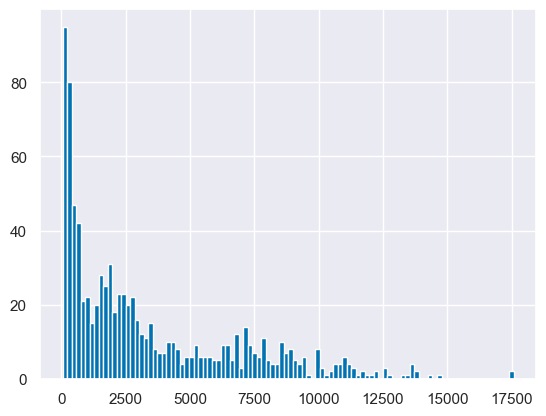

In [10]:
strong_agrees = (BES_Panel.isin(["Strongly agree","Strongly oppose"])).sum()
strong_agrees = strong_agrees[strong_agrees>0]
strong_agrees.hist(bins=100)
strong_agrees = strong_agrees.drop(al_lr_vars,errors='ignore')
strong_agrees = BES_Panel[strong_agrees.index].notnull().sum()
strong_agrees = strong_agrees.reset_index()
strong_agrees.columns = ["var_name","non_nulls_N"]
strong_agrees["wave"] = strong_agrees["var_name"].apply(lambda x: int(re.search("W(\d+)",x).groups()[0]))

In [111]:
non_agrees = BES_Panel.select_dtypes('category').columns
non_agrees = [x for x in non_agrees if x not in strong_agrees["var_name"].values]
non_agrees = [x for x in non_agrees if x not in al_lr_vars]
unique_cats = BES_Panel[non_agrees].describe().loc["unique"]
len(non_agrees)

9228

In [112]:
non_agrees = [x for x in non_agrees if x in unique_cats[(unique_cats>=5)&(unique_cats<=8)]]
len(non_agrees)

2383

In [113]:
dk_cats = BES_Panel[non_agrees].apply(lambda x: "Don't know" in x.cat.categories)[BES_Panel[non_agrees].apply(lambda x: "Don't know" in x.cat.categories)].index
non_agrees = [x for x in non_agrees if x in dk_cats]
len(non_agrees)

2088

In [117]:
drop_stub_list = ["p_","generalElectionCertainty","anyUni","infoSource"]
non_agrees = [x for x in non_agrees if re.match("p|generalElectionCertainty|anyUni|infoSource",x) is None]
len(non_agrees)
BES_Panel[non_agrees].notnull().sum().hist(bins=100)
non_agrees = BES_Panel[non_agrees].notnull().sum()[BES_Panel[non_agrees].notnull().sum()>20000].index

1869

In [132]:
non_agrees

['turnoutUKGeneralW1',
 'turnoutUKGeneralW2',
 'turnoutUKGeneralW3',
 'turnoutUKGeneralW4',
 'turnoutUKGeneralW5',
 'turnoutUKGeneralW7',
 'turnoutUKGeneralW8',
 'turnoutUKGeneralW9',
 'turnoutUKGeneralW10',
 'turnoutUKGeneralW11',
 'turnoutUKGeneralW12',
 'turnoutUKGeneralW14',
 'turnoutUKGeneralW15',
 'turnoutUKGeneralW16',
 'turnoutUKGeneralW17',
 'turnoutUKGeneralW18',
 'turnoutUKGeneralW20',
 'turnoutUKGeneralW21',
 'turnoutUKGeneralW22',
 'turnoutUKGeneralW23',
 'turnoutUKGeneralW25',
 'trustMPsW1',
 'trustYourMPW1',
 'riskPovertyW1',
 'riskUnemploymentW1',
 'econPersonalRetroW1',
 'econGenRetroW1',
 'cutsTooFarNationalW1',
 'cutsTooFarNHSW1',
 'cutsTooFarLocalW1',
 'enviroProtectionW1',
 'changeEconomyW1',
 'changeNHSW1',
 'changeEducationW1',
 'changeCostLiveW1',
 'changeImmigW1',
 'changeCrimeW1',
 'changeEconomyLabW1',
 'changeNHSLabW1',
 'changeEducationLabW1',
 'changeCostLiveLabW1',
 'changeImmigLabW1',
 'changeCrimeLabW1',
 'euroTurnoutW1',
 'immigEconW1',
 'immigCultural

In [136]:
na_dataset = BES_Panel[non_agrees].apply(lambda x: x.replace("Don't know",np.nan).cat.codes.replace(-1,np.nan))
na_corrs = na_dataset.corr()

In [133]:
sa_dataset = BES_Panel[strong_agrees["var_name"]].apply(lambda x: x.replace("Don't know",np.nan).cat.codes.replace(-1,np.nan))
sa_corrs = sa_dataset.corr()


In [690]:
# vc = BES_Panel.stack().value_counts()
# vc.head(50)

No                                     29869512
Don't know                             18974474
Yes                                     9720392
Agree                                   6330181
5                                       4566107
                                        4035302
Disagree                                3528013
2                                       3077367
3                                       3036933
Neither agree nor disagree              3015571
Strongly agree                          2924751
4                                       2901749
6                                       2729456
7                                       2433697
Strongly dislike                        2252143
8                                       2044614
0.0                                     2016058
1                                       1947715
Very unlikely                           1657816
Strongly disagree                       1616385
About the same                          

In [ ]:
## make life easier to start

## look at only variables in/overlapping same wave
## only consider other 'acquiescent' variables (technically, can build factors including some non-acq variables)

##

In [700]:
BES_Panel[strong_agrees["var_name"]].stack().value_counts()

Agree                         4711017
Disagree                      3027794
Neither agree nor disagree    2172321
Strongly agree                1842267
Strongly disagree             1356869
Don't know                    1258158
Support                        107826
Oppose                          92447
Neither support nor oppose      82384
Strongly oppose                 65758
Strongly support                64130
Neither oppose nor support      18109
Somewhat agree                    791
Somewhat disagree                 720
Name: count, dtype: int64

In [ ]:
# for wave
# for var in wave
#    start building value set
#        select_candidate
#        evaluate new dataset with this extra candidate (cronbach alpha/coverage reduction)
            # bias candidate choice based on current alignment balance
            # 'weight' correlation by shared coverage


            # add if cronbach > .6 and coverage > 50%

In [203]:

# pg.cronbach_alpha

In [731]:
strong_agrees

var_name  non_nulls_N  wave
0    difficultBlameCoalitionW1        30539     1
1       singlePartyEffectiveW1        30539     1
2            coalitionInTuneW1        30539     1
3       coalitionDontDeliverW1        30539     1
4                dutyToVote2W1        30538     1
..                         ...          ...   ...
741           statusAreaEduW25         7670    25
742        statusAreaSpacesW25         7670    25
743         statusAreaShopsW25         7670    25
744         statusAreaCrimeW25         7670    25
745        statusAreaSpiritW25         7670    25

[746 rows x 3 columns]

In [ ]:
# def get_bias_replace(align_list):
#     if np.mean(align_list)>0.0:
#         return {-1.0:1.5,1.0:1}
#     elif np.mean(align_list)==0.0:
#         return {-1.0:1.0,1.0:1.0}
#     elif np.mean(align_list)<0.0:
#         return {-1.0:1.0,1.0:1.5}
#     else:
#         raise Exception


def get_bias_replace(align_list):
    if np.mean(align_list)>0.0:
        return {-1.0:1+min(np.mean(align_list),.1*len(align_list)),1.0:1}
    elif np.mean(align_list)==0.0:
        return {-1.0:1.0,1.0:1.0}
    elif np.mean(align_list)<0.0:
        return {-1.0:1.0,1.0:1-max(np.mean(align_list),-.1*len(align_list))}
    else:
        raise Exception
        
# go from a 50% boost to a potential 100% boost
# smoother - 20% for length of list!

In [716]:
get_bias_replace([1,-1,-1,-1,-1,-1])

{-1.0: 1.0, 1.0: 1.6}

In [137]:
%%time

store_dict_na = {}
used_list = []
used_cost = .2
cronbach_minimum = .6
max_var_no = 10
min_coverage = .4
# note euro has 8 items and empathy 10

for focal_var in na_dataset.columns:

    ######

#     focal_var = "euUKRichW7"

    focal_list    = [focal_var]
    align_list    = [1]
    coverage_list = [1]
    cronbach_list = [1]
    ## anything else to store as we go along?
    var_no = 1


    cand_corrs = pd.DataFrame(na_corrs[focal_var])
    cand_corrs.columns =["corr"]
    cand_corrs["corr_abs"] = cand_corrs["corr"].abs()
    cand_corrs["align"] = cand_corrs["corr"]/cand_corrs["corr_abs"]
    cand_corrs["coverage"] = na_dataset[na_dataset[focal_var].notnull()].notnull().mean()#.drop(focal_list)
    cand_corrs["align_bias"] = cand_corrs["align"].replace(get_bias_replace(align_list))
    cand_corrs["used_already"] = 1-(cand_corrs.index.isin(used_list).astype(float)*used_cost)
    cand_corrs = cand_corrs.drop(focal_list)


    while (coverage_list[-1]>=min_coverage) & (cronbach_list[-1]>=cronbach_minimum) & (var_no<max_var_no):

        next_focal_var = (cand_corrs["corr_abs"]*cand_corrs["align_bias"]*cand_corrs["coverage"]*cand_corrs["used_already"])\
            .sort_values(ascending=False).dropna().index[0]

        focal_list.append(next_focal_var)
        align_list.append(cand_corrs.loc[next_focal_var,"align"].astype(int))
        coverage_list.append(coverage_list[-1]*cand_corrs.loc[next_focal_var,"coverage"])

        temp = na_dataset[focal_list]*align_list
        temp = temp.apply(lambda x: (x-x.mean())/x.std())
        cronbach_list.append( pg.cronbach_alpha(temp)[0] )
        temp = temp.mean(axis=1)
        print(var_no)
        print(focal_list,align_list,coverage_list,cronbach_list)
        var_no = var_no+1

        mask = temp.notnull()
        cand_corrs = pd.DataFrame(na_dataset[mask].corrwith(temp[mask]))
        cand_corrs.columns =["corr"]
        cand_corrs["corr_abs"] = cand_corrs["corr"].abs()
        cand_corrs["align"] = cand_corrs["corr"]/cand_corrs["corr_abs"]
        cand_corrs["coverage"] = na_dataset[temp.notnull()].notnull().mean()
        cand_corrs["align_bias"] = cand_corrs["align"].replace(get_bias_replace(align_list))
        cand_corrs["used_already"] = 1-(cand_corrs.index.isin(used_list).astype(float)*used_cost)
        cand_corrs = cand_corrs.drop(focal_list)

    if (coverage_list[-1]<min_coverage) or (cronbach_list[-1]<cronbach_minimum):
        del focal_list[-1]
        del align_list[-1]
        del cronbach_list[-1]
        del coverage_list[-1]
        var_no=var_no-1

    store_dict_na[focal_var] = (focal_list,align_list,cronbach_list,coverage_list,var_no)
    if var_no>1:
        used_list = list(set(used_list+focal_list))
# think about repeats later, for now single pass on top item!

1
['turnoutUKGeneralW1', 'turnoutUKGeneralW2'] [1, 1] [1, 0.8751053998448515] [1, 0.8279922060347051]
2
['turnoutUKGeneralW1', 'turnoutUKGeneralW2', 'turnoutUKGeneralW3'] [1, 1, 1] [1, 0.8751053998448515, 0.6302725407871346] [1, 0.8279922060347051, 0.8720253576482421]
3
['turnoutUKGeneralW1', 'turnoutUKGeneralW2', 'turnoutUKGeneralW3', 'turnoutUKGeneralW4'] [1, 1, 1, 1] [1, 0.8751053998448515, 0.6302725407871346, 0.43721822349617406] [1, 0.8279922060347051, 0.8720253576482421, 0.8925399872465515]
4
['turnoutUKGeneralW1', 'turnoutUKGeneralW2', 'turnoutUKGeneralW3', 'turnoutUKGeneralW4', 'turnoutUKGeneralW5'] [1, 1, 1, 1, 1] [1, 0.8751053998448515, 0.6302725407871346, 0.43721822349617406, 0.2780034892542822] [1, 0.8279922060347051, 0.8720253576482421, 0.8925399872465515, 0.9110216971386925]
1
['turnoutUKGeneralW2', 'turnoutUKGeneralW1'] [1, 1] [1, 0.8615067901849454] [1, 0.8279922060347051]
2
['turnoutUKGeneralW2', 'turnoutUKGeneralW1', 'euroTurnoutW1'] [1, 1, 1] [1, 0.8615067901849454, 

1
['turnoutUKGeneralW14', 'turnoutUKGeneralW15'] [1, 1] [1, 0.6234799032439776] [1, 0.7822033528999968]
2
['turnoutUKGeneralW14', 'turnoutUKGeneralW15', 'turnoutUKGeneralW16'] [1, 1, 1] [1, 0.6234799032439776, 0.3256519342688125] [1, 0.7822033528999968, 0.8550309529064823]
1
['turnoutUKGeneralW15', 'turnoutUKGeneralW16'] [1, 1] [1, 0.630663677739284] [1, 0.8150377529568293]
2
['turnoutUKGeneralW15', 'turnoutUKGeneralW16', 'turnoutUKGeneralW17'] [1, 1, 1] [1, 0.630663677739284, 0.3388444149365108] [1, 0.8150377529568293, 0.867295770503491]
1
['turnoutUKGeneralW16', 'turnoutUKGeneralW17'] [1, 1] [1, 0.5760917150049251] [1, 0.8567020942371573]
2
['turnoutUKGeneralW16', 'turnoutUKGeneralW17', 'turnoutUKGeneralW18'] [1, 1, 1] [1, 0.5760917150049251, 0.31501220389847273] [1, 0.8567020942371573, 0.921490435539346]
1
['turnoutUKGeneralW17', 'electionInterestW17'] [1, 1] [1, 0.9806983365802487] [1, 0.6881103287505208]
2
['turnoutUKGeneralW17', 'electionInterestW17', 'electionInterestW18'] [1, 1

7
['econGenRetroW1', 'changeEconomyW1', 'approveUKGovtW1', 'cutsTooFarNationalW1', 'cutsTooFarLocalW1', 'cutsTooFarNHSW1', 'approveUKGovtW2', 'cutsTooFarNationalW2'] [1, 1, 1, -1, -1, -1, 1, -1] [1, 0.9847054444557236, 0.9621486903088391, 0.90093288082082, 0.8059102961594283, 0.75296011228049, 0.649837314294249, 0.5452141566448866] [1, 0.8888820850754848, 0.8428709355040894, 0.841000927577246, 0.8616992673563952, 0.8768913361389288, 0.896070815814723, 0.909223986189848]
8
['econGenRetroW1', 'changeEconomyW1', 'approveUKGovtW1', 'cutsTooFarNationalW1', 'cutsTooFarLocalW1', 'cutsTooFarNHSW1', 'approveUKGovtW2', 'cutsTooFarNationalW2', 'cutsTooFarLocalW2'] [1, 1, 1, -1, -1, -1, 1, -1, -1] [1, 0.9847054444557236, 0.9621486903088391, 0.90093288082082, 0.8059102961594283, 0.75296011228049, 0.649837314294249, 0.5452141566448866, 0.4404661379874682] [1, 0.8888820850754848, 0.8428709355040894, 0.841000927577246, 0.8616992673563952, 0.8768913361389288, 0.896070815814723, 0.909223986189848, 0.918

6
['changeImmigW1', 'immigEconW1', 'immigCulturalW1', 'blackEqualityW1_W5', 'immigCulturalW2', 'gayEqualityW1_W5', 'immigEconW2'] [1, -1, -1, 1, -1, 1, -1] [1, 0.9662544901906605, 0.9394578205927151, 0.8811927709910543, 0.6298769359148325, 0.596029619068333, 0.4186582603429916] [1, 0.7169679366239856, 0.8389815638054495, 0.8423755435641453, 0.8851251278833704, 0.876553852905627, 0.9021917851555533]
7
['changeImmigW1', 'immigEconW1', 'immigCulturalW1', 'blackEqualityW1_W5', 'immigCulturalW2', 'gayEqualityW1_W5', 'immigEconW2', 'blackEqualityW6_W14'] [1, -1, -1, 1, -1, 1, -1, 1] [1, 0.9662544901906605, 0.9394578205927151, 0.8811927709910543, 0.6298769359148325, 0.596029619068333, 0.4186582603429916, 0.29099488543374313] [1, 0.7169679366239856, 0.8389815638054495, 0.8423755435641453, 0.8851251278833704, 0.876553852905627, 0.9021917851555533, 0.9101726003905789]
1
['changeCrimeW1', 'changeCrimeW2'] [1, 1] [1, 0.8557789470016377] [1, 0.7285712644953519]
2
['changeCrimeW1', 'changeCrimeW2', 

8
['changeEducationLabW1', 'changeNHSLabW1', 'changeEconomyLabW1', 'changeCostLiveLabW1', 'changeImmigLabW1', 'changeCrimeLabW1', 'changeEconomyLabW3', 'changeEducationLabW3', 'changeNHSLabW3'] [1, 1, 1, -1, -1, -1, 1, 1, 1] [1, 0.9950245033855822, 0.9791822375737725, 0.9556117531657569, 0.9171012634871368, 0.8701029992918127, 0.6044887087228226, 0.4345415613247087, 0.3229247316248132] [1, 0.9180056656444613, 0.9212751617549966, 0.8808574376797275, 0.8826417743825027, 0.8919471275626912, 0.9089768824115981, 0.9205804279035231, 0.9300945382197903]
1
['changeCostLiveLabW1', 'changeImmigLabW1'] [1, 1] [1, 0.9733557193955763] [1, 0.7743673138245342]
2
['changeCostLiveLabW1', 'changeImmigLabW1', 'changeEconomyLabW1'] [1, 1, -1] [1, 0.9733557193955763, 0.9455124927788638] [1, 0.7743673138245342, 0.799006838879665]
3
['changeCostLiveLabW1', 'changeImmigLabW1', 'changeEconomyLabW1', 'changeNHSLabW1'] [1, 1, -1, -1] [1, 0.9733557193955763, 0.9455124927788638, 0.9196048103649338] [1, 0.774367313

8
['changeCrimeLabW1', 'changeImmigLabW1', 'changeCostLiveLabW1', 'changeEconomyLabW1', 'changeNHSLabW1', 'changeEducationLabW1', 'changeEconomyLabW2', 'changeNHSLabW2', 'changeEducationLabW2'] [1, 1, 1, -1, -1, -1, -1, -1, -1] [1, 0.9813685510120095, 0.9659661454157447, 0.937157237737158, 0.9110111477622129, 0.8643946546005586, 0.7235607959956828, 0.6212802659704623, 0.5200920531675345] [1, 0.788089920653223, 0.8373942826759042, 0.8433879254736003, 0.8648715185888688, 0.8919471275626912, 0.9094235005376048, 0.9209379734159175, 0.9323059397423322]
9
['changeCrimeLabW1', 'changeImmigLabW1', 'changeCostLiveLabW1', 'changeEconomyLabW1', 'changeNHSLabW1', 'changeEducationLabW1', 'changeEconomyLabW2', 'changeNHSLabW2', 'changeEducationLabW2', 'changeCostLiveLabW3'] [1, 1, 1, -1, -1, -1, -1, -1, -1, 1] [1, 0.9813685510120095, 0.9659661454157447, 0.937157237737158, 0.9110111477622129, 0.8643946546005586, 0.7235607959956828, 0.6212802659704623, 0.5200920531675345, 0.35593955533883903] [1, 0.78

5
['satDemScotW1', 'satDemScotW2', 'approveScotGovtW2', 'scotIndepEconomyW2', 'scotIndepVoiceW2', 'dv2w2W2'] [1, 1, 1, -1, -1, 1] [1, 0.8413940256045519, 0.7373693875792919, 0.6197521846525338, 0.5301331487766103, 0.4459813569367614] [1, 0.7170886141624013, 0.7450550226094642, 0.7748461269762933, 0.8122410013531944, 0.8543962636983095]
6
['satDemScotW1', 'satDemScotW2', 'approveScotGovtW2', 'scotIndepEconomyW2', 'scotIndepVoiceW2', 'dv2w2W2', 'scotIndepEconomyW1'] [1, 1, 1, -1, -1, 1, -1] [1, 0.8413940256045519, 0.7373693875792919, 0.6197521846525338, 0.5301331487766103, 0.4459813569367614, 0.3503445005022619] [1, 0.7170886141624013, 0.7450550226094642, 0.7748461269762933, 0.8122410013531944, 0.8543962636983095, 0.8847094542487945]
1
['satDemWalesW1', 'approveWelshGovtW1'] [1, 1] [1, 0.9750462107208873] [1, 0.7188562329283417]
2
['satDemWalesW1', 'approveWelshGovtW1', 'approveWelshGovtW2'] [1, 1, 1] [1, 0.9750462107208873, 0.7956285364377376] [1, 0.7188562329283417, 0.8160392103516056]

2
['scotDevoMaxW1', 'scotDevoMaxW2', 'scotDevoMaxW3'] [1, 1, 1] [1, 0.8474186704384724, 0.587316172268333] [1, 0.8865109188373601, 0.9054003965453161]
3
['scotDevoMaxW1', 'scotDevoMaxW2', 'scotDevoMaxW3', 'scotDevoMaxW4'] [1, 1, 1, 1] [1, 0.8474186704384724, 0.587316172268333, 0.38291871634617797] [1, 0.8865109188373601, 0.9054003965453161, 0.9322889549101492]
1
['expectationDevoScotW1', 'expectationDevoScotW2'] [1, 1] [1, 0.8202051480549643] [1, 0.7931562033833799]
2
['expectationDevoScotW1', 'expectationDevoScotW2', 'scotUnionEconomyW3'] [1, 1, -1] [1, 0.8202051480549643, 0.557820234496932] [1, 0.7931562033833799, 0.7336950979332535]
3
['expectationDevoScotW1', 'expectationDevoScotW2', 'scotUnionEconomyW3', 'dv2w2W2'] [1, 1, -1, -1] [1, 0.8202051480549643, 0.557820234496932, 0.45242161084571453] [1, 0.7931562033833799, 0.7336950979332535, 0.7818518626707434]
4
['expectationDevoScotW1', 'expectationDevoScotW2', 'scotUnionEconomyW3', 'dv2w2W2', 'scotIndepJoinEUW2'] [1, 1, -1, -1, -1] [

6
['scotIndepEconomyW1', 'scotIndepMeBetterOffW1', 'scotIndepVoiceW1', 'cooperateRUKGBPW1', 'scotIndepJoinEUW2', 'scotIndepEconomyW2', 'dv2w2W2'] [1, -1, 1, -1, -1, 1, -1] [1, 0.932377802278574, 0.9129428828296887, 0.8019157560693422, 0.6209685160516079, 0.5222072206394459, 0.4386144406830076] [1, 0.8552479721499, 0.8862072968837822, 0.882179857008766, 0.9000707932965659, 0.921276643297773, 0.9367303113104044]
7
['scotIndepEconomyW1', 'scotIndepMeBetterOffW1', 'scotIndepVoiceW1', 'cooperateRUKGBPW1', 'scotIndepJoinEUW2', 'scotIndepEconomyW2', 'dv2w2W2', 'scotIndepVoiceW2'] [1, -1, 1, -1, -1, 1, -1, 1] [1, 0.932377802278574, 0.9129428828296887, 0.8019157560693422, 0.6209685160516079, 0.5222072206394459, 0.4386144406830076, 0.37411793488944006] [1, 0.8552479721499, 0.8862072968837822, 0.882179857008766, 0.9000707932965659, 0.921276643297773, 0.9367303113104044, 0.9450890633153538]
1
['scotIndepInequalityW1', 'scotIndepInequalityW2'] [1, 1] [1, 0.813970724476561] [1, 0.7327280217525245]
2

1
['scotIndepMeBetterOffW1', 'scotIndepEconomyW1'] [1, -1] [1, 0.967397521448999] [1, 0.8552479721499]
2
['scotIndepMeBetterOffW1', 'scotIndepEconomyW1', 'scotIndepVoiceW1'] [1, -1, -1] [1, 0.967397521448999, 0.9472326345775341] [1, 0.8552479721499, 0.8862072968837822]
3
['scotIndepMeBetterOffW1', 'scotIndepEconomyW1', 'scotIndepVoiceW1', 'approveScotGovtW1'] [1, -1, -1, 1] [1, 0.967397521448999, 0.9472326345775341, 0.9329984904968653] [1, 0.8552479721499, 0.8862072968837822, 0.8941229767639591]
4
['scotIndepMeBetterOffW1', 'scotIndepEconomyW1', 'scotIndepVoiceW1', 'approveScotGovtW1', 'scotIndepEconomyW2'] [1, -1, -1, 1, -1] [1, 0.967397521448999, 0.9472326345775341, 0.9329984904968653, 0.7573808954256469] [1, 0.8552479721499, 0.8862072968837822, 0.8941229767639591, 0.9197380234126197]
5
['scotIndepMeBetterOffW1', 'scotIndepEconomyW1', 'scotIndepVoiceW1', 'approveScotGovtW1', 'scotIndepEconomyW2', 'dv2w2W2'] [1, -1, -1, 1, -1, 1] [1, 0.967397521448999, 0.9472326345775341, 0.9329984904

5
['econGenProspW1', 'changeEconomyW1', 'econGenRetroW1', 'changeEconomyW2', 'econGenRetroW2', 'changeEconomyW4'] [1, 1, 1, 1, 1, 1] [1, 0.9883604254465181, 0.9703139576324765, 0.8393159310546147, 0.7352153060336828, 0.5069152489582595] [1, 0.8648042985677327, 0.905012876874474, 0.9139723490257678, 0.927858541215595, 0.9335609441745718]
6
['econGenProspW1', 'changeEconomyW1', 'econGenRetroW1', 'changeEconomyW2', 'econGenRetroW2', 'changeEconomyW4', 'econGenRetroW4'] [1, 1, 1, 1, 1, 1, 1] [1, 0.9883604254465181, 0.9703139576324765, 0.8393159310546147, 0.7352153060336828, 0.5069152489582595, 0.3733343871260577] [1, 0.8648042985677327, 0.905012876874474, 0.9139723490257678, 0.927858541215595, 0.9335609441745718, 0.9408721017022464]
1
['govtHandleCostLiveW1', 'govtHandleEconW1'] [1, 1] [1, 0.9977696674776967] [1, 0.8797224327699678]
2
['govtHandleCostLiveW1', 'govtHandleEconW1', 'govtHandleNHSW1'] [1, 1, 1] [1, 0.9977696674776967, 0.9903100841888152] [1, 0.8797224327699678, 0.8929981191033

9
['govtHandleNHSW1', 'govtHandleEconW1', 'govtHandleCostLiveW1', 'approveUKGovtW1', 'cutsTooFarNationalW1', 'cutsTooFarLocalW1', 'cutsTooFarNHSW1', 'cutsTooFarNationalW2', 'approveUKGovtW2', 'cutsTooFarNHSW6'] [1, 1, 1, 1, -1, -1, -1, -1, 1, -1] [1, 0.9965454175980492, 0.9913163195440534, 0.9757207824475556, 0.9220909725002832, 0.8314287193793327, 0.7816308261115209, 0.6494461174761342, 0.56922574432093, 0.3781445536357028] [1, 0.8353661918529369, 0.8929981191033902, 0.9172180932512318, 0.9101543887117536, 0.9125795202037548, 0.9174378388384355, 0.9260226128654971, 0.9345361934557986, 0.9401946799960437]
1
['govtHandleEducW1', 'govtHandleNHSW1'] [1, 1] [1, 0.9964338158170757] [1, 0.8327286004189571]
2
['govtHandleEducW1', 'govtHandleNHSW1', 'govtHandleEconW1'] [1, 1, 1] [1, 0.9964338158170757, 0.9921962479490808] [1, 0.8327286004189571, 0.8736052253182495]
3
['govtHandleEducW1', 'govtHandleNHSW1', 'govtHandleEconW1', 'govtHandleCostLiveW1'] [1, 1, 1, 1] [1, 0.9964338158170757, 0.99219

4
['labHandleEconW1', 'labHandleCostLiveW1', 'labHandleEconW2', 'labHandleCostLiveW2', 'labHandleImmigW2'] [1, 1, 1, 1, 1] [1, 0.9947701024188277, 0.8384181928429989, 0.727150355198842, 0.626732493142903] [1, 0.9323471602469253, 0.934425373617246, 0.9438306820123694, 0.9441434353203668]
5
['labHandleEconW1', 'labHandleCostLiveW1', 'labHandleEconW2', 'labHandleCostLiveW2', 'labHandleImmigW2', 'labHandleEducW2'] [1, 1, 1, 1, 1, 1] [1, 0.9947701024188277, 0.8384181928429989, 0.727150355198842, 0.626732493142903, 0.5366067688562112] [1, 0.9323471602469253, 0.934425373617246, 0.9438306820123694, 0.9441434353203668, 0.9476019980073455]
6
['labHandleEconW1', 'labHandleCostLiveW1', 'labHandleEconW2', 'labHandleCostLiveW2', 'labHandleImmigW2', 'labHandleEducW2', 'labHandleNHSW2'] [1, 1, 1, 1, 1, 1, 1] [1, 0.9947701024188277, 0.8384181928429989, 0.727150355198842, 0.626732493142903, 0.5366067688562112, 0.46457965832698606] [1, 0.9323471602469253, 0.934425373617246, 0.9438306820123694, 0.94414343

4
['labHandleEducW1', 'labHandleNHSW1', 'labHandleLevelCrimeW1', 'labHandleCostLiveW1', 'labHandleEconW1'] [1, 1, 1, 1, 1] [1, 0.9971226206285967, 0.9755071291777274, 0.9649428327820405, 0.9561820029124241] [1, 0.9411591117731237, 0.9403922624853693, 0.9446280681060776, 0.9522551692563594]
5
['labHandleEducW1', 'labHandleNHSW1', 'labHandleLevelCrimeW1', 'labHandleCostLiveW1', 'labHandleEconW1', 'labHandleImmigW1'] [1, 1, 1, 1, 1, 1] [1, 0.9971226206285967, 0.9755071291777274, 0.9649428327820405, 0.9561820029124241, 0.9442064995289388] [1, 0.9411591117731237, 0.9403922624853693, 0.9446280681060776, 0.9522551692563594, 0.9561939985567764]
6
['labHandleEducW1', 'labHandleNHSW1', 'labHandleLevelCrimeW1', 'labHandleCostLiveW1', 'labHandleEconW1', 'labHandleImmigW1', 'changeImmigLabW1'] [1, 1, 1, 1, 1, 1, -1] [1, 0.9971226206285967, 0.9755071291777274, 0.9649428327820405, 0.9561820029124241, 0.9442064995289388, 0.8921011182227503] [1, 0.9411591117731237, 0.9403922624853693, 0.944628068106077

3
['trustYourMPW2', 'trustYourMPW4', 'trustYourMPW1', 'trustYourMPW3'] [1, 1, 1, 1] [1, 0.7191388928622514, 0.4896484556935376, 0.30006140894003946] [1, 0.8605633795431775, 0.9030445272001945, 0.928806196645931]
1
['riskPovertyW2', 'riskPovertyW4'] [1, 1] [1, 0.7361233480176211] [1, 0.7608038087746103]
2
['riskPovertyW2', 'riskPovertyW4', 'riskPovertyW6'] [1, 1, 1] [1, 0.7361233480176211, 0.5416954531226362] [1, 0.7608038087746103, 0.8430961614950037]
3
['riskPovertyW2', 'riskPovertyW4', 'riskPovertyW6', 'econPersonalRetroW4'] [1, 1, 1, -1] [1, 0.7361233480176211, 0.5416954531226362, 0.42413056175894165] [1, 0.7608038087746103, 0.8430961614950037, 0.8069409757103494]
4
['riskPovertyW2', 'riskPovertyW4', 'riskPovertyW6', 'econPersonalRetroW4', 'econGenRetroW4'] [1, 1, 1, -1, -1] [1, 0.7361233480176211, 0.5416954531226362, 0.42413056175894165, 0.3278993489169093] [1, 0.7608038087746103, 0.8430961614950037, 0.8069409757103494, 0.8072011298068458]
1
['riskUnemploymentW2', 'riskUnemployment

3
['enviroProtectionW2', 'enviroProtectionW6', 'enviroProtectionW4', 'grnGovTrustW5'] [1, 1, 1, -1] [1, 0.7092869639732924, 0.5203485087597598, 0.376580919075053] [1, 0.803896688223638, 0.8605832400572405, 0.8230367936192821]
1
['changeEconomyW2', 'econGenRetroW2'] [1, 1] [1, 0.9835120643431635] [1, 0.897834250894201]
2
['changeEconomyW2', 'econGenRetroW2', 'changeEconomyW1'] [1, 1, 1] [1, 0.9835120643431635, 0.8461614777851818] [1, 0.897834250894201, 0.8948709331062421]
3
['changeEconomyW2', 'econGenRetroW2', 'changeEconomyW1', 'econGenRetroW1'] [1, 1, 1, 1] [1, 0.9835120643431635, 0.8461614777851818, 0.7354111526222427] [1, 0.897834250894201, 0.8948709331062421, 0.9160436493553406]
4
['changeEconomyW2', 'econGenRetroW2', 'changeEconomyW1', 'econGenRetroW1', 'cutsTooFarNationalW1'] [1, 1, 1, 1, -1] [1, 0.9835120643431635, 0.8461614777851818, 0.7354111526222427, 0.6132105058808995] [1, 0.897834250894201, 0.8948709331062421, 0.9160436493553406, 0.891644545780025]
5
['changeEconomyW2', '

8
['changeEconomyLabW2', 'changeEducationLabW2', 'changeNHSLabW2', 'changeCostLiveLabW2', 'changeImmigLabW2', 'changeCrimeLabW2', 'labGovTrustW5', 'changeEducationLabW4', 'changeCostLiveLabW4'] [1, 1, 1, -1, -1, -1, 1, 1, -1] [1, 0.9677582409647254, 0.9571797590852081, 0.9349356086641027, 0.8989563081196209, 0.8550840105757856, 0.6434500431050661, 0.45833493080551074, 0.3391811391196284] [1, 0.872469405421006, 0.920908477036587, 0.8836852813112295, 0.8838190209444857, 0.8927856575354804, 0.9053637372565422, 0.9168178445421837, 0.9190209308924638]
1
['changeNHSLabW2', 'changeEducationLabW2'] [1, 1] [1, 0.9707840103623214] [1, 0.9233792066915605]
2
['changeNHSLabW2', 'changeEducationLabW2', 'changeEconomyLabW2'] [1, 1, 1] [1, 0.9707840103623214, 0.9568028842860969] [1, 0.9233792066915605, 0.9209084770365872]
3
['changeNHSLabW2', 'changeEducationLabW2', 'changeEconomyLabW2', 'changeCostLiveLabW2'] [1, 1, 1, -1] [1, 0.9707840103623214, 0.9568028842860969, 0.9345674921568816] [1, 0.92337920

8
['changeCostLiveLabW2', 'changeImmigLabW2', 'changeEconomyLabW2', 'changeEducationLabW2', 'changeNHSLabW2', 'changeCrimeLabW2', 'changeEconomyLabW1', 'changeNHSLabW1', 'changeEducationLabW1'] [1, 1, -1, -1, -1, 1, -1, -1, -1] [1, 0.9752655265526553, 0.9498555117658056, 0.9041485808116524, 0.8816314097204493, 0.8386046294621816, 0.6925275804632973, 0.5861683022775547, 0.48455709323389545] [1, 0.7811046236263126, 0.8025684562567996, 0.8462363856621096, 0.8838190209444858, 0.8927856575354804, 0.9096632592595849, 0.9211903204436439, 0.9323044724811598]
9
['changeCostLiveLabW2', 'changeImmigLabW2', 'changeEconomyLabW2', 'changeEducationLabW2', 'changeNHSLabW2', 'changeCrimeLabW2', 'changeEconomyLabW1', 'changeNHSLabW1', 'changeEducationLabW1', 'changeCostLiveLabW4'] [1, 1, -1, -1, -1, 1, -1, -1, -1, 1] [1, 0.9752655265526553, 0.9498555117658056, 0.9041485808116524, 0.8816314097204493, 0.8386046294621816, 0.6925275804632973, 0.5861683022775547, 0.48455709323389545, 0.32409204439058165] [1,

4
['britishnessW2', 'britishnessW1', 'britishnessW3', 'britishnessW4', 'britishnessW7'] [1, 1, 1, 1, 1] [1, 0.8650511045169799, 0.6275033477177715, 0.433961116071572, 0.22797919600841937] [1, 0.842060332683324, 0.8898773302015099, 0.917720566845766, 0.9325973842283539]
1
['scottishnessW2', 'scottishnessW3'] [1, 1] [1, 0.7647155003270111] [1, 0.9400685812130847]
2
['scottishnessW2', 'scottishnessW3', 'scottishnessW4'] [1, 1, 1] [1, 0.7647155003270111, 0.5355732333100572] [1, 0.9400685812130847, 0.961114081328446]
3
['scottishnessW2', 'scottishnessW3', 'scottishnessW4', 'englishnessW2'] [1, 1, 1, -1] [1, 0.7647155003270111, 0.5355732333100572, 0.440506631263808] [1, 0.9400685812130847, 0.961114081328446, 0.891910103656477]
4
['scottishnessW2', 'scottishnessW3', 'scottishnessW4', 'englishnessW2', 'englishnessW1'] [1, 1, 1, -1, -1] [1, 0.7647155003270111, 0.5355732333100572, 0.440506631263808, 0.3686982454147344] [1, 0.9400685812130847, 0.961114081328446, 0.891910103656477, 0.8958357119881

2
['satDemWalesW2', 'satDemWalesW3', 'satDemWalesW4'] [1, 1, 1] [1, 0.7622254758418741, 0.5271254638809402] [1, 0.76798960424959, 0.8145234961286567]
3
['satDemWalesW2', 'satDemWalesW3', 'satDemWalesW4', 'approveWelshGovtW2'] [1, 1, 1, 1] [1, 0.7622254758418741, 0.5271254638809402, 0.4660252807454522] [1, 0.76798960424959, 0.8145234961286567, 0.8333865743646754]
4
['satDemWalesW2', 'satDemWalesW3', 'satDemWalesW4', 'approveWelshGovtW2', 'approveWelshGovtW3'] [1, 1, 1, 1, 1] [1, 0.7622254758418741, 0.5271254638809402, 0.4660252807454522, 0.347236847444271] [1, 0.76798960424959, 0.8145234961286567, 0.8333865743646754, 0.8678091079689108]
1
['satDemEngW2', 'satDemUKW2'] [1, 1] [1, 0.9975012748597655] [1, 0.9305476660672183]
2
['satDemEngW2', 'satDemUKW2', 'satDemUKW1'] [1, 1, 1] [1, 0.9975012748597655, 0.8496572133412947] [1, 0.9305476660672183, 0.8710087221507723]
3
['satDemEngW2', 'satDemUKW2', 'satDemUKW1', 'satDemUKW6'] [1, 1, 1, 1] [1, 0.9975012748597655, 0.8496572133412947, 0.583609

3
['engFairShareW2', 'scotFairShareW2', 'walesFairShareW2', 'engFairShareW1'] [1, -1, -1, 1] [1, 0.9824747952110902, 0.9289090151530387, 0.7405024994542391] [1, 0.7676313552647542, 0.8243730305944467, 0.8651292041107974]
4
['engFairShareW2', 'scotFairShareW2', 'walesFairShareW2', 'engFairShareW1', 'scotFairShareW1'] [1, -1, -1, 1, -1] [1, 0.9824747952110902, 0.9289090151530387, 0.7405024994542391, 0.6033970484887675] [1, 0.7676313552647542, 0.8243730305944467, 0.8651292041107974, 0.8905645079679128]
5
['engFairShareW2', 'scotFairShareW2', 'walesFairShareW2', 'engFairShareW1', 'scotFairShareW1', 'engFairShareW3'] [1, -1, -1, 1, -1, 1] [1, 0.9824747952110902, 0.9289090151530387, 0.7405024994542391, 0.6033970484887675, 0.40960046779327197] [1, 0.7676313552647542, 0.8243730305944467, 0.8651292041107974, 0.8905645079679128, 0.9055823355691358]
6
['engFairShareW2', 'scotFairShareW2', 'walesFairShareW2', 'engFairShareW1', 'scotFairShareW1', 'engFairShareW3', 'scotFairShareW3'] [1, -1, -1, 1, 

8
['scotIndepInequalityW2', 'scotIndepEconomyW2', 'dv2w2W2', 'scotIndepVoiceW2', 'approveScotGovtW2', 'scotIndepEconomyW1', 'scotIndepVoiceW1', 'approveScotGovtW1', 'approveScotGovtW3'] [1, -1, 1, -1, 1, -1, -1, 1, 1] [1, 0.9782146652497343, 0.9364191251271617, 0.9074465281055238, 0.8920407274800304, 0.6855227907352262, 0.5560562581404882, 0.4604123256071221, 0.3164877914369638] [1, 0.7026894693062204, 0.8435267569996212, 0.8833761397225919, 0.9021107262598294, 0.9234180282620196, 0.933905500024574, 0.9402686996702622, 0.9448502697514801]
1
['scotIndepVoiceW2', 'dv2w2W2'] [1, -1] [1, 0.9581632653061225] [1, 0.861568795932901]
2
['scotIndepVoiceW2', 'dv2w2W2', 'scotIndepEconomyW2'] [1, -1, 1] [1, 0.9581632653061225, 0.9132543212714036] [1, 0.861568795932901, 0.9142344824195456]
3
['scotIndepVoiceW2', 'dv2w2W2', 'scotIndepEconomyW2', 'approveScotGovtW2'] [1, -1, 1, -1] [1, 0.9581632653061225, 0.9132543212714036, 0.8980283908573375] [1, 0.861568795932901, 0.9142344824195456, 0.91381065721

6
['scotIndepMeBetterOffW2', 'scotIndepEconomyW2', 'dv2w2W2', 'scotIndepVoiceW2', 'approveScotGovtW2', 'scotIndepEconomyW1', 'scotIndepVoiceW1'] [1, -1, 1, -1, 1, -1, -1] [1, 0.9736842105263158, 0.931257166730371, 0.9017032202820683, 0.8861105262554515, 0.680887676210028, 0.5523152730761718] [1, 0.8367000677227827, 0.8996844035149251, 0.918508097965284, 0.9239608371729163, 0.9384539349473117, 0.94512559115218]
7
['scotIndepMeBetterOffW2', 'scotIndepEconomyW2', 'dv2w2W2', 'scotIndepVoiceW2', 'approveScotGovtW2', 'scotIndepEconomyW1', 'scotIndepVoiceW1', 'approveScotGovtW3'] [1, -1, 1, -1, 1, -1, -1, 1] [1, 0.9736842105263158, 0.931257166730371, 0.9017032202820683, 0.8861105262554515, 0.680887676210028, 0.5523152730761718, 0.3806421444356286] [1, 0.8367000677227827, 0.8996844035149251, 0.918508097965284, 0.9239608371729163, 0.9384539349473117, 0.94512559115218, 0.9470103525438585]
1
['certaintyScotIndependenceW2', 'dv1w2W2'] [1, 1] [1, 0.9688044614848379] [1, 0.8264991302205666]
2
['cert

4
['manipCheck2W2', 'cooperateRUKGBPW2', 'scotIndepJoinEUW2', 'scotIndepEconomyW2', 'dv2w2W2'] [1, -1, -1, 1, -1] [1, 0.9048027444253859, 0.8458823282566523, 0.8121512684442614, 0.7741661641778105] [1, 0.9185690344379103, 0.8966847010638869, 0.9015856983435105, 0.9211398612272453]
5
['manipCheck2W2', 'cooperateRUKGBPW2', 'scotIndepJoinEUW2', 'scotIndepEconomyW2', 'dv2w2W2', 'scotIndepVoiceW2'] [1, -1, -1, 1, -1, 1] [1, 0.9048027444253859, 0.8458823282566523, 0.8121512684442614, 0.7741661641778105, 0.7482883885598135] [1, 0.9185690344379103, 0.8966847010638869, 0.9015856983435105, 0.9211398612272453, 0.930510420831411]
6
['manipCheck2W2', 'cooperateRUKGBPW2', 'scotIndepJoinEUW2', 'scotIndepEconomyW2', 'dv2w2W2', 'scotIndepVoiceW2', 'approveScotGovtW2'] [1, -1, -1, 1, -1, 1, -1] [1, 0.9048027444253859, 0.8458823282566523, 0.8121512684442614, 0.7741661641778105, 0.7482883885598135, 0.7352490051655441] [1, 0.9185690344379103, 0.8966847010638869, 0.9015856983435105, 0.9211398612272453, 0.93

5
['dv2w2W2', 'scotIndepEconomyW2', 'scotIndepVoiceW2', 'approveScotGovtW2', 'scotIndepMeBetterOffW2', 'scotIndepEconomyW1'] [1, -1, -1, 1, 1, -1] [1, 0.9580455801104972, 0.929708572257445, 0.9142083137896334, 0.8295206041979915, 0.6374039578871711] [1, 0.8980023165301181, 0.9142344824195456, 0.9138106572109521, 0.9239608371729163, 0.9384539349473116]
6
['dv2w2W2', 'scotIndepEconomyW2', 'scotIndepVoiceW2', 'approveScotGovtW2', 'scotIndepMeBetterOffW2', 'scotIndepEconomyW1', 'scotIndepVoiceW1'] [1, -1, -1, 1, 1, -1, -1] [1, 0.9580455801104972, 0.929708572257445, 0.9142083137896334, 0.8295206041979915, 0.6374039578871711, 0.5170426097588704] [1, 0.8980023165301181, 0.9142344824195456, 0.9138106572109521, 0.9239608371729163, 0.9384539349473116, 0.9451255911521801]
7
['dv2w2W2', 'scotIndepEconomyW2', 'scotIndepVoiceW2', 'approveScotGovtW2', 'scotIndepMeBetterOffW2', 'scotIndepEconomyW1', 'scotIndepVoiceW1', 'approveScotGovtW1'] [1, -1, -1, 1, 1, -1, -1, 1] [1, 0.9580455801104972, 0.9297085

5
['govtHandleImmigW2', 'govtHandleLevelCrimeW2', 'govtHandleEconW2', 'govtHandleCostLiveW2', 'approveUKGovtW2', 'cutsTooFarNationalW2'] [1, 1, 1, 1, 1, -1] [1, 0.979887836008509, 0.976111774983428, 0.9688175885062573, 0.95565027442051, 0.9030219264761966] [1, 0.7082399384548634, 0.777196287755729, 0.8359653747668538, 0.8733895477719628, 0.8721470620706133]
6
['govtHandleImmigW2', 'govtHandleLevelCrimeW2', 'govtHandleEconW2', 'govtHandleCostLiveW2', 'approveUKGovtW2', 'cutsTooFarNationalW2', 'cutsTooFarLocalW2'] [1, 1, 1, 1, 1, -1, -1] [1, 0.979887836008509, 0.976111774983428, 0.9688175885062573, 0.95565027442051, 0.9030219264761966, 0.8207798727204199] [1, 0.7082399384548634, 0.777196287755729, 0.8359653747668538, 0.8733895477719628, 0.8721470620706133, 0.8813774707669076]
7
['govtHandleImmigW2', 'govtHandleLevelCrimeW2', 'govtHandleEconW2', 'govtHandleCostLiveW2', 'approveUKGovtW2', 'cutsTooFarNationalW2', 'cutsTooFarLocalW2', 'cutsTooFarNHSW2'] [1, 1, 1, 1, 1, -1, -1, -1] [1, 0.9798

8
['govtHandleLevelCrimeW2', 'govtHandleEconW2', 'govtHandleCostLiveW2', 'approveUKGovtW2', 'cutsTooFarNationalW2', 'cutsTooFarLocalW2', 'cutsTooFarNHSW2', 'cutsTooFarNationalW1', 'approveUKGovtW1'] [1, 1, 1, 1, -1, -1, -1, -1, 1] [1, 0.9984270546598506, 0.9917159067986839, 0.9784170344852916, 0.9245331029733115, 0.8403319347354211, 0.794073351039606, 0.6552274168758561, 0.5699411963378596] [1, 0.7684244914571219, 0.8428271463314548, 0.8809798325545578, 0.8756638733219091, 0.8850675517101323, 0.8950850529497604, 0.9094763270805675, 0.9222830996215304]
9
['govtHandleLevelCrimeW2', 'govtHandleEconW2', 'govtHandleCostLiveW2', 'approveUKGovtW2', 'cutsTooFarNationalW2', 'cutsTooFarLocalW2', 'cutsTooFarNHSW2', 'cutsTooFarNationalW1', 'approveUKGovtW1', 'cutsTooFarNHSW1'] [1, 1, 1, 1, -1, -1, -1, -1, 1, -1] [1, 0.9984270546598506, 0.9917159067986839, 0.9784170344852916, 0.9245331029733115, 0.8403319347354211, 0.794073351039606, 0.6552274168758561, 0.5699411963378596, 0.4748057349093896] [1, 0

5
['labHandleImmigW2', 'labHandleEconW2', 'labHandleCostLiveW2', 'labHandleEducW2', 'labHandleNHSW2', 'labHandleLevelCrimeW2'] [1, 1, 1, 1, 1, 1] [1, 0.9943983402489627, 0.9852286834228964, 0.9636616889207994, 0.9522504235150406, 0.9246714799826858] [1, 0.8694295843830917, 0.9145563085556376, 0.9247597968533876, 0.9395374520602123, 0.9490819883852387]
6
['labHandleImmigW2', 'labHandleEconW2', 'labHandleCostLiveW2', 'labHandleEducW2', 'labHandleNHSW2', 'labHandleLevelCrimeW2', 'changeCostLiveLabW2'] [1, 1, 1, 1, 1, 1, -1] [1, 0.9943983402489627, 0.9852286834228964, 0.9636616889207994, 0.9522504235150406, 0.9246714799826858, 0.8871414729428011] [1, 0.8694295843830917, 0.9145563085556376, 0.9247597968533876, 0.9395374520602123, 0.9490819883852387, 0.9359702406571709]
7
['labHandleImmigW2', 'labHandleEconW2', 'labHandleCostLiveW2', 'labHandleEducW2', 'labHandleNHSW2', 'labHandleLevelCrimeW2', 'changeCostLiveLabW2', 'changeImmigLabW2'] [1, 1, 1, 1, 1, 1, -1, -1] [1, 0.9943983402489627, 0.98

9
['labHandleEducW2', 'labHandleNHSW2', 'labHandleLevelCrimeW2', 'labHandleCostLiveW2', 'labHandleEconW2', 'labHandleImmigW2', 'changeCostLiveLabW2', 'changeImmigLabW2', 'changeCrimeLabW2', 'changeEconomyLabW2'] [1, 1, 1, 1, 1, 1, -1, -1, -1, 1] [1, 0.9964516802337716, 0.9745223651813213, 0.9659142177485365, 0.9574135400237745, 0.9411828774784368, 0.902982715818594, 0.8759326151588391, 0.8394638494777942, 0.8139482309526334] [1, 0.9416375212449986, 0.9349914251108329, 0.9377103184365098, 0.9444288901643328, 0.9490819883852386, 0.9359702406571709, 0.9322138165146436, 0.9322418468234841, 0.9391492115304434]
1
['labHandleLevelCrimeW2', 'labHandleEducW2'] [1, 1] [1, 0.9907582440663726] [1, 0.8959882464720965]
2
['labHandleLevelCrimeW2', 'labHandleEducW2', 'labHandleNHSW2'] [1, 1, 1] [1, 0.9907582440663726, 0.9860452265661602] [1, 0.8959882464720965, 0.9349914251108329]
3
['labHandleLevelCrimeW2', 'labHandleEducW2', 'labHandleNHSW2', 'labHandleCostLiveW2'] [1, 1, 1, 1] [1, 0.990758244066372

4
['immigManipCheckW2', 'immigManipCheck2W2', 'immigCulturalW2', 'immigEconW2', 'immigCulturalW1'] [1, 1, -1, -1, -1] [1, 0.9703521491455205, 0.9526347947894538, 0.9252638899545302, 0.7894712680599516] [1, 0.7441756623343341, 0.82681252825124, 0.8789184491990873, 0.9065715494387622]
5
['immigManipCheckW2', 'immigManipCheck2W2', 'immigCulturalW2', 'immigEconW2', 'immigCulturalW1', 'immigEconW1'] [1, 1, -1, -1, -1, -1] [1, 0.9703521491455205, 0.9526347947894538, 0.9252638899545302, 0.7894712680599516, 0.6777545175539837] [1, 0.7441756623343341, 0.82681252825124, 0.8789184491990873, 0.9065715494387622, 0.9248336252127143]
6
['immigManipCheckW2', 'immigManipCheck2W2', 'immigCulturalW2', 'immigEconW2', 'immigCulturalW1', 'immigEconW1', 'blackEqualityW1_W5'] [1, 1, -1, -1, -1, -1, 1] [1, 0.9703521491455205, 0.9526347947894538, 0.9252638899545302, 0.7894712680599516, 0.6777545175539837, 0.6353811058534395] [1, 0.7441756623343341, 0.82681252825124, 0.8789184491990873, 0.9065715494387622, 0.924

5
['csplConductPublicOfficialsW2', 'csplImproveStandardsW2', 'csplUncoverWrongsW2', 'csplPunishWrongsW2', 'trustMPsW2', 'trustMPsW1'] [1, 1, 1, 1, 1, 1] [1, 0.9478596064110367, 0.8991622321367082, 0.8721173090465301, 0.8569514110584495, 0.7409017696032791] [1, 0.7223556041677681, 0.7950639101778092, 0.8338281533535726, 0.8382429242861479, 0.855044068597523]
6
['csplConductPublicOfficialsW2', 'csplImproveStandardsW2', 'csplUncoverWrongsW2', 'csplPunishWrongsW2', 'trustMPsW2', 'trustMPsW1', 'trustMPsW3'] [1, 1, 1, 1, 1, 1, 1] [1, 0.9478596064110367, 0.8991622321367082, 0.8721173090465301, 0.8569514110584495, 0.7409017696032791, 0.5278439596720069] [1, 0.7223556041677681, 0.7950639101778092, 0.8338281533535726, 0.8382429242861479, 0.855044068597523, 0.8766615872947432]
7
['csplConductPublicOfficialsW2', 'csplImproveStandardsW2', 'csplUncoverWrongsW2', 'csplPunishWrongsW2', 'trustMPsW2', 'trustMPsW1', 'trustMPsW3', 'trustMPsW4'] [1, 1, 1, 1, 1, 1, 1, 1] [1, 0.9478596064110367, 0.8991622321

1
['trustYourMPW3', 'trustYourMPW2'] [1, 1] [1, 0.8251804010684527] [1, 0.879632413808743]
2
['trustYourMPW3', 'trustYourMPW2', 'trustYourMPW1'] [1, 1, 1] [1, 0.8251804010684527, 0.6275391216632664] [1, 0.879632413808743, 0.9118975596853807]
3
['trustYourMPW3', 'trustYourMPW2', 'trustYourMPW1', 'trustYourMPW4'] [1, 1, 1, 1] [1, 0.8251804010684527, 0.6275391216632664, 0.41653127330875456] [1, 0.879632413808743, 0.9118975596853807, 0.928806196645931]
4
['trustYourMPW3', 'trustYourMPW2', 'trustYourMPW1', 'trustYourMPW4', 'trustMPsW2'] [1, 1, 1, 1, 1] [1, 0.8251804010684527, 0.6275391216632664, 0.41653127330875456, 0.3052234908811154] [1, 0.879632413808743, 0.9118975596853807, 0.928806196645931, 0.9039042210676229]
1
['riskPovertyW3', 'riskPovertyW2'] [1, 1] [1, 0.8414044037660827] [1, 0.7940886127410471]
2
['riskPovertyW3', 'riskPovertyW2', 'riskPovertyW1'] [1, 1, 1] [1, 0.8414044037660827, 0.657925472042001] [1, 0.7940886127410471, 0.8512486662456806]
3
['riskPovertyW3', 'riskPovertyW2',

7
['cutsTooFarNHSW3', 'cutsTooFarNationalW3', 'cutsTooFarLocalW3', 'approveUKGovtW3', 'approveUKGovtW2', 'approveUKGovtW1', 'approveUKGovtW4', 'conGovTrustW5'] [1, 1, 1, -1, -1, -1, -1, -1] [1, 0.9636279213744002, 0.8875387282123607, 0.8697555000846774, 0.7375811597909843, 0.5840196786236274, 0.4033111830412218, 0.28323147805807486] [1, 0.8097820470562029, 0.8663784041670073, 0.8555514734501793, 0.8812591741977485, 0.9049699124362072, 0.9232432388920833, 0.9350853417223057]
1
['cutsTooFarLocalW3', 'cutsTooFarNationalW3'] [1, 1] [1, 0.9759860694905645] [1, 0.851877211605693]
2
['cutsTooFarLocalW3', 'cutsTooFarNationalW3', 'cutsTooFarNHSW3'] [1, 1, 1] [1, 0.9759860694905645, 0.940521944172477] [1, 0.851877211605693, 0.8663784041670073]
3
['cutsTooFarLocalW3', 'cutsTooFarNationalW3', 'cutsTooFarNHSW3', 'approveUKGovtW3'] [1, 1, 1, -1] [1, 0.9759860694905645, 0.940521944172477, 0.9216771143519248] [1, 0.851877211605693, 0.8663784041670073, 0.8555514734501793]
4
['cutsTooFarLocalW3', 'cutsT

7
['changeImmigW3', 'immigEconW3', 'immigCulturalW3', 'changeImmigW4', 'immigrationLevelW4', 'immigrationLevelW6', 'blackEqualityW1_W5', 'immigCulturalW4'] [1, -1, -1, 1, -1, -1, 1, -1] [1, 0.966401582892584, 0.9412037305399, 0.7537397595928366, 0.6274576400557973, 0.486154635784247, 0.44856083891584453, 0.3213960392831459] [1, 0.7432739969469093, 0.8521166071058079, 0.8564286997868932, 0.8749278681496684, 0.8882555273479448, 0.8928708604696094, 0.9115290474131263]
1
['changeCrimeW3', 'changeCrimeW2'] [1, 1] [1, 0.8387332053742802] [1, 0.7457897227852837]
2
['changeCrimeW3', 'changeCrimeW2', 'changeCrimeW1'] [1, 1, 1] [1, 0.8387332053742802, 0.6500006073713911] [1, 0.7457897227852837, 0.8047077294472579]
3
['changeCrimeW3', 'changeCrimeW2', 'changeCrimeW1', 'changeCrimeW4'] [1, 1, 1, 1] [1, 0.8387332053742802, 0.6500006073713911, 0.4365782937834591] [1, 0.7457897227852837, 0.8047077294472579, 0.8430774130493993]
4
['changeCrimeW3', 'changeCrimeW2', 'changeCrimeW1', 'changeCrimeW4', 'im

5
['changeEducationLabW3', 'changeNHSLabW3', 'changeEconomyLabW3', 'changeCostLiveLabW3', 'changeImmigLabW3', 'changeCrimeLabW3'] [1, 1, 1, -1, -1, -1] [1, 0.9940166707931006, 0.9768261084010578, 0.9495894636015954, 0.9017085157038256, 0.8473262040867383] [1, 0.9096993560195838, 0.9113520844424696, 0.8876197219253182, 0.8901594090669602, 0.8992659148717244]
6
['changeEducationLabW3', 'changeNHSLabW3', 'changeEconomyLabW3', 'changeCostLiveLabW3', 'changeImmigLabW3', 'changeCrimeLabW3', 'changeEconomyLabW2'] [1, 1, 1, -1, -1, -1, 1] [1, 0.9940166707931006, 0.9768261084010578, 0.9495894636015954, 0.9017085157038256, 0.8473262040867383, 0.6949497843967503] [1, 0.9096993560195838, 0.9113520844424696, 0.8876197219253182, 0.8901594090669602, 0.8992659148717244, 0.9144561533374345]
7
['changeEducationLabW3', 'changeNHSLabW3', 'changeEconomyLabW3', 'changeCostLiveLabW3', 'changeImmigLabW3', 'changeCrimeLabW3', 'changeEconomyLabW2', 'changeNHSLabW2'] [1, 1, 1, -1, -1, -1, 1, 1] [1, 0.99401667079

9
['changeImmigLabW3', 'changeEconomyLabW3', 'changeEducationLabW3', 'changeCostLiveLabW3', 'changeNHSLabW3', 'changeCrimeLabW3', 'changeEconomyLabW2', 'changeNHSLabW2', 'changeEducationLabW2', 'changeCostLiveLabW2'] [1, -1, -1, 1, -1, 1, -1, -1, -1, 1] [1, 0.9770707939237604, 0.9243037632752676, 0.8983559885682976, 0.8755769222538174, 0.8227706148923184, 0.6748100774762141, 0.577940394603658, 0.4827841738660286, 0.41130634065871274] [1, 0.7364730606005252, 0.8307689702724184, 0.8576325804999065, 0.8901594090669601, 0.8992659148717242, 0.9144561533374345, 0.9252521294760425, 0.9358544978921801, 0.9355798345641629]
1
['changeCrimeLabW3', 'changeImmigLabW3'] [1, 1] [1, 0.9767922889173871] [1, 0.7720415311167854]
2
['changeCrimeLabW3', 'changeImmigLabW3', 'changeEconomyLabW3'] [1, 1, -1] [1, 0.9767922889173871, 0.9523568430090712] [1, 0.7720415311167854, 0.8024959261549827]
3
['changeCrimeLabW3', 'changeImmigLabW3', 'changeEconomyLabW3', 'changeEducationLabW3'] [1, 1, -1, -1] [1, 0.976792

6
['immigEconW3', 'immigCulturalW3', 'changeImmigW3', 'blackEqualityW1_W5', 'immigCulturalW2', 'gayEqualityW1_W5', 'immigEconW2'] [1, 1, -1, -1, 1, -1, 1] [1, 0.9880336829664648, 0.9227733913390689, 0.8526240996990849, 0.6019141737112323, 0.5631846096158648, 0.39113201240336876] [1, 0.8947845742264939, 0.8521166071058083, 0.8525197274027715, 0.8928481930824339, 0.8845736553163521, 0.9075174564583213]
1
['immigCulturalW3', 'immigEconW3'] [1, 1] [1, 0.9769921846468483] [1, 0.8947845742264942]
2
['immigCulturalW3', 'immigEconW3', 'changeImmigW3'] [1, 1, -1] [1, 0.9769921846468483, 0.9124611914358567] [1, 0.8947845742264942, 0.8521166071058083]
3
['immigCulturalW3', 'immigEconW3', 'changeImmigW3', 'blackEqualityW1_W5'] [1, 1, -1, -1] [1, 0.9769921846468483, 0.9124611914358567, 0.8430958338854876] [1, 0.8947845742264942, 0.8521166071058083, 0.8525197274027716]
4
['immigCulturalW3', 'immigEconW3', 'changeImmigW3', 'blackEqualityW1_W5', 'immigCulturalW2'] [1, 1, -1, -1, 1] [1, 0.9769921846468

5
['scotDevoMaxW3', 'scotDevoMaxW2', 'scotDevoMaxW1', 'scotIndepEconomyW2', 'scotIndepVoiceW2', 'scotIndepEconomyW1'] [1, 1, 1, -1, -1, -1] [1, 0.8797493145319232, 0.6732624767913971, 0.5370192292294409, 0.4365369975675084, 0.32717642248215995] [1, 0.8749646313658999, 0.9054003965453163, 0.8856591236533167, 0.8937861511858733, 0.9117715808636329]
1
['expectationDevoScotW3', 'goodConductScotRefW3'] [1, -1] [1, 0.983502538071066] [1, 0.5923480752261971]
1
['scotUnionEconomyW3', 'scotFairShareW3'] [1, -1] [1, 0.9423270820729985] [1, 0.6761115723965601]
2
['scotUnionEconomyW3', 'scotFairShareW3', 'scotFairShareW4'] [1, -1, -1] [1, 0.9423270820729985, 0.7345769771389548] [1, 0.6761115723965601, 0.7934558651887985]
3
['scotUnionEconomyW3', 'scotFairShareW3', 'scotFairShareW4', 'scotFairShareW6'] [1, -1, -1, -1] [1, 0.9423270820729985, 0.7345769771389548, 0.5598591934947634] [1, 0.6761115723965601, 0.7934558651887985, 0.8574916654024058]
4
['scotUnionEconomyW3', 'scotFairShareW3', 'scotFairSh

1
['goodConductScotRefW3', 'britishnessW3'] [1, -1] [1, 0.9948677457560205] [1, 0.7770006918279193]
2
['goodConductScotRefW3', 'britishnessW3', 'britishnessW4'] [1, -1, -1] [1, 0.9948677457560205, 0.8202438589698161] [1, 0.7770006918279193, 0.8568771861161433]
3
['goodConductScotRefW3', 'britishnessW3', 'britishnessW4', 'britishnessW2'] [1, -1, -1, -1] [1, 0.9948677457560205, 0.8202438589698161, 0.5919360988708716] [1, 0.7770006918279193, 0.8568771861161433, 0.8883328790516375]
4
['goodConductScotRefW3', 'britishnessW3', 'britishnessW4', 'britishnessW2', 'britishnessW1'] [1, -1, -1, -1, -1] [1, 0.9948677457560205, 0.8202438589698161, 0.5919360988708716, 0.4075194775623489] [1, 0.7770006918279193, 0.8568771861161433, 0.8883328790516375, 0.9071568802716634]
5
['goodConductScotRefW3', 'britishnessW3', 'britishnessW4', 'britishnessW2', 'britishnessW1', 'britishnessW8'] [1, -1, -1, -1, -1, -1] [1, 0.9948677457560205, 0.8202438589698161, 0.5919360988708716, 0.4075194775623489, 0.198681928135

7
['govtHandleCostLiveW3', 'govtHandleEducW3', 'govtHandleNHSW3', 'govtHandleEconW3', 'cutsTooFarNationalW3', 'cutsTooFarLocalW3', 'cutsTooFarNHSW3', 'cutsTooFarNationalW2'] [1, 1, 1, 1, -1, -1, -1, -1] [1, 0.9571384520505705, 0.9493544505224625, 0.9429595338318641, 0.8930796991420881, 0.829342083204849, 0.7958635957370227, 0.6547335265420157] [1, 0.7843365995540343, 0.8701694558340086, 0.9012384857686705, 0.8995574932289472, 0.9052466807749715, 0.9131432904785727, 0.9229982868060582]
8
['govtHandleCostLiveW3', 'govtHandleEducW3', 'govtHandleNHSW3', 'govtHandleEconW3', 'cutsTooFarNationalW3', 'cutsTooFarLocalW3', 'cutsTooFarNHSW3', 'cutsTooFarNationalW2', 'cutsTooFarLocalW2'] [1, 1, 1, 1, -1, -1, -1, -1, -1] [1, 0.9571384520505705, 0.9493544505224625, 0.9429595338318641, 0.8930796991420881, 0.829342083204849, 0.7958635957370227, 0.6547335265420157, 0.535855027681282] [1, 0.7843365995540343, 0.8701694558340086, 0.9012384857686705, 0.8995574932289472, 0.9052466807749715, 0.91314329047857

5
['govtHandleEducW3', 'govtHandleEducW4', 'govtHandleNHSW4', 'cutsTooFarNationalW4', 'cutsTooFarLocalW4', 'cutsTooFarNHSW4'] [1, 1, 1, -1, -1, -1] [1, 0.8076614842122135, 0.7013384219317172, 0.5878241105031968, 0.5313618549375541, 0.49681691178174275] [1, 0.83972166579269, 0.8715396354150424, 0.8695352790534336, 0.8838277820216431, 0.8985197184449565]
6
['govtHandleEducW3', 'govtHandleEducW4', 'govtHandleNHSW4', 'cutsTooFarNationalW4', 'cutsTooFarLocalW4', 'cutsTooFarNHSW4', 'cutsTooFarNationalW6'] [1, 1, 1, -1, -1, -1, -1] [1, 0.8076614842122135, 0.7013384219317172, 0.5878241105031968, 0.5313618549375541, 0.49681691178174275, 0.41089978129445537] [1, 0.83972166579269, 0.8715396354150424, 0.8695352790534336, 0.8838277820216431, 0.8985197184449565, 0.9148298994790676]
7
['govtHandleEducW3', 'govtHandleEducW4', 'govtHandleNHSW4', 'cutsTooFarNationalW4', 'cutsTooFarLocalW4', 'cutsTooFarNHSW4', 'cutsTooFarNationalW6', 'approveUKGovtW4'] [1, 1, 1, -1, -1, -1, -1, 1] [1, 0.8076614842122135,

4
['labHandleEconW3', 'labHandleCostLiveW3', 'labHandleEconW4', 'labHandleCostLiveW4', 'labHandleImmigW4'] [1, 1, 1, 1, 1] [1, 0.9924254898732093, 0.8037947233234923, 0.6845912829705456, 0.577149195553453] [1, 0.9153026295672635, 0.9241567834506393, 0.9381994768422794, 0.9398315541808668]
5
['labHandleEconW3', 'labHandleCostLiveW3', 'labHandleEconW4', 'labHandleCostLiveW4', 'labHandleImmigW4', 'labHandleNHSW4'] [1, 1, 1, 1, 1, 1] [1, 0.9924254898732093, 0.8037947233234923, 0.6845912829705456, 0.577149195553453, 0.49093573984951056] [1, 0.9153026295672635, 0.9241567834506393, 0.9381994768422794, 0.9398315541808668, 0.9443308181324104]
6
['labHandleEconW3', 'labHandleCostLiveW3', 'labHandleEconW4', 'labHandleCostLiveW4', 'labHandleImmigW4', 'labHandleNHSW4', 'labHandleEducW4'] [1, 1, 1, 1, 1, 1, 1] [1, 0.9924254898732093, 0.8037947233234923, 0.6845912829705456, 0.577149195553453, 0.49093573984951056, 0.40795639790818083] [1, 0.9153026295672635, 0.9241567834506393, 0.9381994768422794, 0.9

4
['labHandleEducW3', 'labHandleNHSW3', 'labHandleLevelCrimeW3', 'labHandleCostLiveW3', 'labHandleEconW3'] [1, 1, 1, 1, 1] [1, 0.9969666329625885, 0.969381930773545, 0.9562329357981888, 0.9447083043243995] [1, 0.9308889509084874, 0.9261525587308446, 0.9337922737362222, 0.9419902165806177]
5
['labHandleEducW3', 'labHandleNHSW3', 'labHandleLevelCrimeW3', 'labHandleCostLiveW3', 'labHandleEconW3', 'changeCostLiveLabW3'] [1, 1, 1, 1, 1, -1] [1, 0.9969666329625885, 0.969381930773545, 0.9562329357981888, 0.9447083043243995, 0.9012151450395768] [1, 0.9308889509084874, 0.9261525587308446, 0.9337922737362222, 0.9419902165806177, 0.9293601951830115]
6
['labHandleEducW3', 'labHandleNHSW3', 'labHandleLevelCrimeW3', 'labHandleCostLiveW3', 'labHandleEconW3', 'changeCostLiveLabW3', 'changeImmigLabW3'] [1, 1, 1, 1, 1, -1, -1] [1, 0.9969666329625885, 0.969381930773545, 0.9562329357981888, 0.9447083043243995, 0.9012151450395768, 0.8628997535415395] [1, 0.9308889509084874, 0.9261525587308446, 0.9337922737

8
['accessCouncilWorkerW3', 'accessCouncillorW3', 'accessMediaW3', 'accessGovtRegulatorW3', 'accessHealthW3', 'accessLegalAdviceW3', 'accessWorkAdviceW3', 'accessProfessionalW3', 'accessDiscussPoliticsW3'] [1, 1, 1, 1, 1, 1, 1, 1, 1] [1, 0.9880221130221131, 0.9325202684201178, 0.855042493578279, 0.8167305005425757, 0.7691539665303868, 0.7027643076696509, 0.6848209528633789, 0.6535159915590987] [1, 0.7219106255284833, 0.6766104793683188, 0.7025697701567932, 0.7113020697656902, 0.7338499936352757, 0.7622134839938889, 0.785101439271847, 0.8070565783056318]
9
['accessCouncilWorkerW3', 'accessCouncillorW3', 'accessMediaW3', 'accessGovtRegulatorW3', 'accessHealthW3', 'accessLegalAdviceW3', 'accessWorkAdviceW3', 'accessProfessionalW3', 'accessDiscussPoliticsW3', 'accessJobReferenceW3'] [1, 1, 1, 1, 1, 1, 1, 1, 1, 1] [1, 0.9880221130221131, 0.9325202684201178, 0.855042493578279, 0.8167305005425757, 0.7691539665303868, 0.7027643076696509, 0.6848209528633789, 0.6535159915590987, 0.61227330720012

4
['accessWorkAdviceW3', 'accessLegalAdviceW3', 'accessNewHomeW3', 'accessJobReferenceW3', 'accessDiscussPoliticsW3'] [1, 1, 1, 1, 1] [1, 0.9653520676991857, 0.8951367478380422, 0.8495356926607887, 0.8157743389636422] [1, 0.6624873640386812, 0.7315385307549889, 0.7722707145188973, 0.8023269660463281]
5
['accessWorkAdviceW3', 'accessLegalAdviceW3', 'accessNewHomeW3', 'accessJobReferenceW3', 'accessDiscussPoliticsW3', 'accessProfessionalW3'] [1, 1, 1, 1, 1, 1] [1, 0.9653520676991857, 0.8951367478380422, 0.8495356926607887, 0.8157743389636422, 0.7964335745977545] [1, 0.6624873640386812, 0.7315385307549889, 0.7722707145188973, 0.8023269660463281, 0.8219901669414913]
6
['accessWorkAdviceW3', 'accessLegalAdviceW3', 'accessNewHomeW3', 'accessJobReferenceW3', 'accessDiscussPoliticsW3', 'accessProfessionalW3', 'accessSmallLoanW3'] [1, 1, 1, 1, 1, 1, 1] [1, 0.9653520676991857, 0.8951367478380422, 0.8495356926607887, 0.8157743389636422, 0.7964335745977545, 0.7333554778931775] [1, 0.66248736403868

9
['accessShoppingHelpW3', 'accessSmallJobsW3', 'accessSmallLoanW3', 'accessNewHomeW3', 'accessLegalAdviceW3', 'accessWorkAdviceW3', 'accessJobReferenceW3', 'accessDiscussPoliticsW3', 'accessProfessionalW3', 'accessEmployerW3'] [1, 1, 1, 1, 1, 1, 1, 1, 1, 1] [1, 0.9828209764918626, 0.9111509141224649, 0.8329147061727156, 0.7850096162377124, 0.7175657742815793, 0.6744133733176308, 0.6444416293482476, 0.6274579463383418, 0.5821897075916047] [1, 0.7072894295287238, 0.724199075095469, 0.7665872117122066, 0.7916417076539757, 0.8176362553775776, 0.8369429845390711, 0.8520623761020942, 0.8610762487131198, 0.8658663793699483]
1
['accessSmallLoanW3', 'accessNewHomeW3'] [1, 1] [1, 0.9453941120607787] [1, 0.671062256249684]
2
['accessSmallLoanW3', 'accessNewHomeW3', 'accessShoppingHelpW3'] [1, 1, 1] [1, 0.9453941120607787, 0.9247454313180588] [1, 0.671062256249684, 0.724579838148195]
3
['accessSmallLoanW3', 'accessNewHomeW3', 'accessShoppingHelpW3', 'accessSmallJobsW3'] [1, 1, 1, 1] [1, 0.9453941

6
['accessLegalAdviceW3', 'accessWorkAdviceW3', 'accessNewHomeW3', 'accessJobReferenceW3', 'accessDiscussPoliticsW3', 'accessProfessionalW3', 'accessSmallLoanW3'] [1, 1, 1, 1, 1, 1, 1] [1, 0.9372190358084018, 0.8690499847635496, 0.8247778705835559, 0.7920004162035794, 0.7732232952574387, 0.7119834689265184] [1, 0.6624873640386812, 0.7315385307549889, 0.7722707145188973, 0.8023269660463281, 0.8219901669414913, 0.8378488301093885]
7
['accessLegalAdviceW3', 'accessWorkAdviceW3', 'accessNewHomeW3', 'accessJobReferenceW3', 'accessDiscussPoliticsW3', 'accessProfessionalW3', 'accessSmallLoanW3', 'accessShoppingHelpW3'] [1, 1, 1, 1, 1, 1, 1, 1] [1, 0.9372190358084018, 0.8690499847635496, 0.8247778705835559, 0.7920004162035794, 0.7732232952574387, 0.7119834689265184, 0.6878044646618516] [1, 0.6624873640386812, 0.7315385307549889, 0.7722707145188973, 0.8023269660463281, 0.8219901669414913, 0.8378488301093885, 0.8506835304286482]
8
['accessLegalAdviceW3', 'accessWorkAdviceW3', 'accessNewHomeW3', 

1
['welfarePreferenceExpW3', 'welfarePreferenceExpW6'] [1, 1] [1, 0.7467486818980668] [1, 0.8822375337190487]
2
['welfarePreferenceExpW3', 'welfarePreferenceExpW6', 'welfarePreferenceExpW4'] [1, 1, 1] [1, 0.7467486818980668, 0.5704357015636434] [1, 0.8822375337190487, 0.924010865326893]
3
['welfarePreferenceExpW3', 'welfarePreferenceExpW6', 'welfarePreferenceExpW4', 'howToReduceDeficitW6'] [1, 1, 1, -1] [1, 0.7467486818980668, 0.5704357015636434, 0.43568128356246666] [1, 0.8822375337190487, 0.924010865326893, 0.8761940731386719]
4
['welfarePreferenceExpW3', 'welfarePreferenceExpW6', 'welfarePreferenceExpW4', 'howToReduceDeficitW6', 'howToReduceDeficitW4'] [1, 1, 1, -1, -1] [1, 0.7467486818980668, 0.5704357015636434, 0.43568128356246666, 0.36668877923846577] [1, 0.8822375337190487, 0.924010865326893, 0.8761940731386719, 0.8707039147344343]
1
['mapBelongW3', 'mapRepresentW3'] [1, 1] [1, 0.9328276616099495] [1, 0.394430314333885]
1
['mapRepresentW3', 'trustMPsW3'] [1, 1] [1, 0.98761609907

1
['riskUnemploymentW4', 'riskUnemploymentW6'] [1, 1] [1, 0.8316974494283201] [1, 0.7927822054823426]
2
['riskUnemploymentW4', 'riskUnemploymentW6', 'riskUnemploymentW7'] [1, 1, 1] [1, 0.8316974494283201, 0.5002902412784171] [1, 0.7927822054823426, 0.8164486191075593]
3
['riskUnemploymentW4', 'riskUnemploymentW6', 'riskUnemploymentW7', 'riskUnemploymentW9'] [1, 1, 1, 1] [1, 0.8316974494283201, 0.5002902412784171, 0.26751978966701806] [1, 0.7927822054823426, 0.8164486191075593, 0.8457871140006775]
1
['econPersonalRetroW4', 'econGenRetroW4'] [1, 1] [1, 0.9777763295099061] [1, 0.6820820800454945]
2
['econPersonalRetroW4', 'econGenRetroW4', 'changeEconomyW4'] [1, 1, 1] [1, 0.9777763295099061, 0.9527610226981399] [1, 0.6820820800454945, 0.8145248185903827]
3
['econPersonalRetroW4', 'econGenRetroW4', 'changeEconomyW4', 'changeCostLiveW4'] [1, 1, 1, -1] [1, 0.9777763295099061, 0.9527610226981399, 0.9376942181478864] [1, 0.6820820800454945, 0.8145248185903827, 0.7862784701251752]
4
['econPerso

1
['cutsTooFarNHSW4', 'cutsTooFarNationalW4'] [1, 1] [1, 0.960967993754879] [1, 0.8075347724365962]
2
['cutsTooFarNHSW4', 'cutsTooFarNationalW4', 'approveUKGovtW4'] [1, 1, -1] [1, 0.960967993754879, 0.942282857470658] [1, 0.8075347724365962, 0.815119847018287]
3
['cutsTooFarNHSW4', 'cutsTooFarNationalW4', 'approveUKGovtW4', 'conGovTrustW5'] [1, 1, -1, -1] [1, 0.960967993754879, 0.942282857470658, 0.8133510652381538] [1, 0.8075347724365962, 0.815119847018287, 0.8673453182991626]
4
['cutsTooFarNHSW4', 'cutsTooFarNationalW4', 'approveUKGovtW4', 'conGovTrustW5', 'cutsTooFarNationalW6'] [1, 1, -1, -1, 1] [1, 0.960967993754879, 0.942282857470658, 0.8133510652381538, 0.6656794991688252] [1, 0.8075347724365962, 0.815119847018287, 0.8673453182991626, 0.8990778979912819]
5
['cutsTooFarNHSW4', 'cutsTooFarNationalW4', 'approveUKGovtW4', 'conGovTrustW5', 'cutsTooFarNationalW6', 'approveUKGovtW7'] [1, 1, -1, -1, 1, -1] [1, 0.960967993754879, 0.942282857470658, 0.8133510652381538, 0.6656794991688252,

5
['changeNHSW4', 'cutsTooFarNHSW4', 'cutsTooFarNationalW4', 'approveUKGovtW4', 'cutsTooFarLocalW4', 'conGovTrustW5'] [1, -1, -1, 1, -1, 1] [1, 0.9570556197392309, 0.9032671277834017, 0.8819662800937799, 0.7968617821754351, 0.6858982344404413] [1, 0.6733589658516548, 0.7788319112229838, 0.8190627435611453, 0.8610553703464221, 0.8858200118667581]
6
['changeNHSW4', 'cutsTooFarNHSW4', 'cutsTooFarNationalW4', 'approveUKGovtW4', 'cutsTooFarLocalW4', 'conGovTrustW5', 'cutsTooFarNationalW6'] [1, -1, -1, 1, -1, 1, -1] [1, 0.9570556197392309, 0.9032671277834017, 0.8819662800937799, 0.7968617821754351, 0.6858982344404413, 0.560175572103982] [1, 0.6733589658516548, 0.7788319112229838, 0.8190627435611453, 0.8610553703464221, 0.8858200118667581, 0.90726684011757]
7
['changeNHSW4', 'cutsTooFarNHSW4', 'cutsTooFarNationalW4', 'approveUKGovtW4', 'cutsTooFarLocalW4', 'conGovTrustW5', 'cutsTooFarNationalW6', 'changeEconomyW4'] [1, -1, -1, 1, -1, 1, -1, 1] [1, 0.9570556197392309, 0.9032671277834017, 0.881

3
['changeEconomyLabW4', 'changeEducationLabW4', 'changeNHSLabW4', 'changeCostLiveLabW4'] [1, 1, 1, -1] [1, 0.9615534946523114, 0.9488429172510519, 0.9229319904485697] [1, 0.8524777342453578, 0.9076010572258073, 0.8791134104744041]
4
['changeEconomyLabW4', 'changeEducationLabW4', 'changeNHSLabW4', 'changeCostLiveLabW4', 'changeImmigLabW4'] [1, 1, 1, -1, -1] [1, 0.9615534946523114, 0.9488429172510519, 0.9229319904485697, 0.8807473681074952] [1, 0.8524777342453578, 0.9076010572258073, 0.8791134104744041, 0.8832985804988116]
5
['changeEconomyLabW4', 'changeEducationLabW4', 'changeNHSLabW4', 'changeCostLiveLabW4', 'changeImmigLabW4', 'changeCrimeLabW4'] [1, 1, 1, -1, -1, -1] [1, 0.9615534946523114, 0.9488429172510519, 0.9229319904485697, 0.8807473681074952, 0.8286836336504075] [1, 0.8524777342453578, 0.9076010572258073, 0.8791134104744041, 0.8832985804988116, 0.8932163740051016]
6
['changeEconomyLabW4', 'changeEducationLabW4', 'changeNHSLabW4', 'changeCostLiveLabW4', 'changeImmigLabW4', 'c

9
['changeEducationLabW4', 'changeNHSLabW4', 'changeEconomyLabW4', 'changeCostLiveLabW4', 'changeImmigLabW4', 'changeCrimeLabW4', 'labGovTrustW5', 'conGovTrustW5', 'changeEconomyLabW3', 'changeEconomyLabW2'] [1, 1, 1, -1, -1, -1, 1, -1, 1, 1] [1, 0.9938771047452438, 0.9753711018814517, 0.9487357455262333, 0.9053717062029781, 0.8518523500248293, 0.75118262155125, 0.6727387220483171, 0.4619702749790293, 0.31529287904202125] [1, 0.9098350062379865, 0.9076010572258073, 0.8791134104744042, 0.8832985804988116, 0.8932163740051016, 0.9080128959557887, 0.9075658537763951, 0.9221435252257802, 0.9330686459864812]
1
['changeCostLiveLabW4', 'changeEconomyLabW4'] [1, -1] [1, 0.9773630428611978] [1, 0.7207541934226003]
2
['changeCostLiveLabW4', 'changeEconomyLabW4', 'changeNHSLabW4'] [1, -1, -1] [1, 0.9773630428611978, 0.9550522295065609] [1, 0.7207541934226003, 0.8150492216260738]
3
['changeCostLiveLabW4', 'changeEconomyLabW4', 'changeNHSLabW4', 'changeImmigLabW4'] [1, -1, -1, 1] [1, 0.9773630428611

7
['changeCrimeLabW4', 'changeImmigLabW4', 'changeEconomyLabW4', 'changeEducationLabW4', 'changeNHSLabW4', 'changeCostLiveLabW4', 'labGovTrustW5', 'conGovTrustW5'] [1, 1, -1, -1, -1, 1, -1, 1] [1, 0.9773965838850078, 0.9510475722375786, 0.9001179828016713, 0.8770762542693163, 0.8506775819698679, 0.7501466845755349, 0.6718109650726218] [1, 0.7575414766709356, 0.7937180441283717, 0.8450447552604438, 0.8823491424856054, 0.8932163740051016, 0.9080128959557887, 0.9075658537763951]
8
['changeCrimeLabW4', 'changeImmigLabW4', 'changeEconomyLabW4', 'changeEducationLabW4', 'changeNHSLabW4', 'changeCostLiveLabW4', 'labGovTrustW5', 'conGovTrustW5', 'changeEconomyLabW3'] [1, 1, -1, -1, -1, 1, -1, 1, -1] [1, 0.9773965838850078, 0.9510475722375786, 0.9001179828016713, 0.8770762542693163, 0.8506775819698679, 0.7501466845755349, 0.6718109650726218, 0.4613331834438926] [1, 0.7575414766709356, 0.7937180441283717, 0.8450447552604438, 0.8823491424856054, 0.8932163740051016, 0.9080128959557887, 0.9075658537

4
['scottishnessW4', 'scottishnessW2', 'scottishnessW1', 'englishnessW2', 'englishnessW1'] [1, 1, 1, -1, -1] [1, 0.8157307549274824, 0.6000619652118866, 0.47363895296382286, 0.3999634332728694] [1, 0.943659245011838, 0.9556658730660146, 0.8877738857967938, 0.8923900913087329]
1
['welshnessW4', 'welshnessW2'] [1, 1] [1, 0.8936831204694512] [1, 0.9506105662265039]
2
['welshnessW4', 'welshnessW2', 'welshnessW3'] [1, 1, 1] [1, 0.8936831204694512, 0.6775025646631129] [1, 0.9506105662265039, 0.9663529892143082]
3
['welshnessW4', 'welshnessW2', 'welshnessW3', 'englishnessW2'] [1, 1, 1, -1] [1, 0.8936831204694512, 0.6775025646631129, 0.6036571294143652] [1, 0.9506105662265039, 0.9663529892143082, 0.9233430452371547]
4
['welshnessW4', 'welshnessW2', 'welshnessW3', 'englishnessW2', 'englishnessW1'] [1, 1, 1, -1, -1] [1, 0.8936831204694512, 0.6775025646631129, 0.6036571294143652, 0.5169118988355679] [1, 0.9506105662265039, 0.9663529892143082, 0.9233430452371547, 0.9263296318096934]
5
['welshnessW

1
['satDemEUW4', 'satDemEUW6'] [1, 1] [1, 0.8266574585635359] [1, 0.7830404685990984]
2
['satDemEUW4', 'satDemEUW6', 'satDemEUW7'] [1, 1, 1] [1, 0.8266574585635359, 0.49673182802252064] [1, 0.7830404685990984, 0.8303646548441787]
3
['satDemEUW4', 'satDemEUW6', 'satDemEUW7', 'approveEUW7'] [1, 1, 1, 1] [1, 0.8266574585635359, 0.49673182802252064, 0.34811766051529525] [1, 0.7830404685990984, 0.8303646548441787, 0.8664063509437945]
1
['electionInterestW4', 'electionInterestW5'] [1, 1] [1, 0.8949339063619196] [1, 0.8295065662358854]
2
['electionInterestW4', 'electionInterestW5', 'electionInterestW6'] [1, 1, 1] [1, 0.8949339063619196, 0.7677191148635139] [1, 0.8295065662358854, 0.8731326846675446]
3
['electionInterestW4', 'electionInterestW5', 'electionInterestW6', 'turnoutUKGeneralW4'] [1, 1, 1, 1] [1, 0.8949339063619196, 0.7677191148635139, 0.6822052987564796] [1, 0.8295065662358854, 0.8731326846675446, 0.8457959313283541]
4
['electionInterestW4', 'electionInterestW5', 'electionInterestW6

2
['expectationDevoScotW4', 'expectationDevoScotW6', 'expectationDevoScotW3'] [1, 1, 1] [1, 0.8466159391269523, 0.6070438385620158] [1, 0.6241061714048275, 0.6871289194470602]
3
['expectationDevoScotW4', 'expectationDevoScotW6', 'expectationDevoScotW3', 'scotUnionEconomyW3'] [1, 1, 1, -1] [1, 0.8466159391269523, 0.6070438385620158, 0.46474404706030903] [1, 0.6241061714048275, 0.6871289194470602, 0.6980203053894073]
4
['expectationDevoScotW4', 'expectationDevoScotW6', 'expectationDevoScotW3', 'scotUnionEconomyW3', 'goodConductScotRefW3'] [1, 1, 1, -1, -1] [1, 0.8466159391269523, 0.6070438385620158, 0.46474404706030903, 0.3624686434035816] [1, 0.6241061714048275, 0.6871289194470602, 0.6980203053894073, 0.725731985619473]
1
['expectationDevoWalesW4', 'expectationDevoWalesW3'] [1, 1] [1, 0.8398285268901013] [1, 0.520330152084624]
1
['engFairShareW4', 'scotFairShareW4'] [1, -1] [1, 0.9816978044975457] [1, 0.7632717342051336]
2
['engFairShareW4', 'scotFairShareW4', 'engFairShareW6'] [1, -1, 

3
['englandGovernW4', 'englandGovernW6', 'englandGovernW7', 'englandGovernW2'] [1, 1, 1, 1] [1, 0.8428371348539416, 0.5148239435162355, 0.2607216922094261] [1, 0.6563939941942991, 0.721107059205952, 0.7344644659787388]
1
['devoPrefWalesW4', 'devoPrefWalesW2'] [1, 1] [1, 0.8749538915529325] [1, 0.9237924799141235]
2
['devoPrefWalesW4', 'devoPrefWalesW2', 'devoPrefWalesW1'] [1, 1, 1] [1, 0.8749538915529325, 0.6533303082551372] [1, 0.9237924799141235, 0.9431074950823881]
3
['devoPrefWalesW4', 'devoPrefWalesW2', 'devoPrefWalesW1', 'devoPrefWalesW3'] [1, 1, 1, 1] [1, 0.8749538915529325, 0.6533303082551372, 0.44117527932596595] [1, 0.9237924799141235, 0.9431074950823881, 0.9542570486676836]
4
['devoPrefWalesW4', 'devoPrefWalesW2', 'devoPrefWalesW1', 'devoPrefWalesW3', 'devoPrefWalesW6'] [1, 1, 1, 1, 1] [1, 0.8749538915529325, 0.6533303082551372, 0.44117527932596595, 0.276924582493676] [1, 0.9237924799141235, 0.9431074950823881, 0.9542570486676836, 0.9626628938904179]
1
['mpLikelyToHelpW4', '

1
['govtHandleImmigW4', 'govtHandleLevelCrimeW4'] [1, 1] [1, 0.9679100383982446] [1, 0.677609425720515]
2
['govtHandleImmigW4', 'govtHandleLevelCrimeW4', 'govtHandleEconW4'] [1, 1, 1] [1, 0.9679100383982446, 0.9601425340095753] [1, 0.677609425720515, 0.7652109737499795]
3
['govtHandleImmigW4', 'govtHandleLevelCrimeW4', 'govtHandleEconW4', 'govtHandleCostLiveW4'] [1, 1, 1, 1] [1, 0.9679100383982446, 0.9601425340095753, 0.9500166392485224] [1, 0.677609425720515, 0.7652109737499795, 0.8361555538438881]
4
['govtHandleImmigW4', 'govtHandleLevelCrimeW4', 'govtHandleEconW4', 'govtHandleCostLiveW4', 'approveUKGovtW4'] [1, 1, 1, 1, 1] [1, 0.9679100383982446, 0.9601425340095753, 0.9500166392485224, 0.9351425766013597] [1, 0.677609425720515, 0.7652109737499795, 0.8361555538438881, 0.8771130791944038]
5
['govtHandleImmigW4', 'govtHandleLevelCrimeW4', 'govtHandleEconW4', 'govtHandleCostLiveW4', 'approveUKGovtW4', 'cutsTooFarNationalW4'] [1, 1, 1, 1, 1, -1] [1, 0.9679100383982446, 0.9601425340095753

8
['govtHandleEducW4', 'govtHandleNHSW4', 'govtHandleCostLiveW4', 'govtHandleEconW4', 'cutsTooFarNationalW4', 'cutsTooFarLocalW4', 'cutsTooFarNHSW4', 'cutsTooFarNationalW6', 'cutsTooFarNHSW6'] [1, 1, 1, 1, -1, -1, -1, -1, -1] [1, 0.9968589377498572, 0.988593558491635, 0.9794993536786708, 0.9260600911687203, 0.8642203646447955, 0.8336674097552977, 0.7009677457311547, 0.5943929215965045] [1, 0.8352149348362878, 0.8735708567831939, 0.9044161020703809, 0.9033845370480241, 0.9089754789016935, 0.9157651237374698, 0.9274505901896989, 0.9345018289961614]
9
['govtHandleEducW4', 'govtHandleNHSW4', 'govtHandleCostLiveW4', 'govtHandleEconW4', 'cutsTooFarNationalW4', 'cutsTooFarLocalW4', 'cutsTooFarNHSW4', 'cutsTooFarNationalW6', 'cutsTooFarNHSW6', 'approveUKGovtW4'] [1, 1, 1, 1, -1, -1, -1, -1, -1, 1] [1, 0.9968589377498572, 0.988593558491635, 0.9794993536786708, 0.9260600911687203, 0.8642203646447955, 0.8336674097552977, 0.7009677457311547, 0.5943929215965045, 0.537399272411281] [1, 0.83521493483

5
['labHandleEconW4', 'labHandleCostLiveW4', 'labHandleImmigW4', 'changeImmigLabW4', 'changeCrimeLabW4', 'changeCostLiveLabW4'] [1, 1, 1, -1, -1, -1] [1, 0.9928404441846873, 0.9735143809190354, 0.9176235335980149, 0.8761136244712082, 0.8554455121964357] [1, 0.9156611293754398, 0.9143517545022417, 0.8966279966136173, 0.8929633155036196, 0.9018497473884789]
6
['labHandleEconW4', 'labHandleCostLiveW4', 'labHandleImmigW4', 'changeImmigLabW4', 'changeCrimeLabW4', 'changeCostLiveLabW4', 'changeEconomyLabW4'] [1, 1, 1, -1, -1, -1, 1] [1, 0.9928404441846873, 0.9735143809190354, 0.9176235335980149, 0.8761136244712082, 0.8554455121964357, 0.8262479021089937] [1, 0.9156611293754398, 0.9143517545022417, 0.8966279966136173, 0.8929633155036196, 0.9018497473884789, 0.9178770906529479]
7
['labHandleEconW4', 'labHandleCostLiveW4', 'labHandleImmigW4', 'changeImmigLabW4', 'changeCrimeLabW4', 'changeCostLiveLabW4', 'changeEconomyLabW4', 'changeEducationLabW4'] [1, 1, 1, -1, -1, -1, 1, 1] [1, 0.99284044418

9
['labHandleNHSW4', 'labHandleEducW4', 'labHandleLevelCrimeW4', 'labHandleCostLiveW4', 'labHandleEconW4', 'changeCostLiveLabW4', 'changeImmigLabW4', 'changeCrimeLabW4', 'changeEconomyLabW4', 'changeNHSLabW4'] [1, 1, 1, 1, 1, -1, -1, -1, 1, 1] [1, 0.973480984991986, 0.9398444468926694, 0.9252679349608655, 0.9112729575522093, 0.8716694990429609, 0.8382543795823517, 0.7936855689514027, 0.7662791854012158, 0.7422179137937308] [1, 0.9383408651081835, 0.9343953730232669, 0.9384284980622355, 0.9453834408471345, 0.9309271766952927, 0.9270918113534361, 0.9289620348986319, 0.936771641505147, 0.943026083339426]
1
['labHandleEducW4', 'labHandleNHSW4'] [1, 1] [1, 0.9962719952281539] [1, 0.9383408651081835]
2
['labHandleEducW4', 'labHandleNHSW4', 'labHandleLevelCrimeW4'] [1, 1, 1] [1, 0.9962719952281539, 0.9618479628727096] [1, 0.9383408651081835, 0.9343953730232669]
3
['labHandleEducW4', 'labHandleNHSW4', 'labHandleLevelCrimeW4', 'labHandleCostLiveW4'] [1, 1, 1, 1] [1, 0.9962719952281539, 0.961847

1
['contactMPSatisfactionW4', 'trustYourMPW4'] [1, 1] [1, 0.9801502145922747] [1, 0.8404218651937521]
2
['contactMPSatisfactionW4', 'trustYourMPW4', 'trustYourMPW3'] [1, 1, 1] [1, 0.9801502145922747, 0.7007336910551555] [1, 0.8404218651937521, 0.8782567700268636]
3
['contactMPSatisfactionW4', 'trustYourMPW4', 'trustYourMPW3', 'trustYourMPW2'] [1, 1, 1, 1] [1, 0.9801502145922747, 0.7007336910551555, 0.4903192640509519] [1, 0.8404218651937521, 0.8782567700268636, 0.9040500309601699]
4
['contactMPSatisfactionW4', 'trustYourMPW4', 'trustYourMPW3', 'trustYourMPW2', 'trustYourMPW1'] [1, 1, 1, 1, 1] [1, 0.9801502145922747, 0.7007336910551555, 0.4903192640509519, 0.3258711008191819] [1, 0.8404218651937521, 0.8782567700268636, 0.9040500309601699, 0.9219966013888414]
1
['welfarePreferenceExpW4', 'welfarePreferenceExpW6'] [1, 1] [1, 0.791040288634997] [1, 0.8926817739970929]
2
['welfarePreferenceExpW4', 'welfarePreferenceExpW6', 'welfarePreferenceW7'] [1, 1, 1] [1, 0.791040288634997, 0.4583444055

6
['ukipGovTrustW5', 'ukipToneW5', 'ukipToneW6', 'immigCulturalW4', 'immigEconW4', 'immigrationLevelW4', 'blackEqualityW1_W5'] [1, 1, 1, -1, -1, -1, 1] [1, 0.9376118991874397, 0.7965752115840342, 0.6936776284824824, 0.6038298209585989, 0.5211638967429554, 0.4841481717244539] [1, 0.6622714539233843, 0.7408847469341262, 0.7344773245934759, 0.7823826421721546, 0.8096069014326625, 0.8316488970228265]
7
['ukipGovTrustW5', 'ukipToneW5', 'ukipToneW6', 'immigCulturalW4', 'immigEconW4', 'immigrationLevelW4', 'blackEqualityW1_W5', 'immigCulturalW2'] [1, 1, 1, -1, -1, -1, 1, -1] [1, 0.9376118991874397, 0.7965752115840342, 0.6936776284824824, 0.6038298209585989, 0.5211638967429554, 0.4841481717244539, 0.3400624031500815] [1, 0.6622714539233843, 0.7408847469341262, 0.7344773245934759, 0.7823826421721546, 0.8096069014326625, 0.8316488970228265, 0.8646293206117519]
1
['grnGovTrustW5', 'conGovTrustW5'] [1, -1] [1, 0.9930909863945578] [1, 0.5312197130532705]
1
['conToneW5', 'conGovTrustW5'] [1, 1] [1, 

7
['ukipToneW5', 'ukipGovTrustW5', 'ukipToneW6', 'immigCulturalW4', 'immigEconW4', 'immigrationLevelW4', 'blackEqualityW1_W5', 'immigCulturalW2'] [1, 1, 1, -1, -1, -1, 1, -1] [1, 0.9689723882721321, 0.8232184189171182, 0.7168792001724033, 0.6240262354085379, 0.5385953678124963, 0.5003415705794563, 0.3514365370442274] [1, 0.6622714539233843, 0.7408847469341262, 0.7344773245934759, 0.7823826421721546, 0.8096069014326625, 0.8316488970228265, 0.8646293206117519]
1
['grnToneW5', 'grnGovTrustW5'] [1, 1] [1, 0.9624519522557151] [1, 0.6344644776745874]
2
['grnToneW5', 'grnGovTrustW5', 'enviroProtectionW6'] [1, 1, -1] [1, 0.9624519522557151, 0.8059940830961434] [1, 0.6344644776745874, 0.6617872732207215]
3
['grnToneW5', 'grnGovTrustW5', 'enviroProtectionW6', 'enviroProtectionW4'] [1, 1, -1, -1] [1, 0.9624519522557151, 0.8059940830961434, 0.6625839753691977] [1, 0.6344644776745874, 0.6617872732207215, 0.7457463570038807]
4
['grnToneW5', 'grnGovTrustW5', 'enviroProtectionW6', 'enviroProtectionW4'

1
['ldToneW6', 'ldToneW5'] [1, 1] [1, 0.8744858989424207] [1, 0.6315122998333818]
2
['ldToneW6', 'ldToneW5', 'ldGovTrustW5'] [1, 1, 1] [1, 0.8744858989424207, 0.7969483374798476] [1, 0.6315122998333818, 0.7166206450451196]
3
['ldToneW6', 'ldToneW5', 'ldGovTrustW5', 'trustMPsW4'] [1, 1, 1, 1] [1, 0.8744858989424207, 0.7969483374798476, 0.7061214082310103] [1, 0.6315122998333818, 0.7166206450451196, 0.6710072534064305]
4
['ldToneW6', 'ldToneW5', 'ldGovTrustW5', 'trustMPsW4', 'trustMPsW6'] [1, 1, 1, 1, 1] [1, 0.8744858989424207, 0.7969483374798476, 0.7061214082310103, 0.6045163295073684] [1, 0.6315122998333818, 0.7166206450451196, 0.6710072534064305, 0.7106027708427276]
5
['ldToneW6', 'ldToneW5', 'ldGovTrustW5', 'trustMPsW4', 'trustMPsW6', 'trustMPsW3'] [1, 1, 1, 1, 1, 1] [1, 0.8744858989424207, 0.7969483374798476, 0.7061214082310103, 0.6045163295073684, 0.4353851899081036] [1, 0.6315122998333818, 0.7166206450451196, 0.6710072534064305, 0.7106027708427276, 0.7708892434059791]
6
['ldToneW6

4
['cutsTooFarLocalW6', 'cutsTooFarNationalW6', 'conGovTrustW5', 'approveUKGovtW4', 'cutsTooFarNationalW4'] [1, 1, -1, -1, 1] [1, 0.9829587461185865, 0.8875703057041728, 0.7801942839591827, 0.6609612541618721] [1, 0.8718519356676282, 0.8651157219099439, 0.8932498839064549, 0.911301051316922]
5
['cutsTooFarLocalW6', 'cutsTooFarNationalW6', 'conGovTrustW5', 'approveUKGovtW4', 'cutsTooFarNationalW4', 'changeEconomyW4'] [1, 1, -1, -1, 1, -1] [1, 0.9829587461185865, 0.8875703057041728, 0.7801942839591827, 0.6609612541618721, 0.5807515228618537] [1, 0.8718519356676282, 0.8651157219099439, 0.8932498839064549, 0.911301051316922, 0.9105072993194598]
6
['cutsTooFarLocalW6', 'cutsTooFarNationalW6', 'conGovTrustW5', 'approveUKGovtW4', 'cutsTooFarNationalW4', 'changeEconomyW4', 'econGenRetroW4'] [1, 1, -1, -1, 1, -1, -1] [1, 0.9829587461185865, 0.8875703057041728, 0.7801942839591827, 0.6609612541618721, 0.5807515228618537, 0.5088394924158669] [1, 0.8718519356676282, 0.8651157219099439, 0.8932498839

1
['deficitReduceW6', 'deficitReduceW4'] [1, 1] [1, 0.8785462570747161] [1, 0.7692085225586742]
2
['deficitReduceW6', 'deficitReduceW4', 'cutsTooFarNationalW6'] [1, 1, -1] [1, 0.8785462570747161, 0.7550781482461841] [1, 0.7692085225586742, 0.7565875703355]
3
['deficitReduceW6', 'deficitReduceW4', 'cutsTooFarNationalW6', 'cutsTooFarNationalW4'] [1, 1, -1, -1] [1, 0.8785462570747161, 0.7550781482461841, 0.660307994896619] [1, 0.7692085225586742, 0.7565875703355, 0.8154979291607828]
4
['deficitReduceW6', 'deficitReduceW4', 'cutsTooFarNationalW6', 'cutsTooFarNationalW4', 'conGovTrustW5'] [1, 1, -1, -1, 1] [1, 0.8785462570747161, 0.7550781482461841, 0.660307994896619, 0.5647389294015249] [1, 0.7692085225586742, 0.7565875703355, 0.8154979291607828, 0.8517005242391511]
5
['deficitReduceW6', 'deficitReduceW4', 'cutsTooFarNationalW6', 'cutsTooFarNationalW4', 'conGovTrustW5', 'cutsTooFarLocalW6'] [1, 1, -1, -1, 1, -1] [1, 0.8785462570747161, 0.7550781482461841, 0.660307994896619, 0.5647389294015

6
['satDemScotW6', 'satDemScotW4', 'approveScotGovtW4', 'snpGovTrustW5', 'scotIndepEconomyW2', 'scotIndepVoiceW2', 'scotIndepEconomyW1'] [1, 1, 1, 1, -1, -1, -1] [1, 0.8694895591647331, 0.7775186027185661, 0.6725299984067705, 0.5160669442555109, 0.41769011792093064, 0.2875757600296414] [1, 0.6832936696472036, 0.7451672926352473, 0.8077943288191449, 0.8417483743769505, 0.8668192721837014, 0.8920212107605873]
1
['satDemWalesW6', 'satDemUKW6'] [1, 1] [1, 0.9970359392367544] [1, 0.6749656267918334]
2
['satDemWalesW6', 'satDemUKW6', 'satDemEngW6'] [1, 1, 1] [1, 0.9970359392367544, 0.7171367976481214] [1, 0.6749656267918334, 0.7081451205459045]
3
['satDemWalesW6', 'satDemUKW6', 'satDemEngW6', 'satDemUKW4'] [1, 1, 1, 1] [1, 0.9970359392367544, 0.7171367976481214, 0.632842957849071] [1, 0.6749656267918334, 0.7081451205459045, 0.7827338321561255]
4
['satDemWalesW6', 'satDemUKW6', 'satDemEngW6', 'satDemUKW4', 'satDemUKW7'] [1, 1, 1, 1, 1] [1, 0.9970359392367544, 0.7171367976481214, 0.63284295784

6
['ukipUnitedW6', 'ukipUnitedW4', 'ukipGovTrustW5', 'immigCulturalW4', 'immigEconW4', 'immigrationLevelW4', 'immigCulturalW3'] [1, 1, 1, -1, -1, -1, -1] [1, 0.8110156130804048, 0.7085581223625738, 0.6237807662061972, 0.5475394679574263, 0.47624618592116985, 0.34468239501846865] [1, 0.6441603592490497, 0.6739729475537457, 0.6902659628165861, 0.7572486849403173, 0.7917431883771701, 0.8369742491190789]
1
['grnUnitedW6', 'grnUnitedW4'] [1, 1] [1, 0.7290341753343239] [1, 0.6581131254735844]
2
['grnUnitedW6', 'grnUnitedW4', 'grnUnitedW7'] [1, 1, 1] [1, 0.7290341753343239, 0.38369482326489135] [1, 0.6581131254735844, 0.716429332922555]
1
['regSatisfactionW6', 'regSatisfactionW4'] [1, 1] [1, 0.8992145261654596] [1, 0.6498378816883759]
2
['regSatisfactionW6', 'regSatisfactionW4', 'regSatisfactionW2'] [1, 1, 1] [1, 0.8992145261654596, 0.6507459374833929] [1, 0.6498378816883759, 0.6847370790815492]
3
['regSatisfactionW6', 'regSatisfactionW4', 'regSatisfactionW2', 'satDemUKW6'] [1, 1, 1, -1] [1, 

6
['scotConW6', 'scotLabW6', 'snpGovTrustW5', 'snpToneW5', 'snpToneW6', 'scotIndepEconomyW2', 'dv2w2W2'] [1, 1, -1, -1, -1, 1, -1] [1, 0.9950169423958541, 0.9065140487477285, 0.8287550807645643, 0.7283256376270254, 0.568259497833126, 0.4606510311949481] [1, 0.7742441182128796, 0.8026754560299292, 0.8407574437502889, 0.8716024268155886, 0.8921377430109716, 0.9136584119124632]
7
['scotConW6', 'scotLabW6', 'snpGovTrustW5', 'snpToneW5', 'snpToneW6', 'scotIndepEconomyW2', 'dv2w2W2', 'scotIndepVoiceW2'] [1, 1, -1, -1, -1, 1, -1, 1] [1, 0.9950169423958541, 0.9065140487477285, 0.8287550807645643, 0.7283256376270254, 0.568259497833126, 0.4606510311949481, 0.3792570753254158] [1, 0.7742441182128796, 0.8026754560299292, 0.8407574437502889, 0.8716024268155886, 0.8921377430109716, 0.9136584119124632, 0.9241359128457235]
1
['scotLabW6', 'scotConW6'] [1, 1] [1, 0.9938283894087199] [1, 0.7742441182128796]
2
['scotLabW6', 'scotConW6', 'snpGovTrustW5'] [1, 1, -1] [1, 0.9938283894087199, 0.90543121293397

4
['econGenRetroW6', 'econGenProspW6', 'cutsTooFarNationalW6', 'cutsTooFarLocalW6', 'cutsTooFarNHSW6'] [1, 1, -1, -1, -1] [1, 0.9511161345012715, 0.9069057966272703, 0.8449151682524686, 0.8135767083751968] [1, 0.8719589427188372, 0.8355832519926951, 0.8667801524753929, 0.886071953134851]
5
['econGenRetroW6', 'econGenProspW6', 'cutsTooFarNationalW6', 'cutsTooFarLocalW6', 'cutsTooFarNHSW6', 'conGovTrustW5'] [1, 1, -1, -1, -1, 1] [1, 0.9511161345012715, 0.9069057966272703, 0.8449151682524686, 0.8135767083751968, 0.7307888897502492] [1, 0.8719589427188372, 0.8355832519926951, 0.8667801524753929, 0.886071953134851, 0.9056806589423715]
6
['econGenRetroW6', 'econGenProspW6', 'cutsTooFarNationalW6', 'cutsTooFarLocalW6', 'cutsTooFarNHSW6', 'conGovTrustW5', 'approveUKGovtW4'] [1, 1, -1, -1, -1, 1, 1] [1, 0.9511161345012715, 0.9069057966272703, 0.8449151682524686, 0.8135767083751968, 0.7307888897502492, 0.640998283907221] [1, 0.8719589427188372, 0.8355832519926951, 0.8667801524753929, 0.886071953

1
['euRefTurnoutW7', 'turnoutUKGeneralW7'] [1, 1] [1, 0.9868617003673429] [1, 0.8125038328719449]
2
['euRefTurnoutW7', 'turnoutUKGeneralW7', 'turnoutUKGeneralW8'] [1, 1, 1] [1, 0.9868617003673429, 0.7678391527219647] [1, 0.8125038328719449, 0.877973453454202]
3
['euRefTurnoutW7', 'turnoutUKGeneralW7', 'turnoutUKGeneralW8', 'turnoutUKGeneralW9'] [1, 1, 1, 1] [1, 0.9868617003673429, 0.7678391527219647, 0.5643305011023901] [1, 0.8125038328719449, 0.877973453454202, 0.891404947013889]
4
['euRefTurnoutW7', 'turnoutUKGeneralW7', 'turnoutUKGeneralW8', 'turnoutUKGeneralW9', 'euRefTurnoutW8'] [1, 1, 1, 1, 1] [1, 0.9868617003673429, 0.7678391527219647, 0.5643305011023901, 0.40646586999763884] [1, 0.8125038328719449, 0.877973453454202, 0.891404947013889, 0.9088378181527873]
5
['euRefTurnoutW7', 'turnoutUKGeneralW7', 'turnoutUKGeneralW8', 'turnoutUKGeneralW9', 'euRefTurnoutW8', 'euRefInterestW8'] [1, 1, 1, 1, 1, 1] [1, 0.9868617003673429, 0.7678391527219647, 0.5643305011023901, 0.40646586999763884

5
['cutsTooFarNationalW7', 'cutsTooFarLocalW7', 'cutsTooFarNHSW7', 'approveUKGovtW7', 'approveUKGovtW9', 'approveUKGovtW11'] [1, 1, 1, -1, -1, -1] [1, 0.9334360986547086, 0.9053409633746959, 0.8825073036272031, 0.6521869838061163, 0.37992348246550883] [1, 0.852379222146757, 0.8678134995676451, 0.8529458835699765, 0.8689863299558881, 0.8831943375149738]
1
['cutsTooFarNHSW7', 'cutsTooFarNationalW7'] [1, 1] [1, 0.9589674569486144] [1, 0.8116971685694916]
2
['cutsTooFarNHSW7', 'cutsTooFarNationalW7', 'cutsTooFarLocalW7'] [1, 1, 1] [1, 0.9589674569486144, 0.8766587444025254] [1, 0.8116971685694916, 0.867813499567645]
3
['cutsTooFarNHSW7', 'cutsTooFarNationalW7', 'cutsTooFarLocalW7', 'approveUKGovtW7'] [1, 1, 1, -1] [1, 0.9589674569486144, 0.8766587444025254, 0.8545484806520196] [1, 0.8116971685694916, 0.867813499567645, 0.8529458835699765]
4
['cutsTooFarNHSW7', 'cutsTooFarNationalW7', 'cutsTooFarLocalW7', 'approveUKGovtW7', 'changeNHSW7'] [1, 1, 1, -1, -1] [1, 0.9589674569486144, 0.87665874

7
['changeEconomyW7', 'econGenRetroW7', 'approveUKGovtW7', 'cutsTooFarNationalW7', 'cutsTooFarLocalW7', 'cutsTooFarNHSW7', 'approveUKGovtW9', 'cutsTooFarLocalW12'] [1, 1, 1, -1, -1, -1, 1, -1] [1, 0.9663948352021746, 0.9412429332736559, 0.8808889916116379, 0.7882474556997037, 0.7474025398509531, 0.5511720739427066, 0.3165105337199592] [1, 0.8687843087886498, 0.8246454693110491, 0.8201898486877237, 0.8461789094838592, 0.8652934835498858, 0.8826343882599883, 0.8959650494070676]
1
['changeNHSW7', 'changeNHSW8'] [1, 1] [1, 0.7766412059625155] [1, 0.7543322303626951]
2
['changeNHSW7', 'changeNHSW8', 'changeEducationW8'] [1, 1, 1] [1, 0.7766412059625155, 0.6073875333106435] [1, 0.7543322303626951, 0.7893298672445486]
3
['changeNHSW7', 'changeNHSW8', 'changeEducationW8', 'cutsTooFarNHSW7'] [1, 1, 1, -1] [1, 0.7766412059625155, 0.6073875333106435, 0.4464947005963572] [1, 0.7543322303626951, 0.7893298672445486, 0.7788349090233085]
4
['changeNHSW7', 'changeNHSW8', 'changeEducationW8', 'cutsTooFa

5
['changeEconomyLabW7', 'changeEducationLabW7', 'changeNHSLabW7', 'changeCostLiveLabW7', 'changeImmigLabW7', 'changeCrimeLabW7'] [1, 1, 1, -1, -1, -1] [1, 0.9630172098132552, 0.951291712085702, 0.9209418352238525, 0.8789816285038299, 0.8229067396136589] [1, 0.857535425506901, 0.9076602957447677, 0.8657029295201353, 0.8663951837318445, 0.8779900371357187]
6
['changeEconomyLabW7', 'changeEducationLabW7', 'changeNHSLabW7', 'changeCostLiveLabW7', 'changeImmigLabW7', 'changeCrimeLabW7', 'changeEconomyLabW12'] [1, 1, 1, -1, -1, -1, 1] [1, 0.9630172098132552, 0.951291712085702, 0.9209418352238525, 0.8789816285038299, 0.8229067396136589, 0.4913088080406087] [1, 0.857535425506901, 0.9076602957447677, 0.8657029295201353, 0.8663951837318445, 0.8779900371357187, 0.891987854221144]
7
['changeEconomyLabW7', 'changeEducationLabW7', 'changeNHSLabW7', 'changeCostLiveLabW7', 'changeImmigLabW7', 'changeCrimeLabW7', 'changeEconomyLabW12', 'changeEducationLabW12'] [1, 1, 1, -1, -1, -1, 1, 1] [1, 0.9630172

5
['changeImmigLabW7', 'changeCostLiveLabW7', 'changeEconomyLabW7', 'changeEducationLabW7', 'changeNHSLabW7', 'changeCrimeLabW7'] [1, 1, -1, -1, -1, 1] [1, 0.9846403780830011, 0.9531097791374439, 0.9008577323804762, 0.8769481989829028, 0.821003033321016] [1, 0.7213575943887294, 0.7692989540885677, 0.823427481458238, 0.8663951837318445, 0.8779900371357187]
6
['changeImmigLabW7', 'changeCostLiveLabW7', 'changeEconomyLabW7', 'changeEducationLabW7', 'changeNHSLabW7', 'changeCrimeLabW7', 'changeEconomyLabW4'] [1, 1, -1, -1, -1, 1, -1] [1, 0.9846403780830011, 0.9531097791374439, 0.9008577323804762, 0.8769481989829028, 0.821003033321016, 0.527397192516308] [1, 0.7213575943887294, 0.7692989540885677, 0.823427481458238, 0.8663951837318445, 0.8779900371357187, 0.8940377549471358]
7
['changeImmigLabW7', 'changeCostLiveLabW7', 'changeEconomyLabW7', 'changeEducationLabW7', 'changeNHSLabW7', 'changeCrimeLabW7', 'changeEconomyLabW4', 'changeNHSLabW4'] [1, 1, -1, -1, -1, 1, -1, -1] [1, 0.9846403780830

1
['londonAssemblyConstituencyW7', 'londonAssemblyWideW7'] [1, 1] [1, 0.9569672131147541] [1, 0.8963767888312759]
2
['londonAssemblyConstituencyW7', 'londonAssemblyWideW7', 'londonAssemblyConstituencyPostW8'] [1, 1, 1] [1, 0.9569672131147541, 0.5678706539362277] [1, 0.8963767888312759, 0.8726658889634624]
3
['londonAssemblyConstituencyW7', 'londonAssemblyWideW7', 'londonAssemblyConstituencyPostW8', 'londonAssemblyWidePostW8'] [1, 1, 1, 1] [1, 0.9569672131147541, 0.5678706539362277, 0.39370700029742867] [1, 0.8963767888312759, 0.8726658889634624, 0.893355910180139]
1
['londonAssemblyWideW7', 'londonAssemblyConstituencyW7'] [1, 1] [1, 0.9739311783107404] [1, 0.8963767888312759]
2
['londonAssemblyWideW7', 'londonAssemblyConstituencyW7', 'londonAssemblyWidePostW8'] [1, 1, 1] [1, 0.9739311783107404, 0.577937182733846] [1, 0.8963767888312759, 0.8677772886933987]
3
['londonAssemblyWideW7', 'londonAssemblyConstituencyW7', 'londonAssemblyWidePostW8', 'londonAssemblyConstituencyPostW8'] [1, 1, 1

5
['effectsEUTradeW7', 'euLeaveVoiceW7', 'effectsEUEconW7', 'euLeaveBigBusinessW7', 'euLeaveBigBusinessW8', 'euLeaveVoiceW8'] [1, 1, 1, -1, -1, 1] [1, 0.9809627611262489, 0.9245496757046965, 0.8222195851935333, 0.5817488406900281, 0.46804423020269487] [1, 0.8078621450910777, 0.8615943285981924, 0.8774386468086885, 0.8942048857218176, 0.909933844098481]
6
['effectsEUTradeW7', 'euLeaveVoiceW7', 'effectsEUEconW7', 'euLeaveBigBusinessW7', 'euLeaveBigBusinessW8', 'euLeaveVoiceW8', 'approveEUW9'] [1, 1, 1, -1, -1, 1, -1] [1, 0.9809627611262489, 0.9245496757046965, 0.8222195851935333, 0.5817488406900281, 0.46804423020269487, 0.3441362226693616] [1, 0.8078621450910777, 0.8615943285981924, 0.8774386468086885, 0.8942048857218176, 0.909933844098481, 0.915600012301636]
1
['effectsEUImmigrationW7', 'effectsEUImmigrationW8'] [1, 1] [1, 0.7585730480374097] [1, 0.6444013281114416]
2
['effectsEUImmigrationW7', 'effectsEUImmigrationW8', 'effectsEUNHSW8'] [1, 1, -1] [1, 0.7585730480374097, 0.601936315288

5
['effectsEUEconW7', 'effectsEUWorkersW7', 'effectsEUUnemploymentW7', 'euLeaveBigBusinessW7', 'euLeaveVoiceW7', 'approveEUW7'] [1, 1, -1, -1, 1, -1] [1, 0.9724310776942355, 0.9160107387986061, 0.8154342256983848, 0.7826078351148285, 0.7469215536693419] [1, 0.8234655100998209, 0.8204247318566799, 0.8480663557985646, 0.8749673950055585, 0.88522663680435]
6
['effectsEUEconW7', 'effectsEUWorkersW7', 'effectsEUUnemploymentW7', 'euLeaveBigBusinessW7', 'euLeaveVoiceW7', 'approveEUW7', 'effectsEUTradeW7'] [1, 1, -1, -1, 1, -1, 1] [1, 0.9724310776942355, 0.9160107387986061, 0.8154342256983848, 0.7826078351148285, 0.7469215536693419, 0.683278710098075] [1, 0.8234655100998209, 0.8204247318566799, 0.8480663557985646, 0.8749673950055585, 0.88522663680435, 0.9013266150307123]
7
['effectsEUEconW7', 'effectsEUWorkersW7', 'effectsEUUnemploymentW7', 'euLeaveBigBusinessW7', 'euLeaveVoiceW7', 'approveEUW7', 'effectsEUTradeW7', 'europeannessW7'] [1, 1, -1, -1, 1, -1, 1, -1] [1, 0.9724310776942355, 0.91601

1
['certaintyUKLeaveW7', 'certaintyUKLeaveW8'] [1, 1] [1, 0.7207870593915983] [1, 0.6858431206720665]
2
['certaintyUKLeaveW7', 'certaintyUKLeaveW8', 'certaintyUKRemainW8'] [1, 1, 1] [1, 0.7207870593915983, 0.5755671641413419] [1, 0.6858431206720665, 0.6618290346504996]
3
['certaintyUKLeaveW7', 'certaintyUKLeaveW8', 'certaintyUKRemainW8', 'certaintyUKRemainW7'] [1, 1, 1, 1] [1, 0.7207870593915983, 0.5755671641413419, 0.4089716327640303] [1, 0.6858431206720665, 0.6618290346504996, 0.6786724725270901]
4
['certaintyUKLeaveW7', 'certaintyUKLeaveW8', 'certaintyUKRemainW8', 'certaintyUKRemainW7', 'euRefCertaintyW8'] [1, 1, 1, 1, 1] [1, 0.7207870593915983, 0.5755671641413419, 0.4089716327640303, 0.29374868491793626] [1, 0.6858431206720665, 0.6618290346504996, 0.6786724725270901, 0.6788064161920816]
1
['certaintyUKRemainW7', 'certaintyUKLeaveW7'] [1, 1] [1, 0.9838471072728] [1, 0.465561139843375]
1
['franceFairShareW7', 'germanyFairShareW7'] [1, 1] [1, 0.9821106576824523] [1, 0.6131641408279713

1
['remainToneW7', 'remainToneW8'] [1, 1] [1, 0.7628685562107665] [1, 0.6168228493379557]
2
['remainToneW7', 'remainToneW8', 'leaveToneW8'] [1, 1, -1] [1, 0.7628685562107665, 0.620169486153385] [1, 0.6168228493379557, 0.6243024358057553]
3
['remainToneW7', 'remainToneW8', 'leaveToneW8', 'effectsEUEconW8'] [1, 1, -1, -1] [1, 0.7628685562107665, 0.620169486153385, 0.4967863118854724] [1, 0.6168228493379557, 0.6243024358057553, 0.6977667615478197]
4
['remainToneW7', 'remainToneW8', 'leaveToneW8', 'effectsEUEconW8', 'effectsEUNHSW8'] [1, 1, -1, -1, -1] [1, 0.7628685562107665, 0.620169486153385, 0.4967863118854724, 0.39883067821968304] [1, 0.6168228493379557, 0.6243024358057553, 0.6977667615478197, 0.7657849595905917]
1
['satDemUKW7', 'satDemEngW7'] [1, 1] [1, 0.7710288648840092] [1, 0.923384256345557]
2
['satDemUKW7', 'satDemEngW7', 'satDemUKW8'] [1, 1, 1] [1, 0.7710288648840092, 0.5932603975195169] [1, 0.923384256345557, 0.8774099612318733]
3
['satDemUKW7', 'satDemEngW7', 'satDemUKW8', 's

7
['immigEconW7', 'immigCulturalW7', 'changeImmigW7', 'immigContributeTakeW7', 'immigCulturalW8', 'immigEconW8', 'blackEqualityW6_W14', 'gayEqualityW6_W14'] [1, 1, -1, -1, 1, 1, -1, -1] [1, 0.9839432801584819, 0.9478582385703654, 0.7877168050468362, 0.5990650992596409, 0.4818241324426186, 0.43701526069220936, 0.4074471006175585] [1, 0.891782134147107, 0.8510228280665586, 0.8691256247099624, 0.9019104400421971, 0.9242313598848266, 0.9206236749192452, 0.9136071943480472]
8
['immigEconW7', 'immigCulturalW7', 'changeImmigW7', 'immigContributeTakeW7', 'immigCulturalW8', 'immigEconW8', 'blackEqualityW6_W14', 'gayEqualityW6_W14', 'femaleEqualityW6_W14'] [1, 1, -1, -1, 1, 1, -1, -1, -1] [1, 0.9839432801584819, 0.9478582385703654, 0.7877168050468362, 0.5990650992596409, 0.4818241324426186, 0.43701526069220936, 0.4074471006175585, 0.38841452570456225] [1, 0.891782134147107, 0.8510228280665586, 0.8691256247099624, 0.9019104400421971, 0.9242313598848266, 0.9206236749192452, 0.9136071943480472, 0.9

4
['approveUKGovtW7', 'cutsTooFarNationalW7', 'cutsTooFarLocalW7', 'changeEconomyW7', 'cutsTooFarNHSW7'] [1, -1, -1, 1, -1] [1, 0.9454981101511879, 0.8536413024737789, 0.8250680075705751, 0.783654699786335] [1, 0.6961156237340156, 0.8113597152955918, 0.8170385902366052, 0.8507208020894417]
5
['approveUKGovtW7', 'cutsTooFarNationalW7', 'cutsTooFarLocalW7', 'changeEconomyW7', 'cutsTooFarNHSW7', 'econGenRetroW7'] [1, -1, -1, 1, -1, 1] [1, 0.9454981101511879, 0.8536413024737789, 0.8250680075705751, 0.783654699786335, 0.742140653077444] [1, 0.6961156237340156, 0.8113597152955918, 0.8170385902366052, 0.8507208020894417, 0.8652934835498858]
6
['approveUKGovtW7', 'cutsTooFarNationalW7', 'cutsTooFarLocalW7', 'changeEconomyW7', 'cutsTooFarNHSW7', 'econGenRetroW7', 'approveUKGovtW9'] [1, -1, -1, 1, -1, 1, 1] [1, 0.9454981101511879, 0.8536413024737789, 0.8250680075705751, 0.783654699786335, 0.742140653077444, 0.5472916950422214] [1, 0.6961156237340156, 0.8113597152955918, 0.8170385902366052, 0.850

7
['govtHandleCostLiveW7', 'govtHandleEconW7', 'govtHandleNHSW7', 'govtHandleEducW7', 'cutsTooFarNationalW7', 'cutsTooFarLocalW7', 'cutsTooFarNHSW7', 'approveUKGovtW7'] [1, 1, 1, 1, -1, -1, -1, 1] [1, 0.9945893451720311, 0.9900628731832466, 0.9505201479435643, 0.9022637738026315, 0.8357033314729292, 0.8073989451061625, 0.7864153000058188] [1, 0.8775370125279602, 0.8663494226832358, 0.8927492673552697, 0.8927431028979507, 0.8989180660180618, 0.9086045241452637, 0.9199760187269828]
8
['govtHandleCostLiveW7', 'govtHandleEconW7', 'govtHandleNHSW7', 'govtHandleEducW7', 'cutsTooFarNationalW7', 'cutsTooFarLocalW7', 'cutsTooFarNHSW7', 'approveUKGovtW7', 'cutsTooFarLocalW12'] [1, 1, 1, 1, -1, -1, -1, 1, -1] [1, 0.9945893451720311, 0.9900628731832466, 0.9505201479435643, 0.9022637738026315, 0.8357033314729292, 0.8073989451061625, 0.7864153000058188, 0.44853419416003837] [1, 0.8775370125279602, 0.8663494226832358, 0.8927492673552697, 0.8927431028979507, 0.8989180660180618, 0.9086045241452637, 0.9

5
['govtHandleNHSW7', 'govtHandleEducW7', 'govtHandleEconW7', 'govtHandleCostLiveW7', 'cutsTooFarNationalW7', 'cutsTooFarLocalW7'] [1, 1, 1, 1, -1, -1] [1, 0.9630497725079278, 0.9536379990945675, 0.943162777355234, 0.8952799250471335, 0.829234684674804] [1, 0.8316110580212153, 0.8580126008323263, 0.8927492673552697, 0.8927431028979509, 0.8989180660180619]
6
['govtHandleNHSW7', 'govtHandleEducW7', 'govtHandleEconW7', 'govtHandleCostLiveW7', 'cutsTooFarNationalW7', 'cutsTooFarLocalW7', 'cutsTooFarNHSW7'] [1, 1, 1, 1, -1, -1, -1] [1, 0.9630497725079278, 0.9536379990945675, 0.943162777355234, 0.8952799250471335, 0.829234684674804, 0.8011493845212292] [1, 0.8316110580212153, 0.8580126008323263, 0.8927492673552697, 0.8927431028979509, 0.8989180660180619, 0.9086045241452637]
7
['govtHandleNHSW7', 'govtHandleEducW7', 'govtHandleEconW7', 'govtHandleCostLiveW7', 'cutsTooFarNationalW7', 'cutsTooFarLocalW7', 'cutsTooFarNHSW7', 'approveUKGovtW7'] [1, 1, 1, 1, -1, -1, -1, 1] [1, 0.9630497725079278, 

1
['labHandleCostLiveW7', 'labHandleEconW7'] [1, 1] [1, 0.9945222154595252] [1, 0.9256077692855398]
2
['labHandleCostLiveW7', 'labHandleEconW7', 'labHandleImmigW7'] [1, 1, 1] [1, 0.9945222154595252, 0.97889594103623] [1, 0.9256077692855398, 0.919762796988741]
3
['labHandleCostLiveW7', 'labHandleEconW7', 'labHandleImmigW7', 'labHandleLevelCrimeW7'] [1, 1, 1, 1] [1, 0.9945222154595252, 0.97889594103623, 0.9484570857268565] [1, 0.9256077692855398, 0.919762796988741, 0.9286851999336374]
4
['labHandleCostLiveW7', 'labHandleEconW7', 'labHandleImmigW7', 'labHandleLevelCrimeW7', 'labHandleEducW7'] [1, 1, 1, 1, 1] [1, 0.9945222154595252, 0.97889594103623, 0.9484570857268565, 0.9218462117537248] [1, 0.9256077692855398, 0.919762796988741, 0.9286851999336374, 0.9405074325069364]
5
['labHandleCostLiveW7', 'labHandleEconW7', 'labHandleImmigW7', 'labHandleLevelCrimeW7', 'labHandleEducW7', 'labHandleNHSW7'] [1, 1, 1, 1, 1, 1] [1, 0.9945222154595252, 0.97889594103623, 0.9484570857268565, 0.921846211753

8
['labHandleImmigW7', 'labHandleEconW7', 'labHandleCostLiveW7', 'labHandleLevelCrimeW7', 'labHandleEducW7', 'labHandleNHSW7', 'changeImmigLabW7', 'changeCostLiveLabW7', 'changeCrimeLabW7'] [1, 1, 1, 1, 1, 1, -1, -1, -1] [1, 0.9908438882954372, 0.9781656208703112, 0.9477494749306756, 0.9211584544037384, 0.9104168847455696, 0.8583425617381691, 0.8379988399013633, 0.7924333257009324] [1, 0.8727873511779882, 0.919762796988741, 0.9286851999336374, 0.9405074325069362, 0.9501317525002764, 0.9387293155594073, 0.9334909472786418, 0.9334707272674805]
9
['labHandleImmigW7', 'labHandleEconW7', 'labHandleCostLiveW7', 'labHandleLevelCrimeW7', 'labHandleEducW7', 'labHandleNHSW7', 'changeImmigLabW7', 'changeCostLiveLabW7', 'changeCrimeLabW7', 'changeEconomyLabW7'] [1, 1, 1, 1, 1, 1, -1, -1, -1, 1] [1, 0.9908438882954372, 0.9781656208703112, 0.9477494749306756, 0.9211584544037384, 0.9104168847455696, 0.8583425617381691, 0.8379988399013633, 0.7924333257009324, 0.761327095648328] [1, 0.8727873511779882,

5
['labHandleLevelCrimeW7', 'labHandleEducW7', 'labHandleNHSW7', 'labHandleCostLiveW7', 'labHandleEconW7', 'labHandleImmigW7'] [1, 1, 1, 1, 1, 1] [1, 0.9832765562093527, 0.977623831680464, 0.9622015807299759, 0.9476467867126436, 0.9273724763446143] [1, 0.8968703469119383, 0.9346704339775194, 0.9372800374043546, 0.9457890851512403, 0.9501317525002764]
6
['labHandleLevelCrimeW7', 'labHandleEducW7', 'labHandleNHSW7', 'labHandleCostLiveW7', 'labHandleEconW7', 'labHandleImmigW7', 'changeImmigLabW7'] [1, 1, 1, 1, 1, 1, -1] [1, 0.9832765562093527, 0.977623831680464, 0.9622015807299759, 0.9476467867126436, 0.9273724763446143, 0.8743283218583557] [1, 0.8968703469119383, 0.9346704339775194, 0.9372800374043546, 0.9457890851512403, 0.9501317525002764, 0.9387293155594074]
7
['labHandleLevelCrimeW7', 'labHandleEducW7', 'labHandleNHSW7', 'labHandleCostLiveW7', 'labHandleEconW7', 'labHandleImmigW7', 'changeImmigLabW7', 'changeCostLiveLabW7'] [1, 1, 1, 1, 1, 1, -1, -1] [1, 0.9832765562093527, 0.9776238

5
['immigManipCheckW7', 'immigManipCheck2W7', 'immigCulturalW7', 'immigEconW7', 'immigCulturalW8', 'immigEconW8'] [1, 1, -1, -1, -1, -1] [1, 0.9666209419295839, 0.9416239053889813, 0.9164794606183403, 0.7054637166486882, 0.5738454472729085] [1, 0.6559698796705209, 0.7655925753264154, 0.8431225235230804, 0.8855603521746241, 0.9124115086132939]
6
['immigManipCheckW7', 'immigManipCheck2W7', 'immigCulturalW7', 'immigEconW7', 'immigCulturalW8', 'immigEconW8', 'blackEqualityW6_W14'] [1, 1, -1, -1, -1, -1, 1] [1, 0.9666209419295839, 0.9416239053889813, 0.9164794606183403, 0.7054637166486882, 0.5738454472729085, 0.5229830486383191] [1, 0.6559698796705209, 0.7655925753264154, 0.8431225235230804, 0.8855603521746241, 0.9124115086132939, 0.9103738694757864]
7
['immigManipCheckW7', 'immigManipCheck2W7', 'immigCulturalW7', 'immigEconW7', 'immigCulturalW8', 'immigEconW8', 'blackEqualityW6_W14', 'gayEqualityW6_W14'] [1, 1, -1, -1, -1, -1, 1, 1] [1, 0.9666209419295839, 0.9416239053889813, 0.91647946061

5
['socialDistConW7', 'socialDistUKIPW7', 'changeEconomyLabW7', 'changeEducationLabW7', 'changeNHSLabW7', 'changeCostLiveLabW7'] [1, 1, -1, -1, -1, 1] [1, 0.988078541374474, 0.8947189451958385, 0.8438971703008191, 0.8182586571170152, 0.7794458123109943] [1, 0.6059583262434394, 0.6715772538727173, 0.7682939748787394, 0.832042511970348, 0.8364449919147565]
6
['socialDistConW7', 'socialDistUKIPW7', 'changeEconomyLabW7', 'changeEducationLabW7', 'changeNHSLabW7', 'changeCostLiveLabW7', 'changeImmigLabW7'] [1, 1, -1, -1, -1, 1, 1] [1, 0.988078541374474, 0.8947189451958385, 0.8438971703008191, 0.8182586571170152, 0.7794458123109943, 0.7326161175167595] [1, 0.6059583262434394, 0.6715772538727173, 0.7682939748787394, 0.832042511970348, 0.8364449919147565, 0.8516890771237364]
7
['socialDistConW7', 'socialDistUKIPW7', 'changeEconomyLabW7', 'changeEducationLabW7', 'changeNHSLabW7', 'changeCostLiveLabW7', 'changeImmigLabW7', 'changeCrimeLabW7'] [1, 1, -1, -1, -1, 1, 1, 1] [1, 0.988078541374474, 0.8

8
['socialDistUKIPW7', 'immigCulturalW7', 'immigEconW7', 'changeImmigW7', 'immigCulturalW8', 'immigEconW8', 'blackEqualityW6_W14', 'gayEqualityW6_W14', 'femaleEqualityW6_W14'] [1, -1, -1, 1, -1, -1, 1, 1, 1] [1, 0.9638300855180149, 0.9351180113662073, 0.8994103510907293, 0.68460985711403, 0.5510248865275554, 0.5000092616860379, 0.4662993928094373, 0.4446250601947182] [1, 0.6569595678960374, 0.8121346568467942, 0.8340461759323313, 0.8811398062666741, 0.9091660257699932, 0.9095304823848694, 0.9050517981707614, 0.8990458422422053]
9
['socialDistUKIPW7', 'immigCulturalW7', 'immigEconW7', 'changeImmigW7', 'immigCulturalW8', 'immigEconW8', 'blackEqualityW6_W14', 'gayEqualityW6_W14', 'femaleEqualityW6_W14', 'immigCulturalW11'] [1, -1, -1, 1, -1, -1, 1, 1, 1, -1] [1, 0.9638300855180149, 0.9351180113662073, 0.8994103510907293, 0.68460985711403, 0.5510248865275554, 0.5000092616860379, 0.4662993928094373, 0.4446250601947182, 0.20373432659677354] [1, 0.6569595678960374, 0.8121346568467942, 0.83404

4
['euRefTurnoutW8', 'turnoutUKGeneralW8', 'turnoutUKGeneralW7', 'euRefTurnoutW7', 'turnoutUKGeneralW9'] [1, 1, 1, 1, 1] [1, 0.9850293132328308, 0.7058827477502654, 0.5370206717933174, 0.3942013525715243] [1, 0.8106476646405896, 0.8811045643173373, 0.9018240964534764, 0.9088378181527873]
1
['euRefCertaintyW8', 'euRefTurnoutW8'] [1, 1] [1, 0.9905374169315226] [1, 0.44085029535300446]
1
['euRefInterestW8', 'euRefInterestW7'] [1, 1] [1, 0.721988816684298] [1, 0.812596941835799]
2
['euRefInterestW8', 'euRefInterestW7', 'euRefTurnoutW7'] [1, 1, 1] [1, 0.721988816684298, 0.5489412824201579] [1, 0.812596941835799, 0.7591210826825376]
3
['euRefInterestW8', 'euRefInterestW7', 'euRefTurnoutW7', 'turnoutUKGeneralW7'] [1, 1, 1, 1] [1, 0.721988816684298, 0.5489412824201579, 0.4164963752125542] [1, 0.812596941835799, 0.7591210826825376, 0.7948378594569567]
4
['euRefInterestW8', 'euRefInterestW7', 'euRefTurnoutW7', 'turnoutUKGeneralW7', 'turnoutUKGeneralW8'] [1, 1, 1, 1, 1] [1, 0.721988816684298, 0.5

3
['changeEducationW8', 'changeNHSW8', 'changeEconomyW8', 'changeEconomyW7'] [1, 1, 1, 1] [1, 0.9965671690587504, 0.9834153151341741, 0.6938178511169757] [1, 0.7639993441124686, 0.7698442832004431, 0.8019051201554063]
4
['changeEducationW8', 'changeNHSW8', 'changeEconomyW8', 'changeEconomyW7', 'econGenRetroW7'] [1, 1, 1, 1, 1] [1, 0.9965671690587504, 0.9834153151341741, 0.6938178511169757, 0.5107470171329722] [1, 0.7639993441124686, 0.7698442832004431, 0.8019051201554063, 0.8387651625508108]
5
['changeEducationW8', 'changeNHSW8', 'changeEconomyW8', 'changeEconomyW7', 'econGenRetroW7', 'cutsTooFarNationalW7'] [1, 1, 1, 1, 1, -1] [1, 0.9965671690587504, 0.9834153151341741, 0.6938178511169757, 0.5107470171329722, 0.36955824913430696] [1, 0.7639993441124686, 0.7698442832004431, 0.8019051201554063, 0.8387651625508108, 0.8394780244868624]
1
['changeCostLiveW8', 'changeCostLiveW7'] [1, 1] [1, 0.7159355471143243] [1, 0.5998651619048598]
1
['changeImmigW8', 'immigCulturalW8'] [1, -1] [1, 0.9669

1
['leaveImpactBritainW8', 'leaveImpactSelfW8'] [1, 1] [1, 0.9519987105093488] [1, 0.7653490271580949]
2
['leaveImpactBritainW8', 'leaveImpactSelfW8', 'effectsEUEconW8'] [1, 1, -1] [1, 0.9519987105093488, 0.8973344468894136] [1, 0.7653490271580949, 0.725190545636736]
3
['leaveImpactBritainW8', 'leaveImpactSelfW8', 'effectsEUEconW8', 'euLeaveVoiceW8'] [1, 1, -1, -1] [1, 0.9519987105093488, 0.8973344468894136, 0.8598153337625092] [1, 0.7653490271580949, 0.725190545636736, 0.7789425447916392]
4
['leaveImpactBritainW8', 'leaveImpactSelfW8', 'effectsEUEconW8', 'euLeaveVoiceW8', 'effectsEUTradeW8'] [1, 1, -1, -1, -1] [1, 0.9519987105093488, 0.8973344468894136, 0.8598153337625092, 0.7995716413821401] [1, 0.7653490271580949, 0.725190545636736, 0.7789425447916392, 0.8259117664445867]
5
['leaveImpactBritainW8', 'leaveImpactSelfW8', 'effectsEUEconW8', 'euLeaveVoiceW8', 'effectsEUTradeW8', 'euLeaveBigBusinessW8'] [1, 1, -1, -1, -1, 1] [1, 0.9519987105093488, 0.8973344468894136, 0.8598153337625092,

8
['immigContributeTakeW8', 'immigEconW8', 'immigCulturalW8', 'changeImmigW8', 'europeannessW8', 'effectsEUEconW8', 'effectsEUWorkersW8', 'europeannessW9', 'effectsEUNHSW8'] [1, -1, -1, 1, -1, 1, 1, -1, 1] [1, 0.9744638117782082, 0.952042947232099, 0.926378267855667, 0.908222228852235, 0.8280279932927722, 0.7685723059759453, 0.6214028138818817, 0.5283651338999578] [1, 0.7902845014542197, 0.8644315434758629, 0.8586496268781334, 0.8630535107896153, 0.8768016346622225, 0.8910735153009153, 0.9046917116832187, 0.914296667500699]
9
['immigContributeTakeW8', 'immigEconW8', 'immigCulturalW8', 'changeImmigW8', 'europeannessW8', 'effectsEUEconW8', 'effectsEUWorkersW8', 'europeannessW9', 'effectsEUNHSW8', 'approveEUW9'] [1, -1, -1, 1, -1, 1, 1, -1, 1, -1] [1, 0.9744638117782082, 0.952042947232099, 0.926378267855667, 0.908222228852235, 0.8280279932927722, 0.7685723059759453, 0.6214028138818817, 0.5283651338999578, 0.42564427995918935] [1, 0.7902845014542197, 0.8644315434758629, 0.8586496268781334,

5
['effectsEUImmigrationW8', 'effectsEUNHSW8', 'effectsEUEconW8', 'effectsEUUnemploymentW8', 'effectsEUWorkersW8', 'euLeaveBigBusinessW8'] [1, -1, -1, 1, -1, 1] [1, 0.9519597081423129, 0.8975390068718041, 0.8407334466108793, 0.8041582830265362, 0.7194000248805241] [1, 0.6148707274614629, 0.7630346249782661, 0.8182257167417712, 0.858517896757493, 0.8774268136380492]
6
['effectsEUImmigrationW8', 'effectsEUNHSW8', 'effectsEUEconW8', 'effectsEUUnemploymentW8', 'effectsEUWorkersW8', 'euLeaveBigBusinessW8', 'euLeaveVoiceW8'] [1, -1, -1, 1, -1, 1, -1] [1, 0.9519597081423129, 0.8975390068718041, 0.8407334466108793, 0.8041582830265362, 0.7194000248805241, 0.6909617286530049] [1, 0.6148707274614629, 0.7630346249782661, 0.8182257167417712, 0.858517896757493, 0.8774268136380492, 0.8953345087055085]
7
['effectsEUImmigrationW8', 'effectsEUNHSW8', 'effectsEUEconW8', 'effectsEUUnemploymentW8', 'effectsEUWorkersW8', 'euLeaveBigBusinessW8', 'euLeaveVoiceW8', 'effectsEUTradeW8'] [1, -1, -1, 1, -1, 1, -1,

9
['euLeaveVoiceW8', 'effectsEUEconW8', 'euLeaveBigBusinessW8', 'effectsEUUnemploymentW8', 'effectsEUWorkersW8', 'effectsEUNHSW8', 'immigEconW8', 'immigCulturalW8', 'effectsEUTradeW8', 'europeannessW8'] [1, 1, -1, -1, 1, 1, -1, -1, 1, -1] [1, 0.9542580168844093, 0.863530701263057, 0.8111995964452964, 0.777719195086659, 0.7327770175859163, 0.7050304529087568, 0.6836093066243796, 0.6287925593791028, 0.6172717331111195] [1, 0.832168441431963, 0.8555969325192132, 0.8631270141414911, 0.8864770041955308, 0.9049908610964896, 0.9069415943348769, 0.9138120647645406, 0.9217337666410972, 0.9251271075386688]
1
['effectsEUWorkersW8', 'effectsEUEconW8'] [1, 1] [1, 0.9596920289855072] [1, 0.8313331267132409]
2
['effectsEUWorkersW8', 'effectsEUEconW8', 'effectsEUNHSW8'] [1, 1, 1] [1, 0.9596920289855072, 0.9152995166025163] [1, 0.8313331267132409, 0.875675383573574]
3
['effectsEUWorkersW8', 'effectsEUEconW8', 'effectsEUNHSW8', 'effectsEUUnemploymentW8'] [1, 1, 1, -1] [1, 0.9596920289855072, 0.915299516

7
['effectsEUFinanceW8', 'effectsEUEconW8', 'effectsEUWorkersW8', 'effectsEUUnemploymentW8', 'euLeaveBigBusinessW8', 'effectsEUNHSW8', 'immigEconW8', 'immigCulturalW8'] [1, 1, 1, -1, -1, 1, -1, -1] [1, 0.9673400673400674, 0.9378845159758024, 0.8836116531295279, 0.7948287621936884, 0.7494522979939058, 0.7210987856976128, 0.6991441872595671] [1, 0.7848195922355008, 0.8470702406697862, 0.8571777940664125, 0.8755965980703851, 0.8982974811448113, 0.9006583410625354, 0.9080844659874922]
8
['effectsEUFinanceW8', 'effectsEUEconW8', 'effectsEUWorkersW8', 'effectsEUUnemploymentW8', 'euLeaveBigBusinessW8', 'effectsEUNHSW8', 'immigEconW8', 'immigCulturalW8', 'euLeaveVoiceW8'] [1, 1, 1, -1, -1, 1, -1, -1, 1] [1, 0.9673400673400674, 0.9378845159758024, 0.8836116531295279, 0.7948287621936884, 0.7494522979939058, 0.7210987856976128, 0.6991441872595671, 0.661679409079062] [1, 0.7848195922355008, 0.8470702406697862, 0.8571777940664125, 0.8755965980703851, 0.8982974811448113, 0.9006583410625354, 0.908084

3
['euLeaveScotIndepW8', 'euLeaveBigBusinessW8', 'effectsEUEconW8', 'euLeaveVoiceW8'] [1, 1, -1, -1] [1, 0.9459632474770296, 0.9027853400319273, 0.8748896483798132] [1, 0.6521995141507839, 0.7654073172790377, 0.8293564801221889]
4
['euLeaveScotIndepW8', 'euLeaveBigBusinessW8', 'effectsEUEconW8', 'euLeaveVoiceW8', 'effectsEUWorkersW8'] [1, 1, -1, -1, -1] [1, 0.9459632474770296, 0.9027853400319273, 0.8748896483798132, 0.8384880967558694] [1, 0.6521995141507839, 0.7654073172790377, 0.8293564801221889, 0.8623702626561602]
5
['euLeaveScotIndepW8', 'euLeaveBigBusinessW8', 'effectsEUEconW8', 'euLeaveVoiceW8', 'effectsEUWorkersW8', 'effectsEUUnemploymentW8'] [1, 1, -1, -1, -1, 1] [1, 0.9459632474770296, 0.9027853400319273, 0.8748896483798132, 0.8384880967558694, 0.7838091774877497] [1, 0.6521995141507839, 0.7654073172790377, 0.8293564801221889, 0.8623702626561602, 0.8771189522611144]
6
['euLeaveScotIndepW8', 'euLeaveBigBusinessW8', 'effectsEUEconW8', 'euLeaveVoiceW8', 'effectsEUWorkersW8', 'ef

8
['britainFairShareW8', 'effectsEUEconW8', 'euLeaveVoiceW8', 'euLeaveBigBusinessW8', 'effectsEUTradeW8', 'effectsEUUnemploymentW8', 'effectsEUWorkersW8', 'effectsEUNHSW8', 'immigEconW8'] [1, -1, -1, 1, -1, 1, -1, -1, 1] [1, 0.9672608507456814, 0.9405923353686204, 0.846894495194612, 0.7951797674465096, 0.7429850722851481, 0.7092245145448257, 0.6655728528454391, 0.639733134638513] [1, 0.6571800998717663, 0.7885767337016518, 0.837316426099153, 0.8724856314837046, 0.8831680190555393, 0.8992851448926883, 0.9131606289369284, 0.9170136033541254]
9
['britainFairShareW8', 'effectsEUEconW8', 'euLeaveVoiceW8', 'euLeaveBigBusinessW8', 'effectsEUTradeW8', 'effectsEUUnemploymentW8', 'effectsEUWorkersW8', 'effectsEUNHSW8', 'immigEconW8', 'immigCulturalW8'] [1, -1, -1, 1, -1, 1, -1, -1, 1, 1] [1, 0.9672608507456814, 0.9405923353686204, 0.846894495194612, 0.7951797674465096, 0.7429850722851481, 0.7092245145448257, 0.6655728528454391, 0.639733134638513, 0.6197530254856451] [1, 0.6571800998717663, 0.788

1
['controlImmigW8', 'changeImmigW8'] [1, -1] [1, 0.9760419266284003] [1, 0.674682427756651]
2
['controlImmigW8', 'changeImmigW8', 'immigCulturalW8'] [1, -1, 1] [1, 0.9760419266284003, 0.9433313323305836] [1, 0.674682427756651, 0.7742304228230059]
3
['controlImmigW8', 'changeImmigW8', 'immigCulturalW8', 'immigEconW8'] [1, -1, 1, 1] [1, 0.9760419266284003, 0.9433313323305836, 0.9034360099537103] [1, 0.674682427756651, 0.7742304228230059, 0.8470576522131121]
4
['controlImmigW8', 'changeImmigW8', 'immigCulturalW8', 'immigEconW8', 'immigContributeTakeW8'] [1, -1, 1, 1, -1] [1, 0.9760419266284003, 0.9433313323305836, 0.9034360099537103, 0.7612677581072135] [1, 0.674682427756651, 0.7742304228230059, 0.8470576522131121, 0.8691618877763758]
5
['controlImmigW8', 'changeImmigW8', 'immigCulturalW8', 'immigEconW8', 'immigContributeTakeW8', 'effectsEUEconW8'] [1, -1, 1, 1, -1, -1] [1, 0.9760419266284003, 0.9433313323305836, 0.9034360099537103, 0.7612677581072135, 0.6974950705893742] [1, 0.674682427

7
['immigEconW8', 'immigCulturalW8', 'changeImmigW8', 'immigContributeTakeW8', 'europeannessW8', 'effectsEUEconW8', 'effectsEUWorkersW8', 'europeannessW9'] [1, 1, -1, -1, 1, -1, -1, 1] [1, 0.9886162408297495, 0.9635790595291325, 0.8122971471830587, 0.7963769780703156, 0.7260584580598407, 0.6739245869759919, 0.54487864243208] [1, 0.8855641575768523, 0.8338782584915811, 0.8586496268781334, 0.8630535107896153, 0.8768016346622225, 0.8910735153009153, 0.9046917116832187]
8
['immigEconW8', 'immigCulturalW8', 'changeImmigW8', 'immigContributeTakeW8', 'europeannessW8', 'effectsEUEconW8', 'effectsEUWorkersW8', 'europeannessW9', 'effectsEUNHSW8'] [1, 1, -1, -1, 1, -1, -1, 1, -1] [1, 0.9886162408297495, 0.9635790595291325, 0.8122971471830587, 0.7963769780703156, 0.7260584580598407, 0.6739245869759919, 0.54487864243208, 0.46329831541859917] [1, 0.8855641575768523, 0.8338782584915811, 0.8586496268781334, 0.8630535107896153, 0.8768016346622225, 0.8910735153009153, 0.9046917116832187, 0.9142966675006

3
['riskPovertyW8', 'riskPovertyW7', 'econPersonalRetroW7', 'econGenRetroW7'] [1, 1, -1, -1] [1, 0.9716312056737588, 0.9496725166170934, 0.897584578080907] [1, 0.8102933969585109, 0.739714047736491, 0.7333772114695458]
4
['riskPovertyW8', 'riskPovertyW7', 'econPersonalRetroW7', 'econGenRetroW7', 'changeEconomyW7'] [1, 1, -1, -1, -1] [1, 0.9716312056737588, 0.9496725166170934, 0.897584578080907, 0.8608814658019438] [1, 0.8102933969585109, 0.739714047736491, 0.7333772114695458, 0.7777943312972677]
5
['riskPovertyW8', 'riskPovertyW7', 'econPersonalRetroW7', 'econGenRetroW7', 'changeEconomyW7', 'approveUKGovtW7'] [1, 1, -1, -1, -1, -1] [1, 0.9716312056737588, 0.9496725166170934, 0.897584578080907, 0.8608814658019438, 0.8303822104298457] [1, 0.8102933969585109, 0.739714047736491, 0.7333772114695458, 0.7777943312972677, 0.7953806191947496]
6
['riskPovertyW8', 'riskPovertyW7', 'econPersonalRetroW7', 'econGenRetroW7', 'changeEconomyW7', 'approveUKGovtW7', 'cutsTooFarNationalW7'] [1, 1, -1, -1,

2
['trustMPsW8', 'trustMPsW9', 'trustMPsW7'] [1, 1, 1] [1, 0.8054711246200608, 0.614113440791378] [1, 0.8600645321025739, 0.8839935553677724]
3
['trustMPsW8', 'trustMPsW9', 'trustMPsW7', 'trustMPsW6'] [1, 1, 1, 1] [1, 0.8054711246200608, 0.614113440791378, 0.3621319081113086] [1, 0.8600645321025739, 0.8839935553677724, 0.8998973159501862]
1
['goodConductEURefW9', 'controlImmigW9'] [1, -1] [1, 0.9358281161070006] [1, 0.46557605868293117]
1
['britishnessW9', 'britishnessW8'] [1, 1] [1, 0.9100960728130794] [1, 0.8733868496899899]
2
['britishnessW9', 'britishnessW8', 'britishnessW7'] [1, 1, 1] [1, 0.9100960728130794, 0.6740167945249458] [1, 0.8733868496899899, 0.9117372760182487]
3
['britishnessW9', 'britishnessW8', 'britishnessW7', 'britishnessW11W12'] [1, 1, 1, 1] [1, 0.9100960728130794, 0.6740167945249458, 0.47292365895152916] [1, 0.8733868496899899, 0.9117372760182487, 0.9287124737465163]
4
['britishnessW9', 'britishnessW8', 'britishnessW7', 'britishnessW11W12', 'britishnessW10'] [1, 1

9
['approveEUW9', 'controlImmigW9', 'europeannessW9', 'changeEconomyW9', 'europeannessW8', 'effectsEUEconW8', 'euLeaveVoiceW8', 'immigCulturalW8', 'immigEconW8', 'effectsEUWorkersW8'] [1, -1, 1, -1, 1, -1, -1, 1, 1, -1] [1, 0.93306568837821, 0.9190035001664614, 0.8737934890568357, 0.784423262684366, 0.6651357222055534, 0.5787505976718713, 0.5152514678247969, 0.45466325653904643, 0.392154512364928] [1, 0.6791859179553501, 0.7778132843339948, 0.7796546825621027, 0.8338410526550506, 0.8639944333705304, 0.8833099068007185, 0.8941831448779114, 0.906277443363111, 0.9161209685626146]
1
['conUnitedW9', 'approveUKGovtW9'] [1, 1] [1, 0.9844865707347131] [1, 0.647334018612804]
2
['conUnitedW9', 'approveUKGovtW9', 'approveUKGovtW7'] [1, 1, 1] [1, 0.9844865707347131, 0.7475603513295557] [1, 0.647334018612804, 0.7847235207114973]
3
['conUnitedW9', 'approveUKGovtW9', 'approveUKGovtW7', 'cutsTooFarNationalW7'] [1, 1, 1, -1] [1, 0.9844865707347131, 0.7475603513295557, 0.5761206040553611] [1, 0.64733401

4
['satDemEngW9', 'satDemUKW9', 'approveUKGovtW9', 'approveUKGovtW10', 'handleEUNegotiateW10'] [1, 1, 1, 1, 1] [1, 0.9970105300731751, 0.9794092280716727, 0.6126280305566109, 0.416911383310054] [1, 0.9302532019721135, 0.8237159964578379, 0.8453948701014876, 0.8566386953650312]
5
['satDemEngW9', 'satDemUKW9', 'approveUKGovtW9', 'approveUKGovtW10', 'handleEUNegotiateW10', 'handleEUNegotiateW12'] [1, 1, 1, 1, 1, 1] [1, 0.9970105300731751, 0.9794092280716727, 0.6126280305566109, 0.416911383310054, 0.26179048786857884] [1, 0.9302532019721135, 0.8237159964578379, 0.8453948701014876, 0.8566386953650312, 0.8826696706870057]
1
['satDemEUW9', 'approveEUW9'] [1, 1] [1, 0.9858530328019058] [1, 0.8271789129095035]
2
['satDemEUW9', 'approveEUW9', 'effectsEUEconW8'] [1, 1, -1] [1, 0.9858530328019058, 0.8360558967726818] [1, 0.8271789129095035, 0.8174305304972709]
3
['satDemEUW9', 'approveEUW9', 'effectsEUEconW8', 'euLeaveVoiceW8'] [1, 1, -1, -1] [1, 0.9858530328019058, 0.8360558967726818, 0.739069665

8
['goodConductEURefW10', 'effectsEUEconW10', 'euLeaveVoiceW10', 'euLeaveBigBusinessW10', 'effectsEUWorkersW10', 'effectsEUUnemploymentW10', 'effectsEUNHSW10', 'europeannessW10', 'effectsEUTradeW10'] [1, -1, -1, 1, -1, 1, -1, 1, -1] [1, 0.9323720259552992, 0.8821764319135585, 0.781374199288997, 0.7266999384641827, 0.6633303681832159, 0.6123445712498786, 0.6008793787175366, 0.5366667773330934] [1, 0.6212142820329245, 0.7773973840411394, 0.8336012414054936, 0.8671076454950144, 0.8782679488158095, 0.8974248199134434, 0.9010935859771553, 0.9121462401629183]
9
['goodConductEURefW10', 'effectsEUEconW10', 'euLeaveVoiceW10', 'euLeaveBigBusinessW10', 'effectsEUWorkersW10', 'effectsEUUnemploymentW10', 'effectsEUNHSW10', 'europeannessW10', 'effectsEUTradeW10', 'approveEUW10'] [1, -1, -1, 1, -1, 1, -1, 1, -1, 1] [1, 0.9323720259552992, 0.8821764319135585, 0.781374199288997, 0.7266999384641827, 0.6633303681832159, 0.6123445712498786, 0.6008793787175366, 0.5366667773330934, 0.5031183976504249] [1, 0

5
['approveScotGovtW10', 'scotIndepEconomyW10', 'scotIndepJoinEUW10', 'britishnessW10', 'britishnessW11W12', 'britishnessW8'] [1, -1, 1, -1, -1, -1] [1, 0.9376318168122929, 0.8407030422030747, 0.834440355655078, 0.6773323686174315, 0.40744193585782457] [1, 0.8232908640373031, 0.8517470750975633, 0.8972716183771503, 0.9240904515279191, 0.936620954672239]
6
['approveScotGovtW10', 'scotIndepEconomyW10', 'scotIndepJoinEUW10', 'britishnessW10', 'britishnessW11W12', 'britishnessW8', 'britishnessW9'] [1, -1, 1, -1, -1, -1, -1] [1, 0.9376318168122929, 0.8407030422030747, 0.834440355655078, 0.6773323686174315, 0.40744193585782457, 0.23198552072492928] [1, 0.8232908640373031, 0.8517470750975633, 0.8972716183771503, 0.9240904515279191, 0.936620954672239, 0.9488712141902226]
1
['approveWelshGovtW10', 'satDemWalesW10'] [1, 1] [1, 0.9389189189189189] [1, 0.6997229845124633]
2
['approveWelshGovtW10', 'satDemWalesW10', 'satDemWalesW11'] [1, 1, 1] [1, 0.9389189189189189, 0.6511145296732763] [1, 0.69972

1
['riskUnemploymentW10', 'riskUnemploymentW11'] [1, 1] [1, 0.6817485522137119] [1, 0.7404449264735993]
2
['riskUnemploymentW10', 'riskUnemploymentW11', 'riskUnemploymentW14'] [1, 1, 1] [1, 0.6817485522137119, 0.3555672939856598] [1, 0.7404449264735993, 0.7808554090403605]
1
['econPersonalRetroW10', 'econPersonalProspW10'] [1, 1] [1, 0.9447468419431037] [1, 0.7276759555255397]
2
['econPersonalRetroW10', 'econPersonalProspW10', 'effectsEUFinanceW10'] [1, 1, 1] [1, 0.9447468419431037, 0.8601388320180042] [1, 0.7276759555255397, 0.7408167181288354]
3
['econPersonalRetroW10', 'econPersonalProspW10', 'effectsEUFinanceW10', 'econGenProspW10'] [1, 1, 1, 1] [1, 0.9447468419431037, 0.8601388320180042, 0.7949623349091836] [1, 0.7276759555255397, 0.7408167181288354, 0.7820732369391354]
4
['econPersonalRetroW10', 'econPersonalProspW10', 'effectsEUFinanceW10', 'econGenProspW10', 'changeEconomyW10'] [1, 1, 1, 1, 1] [1, 0.9447468419431037, 0.8601388320180042, 0.7949623349091836, 0.7531798236876336] [

7
['econGenProspW10', 'changeEconomyW10', 'econGenRetroW10', 'effectsEUEconW10', 'euLeaveBigBusinessW10', 'effectsEUUnemploymentW10', 'euLeaveScotIndepW10', 'euLeaveVoiceW10'] [1, 1, 1, 1, -1, -1, -1, 1] [1, 0.9726773970860735, 0.9376685150872119, 0.8709518790229154, 0.7711347232463872, 0.7038233691077067, 0.5936349206377812, 0.5586740183200155] [1, 0.8050485933088198, 0.858286210155225, 0.8676144040768247, 0.8699575308929695, 0.8731388542961137, 0.8710554595136736, 0.8898853999388182]
8
['econGenProspW10', 'changeEconomyW10', 'econGenRetroW10', 'effectsEUEconW10', 'euLeaveBigBusinessW10', 'effectsEUUnemploymentW10', 'euLeaveScotIndepW10', 'euLeaveVoiceW10', 'effectsEUEconW11'] [1, 1, 1, 1, -1, -1, -1, 1, 1] [1, 0.9726773970860735, 0.9376685150872119, 0.8709518790229154, 0.7711347232463872, 0.7038233691077067, 0.5936349206377812, 0.5586740183200155, 0.37451934494088346] [1, 0.8050485933088198, 0.858286210155225, 0.8676144040768247, 0.8699575308929695, 0.8731388542961137, 0.871055459513

7
['satDemEUW10', 'approveEUW10', 'euLeaveVoiceW10', 'effectsEUEconW10', 'effectsEUTradeW10', 'euLeaveBigBusinessW10', 'effectsEUEconW11', 'effectsEUTradeW11'] [1, 1, -1, -1, -1, 1, -1, -1] [1, 0.9719935369700701, 0.9199830910604613, 0.8532805731315659, 0.7727219771087298, 0.6830867499617702, 0.45846512233756664, 0.33456280748797124] [1, 0.7988497506519061, 0.7769836641646779, 0.830170175927918, 0.8673749932818364, 0.8875995369515622, 0.9066232526989739, 0.9191680192424629]
1
['controlImmigW10', 'controlImmigW11'] [1, 1] [1, 0.6931081284874077] [1, 0.7876356109363303]
2
['controlImmigW10', 'controlImmigW11', 'effectsEUImmigrationW11'] [1, 1, -1] [1, 0.6931081284874077, 0.5294070201554163] [1, 0.7876356109363303, 0.7823047637827552]
3
['controlImmigW10', 'controlImmigW11', 'effectsEUImmigrationW11', 'effectsEUImmigrationW13'] [1, 1, -1, -1] [1, 0.6931081284874077, 0.5294070201554163, 0.34406465939591574] [1, 0.7876356109363303, 0.7823047637827552, 0.8097667762753488]
1
['handleEUNegotia

1
['effectsEUImmigrationW10', 'controlImmigW10'] [1, -1] [1, 0.9253753203954596] [1, 0.6777493560778631]
2
['effectsEUImmigrationW10', 'controlImmigW10', 'UKsovereigntyPostW10'] [1, -1, -1] [1, 0.9253753203954596, 0.838190074712938] [1, 0.6777493560778631, 0.7099422790316271]
3
['effectsEUImmigrationW10', 'controlImmigW10', 'UKsovereigntyPostW10', 'euLeaveBigBusinessW10'] [1, -1, -1, 1] [1, 0.9253753203954596, 0.838190074712938, 0.7519793783488877] [1, 0.6777493560778631, 0.7099422790316271, 0.7522093042988012]
4
['effectsEUImmigrationW10', 'controlImmigW10', 'UKsovereigntyPostW10', 'euLeaveBigBusinessW10', 'effectsEUEconW10'] [1, -1, -1, 1, -1] [1, 0.9253753203954596, 0.838190074712938, 0.7519793783488877, 0.705124029620839] [1, 0.6777493560778631, 0.7099422790316271, 0.7522093042988012, 0.8150863004979605]
5
['effectsEUImmigrationW10', 'controlImmigW10', 'UKsovereigntyPostW10', 'euLeaveBigBusinessW10', 'effectsEUEconW10', 'euLeaveVoiceW10'] [1, -1, -1, 1, -1, -1] [1, 0.92537532039545

6
['effectsEUWorkersW10', 'effectsEUEconW10', 'effectsEUNHSW10', 'euLeaveBigBusinessW10', 'effectsEUUnemploymentW10', 'euLeaveVoiceW10', 'europeannessW10'] [1, 1, 1, -1, -1, 1, -1] [1, 0.9685059391913982, 0.9266201618763578, 0.8431922596527842, 0.7896757818590413, 0.7613099297066347, 0.7484103791687798] [1, 0.8355672662056473, 0.8774134494278494, 0.8797027413395686, 0.8844952027483823, 0.9045945284335661, 0.9038210864416942]
7
['effectsEUWorkersW10', 'effectsEUEconW10', 'effectsEUNHSW10', 'euLeaveBigBusinessW10', 'effectsEUUnemploymentW10', 'euLeaveVoiceW10', 'europeannessW10', 'approveEUW10'] [1, 1, 1, -1, -1, 1, -1, -1] [1, 0.9685059391913982, 0.9266201618763578, 0.8431922596527842, 0.7896757818590413, 0.7613099297066347, 0.7484103791687798, 0.7023251344219946] [1, 0.8355672662056473, 0.8774134494278494, 0.8797027413395686, 0.8844952027483823, 0.9045945284335661, 0.9038210864416942, 0.9081071692160849]
8
['effectsEUWorkersW10', 'effectsEUEconW10', 'effectsEUNHSW10', 'euLeaveBigBusine

1
['effectsEUNHSW10', 'effectsEUEconW10'] [1, 1] [1, 0.9664900420244839] [1, 0.8238105702462131]
2
['effectsEUNHSW10', 'effectsEUEconW10', 'effectsEUWorkersW10'] [1, 1, 1] [1, 0.9664900420244839, 0.9303557501034218] [1, 0.8238105702462131, 0.8774134494278494]
3
['effectsEUNHSW10', 'effectsEUEconW10', 'effectsEUWorkersW10', 'euLeaveBigBusinessW10'] [1, 1, 1, -1] [1, 0.9664900420244839, 0.9303557501034218, 0.8465915155808359] [1, 0.8238105702462131, 0.8774134494278494, 0.8797027413395686]
4
['effectsEUNHSW10', 'effectsEUEconW10', 'effectsEUWorkersW10', 'euLeaveBigBusinessW10', 'effectsEUUnemploymentW10'] [1, 1, 1, -1, -1] [1, 0.9664900420244839, 0.9303557501034218, 0.8465915155808359, 0.7928592907824138] [1, 0.8238105702462131, 0.8774134494278494, 0.8797027413395686, 0.8844952027483823]
5
['effectsEUNHSW10', 'effectsEUEconW10', 'effectsEUWorkersW10', 'euLeaveBigBusinessW10', 'effectsEUUnemploymentW10', 'euLeaveVoiceW10'] [1, 1, 1, -1, -1, 1] [1, 0.9664900420244839, 0.9303557501034218, 0.

8
['euLeaveScotIndepW10', 'euLeaveBigBusinessW10', 'effectsEUEconW10', 'euLeaveVoiceW10', 'effectsEUTradeW10', 'approveEUW10', 'effectsEUWorkersW10', 'europeannessW10', 'effectsEUNHSW10'] [1, 1, -1, -1, -1, 1, -1, 1, -1] [1, 0.9462558938703748, 0.9065035947814519, 0.8760035787566983, 0.8110526854488893, 0.7715451788337115, 0.7170549472329121, 0.7032798614779735, 0.6407848351515935] [1, 0.6865726845723434, 0.7819447849051292, 0.8441638099572484, 0.8757019085012132, 0.8820022697152924, 0.8961066401939489, 0.9016114842216114, 0.9120643574955127]
9
['euLeaveScotIndepW10', 'euLeaveBigBusinessW10', 'effectsEUEconW10', 'euLeaveVoiceW10', 'effectsEUTradeW10', 'approveEUW10', 'effectsEUWorkersW10', 'europeannessW10', 'effectsEUNHSW10', 'immigCulturalW10'] [1, 1, -1, -1, -1, 1, -1, 1, -1, 1] [1, 0.9462558938703748, 0.9065035947814519, 0.8760035787566983, 0.8110526854488893, 0.7715451788337115, 0.7170549472329121, 0.7032798614779735, 0.6407848351515935, 0.6031694232922301] [1, 0.6865726845723434,

8
['leaveImpactSelfW10', 'leaveImpactBritainW10', 'effectsEUEconW10', 'euLeaveVoiceW10', 'effectsEUWorkersW10', 'euLeaveBigBusinessW10', 'effectsEUNHSW10', 'effectsEUUnemploymentW10', 'effectsEUTradeW10'] [1, 1, -1, -1, -1, 1, -1, 1, -1] [1, 0.9847048366787645, 0.934456610124917, 0.89775922143252, 0.8480466729714242, 0.7610272298819374, 0.7125275845869191, 0.658841160591696, 0.6036242112119645] [1, 0.7649877642889213, 0.735500317353175, 0.7927797022783549, 0.8346040925444465, 0.863713750093345, 0.884382800079084, 0.893573772595359, 0.9054057226383136]
9
['leaveImpactSelfW10', 'leaveImpactBritainW10', 'effectsEUEconW10', 'euLeaveVoiceW10', 'effectsEUWorkersW10', 'euLeaveBigBusinessW10', 'effectsEUNHSW10', 'effectsEUUnemploymentW10', 'effectsEUTradeW10', 'europeannessW10'] [1, 1, -1, -1, -1, 1, -1, 1, -1, 1] [1, 0.9847048366787645, 0.934456610124917, 0.89775922143252, 0.8480466729714242, 0.7610272298819374, 0.7125275845869191, 0.658841160591696, 0.6036242112119645, 0.5928533136166735] [1

6
['changeEducationW10', 'changeNHSW10', 'changeEconomyW10', 'econGenRetroW10', 'econGenProspW10', 'changeEconomyW11', 'econGenRetroW11'] [1, 1, 1, 1, 1, 1, 1] [1, 0.9959157432969028, 0.9801324988114289, 0.9429520010142389, 0.8777551974666792, 0.6099357811822319, 0.4615328758513746] [1, 0.7197967538014689, 0.7287999317086115, 0.7654811335867185, 0.8110809665587659, 0.8424931038128497, 0.8668546790239502]
7
['changeEducationW10', 'changeNHSW10', 'changeEconomyW10', 'econGenRetroW10', 'econGenProspW10', 'changeEconomyW11', 'econGenRetroW11', 'goodConductEURefW11'] [1, 1, 1, 1, 1, 1, 1, -1] [1, 0.9959157432969028, 0.9801324988114289, 0.9429520010142389, 0.8777551974666792, 0.6099357811822319, 0.4615328758513746, 0.3424218129155937] [1, 0.7197967538014689, 0.7287999317086115, 0.7654811335867185, 0.8110809665587659, 0.8424931038128497, 0.8668546790239502, 0.861482613827966]
1
['changeCostLiveW10', 'changeCrimeW10'] [1, 1] [1, 0.9500052222957212] [1, 0.40575350475117955]
1
['changeImmigW10',

8
['changeEducationLabW10', 'changeNHSLabW10', 'changeEconomyLabW10', 'changeCrimeLabW10', 'changeImmigLabW10', 'changeCostLiveLabW10', 'changeEconomyLabW12', 'changeEducationLabW12', 'changeNHSLabW12'] [1, 1, 1, -1, -1, -1, 1, 1, 1] [1, 0.9951384145606493, 0.9738754352816815, 0.921515326651625, 0.8836703932717925, 0.8504441445949952, 0.5833166305268237, 0.44902259955952695, 0.35328943873560625] [1, 0.9154117347341182, 0.9103644460466076, 0.8652736881004479, 0.8666064641481819, 0.875774300634058, 0.8914897941324907, 0.9050716761541732, 0.91753420622003]
1
['changeCostLiveLabW10', 'changeCrimeLabW10'] [1, 1] [1, 0.9665207618596948] [1, 0.724853000490427]
2
['changeCostLiveLabW10', 'changeCrimeLabW10', 'changeImmigLabW10'] [1, 1, 1] [1, 0.9665207618596948, 0.9428422474472782] [1, 0.724853000490427, 0.806116480393583]
3
['changeCostLiveLabW10', 'changeCrimeLabW10', 'changeImmigLabW10', 'changeEconomyLabW10'] [1, 1, 1, -1] [1, 0.9665207618596948, 0.9428422474472782, 0.9099507055538126] [1,

1
['deficitReduceW10', 'deficitReduceW11'] [1, 1] [1, 0.6998223114956736] [1, 0.7419461595792443]
2
['deficitReduceW10', 'deficitReduceW11', 'howToReduceDeficitW11'] [1, 1, 1] [1, 0.6998223114956736, 0.5131321528998747] [1, 0.7419461595792443, 0.6581251279122782]
3
['deficitReduceW10', 'deficitReduceW11', 'howToReduceDeficitW11', 'welfarePreferenceW11'] [1, 1, 1, -1] [1, 0.6998223114956736, 0.5131321528998747, 0.35355633247447926] [1, 0.7419461595792443, 0.6581251279122782, 0.702232576045249]
1
['howToReduceDeficitW10', 'howToReduceDeficitW11'] [1, 1] [1, 0.6832407370398497] [1, 0.7600279165773765]
2
['howToReduceDeficitW10', 'howToReduceDeficitW11', 'cutsTooFarNationalW12'] [1, 1, -1] [1, 0.6832407370398497, 0.4765839775683014] [1, 0.7600279165773765, 0.7482412986802109]
3
['howToReduceDeficitW10', 'howToReduceDeficitW11', 'cutsTooFarNationalW12', 'cutsTooFarLocalW12'] [1, 1, -1, -1] [1, 0.6832407370398497, 0.4765839775683014, 0.34274270909084975] [1, 0.7600279165773765, 0.74824129868

3
['labLookAfterBAW10', 'labLookAfterUnempW10', 'labLookAfterWCW10', 'labLookAfterWCW12'] [1, 1, 1, 1] [1, 0.9907081063761615, 0.9811318417275343, 0.6971050226405027] [1, 0.6128384975522152, 0.6890926036101122, 0.6831873127316223]
4
['labLookAfterBAW10', 'labLookAfterUnempW10', 'labLookAfterWCW10', 'labLookAfterWCW12', 'changeNHSLabW12'] [1, 1, 1, 1, 1] [1, 0.9907081063761615, 0.9811318417275343, 0.6971050226405027, 0.5447441852372052] [1, 0.6128384975522152, 0.6890926036101122, 0.6831873127316223, 0.6627492494481042]
5
['labLookAfterBAW10', 'labLookAfterUnempW10', 'labLookAfterWCW10', 'labLookAfterWCW12', 'changeNHSLabW12', 'changeEducationLabW12'] [1, 1, 1, 1, 1, 1] [1, 0.9907081063761615, 0.9811318417275343, 0.6971050226405027, 0.5447441852372052, 0.41904041998447894] [1, 0.6128384975522152, 0.6890926036101122, 0.6831873127316223, 0.6627492494481042, 0.7145384638005537]
6
['labLookAfterBAW10', 'labLookAfterUnempW10', 'labLookAfterWCW10', 'labLookAfterWCW12', 'changeNHSLabW12', 'chan

8
['ukipLookAfterWCW10', 'ukipLookAfterUnempW10', 'ukipLookAfterBAW10', 'immigCulturalW10', 'immigEconW10', 'europeannessW10', 'europeannessW11W12', 'euLeaveVoiceW13', 'effectsEUEconW13'] [1, 1, 1, -1, -1, -1, -1, 1, 1] [1, 0.94140625, 0.9098986391968561, 0.8889881485757956, 0.8602043979211365, 0.8465827922533433, 0.682218665313433, 0.42451741142312277, 0.26067233194869366] [1, 0.8031278278593825, 0.7760797714695555, 0.7658055329758007, 0.8017366498475917, 0.8211549062464811, 0.850859898228996, 0.8700087815507958, 0.8876143737179737]
1
['ukipLookAfterUnempW10', 'ukipLookAfterWCW10'] [1, 1] [1, 0.9851950060766766] [1, 0.8031278278593825]
2
['ukipLookAfterUnempW10', 'ukipLookAfterWCW10', 'ukipLookAfterBAW10'] [1, 1, 1] [1, 0.9851950060766766, 0.9522218440473563] [1, 0.8031278278593825, 0.7760797714695555]
3
['ukipLookAfterUnempW10', 'ukipLookAfterWCW10', 'ukipLookAfterBAW10', 'immigCulturalW10'] [1, 1, 1, -1] [1, 0.9851950060766766, 0.9522218440473563, 0.9303387187393588] [1, 0.803127827

8
['snpLookAfterWCW10', 'snpLookAfterUnempW10', 'snpLookAfterBAW10', 'approveScotGovtW10', 'scotIndepEconomyW10', 'britishnessW10', 'britishnessW11W12', 'britishnessW8', 'britishnessW9'] [1, 1, 1, 1, -1, -1, -1, -1, -1] [1, 0.9840290381125227, 0.9009316743744028, 0.8960635277189215, 0.8393540483101956, 0.8328416026951359, 0.6760119643452556, 0.40663859031693483, 0.23152356942347857] [1, 0.8213625509546845, 0.8189589045228078, 0.7964769209626726, 0.8084270545430533, 0.8379753397833838, 0.8666885769668009, 0.8867781419122263, 0.9056945186644719]
1
['snpLookAfterUnempW10', 'snpLookAfterWCW10'] [1, 1] [1, 0.9941327466079941] [1, 0.8213625509546845]
2
['snpLookAfterUnempW10', 'snpLookAfterWCW10', 'snpLookAfterBAW10'] [1, 1, 1] [1, 0.9941327466079941, 0.9101821646136705] [1, 0.8213625509546845, 0.8189589045228078]
3
['snpLookAfterUnempW10', 'snpLookAfterWCW10', 'snpLookAfterBAW10', 'approveScotGovtW10'] [1, 1, 1, 1] [1, 0.9941327466079941, 0.9101821646136705, 0.9052640333207292] [1, 0.821362

5
['ldLookAfterWCW10', 'ldLookAfterUnempW10', 'ldLookAfterBAW10', 'labLookAfterUnempW10', 'labLookAfterWCW10', 'labLookAfterBAW10'] [1, 1, 1, 1, 1, 1] [1, 0.974422956955708, 0.9196959191089287, 0.9006456139756224, 0.8914862494361157, 0.8043562649629332] [1, 0.7881211293878074, 0.7781322379545431, 0.770790912150058, 0.7811191333033513, 0.7896055040157057]
6
['ldLookAfterWCW10', 'ldLookAfterUnempW10', 'ldLookAfterBAW10', 'labLookAfterUnempW10', 'labLookAfterWCW10', 'labLookAfterBAW10', 'labLookAfterWCW12'] [1, 1, 1, 1, 1, 1, 1] [1, 0.974422956955708, 0.9196959191089287, 0.9006456139756224, 0.8914862494361157, 0.8043562649629332, 0.5710703538465769] [1, 0.7881211293878074, 0.7781322379545431, 0.770790912150058, 0.7811191333033513, 0.7896055040157057, 0.7820187173151244]
7
['ldLookAfterWCW10', 'ldLookAfterUnempW10', 'ldLookAfterBAW10', 'labLookAfterUnempW10', 'labLookAfterWCW10', 'labLookAfterBAW10', 'labLookAfterWCW12', 'changeNHSLabW12'] [1, 1, 1, 1, 1, 1, 1, 1] [1, 0.974422956955708, 0.

5
['grnLookAfterMCW10', 'ldLookAfterMCW10', 'labLookAfterMCW10', 'changeEconomyLabW10', 'changeEducationLabW10', 'changeNHSLabW10'] [1, 1, 1, 1, 1, 1] [1, 0.9455431355689309, 0.9201151827199656, 0.8595487509578007, 0.7935132926842616, 0.7507066170799535] [1, 0.7449243402203398, 0.7275686516337347, 0.7174782199361665, 0.7662654863266039, 0.8147744312053274]
6
['grnLookAfterMCW10', 'ldLookAfterMCW10', 'labLookAfterMCW10', 'changeEconomyLabW10', 'changeEducationLabW10', 'changeNHSLabW10', 'changeImmigLabW10'] [1, 1, 1, 1, 1, 1, -1] [1, 0.9455431355689309, 0.9201151827199656, 0.8595487509578007, 0.7935132926842616, 0.7507066170799535, 0.6956264667980299] [1, 0.7449243402203398, 0.7275686516337347, 0.7174782199361665, 0.7662654863266039, 0.8147744312053274, 0.8219413536174729]
7
['grnLookAfterMCW10', 'ldLookAfterMCW10', 'labLookAfterMCW10', 'changeEconomyLabW10', 'changeEducationLabW10', 'changeNHSLabW10', 'changeImmigLabW10', 'changeCrimeLabW10'] [1, 1, 1, 1, 1, 1, -1, -1] [1, 0.9455431355

9
['grnLookAfterUnempW10', 'grnLookAfterWCW10', 'grnLookAfterBAW10', 'ldLookAfterWCW10', 'ldLookAfterUnempW10', 'ldLookAfterBAW10', 'labLookAfterUnempW10', 'labLookAfterWCW10', 'labLookAfterBAW10', 'labLookAfterWCW12'] [1, 1, 1, 1, 1, 1, 1, 1, 1, 1] [1, 0.9859361265748608, 0.9306605313778721, 0.8731863115930629, 0.8165603443005747, 0.7416361589238077, 0.7230476860240004, 0.7151561404624925, 0.6447794513969177, 0.4576214764021549] [1, 0.8289593557265229, 0.8490421149097197, 0.8311483242972654, 0.8473936699467016, 0.8588583799067288, 0.8547060164190201, 0.8559993744304669, 0.8562117488911123, 0.8518335881036619]
1
['scotIndepEconomyW10', 'scotIndepMeBetterOffW10'] [1, -1] [1, 0.9506369426751592] [1, 0.771853645308251]
2
['scotIndepEconomyW10', 'scotIndepMeBetterOffW10', 'approveScotGovtW10'] [1, -1, -1] [1, 0.9506369426751592, 0.9408487931873962] [1, 0.771853645308251, 0.8438583497230007]
3
['scotIndepEconomyW10', 'scotIndepMeBetterOffW10', 'approveScotGovtW10', 'britishnessW10'] [1, -1,

9
['goodConductEURefW11', 'expectGoodConductGeneralW11', 'handleEUNegotiateW11', 'approveUKGovtW11', 'effectsEUTradeW11', 'effectsEUEconW11', 'euLeaveBigBusinessW11', 'euLeaveVoiceW11', 'euLeaveBigBusinessW13', 'effectsEUWorkersW13'] [1, 1, -1, -1, -1, -1, 1, -1, 1, -1] [1, 0.9375217179790117, 0.8768124869260308, 0.8476637141642742, 0.7761381806366938, 0.7161403227184621, 0.6349985043954807, 0.5988610527569009, 0.41533627828608816, 0.3174822408872698] [1, 0.7769978605994501, 0.7871794254042788, 0.8401075670727174, 0.8456391376340653, 0.8736216195418388, 0.8878919434410941, 0.905669843885329, 0.9143547404921399, 0.9228340600207859]
1
['expectGoodConductGeneralW11', 'goodConductEURefW11'] [1, 1] [1, 0.9713771377137714] [1, 0.7769978605994501]
2
['expectGoodConductGeneralW11', 'goodConductEURefW11', 'handleEUNegotiateW11'] [1, 1, -1] [1, 0.9713771377137714, 0.9084755985151148] [1, 0.7769978605994501, 0.7871794254042788]
3
['expectGoodConductGeneralW11', 'goodConductEURefW11', 'handleEUNeg

3
['labUnitedW11', 'labUnitedW12', 'labUnitedW13', 'labUnitedW14'] [1, 1, 1, 1] [1, 0.7831888892918012, 0.5448685419258221, 0.2892654227748081] [1, 0.7064011861556103, 0.7316778008550635, 0.7778471342467981]
1
['ldUnitedW11', 'ldUnitedW13'] [1, 1] [1, 0.7026725136521595] [1, 0.7100471549563849]
2
['ldUnitedW11', 'ldUnitedW13', 'grnUnitedW13'] [1, 1, 1] [1, 0.7026725136521595, 0.4783782149330277] [1, 0.7100471549563849, 0.752743102290159]
3
['ldUnitedW11', 'ldUnitedW13', 'grnUnitedW13', 'ldUnitedW12'] [1, 1, 1, 1] [1, 0.7026725136521595, 0.4783782149330277, 0.33578789943318815] [1, 0.7100471549563849, 0.752743102290159, 0.8142332690081482]
1
['snpUnitedW11', 'snpUnitedW12'] [1, 1] [1, 0.7808972503617945] [1, 0.8045368700692843]
2
['snpUnitedW11', 'snpUnitedW12', 'snpUnitedW13'] [1, 1, 1] [1, 0.7808972503617945, 0.5194634716879244] [1, 0.8045368700692843, 0.8344675866394888]
3
['snpUnitedW11', 'snpUnitedW12', 'snpUnitedW13', 'britishnessW11W12'] [1, 1, 1, -1] [1, 0.7808972503617945, 0.51

4
['econGenRetroW11', 'changeEconomyW11', 'approveUKGovtW11', 'handleEUNegotiateW11', 'euLeaveBigBusinessW11'] [1, 1, 1, 1, -1] [1, 0.9720375573983963, 0.9416927902395096, 0.873717397278667, 0.7760459116129661] [1, 0.8582858222888314, 0.8476359096752393, 0.8813763250054099, 0.8751357408192242]
5
['econGenRetroW11', 'changeEconomyW11', 'approveUKGovtW11', 'handleEUNegotiateW11', 'euLeaveBigBusinessW11', 'euLeaveScotIndepW11'] [1, 1, 1, 1, -1, -1] [1, 0.9720375573983963, 0.9416927902395096, 0.873717397278667, 0.7760459116129661, 0.652682195153446] [1, 0.8582858222888314, 0.8476359096752393, 0.8813763250054099, 0.8751357408192242, 0.8715246331460544]
6
['econGenRetroW11', 'changeEconomyW11', 'approveUKGovtW11', 'handleEUNegotiateW11', 'euLeaveBigBusinessW11', 'euLeaveScotIndepW11', 'effectsEUUnemploymentW11'] [1, 1, 1, 1, -1, -1, -1] [1, 0.9720375573983963, 0.9416927902395096, 0.873717397278667, 0.7760459116129661, 0.652682195153446, 0.5998722531100462] [1, 0.8582858222888314, 0.847635909

6
['satDemWalesW11', 'satDemUKW11', 'satDemEngW11', 'approveUKGovtW11', 'expectGoodConductGeneralW11', 'goodConductEURefW11', 'handleEUNegotiateW11'] [1, 1, 1, 1, -1, -1, 1] [1, 0.9964556962025316, 0.7949221910993521, 0.7778524582946698, 0.7104118881931462, 0.6698716981672489, 0.6201011442951607] [1, 0.6616460285091927, 0.7079284122778109, 0.7430738721396957, 0.770349776728475, 0.7900394941339988, 0.8319548383758791]
7
['satDemWalesW11', 'satDemUKW11', 'satDemEngW11', 'approveUKGovtW11', 'expectGoodConductGeneralW11', 'goodConductEURefW11', 'handleEUNegotiateW11', 'euLeaveBigBusinessW11'] [1, 1, 1, 1, -1, -1, 1, -1] [1, 0.9964556962025316, 0.7949221910993521, 0.7778524582946698, 0.7104118881931462, 0.6698716981672489, 0.6201011442951607, 0.5495811894228928] [1, 0.6616460285091927, 0.7079284122778109, 0.7430738721396957, 0.770349776728475, 0.7900394941339988, 0.8319548383758791, 0.8403912303139908]
8
['satDemWalesW11', 'satDemUKW11', 'satDemEngW11', 'approveUKGovtW11', 'expectGoodConduc

6
['effectsEUUnemploymentW11', 'effectsEUEconW11', 'effectsEUWorkersW11', 'euLeaveBigBusinessW11', 'euLeaveVoiceW11', 'effectsEUNHSW11', 'europeannessW11W12'] [1, -1, -1, 1, -1, -1, 1] [1, 0.9678452016788789, 0.93659117509069, 0.8575820058391379, 0.8325139569274829, 0.7852695945373807, 0.7737459432121906] [1, 0.7558681940005207, 0.8407843927976258, 0.8676362415423136, 0.8964772033748614, 0.9138071577491755, 0.9130019484881221]
7
['effectsEUUnemploymentW11', 'effectsEUEconW11', 'effectsEUWorkersW11', 'euLeaveBigBusinessW11', 'euLeaveVoiceW11', 'effectsEUNHSW11', 'europeannessW11W12', 'effectsEUNHSW13'] [1, -1, -1, 1, -1, -1, 1, -1] [1, 0.9678452016788789, 0.93659117509069, 0.8575820058391379, 0.8325139569274829, 0.7852695945373807, 0.7737459432121906, 0.5193227123687236] [1, 0.7558681940005207, 0.8407843927976258, 0.8676362415423136, 0.8964772033748614, 0.9138071577491755, 0.9130019484881221, 0.9241193365841859]
8
['effectsEUUnemploymentW11', 'effectsEUEconW11', 'effectsEUWorkersW11', '

1
['euLeaveVoiceW11', 'effectsEUEconW11'] [1, 1] [1, 0.9603518127358981] [1, 0.8567882688602433]
2
['euLeaveVoiceW11', 'effectsEUEconW11', 'euLeaveBigBusinessW11'] [1, 1, -1] [1, 0.9603518127358981, 0.8808590926591919] [1, 0.8567882688602433, 0.8743598127984462]
3
['euLeaveVoiceW11', 'effectsEUEconW11', 'euLeaveBigBusinessW11', 'effectsEUUnemploymentW11'] [1, 1, -1, -1] [1, 0.9603518127358981, 0.8808590926591919, 0.8340090046540217] [1, 0.8567882688602433, 0.8743598127984462, 0.872746381398857]
4
['euLeaveVoiceW11', 'effectsEUEconW11', 'euLeaveBigBusinessW11', 'effectsEUUnemploymentW11', 'effectsEUWorkersW11'] [1, 1, -1, -1, 1] [1, 0.9603518127358981, 0.8808590926591919, 0.8340090046540217, 0.7988360577807494] [1, 0.8567882688602433, 0.8743598127984462, 0.872746381398857, 0.8964772033748614]
5
['euLeaveVoiceW11', 'effectsEUEconW11', 'euLeaveBigBusinessW11', 'effectsEUUnemploymentW11', 'effectsEUWorkersW11', 'effectsEUNHSW11'] [1, 1, -1, -1, 1, 1] [1, 0.9603518127358981, 0.8808590926591

9
['effectsEUEconW11', 'euLeaveVoiceW11', 'euLeaveBigBusinessW11', 'effectsEUUnemploymentW11', 'effectsEUWorkersW11', 'effectsEUNHSW11', 'europeannessW11W12', 'effectsEUTradeW11', 'immigCulturalW11', 'immigEconW11'] [1, 1, -1, -1, 1, 1, -1, 1, -1, -1] [1, 0.9822212778013883, 0.9009183218906645, 0.8530013474076885, 0.8170274299706142, 0.7706619130168271, 0.7593526260700406, 0.5409894650712269, 0.40037598667119534, 0.2949983463631821] [1, 0.8567882688602433, 0.8743598127984462, 0.872746381398857, 0.8964772033748614, 0.9138071577491755, 0.913001948488122, 0.9222835172930487, 0.9236065205769155, 0.9265711065584377]
1
['effectsEUFinanceW11', 'effectsEUEconW11'] [1, 1] [1, 0.9675050157638292] [1, 0.7748838821067252]
2
['effectsEUFinanceW11', 'effectsEUEconW11', 'effectsEUWorkersW11'] [1, 1, 1] [1, 0.9675050157638292, 0.9354352272990912] [1, 0.7748838821067252, 0.8509695087876172]
3
['effectsEUFinanceW11', 'effectsEUEconW11', 'effectsEUWorkersW11', 'euLeaveBigBusinessW11'] [1, 1, 1, -1] [1, 0

6
['effectsEUEconScotW11', 'effectsEUEconW11', 'euLeaveBigBusinessW11', 'effectsEUUnemploymentW11', 'euLeaveVoiceW11', 'effectsEUWorkersW11', 'europeannessW11W12'] [1, 1, -1, -1, 1, 1, -1] [1, 0.9817971684484254, 0.9129648569815298, 0.8697410942260957, 0.8457954200487794, 0.810044746371193, 0.7982812889813733] [1, 0.8187552722884832, 0.8489040833452847, 0.8596901250634612, 0.8902926300189185, 0.9101615612583431, 0.9104558255268969]
7
['effectsEUEconScotW11', 'effectsEUEconW11', 'euLeaveBigBusinessW11', 'effectsEUUnemploymentW11', 'euLeaveVoiceW11', 'effectsEUWorkersW11', 'europeannessW11W12', 'effectsEUNHSW11'] [1, 1, -1, -1, 1, 1, -1, 1] [1, 0.9817971684484254, 0.9129648569815298, 0.8697410942260957, 0.8457954200487794, 0.810044746371193, 0.7982812889813733, 0.5706856792916448] [1, 0.8187552722884832, 0.8489040833452847, 0.8596901250634612, 0.8902926300189185, 0.9101615612583431, 0.9104558255268969, 0.9232959910457434]
8
['effectsEUEconScotW11', 'effectsEUEconW11', 'euLeaveBigBusiness

1
['euLeaveScotIndepW11', 'euLeaveScotIndepW13'] [1, 1] [1, 0.7033881822071809] [1, 0.7450722917566712]
2
['euLeaveScotIndepW11', 'euLeaveScotIndepW13', 'euLeaveVoiceW11'] [1, 1, -1] [1, 0.7033881822071809, 0.5677718650178573] [1, 0.7450722917566712, 0.7473459512242402]
3
['euLeaveScotIndepW11', 'euLeaveScotIndepW13', 'euLeaveVoiceW11', 'effectsEUEconW11'] [1, 1, -1, -1] [1, 0.7033881822071809, 0.5677718650178573, 0.4516246473263094] [1, 0.7450722917566712, 0.7473459512242402, 0.8142144000459721]
4
['euLeaveScotIndepW11', 'euLeaveScotIndepW13', 'euLeaveVoiceW11', 'effectsEUEconW11', 'effectsEUTradeW11'] [1, 1, -1, -1, -1] [1, 0.7033881822071809, 0.5677718650178573, 0.4516246473263094, 0.3559679053170987] [1, 0.7450722917566712, 0.7473459512242402, 0.8142144000459721, 0.8549113007200637]
1
['UKsovereigntyPostW11', 'UKsovereigntyPostW13'] [1, 1] [1, 0.7385356243843713] [1, 0.7408278150890328]
2
['UKsovereigntyPostW11', 'UKsovereigntyPostW13', 'europeannessW11W12'] [1, 1, -1] [1, 0.738535

3
['changeEconomyW11', 'econGenRetroW11', 'approveUKGovtW11', 'handleEUNegotiateW11'] [1, 1, 1, 1] [1, 0.9725374567147804, 0.9421770838539915, 0.8741667325191504] [1, 0.8582858222888314, 0.8476359096752393, 0.8813763250054099]
4
['changeEconomyW11', 'econGenRetroW11', 'approveUKGovtW11', 'handleEUNegotiateW11', 'euLeaveBigBusinessW11'] [1, 1, 1, 1, -1] [1, 0.9725374567147804, 0.9421770838539915, 0.8741667325191504, 0.7764450163777412] [1, 0.8582858222888314, 0.8476359096752393, 0.8813763250054099, 0.8751357408192242]
5
['changeEconomyW11', 'econGenRetroW11', 'approveUKGovtW11', 'handleEUNegotiateW11', 'euLeaveBigBusinessW11', 'effectsEUUnemploymentW11'] [1, 1, 1, 1, -1, -1] [1, 0.9725374567147804, 0.9421770838539915, 0.8741667325191504, 0.7764450163777412, 0.7137784781049288] [1, 0.8582858222888314, 0.8476359096752393, 0.8813763250054099, 0.8751357408192242, 0.8770713474300161]
6
['changeEconomyW11', 'econGenRetroW11', 'approveUKGovtW11', 'handleEUNegotiateW11', 'euLeaveBigBusinessW11'

1
['changeImmigW11', 'changeCrimeW11'] [1, 1] [1, 0.9758229364911539] [1, 0.5950350869924237]
1
['changeCrimeW11', 'changeImmigW11'] [1, 1] [1, 0.9723275740974856] [1, 0.5950350869924237]
1
['changeEconomyLabW11', 'changeNHSLabW11'] [1, 1] [1, 0.9892370771708888] [1, 0.825626414111009]
2
['changeEconomyLabW11', 'changeNHSLabW11', 'approveUKGovtW11'] [1, 1, -1] [1, 0.9892370771708888, 0.9692890600424339] [1, 0.825626414111009, 0.7972628800305829]
3
['changeEconomyLabW11', 'changeNHSLabW11', 'approveUKGovtW11', 'handleEUNegotiateW11'] [1, 1, -1, -1] [1, 0.9892370771708888, 0.9692890600424339, 0.9051577334366059] [1, 0.825626414111009, 0.7972628800305829, 0.8362447713525951]
4
['changeEconomyLabW11', 'changeNHSLabW11', 'approveUKGovtW11', 'handleEUNegotiateW11', 'handleEUNegotiateW12'] [1, 1, -1, -1, -1] [1, 0.9892370771708888, 0.9692890600424339, 0.9051577334366059, 0.6968863301944527] [1, 0.825626414111009, 0.7972628800305829, 0.8362447713525951, 0.8789530960260622]
5
['changeEconomyLab

5
['wbEconW11', 'localEconW11', 'regionEconW11', 'wcEconW11', 'selfEconW11', 'econPersonalRetroW11'] [1, 1, 1, 1, 1, 1] [1, 0.951658804724962, 0.902179204260686, 0.8541614449261077, 0.8467163931618071, 0.8334783906697342] [1, 0.7178118445833721, 0.8137970680103229, 0.8451960753906065, 0.8556904080971889, 0.863035085563843]
6
['wbEconW11', 'localEconW11', 'regionEconW11', 'wcEconW11', 'selfEconW11', 'econPersonalRetroW11', 'riskPovertyW11'] [1, 1, 1, 1, 1, 1, -1] [1, 0.951658804724962, 0.902179204260686, 0.8541614449261077, 0.8467163931618071, 0.8334783906697342, 0.801719532042894] [1, 0.7178118445833721, 0.8137970680103229, 0.8451960753906065, 0.8556904080971889, 0.863035085563843, 0.8484372818001344]
7
['wbEconW11', 'localEconW11', 'regionEconW11', 'wcEconW11', 'selfEconW11', 'econPersonalRetroW11', 'riskPovertyW11', 'riskUnemploymentW11'] [1, 1, 1, 1, 1, 1, -1, -1] [1, 0.951658804724962, 0.902179204260686, 0.8541614449261077, 0.8467163931618071, 0.8334783906697342, 0.801719532042894,

1
['selfEconW11', 'econPersonalRetroW11'] [1, 1] [1, 0.9865542777190048] [1, 0.8579774691946347]
2
['selfEconW11', 'econPersonalRetroW11', 'econPersonalRetroW13'] [1, 1, 1] [1, 0.9865542777190048, 0.7619284543542431] [1, 0.8579774691946347, 0.8612753715913468]
3
['selfEconW11', 'econPersonalRetroW11', 'econPersonalRetroW13', 'riskPovertyW11'] [1, 1, 1, -1] [1, 0.9865542777190048, 0.7619284543542431, 0.6033895881333772] [1, 0.8579774691946347, 0.8612753715913468, 0.8203265426418336]
4
['selfEconW11', 'econPersonalRetroW11', 'econPersonalRetroW13', 'riskPovertyW11', 'riskUnemploymentW11'] [1, 1, 1, -1, -1] [1, 0.9865542777190048, 0.7619284543542431, 0.6033895881333772, 0.45335012090785515] [1, 0.8579774691946347, 0.8612753715913468, 0.8203265426418336, 0.8041066273588361]
5
['selfEconW11', 'econPersonalRetroW11', 'econPersonalRetroW13', 'riskPovertyW11', 'riskUnemploymentW11', 'econPersonalRetroW14'] [1, 1, 1, -1, -1, 1] [1, 0.9865542777190048, 0.7619284543542431, 0.6033895881333772, 0.4

8
['britSpeakEnglishW11', 'britRespectLawW11', 'britFeelBritishW11', 'immigCulturalW11', 'immigEconW11', 'immigCulturalW13', 'immigEconW13', 'blackEqualityW6_W14', 'gayEqualityW6_W14'] [1, 1, 1, -1, -1, -1, -1, 1, 1] [1, 0.9895757253834406, 0.9538564019405187, 0.9102715271962845, 0.8646654253681015, 0.6498450612822532, 0.5098941526470641, 0.46183956841586926, 0.4316574921692877] [1, 0.6610068355997318, 0.6952175795937537, 0.7246542879057796, 0.7752241979001834, 0.8304350063259021, 0.865224209584248, 0.8765992555250601, 0.8799387856604768]
9
['britSpeakEnglishW11', 'britRespectLawW11', 'britFeelBritishW11', 'immigCulturalW11', 'immigEconW11', 'immigCulturalW13', 'immigEconW13', 'blackEqualityW6_W14', 'gayEqualityW6_W14', 'femaleEqualityW6_W14'] [1, 1, 1, -1, -1, -1, -1, 1, 1, 1] [1, 0.9895757253834406, 0.9538564019405187, 0.9102715271962845, 0.8646654253681015, 0.6498450612822532, 0.5098941526470641, 0.46183956841586926, 0.4316574921692877, 0.41402256378944147] [1, 0.6610068355997318, 0

7
['britFeelBritishW11', 'britCitizenW11', 'britLiveHereW11', 'britBornHereW11', 'immigCulturalW11', 'immigEconW11', 'immigCulturalW13', 'immigEconW13'] [1, 1, 1, 1, -1, -1, -1, -1] [1, 0.9825535561268209, 0.959015988108907, 0.940474394285674, 0.8997812414705484, 0.8565922151843597, 0.6447934174471246, 0.5066233994227407] [1, 0.684632687410778, 0.7336980309498066, 0.8015014274975855, 0.8201618802017414, 0.8462890337509301, 0.8754023936498219, 0.8969470763446039]
8
['britFeelBritishW11', 'britCitizenW11', 'britLiveHereW11', 'britBornHereW11', 'immigCulturalW11', 'immigEconW11', 'immigCulturalW13', 'immigEconW13', 'immigCulturalW14'] [1, 1, 1, 1, -1, -1, -1, -1, -1] [1, 0.9825535561268209, 0.959015988108907, 0.940474394285674, 0.8997812414705484, 0.8565922151843597, 0.6447934174471246, 0.5066233994227407, 0.29185227452261897] [1, 0.684632687410778, 0.7336980309498066, 0.8015014274975855, 0.8201618802017414, 0.8462890337509301, 0.8754023936498219, 0.8969470763446039, 0.9128021552238642]
1

9
['britRespectLawW11', 'britSpeakEnglishW11', 'britCustomsW11', 'immigCulturalW11', 'immigEconW11', 'immigCulturalW13', 'immigEconW13', 'blackEqualityW6_W14', 'gayEqualityW6_W14', 'femaleEqualityW6_W14'] [1, 1, 1, -1, -1, -1, -1, 1, 1, 1] [1, 0.9956244363539196, 0.976503760800367, 0.9318781552362488, 0.8851284150070056, 0.6652095644832438, 0.5219356003263533, 0.47274750887629474, 0.4418448216995156, 0.42379399249409044] [1, 0.6610068355997318, 0.7090050547791668, 0.7428858724560867, 0.7894010262554269, 0.8412089359381735, 0.8732064778651341, 0.8831992545097224, 0.8855308563466843, 0.8838508247733028]
1
['britChristianW11', 'britBornHereW11'] [1, 1] [1, 0.9833751245148216] [1, 0.5937477999570666]
1
['identityStrengthAllW11', 'britainBestVoteW11'] [1, 1] [1, 0.9720466699076324] [1, 0.32995078034212777]
1
['britainBestVoteW11', 'identityStrengthAllW11'] [1, 1] [1, 0.9718104495747266] [1, 0.32995078034212777]
1
['electionInterestW12', 'electionInterestW13'] [1, 1] [1, 0.7697203642042608] 

1
['cutsTooFarLocalW12', 'cutsTooFarNationalW12'] [1, 1] [1, 0.9691932185500363] [1, 0.8416988612029139]
2
['cutsTooFarLocalW12', 'cutsTooFarNationalW12', 'cutsTooFarNHSW12'] [1, 1, 1] [1, 0.9691932185500363, 0.9428508896809753] [1, 0.8416988612029139, 0.8616764631794451]
3
['cutsTooFarLocalW12', 'cutsTooFarNationalW12', 'cutsTooFarNHSW12', 'changeNHSW12'] [1, 1, 1, -1] [1, 0.9691932185500363, 0.9428508896809753, 0.9240399742821306] [1, 0.8416988612029139, 0.8616764631794451, 0.8488970469349069]
4
['cutsTooFarLocalW12', 'cutsTooFarNationalW12', 'cutsTooFarNHSW12', 'changeNHSW12', 'conLookAfterWCW12'] [1, 1, 1, -1, -1] [1, 0.9691932185500363, 0.9428508896809753, 0.9240399742821306, 0.8502185989262578] [1, 0.8416988612029139, 0.8616764631794451, 0.8488970469349069, 0.8613744268320906]
5
['cutsTooFarLocalW12', 'cutsTooFarNationalW12', 'cutsTooFarNHSW12', 'changeNHSW12', 'conLookAfterWCW12', 'changeEconomyW12'] [1, 1, 1, -1, -1, -1] [1, 0.9691932185500363, 0.9428508896809753, 0.92403997428

1
['grnUnitedW12', 'ldUnitedW12'] [1, 1] [1, 0.9465980847237904] [1, 0.7317489842163785]
2
['grnUnitedW12', 'ldUnitedW12', 'ldUnitedW11'] [1, 1, 1] [1, 0.9465980847237904, 0.6287042530091824] [1, 0.7317489842163785, 0.7822071238873705]
3
['grnUnitedW12', 'ldUnitedW12', 'ldUnitedW11', 'grnUnitedW11'] [1, 1, 1, 1] [1, 0.9465980847237904, 0.6287042530091824, 0.40086786721927914] [1, 0.7317489842163785, 0.7822071238873705, 0.82474168249591]
4
['grnUnitedW12', 'ldUnitedW12', 'ldUnitedW11', 'grnUnitedW11', 'britChristianW11'] [1, 1, 1, 1, -1] [1, 0.9465980847237904, 0.6287042530091824, 0.40086786721927914, 0.3038306056537024] [1, 0.7317489842163785, 0.7822071238873705, 0.82474168249591, 0.7840704631838141]
1
['handleEUNegotiateW12', 'conLookAfterWCW12'] [1, 1] [1, 0.9361105863089615] [1, 0.786132317056627]
2
['handleEUNegotiateW12', 'conLookAfterWCW12', 'changeEconomyLabW12'] [1, 1, -1] [1, 0.9361105863089615, 0.8507019188585718] [1, 0.786132317056627, 0.81134660741712]
3
['handleEUNegotiate

5
['changeEducationW12', 'changeNHSW12', 'cutsTooFarNHSW12', 'cutsTooFarNationalW12', 'cutsTooFarLocalW12', 'conLookAfterWCW12'] [1, 1, -1, -1, -1, 1] [1, 0.9975150067772542, 0.9546376473299486, 0.8849693079951007, 0.7943329716278831, 0.7306922604147061] [1, 0.7771306631127815, 0.7691751016569296, 0.8155973086228616, 0.8545375730749433, 0.8694740509969401]
6
['changeEducationW12', 'changeNHSW12', 'cutsTooFarNHSW12', 'cutsTooFarNationalW12', 'cutsTooFarLocalW12', 'conLookAfterWCW12', 'changeEconomyW12'] [1, 1, -1, -1, -1, 1, 1] [1, 0.9975150067772542, 0.9546376473299486, 0.8849693079951007, 0.7943329716278831, 0.7306922604147061, 0.7072384737006714] [1, 0.7771306631127815, 0.7691751016569296, 0.8155973086228616, 0.8545375730749433, 0.8694740509969401, 0.8806110739665104]
7
['changeEducationW12', 'changeNHSW12', 'cutsTooFarNHSW12', 'cutsTooFarNationalW12', 'cutsTooFarLocalW12', 'conLookAfterWCW12', 'changeEconomyW12', 'handleEUNegotiateW12'] [1, 1, -1, -1, -1, 1, 1, 1] [1, 0.997515006777

7
['changeEducationLabW12', 'changeNHSLabW12', 'changeEconomyLabW12', 'handleEUNegotiateW12', 'conLookAfterWCW12', 'approveUKGovtW11', 'handleEUNegotiateW11', 'cutsTooFarNationalW12'] [1, 1, 1, -1, -1, -1, -1, 1] [1, 0.996111665004985, 0.9732355076057891, 0.928317426277769, 0.8627401168241793, 0.6179571789501748, 0.4452409515770833, 0.3539857430305844] [1, 0.9421074817073491, 0.9179910404534205, 0.884257313493968, 0.8887995344958816, 0.9069919602418333, 0.920087852106989, 0.9196302427498595]
1
['localEconNowW12', 'changeEconomyW12'] [1, 1] [1, 0.9847278423182352] [1, 0.5633912482601997]
1
['localEcon1520YrW12', 'localEconNowW12'] [1, 1] [1, 0.997546285969217] [1, 0.30303277599352696]
1
['teesFirstW12', 'econGenRetroW13'] [1, -1] [1, 0.8536585365853658] [1, 0.6378414679383075]
2
['teesFirstW12', 'econGenRetroW13', 'changeEconomyW12'] [1, -1, -1] [1, 0.8536585365853658, 0.7118925879161405] [1, 0.6378414679383075, 0.7204121770053338]
3
['teesFirstW12', 'econGenRetroW13', 'changeEconomyW12

6
['labLookAfterMCW12', 'changeEconomyLabW12', 'changeEducationLabW12', 'changeNHSLabW12', 'handleEUNegotiateW12', 'conLookAfterWCW12', 'approveUKGovtW11'] [1, 1, 1, 1, -1, -1, -1] [1, 0.9377512008626605, 0.8698082973382393, 0.8241912314884413, 0.7816883236738373, 0.7263243842570866, 0.5201277221829687] [1, 0.7471988920861687, 0.8341553146453797, 0.8879367227647404, 0.8819878025774458, 0.8899629892673595, 0.9068624412911717]
7
['labLookAfterMCW12', 'changeEconomyLabW12', 'changeEducationLabW12', 'changeNHSLabW12', 'handleEUNegotiateW12', 'conLookAfterWCW12', 'approveUKGovtW11', 'handleEUNegotiateW11'] [1, 1, 1, 1, -1, -1, -1, -1] [1, 0.9377512008626605, 0.8698082973382393, 0.8241912314884413, 0.7816883236738373, 0.7263243842570866, 0.5201277221829687, 0.37466578911462706] [1, 0.7471988920861687, 0.8341553146453797, 0.8879367227647404, 0.8819878025774458, 0.8899629892673595, 0.9068624412911717, 0.9188249491281555]
1
['labLookAfterWCW12', 'changeNHSLabW12'] [1, 1] [1, 0.9440532334130112]

1
['labToneW12', 'ldToneW12'] [1, 1] [1, 0.889198606271777] [1, 0.6541474875658291]
2
['labToneW12', 'ldToneW12', 'grnToneW12'] [1, 1, 1] [1, 0.889198606271777, 0.6750004328946027] [1, 0.6541474875658291, 0.7342985930857246]
3
['labToneW12', 'ldToneW12', 'grnToneW12', 'handleEUNegotiateW12'] [1, 1, 1, -1] [1, 0.889198606271777, 0.6750004328946027, 0.649399207186356] [1, 0.6541474875658291, 0.7342985930857246, 0.7536957794130661]
4
['labToneW12', 'ldToneW12', 'grnToneW12', 'handleEUNegotiateW12', 'conLookAfterWCW12'] [1, 1, 1, -1, -1] [1, 0.889198606271777, 0.6750004328946027, 0.649399207186356, 0.6073749655525509] [1, 0.6541474875658291, 0.7342985930857246, 0.7536957794130661, 0.7863802762684485]
5
['labToneW12', 'ldToneW12', 'grnToneW12', 'handleEUNegotiateW12', 'conLookAfterWCW12', 'changeEconomyW12'] [1, 1, 1, -1, -1, -1] [1, 0.889198606271777, 0.6750004328946027, 0.649399207186356, 0.6073749655525509, 0.5899388883637829] [1, 0.6541474875658291, 0.7342985930857246, 0.753695779413066

1
['discussantturnoutName2W12', 'discussantturnoutName1W12'] [1, 1] [1, 0.9739187850775833] [1, 0.8877348523018185]
2
['discussantturnoutName2W12', 'discussantturnoutName1W12', 'discussantturnoutName3W12'] [1, 1, 1] [1, 0.9739187850775833, 0.503892169548892] [1, 0.8877348523018185, 0.9166183876572258]
3
['discussantturnoutName2W12', 'discussantturnoutName1W12', 'discussantturnoutName3W12', 'subjClassW12W14'] [1, 1, 1, -1] [1, 0.9739187850775833, 0.503892169548892, 0.4917276417789095] [1, 0.8877348523018185, 0.9166183876572258, 0.7440142179703599]
4
['discussantturnoutName2W12', 'discussantturnoutName1W12', 'discussantturnoutName3W12', 'subjClassW12W14', 'subjClassW2_W4W7W9'] [1, 1, 1, -1, -1] [1, 0.9739187850775833, 0.503892169548892, 0.4917276417789095, 0.31215891904617565] [1, 0.8877348523018185, 0.9166183876572258, 0.7440142179703599, 0.6945595764894865]
1
['discussantturnoutName3W12', 'discussantturnoutName2W12'] [1, 1] [1, 0.9482142857142857] [1, 0.8857453887645834]
2
['discussant

6
['econGenRetroW12', 'changeEconomyW12', 'handleEUNegotiateW12', 'changeEconomyLabW12', 'changeEducationLabW12', 'changeNHSLabW12', 'conLookAfterWCW12'] [1, 1, 1, -1, -1, -1, 1] [1, 0.9790794979079498, 0.923311965923141, 0.8339069512658789, 0.743969502658845, 0.6790252116039113, 0.6254364928029388] [1, 0.8567756216426754, 0.8247558693151873, 0.8266360908003216, 0.8438139146215142, 0.8705909869439469, 0.8882246004876844]
7
['econGenRetroW12', 'changeEconomyW12', 'handleEUNegotiateW12', 'changeEconomyLabW12', 'changeEducationLabW12', 'changeNHSLabW12', 'conLookAfterWCW12', 'cutsTooFarNationalW12'] [1, 1, 1, -1, -1, -1, 1, -1] [1, 0.9790794979079498, 0.923311965923141, 0.8339069512658789, 0.743969502658845, 0.6790252116039113, 0.6254364928029388, 0.5772278434996078] [1, 0.8567756216426754, 0.8247558693151873, 0.8266360908003216, 0.8438139146215142, 0.8705909869439469, 0.8882246004876844, 0.8953396664469215]
8
['econGenRetroW12', 'changeEconomyW12', 'handleEUNegotiateW12', 'changeEconomyL

1
['econPersonalRetroW13', 'econPersonalRetroW11'] [1, 1] [1, 0.7724421730328875] [1, 0.7949908392163216]
2
['econPersonalRetroW13', 'econPersonalRetroW11', 'selfEconW11'] [1, 1, 1] [1, 0.7724421730328875, 0.6100192110829243] [1, 0.7949908392163216, 0.8612753715913468]
3
['econPersonalRetroW13', 'econPersonalRetroW11', 'selfEconW11', 'riskPovertyW11'] [1, 1, 1, -1] [1, 0.7724421730328875, 0.6100192110829243, 0.4830889808948419] [1, 0.7949908392163216, 0.8612753715913468, 0.8203265426418336]
4
['econPersonalRetroW13', 'econPersonalRetroW11', 'selfEconW11', 'riskPovertyW11', 'riskUnemploymentW11'] [1, 1, 1, -1, -1] [1, 0.7724421730328875, 0.6100192110829243, 0.4830889808948419, 0.3629635847304645] [1, 0.7949908392163216, 0.8612753715913468, 0.8203265426418336, 0.804106627358836]
1
['econGenRetroW13', 'changeEconomyW12'] [1, 1] [1, 0.8337950138504155] [1, 0.763967645847764]
2
['econGenRetroW13', 'changeEconomyW12', 'changeEconomyW11'] [1, 1, 1] [1, 0.8337950138504155, 0.5834306569987412] 

4
['handleEUNegotiateW13', 'handleEUNegotiateW12', 'handleEUNegotiateW11', 'approveUKGovtW11', 'changeEconomyLabW12'] [1, 1, 1, 1, -1] [1, 0.8188111888111889, 0.5627498229977927, 0.4089915752322927, 0.30531854429120275] [1, 0.884482529618986, 0.9288180133436763, 0.9342908115888401, 0.916389734451966]
1
['effectsEUUnemploymentW13', 'effectsEUEconW13'] [1, -1] [1, 0.963015901375737] [1, 0.730093265528075]
2
['effectsEUUnemploymentW13', 'effectsEUEconW13', 'euLeaveVoiceW13'] [1, -1, -1] [1, 0.963015901375737, 0.9381809233978716] [1, 0.730093265528075, 0.8274847764277937]
3
['effectsEUUnemploymentW13', 'effectsEUEconW13', 'euLeaveVoiceW13', 'euLeaveBigBusinessW13'] [1, -1, -1, 1] [1, 0.963015901375737, 0.9381809233978716, 0.8544990760307272] [1, 0.730093265528075, 0.8274847764277937, 0.862344792328658]
4
['effectsEUUnemploymentW13', 'effectsEUEconW13', 'euLeaveVoiceW13', 'euLeaveBigBusinessW13', 'effectsEUWorkersW13'] [1, -1, -1, 1, -1] [1, 0.963015901375737, 0.9381809233978716, 0.85449907

7
['effectsEUImmigrationW13', 'controlImmigW13', 'effectsEUEconW13', 'euLeaveBigBusinessW13', 'euLeaveVoiceW13', 'effectsEUUnemploymentW13', 'effectsEUWorkersW13', 'effectsEUNHSW13'] [1, -1, -1, 1, -1, 1, -1, -1] [1, 0.9391414854560859, 0.8805167526307467, 0.793102685854744, 0.7581248778807587, 0.7019135249554626, 0.6588785594741248, 0.6101445514876277] [1, 0.6855726832979814, 0.7396138107390605, 0.794221117485634, 0.845565219989835, 0.8620191832956503, 0.8853920670580651, 0.9036491850107833]
8
['effectsEUImmigrationW13', 'controlImmigW13', 'effectsEUEconW13', 'euLeaveBigBusinessW13', 'euLeaveVoiceW13', 'effectsEUUnemploymentW13', 'effectsEUWorkersW13', 'effectsEUNHSW13', 'immigCulturalW13'] [1, -1, -1, 1, -1, 1, -1, -1, 1] [1, 0.9391414854560859, 0.8805167526307467, 0.793102685854744, 0.7581248778807587, 0.7019135249554626, 0.6588785594741248, 0.6101445514876277, 0.584376574989786] [1, 0.6855726832979814, 0.7396138107390605, 0.794221117485634, 0.845565219989835, 0.8620191832956503, 0.

2
['effectsEUWorkersW13', 'effectsEUEconW13', 'effectsEUNHSW13'] [1, 1, 1] [1, 0.9634743404600049, 0.9171210553744351] [1, 0.8424819637768683, 0.889540374369047]
3
['effectsEUWorkersW13', 'effectsEUEconW13', 'effectsEUNHSW13', 'euLeaveBigBusinessW13'] [1, 1, 1, -1] [1, 0.9634743404600049, 0.9171210553744351, 0.8383334783877707] [1, 0.8424819637768683, 0.889540374369047, 0.8863888159086324]
4
['effectsEUWorkersW13', 'effectsEUEconW13', 'effectsEUNHSW13', 'euLeaveBigBusinessW13', 'effectsEUUnemploymentW13'] [1, 1, 1, -1, -1] [1, 0.9634743404600049, 0.9171210553744351, 0.8383334783877707, 0.7882744318745006] [1, 0.8424819637768683, 0.889540374369047, 0.8863888159086324, 0.8877659988455968]
5
['effectsEUWorkersW13', 'effectsEUEconW13', 'effectsEUNHSW13', 'euLeaveBigBusinessW13', 'effectsEUUnemploymentW13', 'euLeaveVoiceW13'] [1, 1, 1, -1, -1, 1] [1, 0.9634743404600049, 0.9171210553744351, 0.8383334783877707, 0.7882744318745006, 0.7616233117781892] [1, 0.8424819637768683, 0.889540374369047,

8
['effectsEUFinanceW13', 'effectsEUEconW13', 'effectsEUWorkersW13', 'euLeaveBigBusinessW13', 'effectsEUUnemploymentW13', 'euLeaveVoiceW13', 'effectsEUNHSW13', 'immigCulturalW13', 'immigEconW13'] [1, 1, 1, -1, -1, 1, 1, -1, -1] [1, 0.9657045594466375, 0.9295304996902607, 0.8481492846393596, 0.7959093438545343, 0.7677185520416145, 0.7186726471523849, 0.6904395075816081, 0.6571882380740365] [1, 0.790591974514268, 0.8544586827731416, 0.8625771300549233, 0.8708233131419157, 0.8962699881002911, 0.9138886520982018, 0.9128771076030741, 0.9171450817583671]
9
['effectsEUFinanceW13', 'effectsEUEconW13', 'effectsEUWorkersW13', 'euLeaveBigBusinessW13', 'effectsEUUnemploymentW13', 'euLeaveVoiceW13', 'effectsEUNHSW13', 'immigCulturalW13', 'immigEconW13', 'europeannessW11W12'] [1, 1, 1, -1, -1, 1, 1, -1, -1, -1] [1, 0.9657045594466375, 0.9295304996902607, 0.8481492846393596, 0.7959093438545343, 0.7677185520416145, 0.7186726471523849, 0.6904395075816081, 0.6571882380740365, 0.6105800596847527] [1, 0.7

4
['effectsEUEconWalesW13', 'effectsEUEconW13', 'euLeaveBigBusinessW13', 'euLeaveVoiceW13', 'effectsEUUnemploymentW13'] [1, 1, -1, 1, -1] [1, 0.9801291604570294, 0.9104952726503716, 0.8865406314396491, 0.8335092031943311] [1, 0.8901680736392192, 0.8762972449227115, 0.9037632147546395, 0.8989539336494524]
5
['effectsEUEconWalesW13', 'effectsEUEconW13', 'euLeaveBigBusinessW13', 'euLeaveVoiceW13', 'effectsEUUnemploymentW13', 'effectsEUWorkersW13'] [1, 1, -1, 1, -1, 1] [1, 0.9801291604570294, 0.9104952726503716, 0.8865406314396491, 0.8335092031943311, 0.793482162452163] [1, 0.8901680736392192, 0.8762972449227115, 0.9037632147546395, 0.8989539336494524, 0.915078563446056]
6
['effectsEUEconWalesW13', 'effectsEUEconW13', 'euLeaveBigBusinessW13', 'euLeaveVoiceW13', 'effectsEUUnemploymentW13', 'effectsEUWorkersW13', 'immigCulturalW13'] [1, 1, -1, 1, -1, 1, -1] [1, 0.9801291604570294, 0.9104952726503716, 0.8865406314396491, 0.8335092031943311, 0.793482162452163, 0.7634405339676393] [1, 0.8901680

9
['euLeaveScotIndepW13', 'euLeaveBigBusinessW13', 'euLeaveVoiceW13', 'effectsEUEconW13', 'effectsEUTradeW13', 'effectsEUWorkersW13', 'effectsEUUnemploymentW13', 'effectsEUNHSW13', 'immigCulturalW13', 'immigEconW13'] [1, 1, -1, -1, -1, -1, 1, -1, 1, 1] [1, 0.9476882327737312, 0.9222118474178643, 0.8715901316693853, 0.8144333185576589, 0.774135125170455, 0.7240830617302839, 0.6776600335046292, 0.6512932597743208, 0.6201296756205038] [1, 0.6513191664985933, 0.7606166613664653, 0.8354999214755596, 0.8707922489156174, 0.8897509024534686, 0.8952914899546581, 0.9106721709111494, 0.912875747560331, 0.9175101588726959]
1
['UKsovereigntyPostW13', 'euLeaveVoiceW13'] [1, 1] [1, 0.978191664532182] [1, 0.6865750033016129]
2
['UKsovereigntyPostW13', 'euLeaveVoiceW13', 'effectsEUEconW13'] [1, 1, 1] [1, 0.978191664532182, 0.927643071403537] [1, 0.6865750033016129, 0.8178524940104723]
3
['UKsovereigntyPostW13', 'euLeaveVoiceW13', 'effectsEUEconW13', 'euLeaveBigBusinessW13'] [1, 1, 1, -1] [1, 0.97819166

1
['europeannessW13', 'immigCulturalW13'] [1, 1] [1, 0.961352657004831] [1, 0.7130579972434834]
2
['europeannessW13', 'immigCulturalW13', 'immigEconW13'] [1, 1, 1] [1, 0.961352657004831, 0.9381326858316884] [1, 0.7130579972434834, 0.8312416619625672]
3
['europeannessW13', 'immigCulturalW13', 'immigEconW13', 'blackEqualityW6_W14'] [1, 1, 1, -1] [1, 0.961352657004831, 0.9381326858316884, 0.8619886233095561] [1, 0.7130579972434834, 0.8312416619625672, 0.8324732884207109]
4
['europeannessW13', 'immigCulturalW13', 'immigEconW13', 'blackEqualityW6_W14', 'gayEqualityW6_W14'] [1, 1, 1, -1, -1] [1, 0.961352657004831, 0.9381326858316884, 0.8619886233095561, 0.8162518029432246] [1, 0.7130579972434834, 0.8312416619625672, 0.8324732884207109, 0.8328660792630009]
5
['europeannessW13', 'immigCulturalW13', 'immigEconW13', 'blackEqualityW6_W14', 'gayEqualityW6_W14', 'femaleEqualityW6_W14'] [1, 1, 1, -1, -1, -1] [1, 0.961352657004831, 0.9381326858316884, 0.8619886233095561, 0.8162518029432246, 0.7914597

1
['approveUKGovtW14', 'handleEUNegotiateW14'] [1, 1] [1, 0.9604100151235087] [1, 0.8376765433826439]
2
['approveUKGovtW14', 'handleEUNegotiateW14', 'conUnitedW14'] [1, 1, 1] [1, 0.9604100151235087, 0.8426065582974744] [1, 0.8376765433826439, 0.8328174267716482]
3
['approveUKGovtW14', 'handleEUNegotiateW14', 'conUnitedW14', 'changeEconomyLabW14'] [1, 1, 1, -1] [1, 0.9604100151235087, 0.8426065582974744, 0.7416423214827621] [1, 0.8376765433826439, 0.8328174267716482, 0.7876911760954295]
4
['approveUKGovtW14', 'handleEUNegotiateW14', 'conUnitedW14', 'changeEconomyLabW14', 'changeNHSLabW14'] [1, 1, 1, -1, -1] [1, 0.9604100151235087, 0.8426065582974744, 0.7416423214827621, 0.6609798760545061] [1, 0.8376765433826439, 0.8328174267716482, 0.7876911760954295, 0.8048356119596478]
5
['approveUKGovtW14', 'handleEUNegotiateW14', 'conUnitedW14', 'changeEconomyLabW14', 'changeNHSLabW14', 'handleEUNegotiateLabW14'] [1, 1, 1, -1, -1, -1] [1, 0.9604100151235087, 0.8426065582974744, 0.7416423214827621, 

7
['labUnitedW14', 'handleEUNegotiateLabW14', 'changeEconomyLabW14', 'changeNHSLabW14', 'approveUKGovtW14', 'handleEUNegotiateW14', 'changeEconomyW14', 'econGenRetroW14'] [1, 1, 1, 1, -1, -1, -1, -1] [1, 0.9126278843999701, 0.828651299637862, 0.7610475481292575, 0.7433481705331912, 0.7093842595749837, 0.6748543438989223, 0.6365661410983537] [1, 0.6562892091908272, 0.7372448601967198, 0.7817518330019624, 0.7739581176255454, 0.7819489109728958, 0.8011011022163407, 0.8217354397271794]
8
['labUnitedW14', 'handleEUNegotiateLabW14', 'changeEconomyLabW14', 'changeNHSLabW14', 'approveUKGovtW14', 'handleEUNegotiateW14', 'changeEconomyW14', 'econGenRetroW14', 'effectsEUEconW14'] [1, 1, 1, 1, -1, -1, -1, -1, -1] [1, 0.9126278843999701, 0.828651299637862, 0.7610475481292575, 0.7433481705331912, 0.7093842595749837, 0.6748543438989223, 0.6365661410983537, 0.5847784120488931] [1, 0.6562892091908272, 0.7372448601967198, 0.7817518330019624, 0.7739581176255454, 0.7819489109728958, 0.8011011022163407, 0.

7
['handleEUNegotiateW14', 'approveUKGovtW14', 'conUnitedW14', 'changeEconomyW14', 'euLeaveBigBusinessW14', 'effectsEUUnemploymentW14', 'effectsEUEconW14', 'euLeaveVoiceW14'] [1, 1, 1, 1, -1, -1, 1, 1] [1, 0.9800740791549489, 0.8598586371541722, 0.8196133047636059, 0.7239779078727271, 0.6619665473289688, 0.6093918207316877, 0.5723319275023339] [1, 0.8376765433826439, 0.8328174267716482, 0.8314759191662336, 0.827313151674123, 0.8325212506452471, 0.8641113206476769, 0.8840237698450784]
8
['handleEUNegotiateW14', 'approveUKGovtW14', 'conUnitedW14', 'changeEconomyW14', 'euLeaveBigBusinessW14', 'effectsEUUnemploymentW14', 'effectsEUEconW14', 'euLeaveVoiceW14', 'euLeaveBigBusinessW15'] [1, 1, 1, 1, -1, -1, 1, 1, -1] [1, 0.9800740791549489, 0.8598586371541722, 0.8196133047636059, 0.7239779078727271, 0.6619665473289688, 0.6093918207316877, 0.5723319275023339, 0.32713743698089454] [1, 0.8376765433826439, 0.8328174267716482, 0.8314759191662336, 0.827313151674123, 0.8325212506452471, 0.8641113206

5
['effectsEUTradeW14', 'euLeaveVoiceW14', 'euLeaveBigBusinessW14', 'effectsEUEconW14', 'effectsEUUnemploymentW14', 'effectsEUWorkersW14'] [1, 1, -1, 1, -1, 1] [1, 0.9855432980027399, 0.9025824952576783, 0.8588366679684747, 0.8093557703668118, 0.770553278148446] [1, 0.8319910396604511, 0.8550766064131821, 0.8985245902040703, 0.890686766798626, 0.9063956242811388]
6
['effectsEUTradeW14', 'euLeaveVoiceW14', 'euLeaveBigBusinessW14', 'effectsEUEconW14', 'effectsEUUnemploymentW14', 'effectsEUWorkersW14', 'europeannessW14'] [1, 1, -1, 1, -1, 1, -1] [1, 0.9855432980027399, 0.9025824952576783, 0.8588366679684747, 0.8093557703668118, 0.770553278148446, 0.7502823644490841] [1, 0.8319910396604511, 0.8550766064131821, 0.8985245902040703, 0.890686766798626, 0.9063956242811388, 0.9046809558841563]
7
['effectsEUTradeW14', 'euLeaveVoiceW14', 'euLeaveBigBusinessW14', 'effectsEUEconW14', 'effectsEUUnemploymentW14', 'effectsEUWorkersW14', 'europeannessW14', 'effectsEUNHSW14'] [1, 1, -1, 1, -1, 1, -1, 1] 

9
['effectsEUTerrorW14', 'effectsEUNHSW14', 'effectsEUEconW14', 'euLeaveBigBusinessW14', 'euLeaveVoiceW14', 'effectsEUWorkersW14', 'effectsEUUnemploymentW14', 'effectsEUTradeW14', 'europeannessW14', 'immigCulturalW14'] [1, -1, -1, 1, -1, -1, 1, -1, 1, 1] [1, 0.9557857769973661, 0.9111438572866101, 0.8291547596405526, 0.8014047096626734, 0.7623104854175708, 0.7157234249108249, 0.6644736197510906, 0.6467697436859592, 0.611951142967767] [1, 0.603058932517252, 0.7704325944716918, 0.8265303029565589, 0.8691315806928059, 0.8944810251870537, 0.9006798065452172, 0.9125284480873157, 0.9134516562851018, 0.9154283582117291]
1
['euLeaveVoiceW14', 'effectsEUEconW14'] [1, 1] [1, 0.9600846898753949] [1, 0.8555482210699028]
2
['euLeaveVoiceW14', 'effectsEUEconW14', 'euLeaveBigBusinessW14'] [1, 1, -1] [1, 0.9600846898753949, 0.877577922400908] [1, 0.8555482210699028, 0.8750409046634553]
3
['euLeaveVoiceW14', 'effectsEUEconW14', 'euLeaveBigBusinessW14', 'effectsEUUnemploymentW14'] [1, 1, -1, -1] [1, 0.9

6
['effectsEUEconW14', 'euLeaveVoiceW14', 'euLeaveBigBusinessW14', 'effectsEUUnemploymentW14', 'effectsEUWorkersW14', 'effectsEUNHSW14', 'europeannessW14'] [1, 1, -1, -1, 1, 1, -1] [1, 0.9797747237177671, 0.8955758544308784, 0.8450935954605595, 0.8053469115276772, 0.7599306798931436, 0.7399740887220834] [1, 0.8555482210699028, 0.8750409046634553, 0.8656002704283439, 0.8904891313293226, 0.9088074580989536, 0.9063048233904915]
7
['effectsEUEconW14', 'euLeaveVoiceW14', 'euLeaveBigBusinessW14', 'effectsEUUnemploymentW14', 'effectsEUWorkersW14', 'effectsEUNHSW14', 'europeannessW14', 'effectsEUTradeW14'] [1, 1, -1, -1, 1, 1, -1, 1] [1, 0.9797747237177671, 0.8955758544308784, 0.8450935954605595, 0.8053469115276772, 0.7599306798931436, 0.7399740887220834, 0.6693681774674074] [1, 0.8555482210699028, 0.8750409046634553, 0.8656002704283439, 0.8904891313293226, 0.9088074580989536, 0.9063048233904915, 0.9176516869107846]
8
['effectsEUEconW14', 'euLeaveVoiceW14', 'euLeaveBigBusinessW14', 'effectsEUU

1
['effectsEUEconScotW14', 'effectsEUEconW14'] [1, 1] [1, 0.9780471821756226] [1, 0.8400438001807706]
2
['effectsEUEconScotW14', 'effectsEUEconW14', 'euLeaveBigBusinessW14'] [1, 1, -1] [1, 0.9780471821756226, 0.9055378006354814] [1, 0.8400438001807706, 0.8538273148057022]
3
['effectsEUEconScotW14', 'effectsEUEconW14', 'euLeaveBigBusinessW14', 'euLeaveVoiceW14'] [1, 1, -1, 1] [1, 0.9780471821756226, 0.9055378006354814, 0.8810705195046091] [1, 0.8400438001807706, 0.8538273148057022, 0.8902230592224472]
4
['effectsEUEconScotW14', 'effectsEUEconW14', 'euLeaveBigBusinessW14', 'euLeaveVoiceW14', 'effectsEUUnemploymentW14'] [1, 1, -1, 1, -1] [1, 0.9780471821756226, 0.9055378006354814, 0.8810705195046091, 0.8311811924770162] [1, 0.8400438001807706, 0.8538273148057022, 0.8902230592224472, 0.8885372237402912]
5
['effectsEUEconScotW14', 'effectsEUEconW14', 'euLeaveBigBusinessW14', 'euLeaveVoiceW14', 'effectsEUUnemploymentW14', 'effectsEUWorkersW14'] [1, 1, -1, 1, -1, 1] [1, 0.9780471821756226, 0.

8
['euLeaveBigBusinessW14', 'effectsEUEconW14', 'euLeaveVoiceW14', 'effectsEUUnemploymentW14', 'effectsEUWorkersW14', 'effectsEUNHSW14', 'europeannessW14', 'effectsEUTradeW14', 'immigCulturalW14'] [1, -1, -1, 1, -1, -1, 1, -1, 1] [1, 0.9663784822286263, 0.9405128856279013, 0.8874975940450774, 0.8457565531104589, 0.7980614853419283, 0.7771035385005435, 0.7029548563894984, 0.6651512312325899] [1, 0.8167891760981694, 0.8750409046634553, 0.8656002704283436, 0.8904891313293226, 0.9088074580989536, 0.9063048233904915, 0.9176516869107846, 0.9181442155116362]
9
['euLeaveBigBusinessW14', 'effectsEUEconW14', 'euLeaveVoiceW14', 'effectsEUUnemploymentW14', 'effectsEUWorkersW14', 'effectsEUNHSW14', 'europeannessW14', 'effectsEUTradeW14', 'immigCulturalW14', 'immigEconW14'] [1, -1, -1, 1, -1, -1, 1, -1, 1, 1] [1, 0.9663784822286263, 0.9405128856279013, 0.8874975940450774, 0.8457565531104589, 0.7980614853419283, 0.7771035385005435, 0.7029548563894984, 0.6651512312325899, 0.6252594733685592] [1, 0.816

4
['immigEconW14', 'immigCulturalW14', 'immigCulturalW15', 'immigEconW15', 'dealPriorityImmigW15'] [1, 1, 1, 1, -1] [1, 0.9834953807826718, 0.6107666692484852, 0.43461308053799297, 0.30269706087260734] [1, 0.8917578291166337, 0.9203024281210784, 0.9360695829776506, 0.9224423646072734]
1
['immigCulturalW14', 'immigEconW14'] [1, 1] [1, 0.9774079295760119] [1, 0.8917578291166337]
2
['immigCulturalW14', 'immigEconW14', 'changeImmigW14'] [1, 1, -1] [1, 0.9774079295760119, 0.8902751772100604] [1, 0.8917578291166337, 0.7919840407882033]
3
['immigCulturalW14', 'immigEconW14', 'changeImmigW14', 'blackEqualityW6_W14'] [1, 1, -1, -1] [1, 0.9774079295760119, 0.8902751772100604, 0.8050084723279607] [1, 0.8917578291166337, 0.7919840407882033, 0.8018401793747151]
4
['immigCulturalW14', 'immigEconW14', 'changeImmigW14', 'blackEqualityW6_W14', 'gayEqualityW6_W14'] [1, 1, -1, -1, -1] [1, 0.9774079295760119, 0.8902751772100604, 0.8050084723279607, 0.7573513945596636] [1, 0.8917578291166337, 0.79198404078

1
['cutsTooFarNHSW14', 'cutsTooFarNationalW14'] [1, 1] [1, 0.9315240959641883] [1, 0.7797196041837178]
2
['cutsTooFarNHSW14', 'cutsTooFarNationalW14', 'cutsTooFarLocalW14'] [1, 1, 1] [1, 0.9315240959641883, 0.8424458331029839] [1, 0.7797196041837178, 0.8427156522223098]
3
['cutsTooFarNHSW14', 'cutsTooFarNationalW14', 'cutsTooFarLocalW14', 'approveUKGovtW14'] [1, 1, 1, -1] [1, 0.9315240959641883, 0.8424458331029839, 0.8209039957455162] [1, 0.7797196041837178, 0.8427156522223098, 0.8219667308179679]
4
['cutsTooFarNHSW14', 'cutsTooFarNationalW14', 'cutsTooFarLocalW14', 'approveUKGovtW14', 'handleEUNegotiateW14'] [1, 1, 1, -1, -1] [1, 0.9315240959641883, 0.8424458331029839, 0.8209039957455162, 0.7815660416408277] [1, 0.7797196041837178, 0.8427156522223098, 0.8219667308179679, 0.8316763540689015]
5
['cutsTooFarNHSW14', 'cutsTooFarNationalW14', 'cutsTooFarLocalW14', 'approveUKGovtW14', 'handleEUNegotiateW14', 'changeEconomyW14'] [1, 1, 1, -1, -1, -1] [1, 0.9315240959641883, 0.842445833102983

5
['changeNHSW14', 'changeEducationW14', 'changeEconomyW14', 'econGenRetroW14', 'cutsTooFarNHSW14', 'cutsTooFarNationalW14'] [1, 1, 1, 1, -1, -1] [1, 0.9293065631854226, 0.9069256853098504, 0.8635826505500623, 0.8075807618801217, 0.7222913557178763] [1, 0.7092890080919971, 0.7509307004653338, 0.7980316038107083, 0.7989804946473231, 0.8237303497374616]
6
['changeNHSW14', 'changeEducationW14', 'changeEconomyW14', 'econGenRetroW14', 'cutsTooFarNHSW14', 'cutsTooFarNationalW14', 'cutsTooFarLocalW14'] [1, 1, 1, 1, -1, -1, -1] [1, 0.9293065631854226, 0.9069256853098504, 0.8635826505500623, 0.8075807618801217, 0.7222913557178763, 0.6300387222918732] [1, 0.7092890080919971, 0.7509307004653338, 0.7980316038107083, 0.7989804946473231, 0.8237303497374616, 0.8469769584500024]
7
['changeNHSW14', 'changeEducationW14', 'changeEconomyW14', 'econGenRetroW14', 'cutsTooFarNHSW14', 'cutsTooFarNationalW14', 'cutsTooFarLocalW14', 'approveUKGovtW14'] [1, 1, 1, 1, -1, -1, -1, 1] [1, 0.9293065631854226, 0.90692

9
['changeEconomyLabW14', 'changeNHSLabW14', 'handleEUNegotiateLabW14', 'approveUKGovtW14', 'handleEUNegotiateW14', 'changeEconomyW14', 'econGenRetroW14', 'effectsEUEconW14', 'euLeaveBigBusinessW14', 'euLeaveVoiceW14'] [1, 1, 1, -1, -1, -1, -1, -1, 1, -1] [1, 0.9873808814770697, 0.8952606852917975, 0.8752920454711626, 0.8359941590103482, 0.7956775648989164, 0.7507460403110092, 0.6898225197736517, 0.6074201291357159, 0.5691994585947061] [1, 0.8121823359968823, 0.8147164036110095, 0.794559125595617, 0.8034316503597866, 0.8184270935952082, 0.8374234341354282, 0.8561013100108258, 0.8676069358301054, 0.8825405526296732]
1
['changeNHSLabW14', 'changeEconomyLabW14'] [1, 1] [1, 0.9745389080755382] [1, 0.8121823359968823]
2
['changeNHSLabW14', 'changeEconomyLabW14', 'handleEUNegotiateLabW14'] [1, 1, 1] [1, 0.9745389080755382, 0.8836168362730122] [1, 0.8121823359968823, 0.8147164036110095]
3
['changeNHSLabW14', 'changeEconomyLabW14', 'handleEUNegotiateLabW14', 'approveUKGovtW14'] [1, 1, 1, -1] [

8
['impRaceW14', 'impGenderW14', 'impAgeW14', 'impGayW14', 'impEdW14', 'impLocalW14', 'ImpReligW14', 'impOccW14', 'impReligionW15'] [1, 1, 1, 1, 1, 1, 1, 1, 1] [1, 0.9882257409663012, 0.9723858529471037, 0.9465668890841753, 0.9302101732854644, 0.9113214118553535, 0.886707328926454, 0.8436326838008799, 0.524555109357536] [1, 0.6554509135574367, 0.7648521063981826, 0.7897977095088887, 0.8036559663263204, 0.8077430921157126, 0.8128153263674761, 0.8161727487533648, 0.8109832829108771]
9
['impRaceW14', 'impGenderW14', 'impAgeW14', 'impGayW14', 'impEdW14', 'impLocalW14', 'ImpReligW14', 'impOccW14', 'impReligionW15', 'religImportantW23'] [1, 1, 1, 1, 1, 1, 1, 1, 1, 1] [1, 0.9882257409663012, 0.9723858529471037, 0.9465668890841753, 0.9302101732854644, 0.9113214118553535, 0.886707328926454, 0.8436326838008799, 0.524555109357536, 0.22707942619759944] [1, 0.6554509135574367, 0.7648521063981826, 0.7897977095088887, 0.8036559663263204, 0.8077430921157126, 0.8128153263674761, 0.8161727487533648, 0.8

8
['impAgeW14', 'impGenderW14', 'impGayW14', 'impRaceW14', 'impEdW14', 'impLocalW14', 'ImpReligW14', 'impOccW14', 'impReligionW15'] [1, 1, 1, 1, 1, 1, 1, 1, 1] [1, 0.9903342730567861, 0.9669364099556303, 0.9423727964717085, 0.926088554770377, 0.907283486543236, 0.8827784648381815, 0.8398946768543362, 0.5222308861733543] [1, 0.7947796626044779, 0.7728094675041971, 0.7897977095088884, 0.8036559663263201, 0.8077430921157124, 0.8128153263674761, 0.8161727487533648, 0.810983282910877]
9
['impAgeW14', 'impGenderW14', 'impGayW14', 'impRaceW14', 'impEdW14', 'impLocalW14', 'ImpReligW14', 'impOccW14', 'impReligionW15', 'religImportantW23'] [1, 1, 1, 1, 1, 1, 1, 1, 1, 1] [1, 0.9903342730567861, 0.9669364099556303, 0.9423727964717085, 0.926088554770377, 0.907283486543236, 0.8827784648381815, 0.8398946768543362, 0.5222308861733543, 0.2260732721108238] [1, 0.7947796626044779, 0.7728094675041971, 0.7897977095088884, 0.8036559663263201, 0.8077430921157124, 0.8128153263674761, 0.8161727487533648, 0.810

7
['govtHandleCostLiveW14', 'govtHandleEconW14', 'govtHandleNHSW14', 'govtHandleEducW14', 'govtHandleLevelCrimeW14', 'govtHandleImmigW14', 'cutsTooFarNationalW14', 'cutsTooFarLocalW14'] [1, 1, 1, 1, 1, 1, -1, -1] [1, 0.9877378435517971, 0.9798679725590025, 0.9247597308553102, 0.9011989733812895, 0.8770006895285601, 0.8031492763755052, 0.7420866092233998] [1, 0.8904558463303376, 0.8893390388202074, 0.9071768466351104, 0.9066131299439023, 0.911761884484031, 0.9071701585268398, 0.9079508182156648]
8
['govtHandleCostLiveW14', 'govtHandleEconW14', 'govtHandleNHSW14', 'govtHandleEducW14', 'govtHandleLevelCrimeW14', 'govtHandleImmigW14', 'cutsTooFarNationalW14', 'cutsTooFarLocalW14', 'cutsTooFarNHSW14'] [1, 1, 1, 1, 1, 1, -1, -1, -1] [1, 0.9877378435517971, 0.9798679725590025, 0.9247597308553102, 0.9011989733812895, 0.8770006895285601, 0.8031492763755052, 0.7420866092233998, 0.7143452944669402] [1, 0.8904558463303376, 0.8893390388202074, 0.9071768466351104, 0.9066131299439023, 0.9117618844840

1
['govtHandleNHSW14', 'govtHandleCostLiveW14'] [1, 1] [1, 0.9838034068695894] [1, 0.8169555043060042]
2
['govtHandleNHSW14', 'govtHandleCostLiveW14', 'govtHandleEconW14'] [1, 1, 1] [1, 0.9838034068695894, 0.9630659061284749] [1, 0.8169555043060042, 0.8893390388202075]
3
['govtHandleNHSW14', 'govtHandleCostLiveW14', 'govtHandleEconW14', 'govtHandleEducW14'] [1, 1, 1, 1] [1, 0.9838034068695894, 0.9630659061284749, 0.908902620647361] [1, 0.8169555043060042, 0.8893390388202075, 0.9071768466351104]
4
['govtHandleNHSW14', 'govtHandleCostLiveW14', 'govtHandleEconW14', 'govtHandleEducW14', 'approveUKGovtW14'] [1, 1, 1, 1, 1] [1, 0.9838034068695894, 0.9630659061284749, 0.908902620647361, 0.8885146083869245] [1, 0.8169555043060042, 0.8893390388202075, 0.9071768466351104, 0.9172002981862843]
5
['govtHandleNHSW14', 'govtHandleCostLiveW14', 'govtHandleEconW14', 'govtHandleEducW14', 'approveUKGovtW14', 'handleEUNegotiateW14'] [1, 1, 1, 1, 1, 1] [1, 0.9838034068695894, 0.9630659061284749, 0.90890262

8
['govtHandleLevelCrimeW14', 'govtHandleImmigW14', 'govtHandleNHSW14', 'govtHandleCostLiveW14', 'govtHandleEconW14', 'govtHandleEducW14', 'cutsTooFarNationalW14', 'cutsTooFarLocalW14', 'cutsTooFarNHSW14'] [1, 1, 1, 1, 1, 1, -1, -1, -1] [1, 0.9843772191450079, 0.9761143997341657, 0.9584086414448862, 0.9367894041690051, 0.8828883817437899, 0.8085411715001549, 0.747068563746719, 0.7191410093157847] [1, 0.755998536445385, 0.812882643982319, 0.8584551904214021, 0.8928635644824159, 0.911761884484031, 0.9071701585268398, 0.9079508182156648, 0.9114900367472746]
9
['govtHandleLevelCrimeW14', 'govtHandleImmigW14', 'govtHandleNHSW14', 'govtHandleCostLiveW14', 'govtHandleEconW14', 'govtHandleEducW14', 'cutsTooFarNationalW14', 'cutsTooFarLocalW14', 'cutsTooFarNHSW14', 'cutsTooFarNationalW12'] [1, 1, 1, 1, 1, 1, -1, -1, -1, -1] [1, 0.9843772191450079, 0.9761143997341657, 0.9584086414448862, 0.9367894041690051, 0.8828883817437899, 0.8085411715001549, 0.747068563746719, 0.7191410093157847, 0.44875116

4
['labHandleImmigW14', 'labHandleEconW14', 'labHandleCostLiveW14', 'labHandleLevelCrimeW14', 'labHandleEducW14'] [1, 1, 1, 1, 1] [1, 0.985840983351486, 0.9672914283641473, 0.9291418197230152, 0.8966740867336057] [1, 0.8880625929795758, 0.9283446873058125, 0.9417431867454461, 0.9492701859015734]
5
['labHandleImmigW14', 'labHandleEconW14', 'labHandleCostLiveW14', 'labHandleLevelCrimeW14', 'labHandleEducW14', 'labHandleNHSW14'] [1, 1, 1, 1, 1, 1] [1, 0.985840983351486, 0.9672914283641473, 0.9291418197230152, 0.8966740867336057, 0.8825575101335005] [1, 0.8880625929795758, 0.9283446873058125, 0.9417431867454461, 0.9492701859015734, 0.9564066775819188]
6
['labHandleImmigW14', 'labHandleEconW14', 'labHandleCostLiveW14', 'labHandleLevelCrimeW14', 'labHandleEducW14', 'labHandleNHSW14', 'handleEUNegotiateLabW14'] [1, 1, 1, 1, 1, 1, 1] [1, 0.985840983351486, 0.9672914283641473, 0.9291418197230152, 0.8966740867336057, 0.8825575101335005, 0.808699978318703] [1, 0.8880625929795758, 0.92834468730581

9
['labHandleEducW14', 'labHandleNHSW14', 'labHandleLevelCrimeW14', 'labHandleCostLiveW14', 'labHandleEconW14', 'labHandleImmigW14', 'handleEUNegotiateLabW14', 'approveUKGovtW14', 'handleEUNegotiateW14', 'changeEconomyW14'] [1, 1, 1, 1, 1, 1, 1, -1, -1, -1] [1, 0.9954516938519448, 0.9586450766002762, 0.9357193679900335, 0.9130386985644305, 0.8863634837865112, 0.8121874460194829, 0.7979775454473648, 0.7649264707186331, 0.7289314105542672] [1, 0.9466214410942586, 0.9397991101450835, 0.9432046439896089, 0.9510615325179663, 0.9564066775819188, 0.955246026750416, 0.9399636432810019, 0.9290238458042588, 0.923912321619777]
1
['labHandleLevelCrimeW14', 'labHandleEducW14'] [1, 1] [1, 0.9833939585639728] [1, 0.9036271656796586]
2
['labHandleLevelCrimeW14', 'labHandleEducW14', 'labHandleNHSW14'] [1, 1, 1] [1, 0.9833939585639728, 0.975958947922153] [1, 0.9036271656796586, 0.9397991101450835]
3
['labHandleLevelCrimeW14', 'labHandleEducW14', 'labHandleNHSW14', 'labHandleCostLiveW14'] [1, 1, 1, 1] [1

3
['econGenRetroW15', 'changeEconomyW15', 'changeNHSW15', 'changeEducationW15'] [1, 1, 1, 1] [1, 0.9659457770680737, 0.933993125602413, 0.8552046964100942] [1, 0.8242610506494261, 0.7883240037987402, 0.813683844101899]
4
['econGenRetroW15', 'changeEconomyW15', 'changeNHSW15', 'changeEducationW15', 'leaveImpactBritainW15'] [1, 1, 1, 1, -1] [1, 0.9659457770680737, 0.933993125602413, 0.8552046964100942, 0.7911040525427948] [1, 0.8242610506494261, 0.7883240037987402, 0.813683844101899, 0.8003731764134334]
5
['econGenRetroW15', 'changeEconomyW15', 'changeNHSW15', 'changeEducationW15', 'leaveImpactBritainW15', 'effectsEUUnemploymentW15'] [1, 1, 1, 1, -1, -1] [1, 0.9659457770680737, 0.933993125602413, 0.8552046964100942, 0.7911040525427948, 0.7237988315654827] [1, 0.8242610506494261, 0.7883240037987402, 0.813683844101899, 0.8003731764134334, 0.8049243685519626]
6
['econGenRetroW15', 'changeEconomyW15', 'changeNHSW15', 'changeEducationW15', 'leaveImpactBritainW15', 'effectsEUUnemploymentW15', 

1
['labUnitedW15', 'handleEUNegotiateLabW15'] [1, 1] [1, 0.9305974214635918] [1, 0.6364536901145821]
2
['labUnitedW15', 'handleEUNegotiateLabW15', 'handleEUNegotiateLabW16'] [1, 1, 1] [1, 0.9305974214635918, 0.5527910482210315] [1, 0.6364536901145821, 0.7669029978551882]
3
['labUnitedW15', 'handleEUNegotiateLabW15', 'handleEUNegotiateLabW16', 'handleEUNegotiateLabW17'] [1, 1, 1, 1] [1, 0.9305974214635918, 0.5527910482210315, 0.28189093680337957] [1, 0.6364536901145821, 0.7669029978551882, 0.8198359446832232]
1
['ldUnitedW15', 'grnUnitedW15'] [1, 1] [1, 0.8322943520037497] [1, 0.7763295093560174]
2
['ldUnitedW15', 'grnUnitedW15', 'tigUnitedW15'] [1, 1, 1] [1, 0.8322943520037497, 0.6000402762547732] [1, 0.7763295093560174, 0.802709168641929]
3
['ldUnitedW15', 'grnUnitedW15', 'tigUnitedW15', 'dealPriorityImmigW15'] [1, 1, 1, -1] [1, 0.8322943520037497, 0.6000402762547732, 0.577334984671957] [1, 0.7763295093560174, 0.802709168641929, 0.7320222050946162]
4
['ldUnitedW15', 'grnUnitedW15', 't

8
['controlImmigW15', 'effectsEUImmigrationW15', 'UKsovereigntyPostW15', 'euLeaveBigBusinessW15', 'effectsEUEconW15', 'euLeaveVoiceW15', 'effectsEUUnemploymentW15', 'effectsEUNHSW15', 'effectsEUWorkersW15'] [1, -1, 1, -1, 1, 1, -1, 1, 1] [1, 0.9572938068682125, 0.8576668375844532, 0.7820417206945398, 0.7352623444532905, 0.700866703385876, 0.6519144518870834, 0.6115131983972251, 0.5734660311096375] [1, 0.6582205111192643, 0.7037759828616733, 0.7488156997373718, 0.8160402759519889, 0.8583072268832145, 0.8710598659182653, 0.8932640121182732, 0.9086538441520489]
9
['controlImmigW15', 'effectsEUImmigrationW15', 'UKsovereigntyPostW15', 'euLeaveBigBusinessW15', 'effectsEUEconW15', 'euLeaveVoiceW15', 'effectsEUUnemploymentW15', 'effectsEUNHSW15', 'effectsEUWorkersW15', 'europeannessW15'] [1, -1, 1, -1, 1, 1, -1, 1, 1, -1] [1, 0.9572938068682125, 0.8576668375844532, 0.7820417206945398, 0.7352623444532905, 0.700866703385876, 0.6519144518870834, 0.6115131983972251, 0.5734660311096375, 0.555018416

9
['effectsEUTradeW15', 'euLeaveVoiceW15', 'euLeaveBigBusinessW15', 'effectsEUEconW15', 'europeannessW15', 'effectsEUNHSW15', 'effectsEUUnemploymentW15', 'effectsEUWorkersW15', 'leaveImpactBritainW15', 'dealPriorityRedTapeW15'] [1, 1, -1, 1, -1, 1, -1, 1, -1, 1] [1, 0.9823482311835784, 0.9075110519871501, 0.8630513021676515, 0.8382361601710461, 0.7756407822890206, 0.7107782117613904, 0.6573603638806704, 0.6064260342530198, 0.5538313202691904] [1, 0.835112601962519, 0.8593183990299126, 0.9025198565634832, 0.8939153141032706, 0.9112360268829399, 0.9116864138143472, 0.9235744339747727, 0.9245802152535226, 0.9307442875716702]
1
['effectsEUImmigrationW15', 'controlImmigW15'] [1, -1] [1, 0.9338248452095487] [1, 0.6582205111192643]
2
['effectsEUImmigrationW15', 'controlImmigW15', 'controlImmigW16'] [1, -1, -1] [1, 0.9338248452095487, 0.5514395332285351] [1, 0.6582205111192643, 0.7798170460933822]
3
['effectsEUImmigrationW15', 'controlImmigW15', 'controlImmigW16', 'effectsEUImmigrationW16'] [1

3
['effectsEUWorkersW15', 'effectsEUNHSW15', 'effectsEUEconW15', 'euLeaveBigBusinessW15'] [1, 1, 1, -1] [1, 0.969473534230961, 0.9306356155218365, 0.8586213859177136] [1, 0.8451085944532888, 0.8943190271398611, 0.89960120583258]
4
['effectsEUWorkersW15', 'effectsEUNHSW15', 'effectsEUEconW15', 'euLeaveBigBusinessW15', 'effectsEUUnemploymentW15'] [1, 1, 1, -1, -1] [1, 0.969473534230961, 0.9306356155218365, 0.8586213859177136, 0.8096474734892462] [1, 0.8451085944532888, 0.8943190271398611, 0.89960120583258, 0.8964439794594109]
5
['effectsEUWorkersW15', 'effectsEUNHSW15', 'effectsEUEconW15', 'euLeaveBigBusinessW15', 'effectsEUUnemploymentW15', 'euLeaveVoiceW15'] [1, 1, 1, -1, -1, 1] [1, 0.969473534230961, 0.9306356155218365, 0.8586213859177136, 0.8096474734892462, 0.7790351665058447] [1, 0.8451085944532888, 0.8943190271398611, 0.89960120583258, 0.8964439794594109, 0.915458028877183]
6
['effectsEUWorkersW15', 'effectsEUNHSW15', 'effectsEUEconW15', 'euLeaveBigBusinessW15', 'effectsEUUnemploy

8
['effectsEUFinanceW15', 'effectsEUEconW15', 'euLeaveBigBusinessW15', 'effectsEUUnemploymentW15', 'euLeaveVoiceW15', 'effectsEUNHSW15', 'europeannessW15', 'effectsEUWorkersW15', 'leaveImpactBritainW15'] [1, 1, -1, -1, 1, 1, -1, 1, -1] [1, 0.9671260773119023, 0.89373483306991, 0.8432277351402063, 0.8111821627688233, 0.7685835860946292, 0.7455997513005209, 0.6894531942799659, 0.6358820452250765] [1, 0.7919100600969347, 0.8340909253877075, 0.8435946545744267, 0.879901842634596, 0.9036308586210315, 0.9036244933718561, 0.9186590834570966, 0.9205058808089431]
9
['effectsEUFinanceW15', 'effectsEUEconW15', 'euLeaveBigBusinessW15', 'effectsEUUnemploymentW15', 'euLeaveVoiceW15', 'effectsEUNHSW15', 'europeannessW15', 'effectsEUWorkersW15', 'leaveImpactBritainW15', 'effectsEUTradeW15'] [1, 1, -1, -1, 1, 1, -1, 1, -1, 1] [1, 0.9671260773119023, 0.89373483306991, 0.8432277351402063, 0.8111821627688233, 0.7685835860946292, 0.7455997513005209, 0.6894531942799659, 0.6358820452250765, 0.574886416483390

5
['effectsEUEconWalesW15', 'effectsEUEconW15', 'euLeaveBigBusinessW15', 'euLeaveVoiceW15', 'europeannessW15', 'effectsEUNHSW15'] [1, 1, -1, 1, -1, 1] [1, 0.9763779527559056, 0.9130906528926339, 0.8839108686837659, 0.8588341035552745, 0.7948714382616181] [1, 0.888001760088484, 0.8904302238459552, 0.9143561699999538, 0.9041902963852427, 0.9198831851701409]
6
['effectsEUEconWalesW15', 'effectsEUEconW15', 'euLeaveBigBusinessW15', 'euLeaveVoiceW15', 'europeannessW15', 'effectsEUNHSW15', 'immigCulturalW15'] [1, 1, -1, 1, -1, 1, -1] [1, 0.9763779527559056, 0.9130906528926339, 0.8839108686837659, 0.8588341035552745, 0.7948714382616181, 0.7519974917054212] [1, 0.888001760088484, 0.8904302238459552, 0.9143561699999538, 0.9041902963852427, 0.9198831851701409, 0.9172107550348164]
7
['effectsEUEconWalesW15', 'effectsEUEconW15', 'euLeaveBigBusinessW15', 'euLeaveVoiceW15', 'europeannessW15', 'effectsEUNHSW15', 'immigCulturalW15', 'immigEconW15'] [1, 1, -1, 1, -1, 1, -1, -1] [1, 0.9763779527559056, 0

9
['euLeaveScotIndepW15', 'euLeaveBigBusinessW15', 'effectsEUEconW15', 'euLeaveVoiceW15', 'effectsEUNHSW15', 'effectsEUWorkersW15', 'effectsEUUnemploymentW15', 'effectsEUTradeW15', 'europeannessW15', 'dealPriorityRedTapeW15'] [1, 1, -1, -1, -1, -1, 1, -1, 1, -1] [1, 0.9603992666530862, 0.9215703974482351, 0.8900264369360652, 0.8451476013308058, 0.8020039027378361, 0.7528529350988644, 0.6977363854573403, 0.6767419224508316, 0.6183463806130297] [1, 0.7149964533626281, 0.8095582673667486, 0.8646774649443869, 0.8916221981432073, 0.9093881435432644, 0.9111190185045502, 0.9211622951630442, 0.9223539799205355, 0.9288693204400772]
1
['UKsovereigntyPostW15', 'euLeaveVoiceW15'] [1, 1] [1, 0.9782107055040665] [1, 0.7025213102349512]
2
['UKsovereigntyPostW15', 'euLeaveVoiceW15', 'effectsEUEconW15'] [1, 1, 1] [1, 0.9782107055040665, 0.9335230985705807] [1, 0.7025213102349512, 0.8287800321613201]
3
['UKsovereigntyPostW15', 'euLeaveVoiceW15', 'effectsEUEconW15', 'euLeaveBigBusinessW15'] [1, 1, 1, -1]

8
['dealPriorityMarketAccessW15', 'dealPriorityNIEireBorderW15', 'dealPriorityNIUKBorderW15', 'effectsEUEconW15', 'euLeaveVoiceW15', 'effectsEUNHSW15', 'effectsEUWorkersW15', 'euLeaveBigBusinessW15', 'effectsEUTradeW15'] [1, 1, 1, -1, -1, -1, -1, 1, -1] [1, 0.9525889622842532, 0.9146535607180315, 0.8624287109965724, 0.8234018924722467, 0.7736067085946234, 0.7266626056832852, 0.6588031573458124, 0.604697486402915] [1, 0.6258033012707647, 0.727815185600101, 0.7164034558729677, 0.7646846837301355, 0.8097968520442855, 0.8437066985238421, 0.8680120163704923, 0.8856458570113839]
9
['dealPriorityMarketAccessW15', 'dealPriorityNIEireBorderW15', 'dealPriorityNIUKBorderW15', 'effectsEUEconW15', 'euLeaveVoiceW15', 'effectsEUNHSW15', 'effectsEUWorkersW15', 'euLeaveBigBusinessW15', 'effectsEUTradeW15', 'leaveImpactBritainW15'] [1, 1, 1, -1, -1, -1, -1, 1, -1, 1] [1, 0.9525889622842532, 0.9146535607180315, 0.8624287109965724, 0.8234018924722467, 0.7736067085946234, 0.7266626056832852, 0.658803157345

9
['dealPriorityTradeDealW15', 'dealPriorityRedTapeW15', 'dealPriorityImmigW15', 'europeannessW15', 'immigCulturalW15', 'immigEconW15', 'euLeaveVoiceW15', 'euLeaveBigBusinessW15', 'effectsEUEconW15', 'effectsEUNHSW15'] [1, 1, 1, -1, -1, -1, 1, -1, 1, 1] [1, 0.9734601192165768, 0.9592283459208747, 0.936866295413119, 0.8900851482798495, 0.841897698753065, 0.7884085737522099, 0.7031506785711494, 0.6476625113870256, 0.5975246061795555] [1, 0.7907863633554151, 0.8603423643787995, 0.8575172911039293, 0.8692980528985284, 0.8878605197256658, 0.8994364770072106, 0.9076334483121635, 0.9193657103994101, 0.9277696771099467]
1
['dealPriorityRedTapeW15', 'dealPriorityImmigW15'] [1, 1] [1, 0.9905670567056706] [1, 0.8389955762266383]
2
['dealPriorityRedTapeW15', 'dealPriorityImmigW15', 'immigCulturalW15'] [1, 1, -1] [1, 0.9905670567056706, 0.9575967426467263] [1, 0.8389955762266383, 0.8319901483713661]
3
['dealPriorityRedTapeW15', 'dealPriorityImmigW15', 'immigCulturalW15', 'immigEconW15'] [1, 1, -1, 

6
['leaveImpactSelfW15', 'leaveImpactBritainW15', 'effectsEUEconW15', 'euLeaveVoiceW15', 'effectsEUNHSW15', 'euLeaveBigBusinessW15', 'effectsEUWorkersW15'] [1, 1, -1, -1, -1, 1, -1] [1, 0.978340825500613, 0.9291040873493921, 0.8905661831797795, 0.8397006801598798, 0.7638540181192376, 0.7189681472574263] [1, 0.7494799260729819, 0.7776341631546538, 0.8318535191309021, 0.8694349252771043, 0.8923437944308001, 0.9089101022171086]
7
['leaveImpactSelfW15', 'leaveImpactBritainW15', 'effectsEUEconW15', 'euLeaveVoiceW15', 'effectsEUNHSW15', 'euLeaveBigBusinessW15', 'effectsEUWorkersW15', 'effectsEUTradeW15'] [1, 1, -1, -1, -1, 1, -1, -1] [1, 0.978340825500613, 0.9291040873493921, 0.8905661831797795, 0.8397006801598798, 0.7638540181192376, 0.7189681472574263, 0.6618624159876334] [1, 0.7494799260729819, 0.7776341631546538, 0.8318535191309021, 0.8694349252771043, 0.8923437944308001, 0.9089101022171086, 0.9192767138269847]
8
['leaveImpactSelfW15', 'leaveImpactBritainW15', 'effectsEUEconW15', 'euLeav

2
['immigEconW15', 'immigCulturalW15', 'dealPriorityImmigW15'] [1, 1, -1] [1, 0.984255541979403, 0.9344057390005819] [1, 0.8858825073474346, 0.854844251733688]
3
['immigEconW15', 'immigCulturalW15', 'dealPriorityImmigW15', 'dealPriorityRedTapeW15'] [1, 1, -1, -1] [1, 0.984255541979403, 0.9344057390005819, 0.8713877505542574] [1, 0.8858825073474346, 0.854844251733688, 0.8720678056036]
4
['immigEconW15', 'immigCulturalW15', 'dealPriorityImmigW15', 'dealPriorityRedTapeW15', 'europeannessW15'] [1, 1, -1, -1, 1] [1, 0.984255541979403, 0.9344057390005819, 0.8713877505542574, 0.8479221345464502] [1, 0.8858825073474346, 0.854844251733688, 0.8720678056036, 0.8807971160994199]
5
['immigEconW15', 'immigCulturalW15', 'dealPriorityImmigW15', 'dealPriorityRedTapeW15', 'europeannessW15', 'euLeaveVoiceW15'] [1, 1, -1, -1, 1, -1] [1, 0.984255541979403, 0.9344057390005819, 0.8713877505542574, 0.8479221345464502, 0.7941725036478066] [1, 0.8858825073474346, 0.854844251733688, 0.8720678056036, 0.8807971160

1
['scotIndepMeBetterOffW15', 'scotIndepEconomyW15'] [1, -1] [1, 0.9668874172185431] [1, 0.8079228118934081]
2
['scotIndepMeBetterOffW15', 'scotIndepEconomyW15', 'approveScotGovtW15'] [1, -1, 1] [1, 0.9668874172185431, 0.956950239240963] [1, 0.8079228118934081, 0.8589219358192182]
3
['scotIndepMeBetterOffW15', 'scotIndepEconomyW15', 'approveScotGovtW15', 'britishnessW15'] [1, -1, 1, -1] [1, 0.9668874172185431, 0.956950239240963, 0.9426255692100212] [1, 0.8079228118934081, 0.8589219358192182, 0.8956143804927101]
4
['scotIndepMeBetterOffW15', 'scotIndepEconomyW15', 'approveScotGovtW15', 'britishnessW15', 'britishnessW16'] [1, -1, 1, -1, -1] [1, 0.9668874172185431, 0.956950239240963, 0.9426255692100212, 0.5995838427750074] [1, 0.8079228118934081, 0.8589219358192182, 0.8956143804927101, 0.9096925587954332]
5
['scotIndepMeBetterOffW15', 'scotIndepEconomyW15', 'approveScotGovtW15', 'britishnessW15', 'britishnessW16', 'britishnessW20'] [1, -1, 1, -1, -1, -1] [1, 0.9668874172185431, 0.95695023

6
['scotLDW15', 'scotLabW15', 'scotConW15', 'approveScotGovtW15', 'scotIndepMeBetterOffW15', 'scotIndepEconomyW15', 'scotIndepJoinEUW15'] [1, 1, 1, -1, -1, 1, -1] [1, 0.9944620253164557, 0.9866550337158405, 0.9804702492124595, 0.8667228836992493, 0.7964937922442825, 0.6893630482582094] [1, 0.8507592134878548, 0.8513444155570534, 0.8053258203952712, 0.8200911193810425, 0.8542015440053677, 0.8698080454051607]
7
['scotLDW15', 'scotLabW15', 'scotConW15', 'approveScotGovtW15', 'scotIndepMeBetterOffW15', 'scotIndepEconomyW15', 'scotIndepJoinEUW15', 'britishnessW15'] [1, 1, 1, -1, -1, 1, -1, 1] [1, 0.9944620253164557, 0.9866550337158405, 0.9804702492124595, 0.8667228836992493, 0.7964937922442825, 0.6893630482582094, 0.6784065807380497] [1, 0.8507592134878548, 0.8513444155570534, 0.8053258203952712, 0.8200911193810425, 0.8542015440053677, 0.8698080454051607, 0.8976636554677843]
8
['scotLDW15', 'scotLabW15', 'scotConW15', 'approveScotGovtW15', 'scotIndepMeBetterOffW15', 'scotIndepEconomyW15', '

1
['welshPCW15', 'welshLabW15'] [1, 1] [1, 0.9057841383422779] [1, 0.5603420349307999]
1
['welshGrnW15', 'welshLDW15'] [1, 1] [1, 0.9499602859412232] [1, 0.7592445761878526]
2
['welshGrnW15', 'welshLDW15', 'welshLabW15'] [1, 1, 1] [1, 0.9499602859412232, 0.9341386017895303] [1, 0.7592445761878526, 0.8257991805649129]
3
['welshGrnW15', 'welshLDW15', 'welshLabW15', 'welshConW15'] [1, 1, 1, 1] [1, 0.9499602859412232, 0.9341386017895303, 0.9010131194565683] [1, 0.7592445761878526, 0.8257991805649129, 0.8248317127308346]
4
['welshGrnW15', 'welshLDW15', 'welshLabW15', 'welshConW15', 'welshPCW15'] [1, 1, 1, 1, 1] [1, 0.9499602859412232, 0.9341386017895303, 0.9010131194565683, 0.895241094347942] [1, 0.7592445761878526, 0.8257991805649129, 0.8248317127308346, 0.8067735981918223]
5
['welshGrnW15', 'welshLDW15', 'welshLabW15', 'welshConW15', 'welshPCW15', 'welshLDW18'] [1, 1, 1, 1, 1, 1] [1, 0.9499602859412232, 0.9341386017895303, 0.9010131194565683, 0.895241094347942, 0.43037375667823413] [1, 0.

4
['changeEducationW15', 'changeNHSW15', 'changeEconomyW15', 'econGenRetroW15', 'euLeaveBigBusinessW15'] [1, 1, 1, 1, -1] [1, 0.9954002173125679, 0.9773434560597333, 0.9327045349649105, 0.8341815864419854] [1, 0.7899591661527208, 0.7934803528931884, 0.813683844101899, 0.811480557200088]
5
['changeEducationW15', 'changeNHSW15', 'changeEconomyW15', 'econGenRetroW15', 'euLeaveBigBusinessW15', 'leaveImpactBritainW15'] [1, 1, 1, 1, -1, -1] [1, 0.9954002173125679, 0.9773434560597333, 0.9327045349649105, 0.8341815864419854, 0.7696729381420279] [1, 0.7899591661527208, 0.7934803528931884, 0.813683844101899, 0.811480557200088, 0.8205776005447882]
6
['changeEducationW15', 'changeNHSW15', 'changeEconomyW15', 'econGenRetroW15', 'euLeaveBigBusinessW15', 'leaveImpactBritainW15', 'effectsEUEconW15'] [1, 1, 1, 1, -1, -1, 1] [1, 0.9954002173125679, 0.9773434560597333, 0.9327045349649105, 0.8341815864419854, 0.7696729381420279, 0.709364068951996] [1, 0.7899591661527208, 0.7934803528931884, 0.813683844101

1
['freeSpeechRacistElectionW15', 'freeSpeechRacistSpeechW15'] [1, 1] [1, 0.9789574366331899] [1, 0.8503515513354352]
2
['freeSpeechRacistElectionW15', 'freeSpeechRacistSpeechW15', 'freeSpeechRacistTVW15'] [1, 1, 1] [1, 0.9789574366331899, 0.953989503262636] [1, 0.8503515513354352, 0.9014047715881076]
3
['freeSpeechRacistElectionW15', 'freeSpeechRacistSpeechW15', 'freeSpeechRacistTVW15', 'freeSpeechRacistTeachW15'] [1, 1, 1, 1] [1, 0.9789574366331899, 0.953989503262636, 0.9345203297266638] [1, 0.8503515513354352, 0.9014047715881076, 0.8859800966315856]
4
['freeSpeechRacistElectionW15', 'freeSpeechRacistSpeechW15', 'freeSpeechRacistTVW15', 'freeSpeechRacistTeachW15', 'freeSpeechIslamistTeachW15'] [1, 1, 1, 1, 1] [1, 0.9789574366331899, 0.953989503262636, 0.9345203297266638, 0.915818324989658] [1, 0.8503515513354352, 0.9014047715881076, 0.8859800966315856, 0.8655486826233008]
5
['freeSpeechRacistElectionW15', 'freeSpeechRacistSpeechW15', 'freeSpeechRacistTVW15', 'freeSpeechRacistTeachW15

6
['freeSpeechRacistTeachW15', 'freeSpeechRacistSpeechW15', 'freeSpeechRacistTVW15', 'freeSpeechRacistElectionW15', 'freeSpeechIslamistTVW15', 'freeSpeechIslamistSpeechW15', 'freeSpeechIslamistElectionW15'] [1, 1, 1, 1, 1, 1, 1] [1, 0.9762470308788599, 0.9495902622092077, 0.9240453834404014, 0.8936548123436957, 0.864204201575165, 0.8351375566666591] [1, 0.7410200282022432, 0.8468515309847783, 0.8859800966315856, 0.8867990661235945, 0.9005177941614513, 0.9119115493366317]
7
['freeSpeechRacistTeachW15', 'freeSpeechRacistSpeechW15', 'freeSpeechRacistTVW15', 'freeSpeechRacistElectionW15', 'freeSpeechIslamistTVW15', 'freeSpeechIslamistSpeechW15', 'freeSpeechIslamistElectionW15', 'freeSpeechMilitarySpeechW15'] [1, 1, 1, 1, 1, 1, 1, 1] [1, 0.9762470308788599, 0.9495902622092077, 0.9240453834404014, 0.8936548123436957, 0.864204201575165, 0.8351375566666591, 0.7751933520800174] [1, 0.7410200282022432, 0.8468515309847783, 0.8859800966315856, 0.8867990661235945, 0.9005177941614513, 0.911911549336

8
['freeSpeechMilitaryElectionW15', 'freeSpeechMilitarySpeechW15', 'freeSpeechMilitaryTVW15', 'freeSpeechMilitaryTeachW15', 'freeSpeechRacistSpeechW15', 'freeSpeechRacistTVW15', 'freeSpeechRacistElectionW15', 'freeSpeechIslamistTVW15', 'freeSpeechIslamistSpeechW15'] [1, 1, 1, 1, 1, 1, 1, 1, 1] [1, 0.9737571312143439, 0.948222086519884, 0.9103773025789574, 0.8777103172172951, 0.8444257884620223, 0.813126708945051, 0.7824191298230856, 0.7533080795521443] [1, 0.855460603436319, 0.907030530632337, 0.8954997669775606, 0.8917390838895122, 0.9037185952560363, 0.9146450656227891, 0.9190217603221129, 0.9254600265748963]
9
['freeSpeechMilitaryElectionW15', 'freeSpeechMilitarySpeechW15', 'freeSpeechMilitaryTVW15', 'freeSpeechMilitaryTeachW15', 'freeSpeechRacistSpeechW15', 'freeSpeechRacistTVW15', 'freeSpeechRacistElectionW15', 'freeSpeechIslamistTVW15', 'freeSpeechIslamistSpeechW15', 'freeSpeechIslamistElectionW15'] [1, 1, 1, 1, 1, 1, 1, 1, 1, 1] [1, 0.9737571312143439, 0.948222086519884, 0.91037

1
['freeSpeechIslamistSpeechW15', 'freeSpeechIslamistTVW15'] [1, 1] [1, 0.9827695226051217] [1, 0.8845739233294427]
2
['freeSpeechIslamistSpeechW15', 'freeSpeechIslamistTVW15', 'freeSpeechIslamistElectionW15'] [1, 1, 1] [1, 0.9827695226051217, 0.9616478602286217] [1, 0.8845739233294427, 0.8927271775432931]
3
['freeSpeechIslamistSpeechW15', 'freeSpeechIslamistTVW15', 'freeSpeechIslamistElectionW15', 'freeSpeechRacistSpeechW15'] [1, 1, 1, 1] [1, 0.9827695226051217, 0.9616478602286217, 0.9226822339712912] [1, 0.8845739233294427, 0.8927271775432931, 0.8886571924192076]
4
['freeSpeechIslamistSpeechW15', 'freeSpeechIslamistTVW15', 'freeSpeechIslamistElectionW15', 'freeSpeechRacistSpeechW15', 'freeSpeechRacistTVW15'] [1, 1, 1, 1, 1] [1, 0.9827695226051217, 0.9616478602286217, 0.9226822339712912, 0.8836298958979778] [1, 0.8845739233294427, 0.8927271775432931, 0.8886571924192076, 0.9045099566003232]
5
['freeSpeechIslamistSpeechW15', 'freeSpeechIslamistTVW15', 'freeSpeechIslamistElectionW15', 'f

5
['freeSpeechIslamistTVW15', 'freeSpeechIslamistSpeechW15', 'freeSpeechIslamistElectionW15', 'freeSpeechRacistSpeechW15', 'freeSpeechRacistTVW15', 'freeSpeechRacistElectionW15'] [1, 1, 1, 1, 1, 1] [1, 0.9849493029150824, 0.9637807927449716, 0.9247287408273746, 0.8855897847672065, 0.8495262693434348] [1, 0.8845739233294427, 0.8927271775432931, 0.8886571924192076, 0.9045099566003232, 0.9181923408469357]
6
['freeSpeechIslamistTVW15', 'freeSpeechIslamistSpeechW15', 'freeSpeechIslamistElectionW15', 'freeSpeechRacistSpeechW15', 'freeSpeechRacistTVW15', 'freeSpeechRacistElectionW15', 'freeSpeechMilitaryTVW15'] [1, 1, 1, 1, 1, 1, 1] [1, 0.9849493029150824, 0.9637807927449716, 0.9247287408273746, 0.8855897847672065, 0.8495262693434348, 0.7963902784944572] [1, 0.8845739233294427, 0.8927271775432931, 0.8886571924192076, 0.9045099566003232, 0.9181923408469357, 0.9200664247100897]
7
['freeSpeechIslamistTVW15', 'freeSpeechIslamistSpeechW15', 'freeSpeechIslamistElectionW15', 'freeSpeechRacistSpeechW

8
['taxHighIncomeW15', 'taxMiddleIncomeW15', 'howToReduceDeficitW15', 'spendUnempW15', 'spendHealthW15', 'socialDistLabW15', 'socialDistConW15', 'socialDistUKIPW15', 'socialDistRemainW15'] [1, 1, 1, -1, -1, -1, 1, 1, -1] [1, 0.9775924108603206, 0.8301553229591964, 0.7940054799687493, 0.7660500972720901, 0.6940044952115164, 0.6303753065240113, 0.5715691783627043, 0.5198956348914795] [1, 0.710671504143906, 0.6819323812804983, 0.6763148443830663, 0.6857286515974796, 0.6896390337102517, 0.7140526010135679, 0.7395835392745688, 0.7561205486215543]
9
['taxHighIncomeW15', 'taxMiddleIncomeW15', 'howToReduceDeficitW15', 'spendUnempW15', 'spendHealthW15', 'socialDistLabW15', 'socialDistConW15', 'socialDistUKIPW15', 'socialDistRemainW15', 'socialDistLeaveW15'] [1, 1, 1, -1, -1, -1, 1, 1, -1, 1] [1, 0.9775924108603206, 0.8301553229591964, 0.7940054799687493, 0.7660500972720901, 0.6940044952115164, 0.6303753065240113, 0.5715691783627043, 0.5198956348914795, 0.47105836572380616] [1, 0.710671504143906

8
['socialDistLabW15', 'socialDistRemainW15', 'effectsEUEconW15', 'euLeaveVoiceW15', 'effectsEUNHSW15', 'euLeaveBigBusinessW15', 'effectsEUWorkersW15', 'effectsEUTradeW15', 'europeannessW15'] [1, 1, -1, -1, -1, 1, -1, -1, 1] [1, 0.9784006595218466, 0.9194324423375502, 0.8920722361896691, 0.8487724854614944, 0.7772093715399859, 0.7361350911070653, 0.6817178710721256, 0.6612206067381404] [1, 0.6862052923626594, 0.7189839739480772, 0.7946180526525417, 0.8428031243209749, 0.8722394240379231, 0.8939143412728341, 0.9079828144123395, 0.9123156862884174]
9
['socialDistLabW15', 'socialDistRemainW15', 'effectsEUEconW15', 'euLeaveVoiceW15', 'effectsEUNHSW15', 'euLeaveBigBusinessW15', 'effectsEUWorkersW15', 'effectsEUTradeW15', 'europeannessW15', 'dealPriorityRedTapeW15'] [1, 1, -1, -1, -1, 1, -1, -1, 1, -1] [1, 0.9784006595218466, 0.9194324423375502, 0.8920722361896691, 0.8487724854614944, 0.7772093715399859, 0.7361350911070653, 0.6817178710721256, 0.6612206067381404, 0.6040772786058453] [1, 0.68

9
['socialDistLeaveW15', 'socialDistUKIPW15', 'immigCulturalW15', 'immigEconW15', 'dealPriorityImmigW15', 'europeannessW15', 'dealPriorityRedTapeW15', 'euLeaveBigBusinessW15', 'euLeaveVoiceW15', 'effectsEUEconW15'] [1, 1, -1, -1, 1, -1, 1, -1, 1, 1] [1, 0.970995385629532, 0.9321182481523727, 0.9089446590720699, 0.860751958868596, 0.8370096636596657, 0.7671345253684102, 0.6842797437709047, 0.6402953160157697, 0.589515305579102] [1, 0.7698661434454992, 0.7712844474634201, 0.8313504165392992, 0.859818836619586, 0.8739974851406634, 0.8938495829584436, 0.9025469928147395, 0.9142861123058219, 0.9249144972175144]
1
['conLookAfterMuslimsW15', 'conLookAfterJewsW15'] [1, 1] [1, 0.956115107913669] [1, 0.7948965141213824]
2
['conLookAfterMuslimsW15', 'conLookAfterJewsW15', 'labLookAfterMuslimsW15'] [1, 1, 1] [1, 0.956115107913669, 0.8902539115204651] [1, 0.7948965141213824, 0.7204016186525877]
3
['conLookAfterMuslimsW15', 'conLookAfterJewsW15', 'labLookAfterMuslimsW15', 'immigCulturalW15'] [1, 1, 

7
['conLookAfterAtheistW15', 'conLookAfterChristW15', 'labLookAfterAtheistW15', 'labLookAfterChristW15', 'conLookAfterJewsW15', 'labLookAfterMuslimsW15', 'conLookAfterMuslimsW15', 'tigLookAfterChristW15'] [1, 1, 1, 1, 1, 1, 1, 1] [1, 0.9843552863991926, 0.8541196007849414, 0.7699960198735585, 0.6805008684408861, 0.6174365707768267, 0.5446194656384631, 0.16886085019266633] [1, 0.6742869730872945, 0.7147465266337659, 0.7565606205132804, 0.7408514373311798, 0.7345449282549148, 0.7383400876803683, 0.7920145538593124]
1
['labLookAfterMuslimsW15', 'conLookAfterMuslimsW15'] [1, 1] [1, 0.9119364634431207] [1, 0.5309647708990901]
1
['labLookAfterJewsW15', 'handleEUNegotiateLabW15'] [1, 1] [1, 0.9614959061739323] [1, 0.6423643737704612]
2
['labLookAfterJewsW15', 'handleEUNegotiateLabW15', 'labUnitedW15'] [1, 1, 1] [1, 0.9614959061739323, 0.9019818951698982] [1, 0.6423643737704612, 0.69739494143615]
3
['labLookAfterJewsW15', 'handleEUNegotiateLabW15', 'labUnitedW15', 'handleEUNegotiateLabW16'] [1

9
['tigLookAfterMuslimsW15', 'tigLookAfterJewsW15', 'tigLookAfterAtheistW15', 'tigLookAfterChristW15', 'conLookAfterChristW15', 'conLookAfterAtheistW15', 'labLookAfterAtheistW15', 'labLookAfterChristW15', 'changeImmigW15', 'changeCrimeW15'] [1, 1, 1, 1, 1, 1, 1, 1, -1, -1] [1, 0.9815447710184553, 0.8654940513585259, 0.769328045652023, 0.7409892710235365, 0.6668050747300409, 0.5746228361134277, 0.5147689269564906, 0.486837468509734, 0.48043636566211945] [1, 0.8208616843741785, 0.8359620138227597, 0.872810949407033, 0.869701866228416, 0.8713633776438406, 0.8788961413743542, 0.8811780692139286, 0.8571395093377041, 0.832290890274073]
1
['tigLookAfterJewsW15', 'tigLookAfterMuslimsW15'] [1, 1] [1, 0.9088607594936708] [1, 0.8208616843741785]
2
['tigLookAfterJewsW15', 'tigLookAfterMuslimsW15', 'tigLookAfterAtheistW15'] [1, 1, 1] [1, 0.9088607594936708, 0.8014036690743818] [1, 0.8208616843741785, 0.8359620138227597]
3
['tigLookAfterJewsW15', 'tigLookAfterMuslimsW15', 'tigLookAfterAtheistW15', '

5
['tigLookAfterAtheistW15', 'tigLookAfterChristW15', 'tigLookAfterJewsW15', 'tigLookAfterMuslimsW15', 'conLookAfterChristW15', 'conLookAfterAtheistW15'] [1, 1, 1, 1, 1, 1] [1, 0.9772099447513812, 0.9402484538085618, 0.8293944821622256, 0.7988431153676024, 0.718866877120213] [1, 0.8568775561744291, 0.8637015586186739, 0.872810949407033, 0.8697018662284162, 0.8713633776438406]
6
['tigLookAfterAtheistW15', 'tigLookAfterChristW15', 'tigLookAfterJewsW15', 'tigLookAfterMuslimsW15', 'conLookAfterChristW15', 'conLookAfterAtheistW15', 'labLookAfterAtheistW15'] [1, 1, 1, 1, 1, 1, 1] [1, 0.9772099447513812, 0.9402484538085618, 0.8293944821622256, 0.7988431153676024, 0.718866877120213, 0.6194873725069594] [1, 0.8568775561744291, 0.8637015586186739, 0.872810949407033, 0.8697018662284162, 0.8713633776438406, 0.8788961413743542]
7
['tigLookAfterAtheistW15', 'tigLookAfterChristW15', 'tigLookAfterJewsW15', 'tigLookAfterMuslimsW15', 'conLookAfterChristW15', 'conLookAfterAtheistW15', 'labLookAfterAtheis

1
['wbEconW15', 'regionEconW15'] [1, 1] [1, 0.9592166726554079] [1, 0.6744217424831231]
2
['wbEconW15', 'regionEconW15', 'localEconW15'] [1, 1, 1] [1, 0.9592166726554079, 0.8889601450618131] [1, 0.6744217424831231, 0.7910752218401269]
3
['wbEconW15', 'regionEconW15', 'localEconW15', 'wcEconW15'] [1, 1, 1, 1] [1, 0.9592166726554079, 0.8889601450618131, 0.8500318249839429] [1, 0.6744217424831231, 0.7910752218401269, 0.8304279103969511]
4
['wbEconW15', 'regionEconW15', 'localEconW15', 'wcEconW15', 'selfEconW15'] [1, 1, 1, 1, 1] [1, 0.9592166726554079, 0.8889601450618131, 0.8500318249839429, 0.8390030603157226] [1, 0.6744217424831231, 0.7910752218401269, 0.8304279103969511, 0.8453331787484832]
5
['wbEconW15', 'regionEconW15', 'localEconW15', 'wcEconW15', 'selfEconW15', 'econPersonalRetroW15'] [1, 1, 1, 1, 1, 1] [1, 0.9592166726554079, 0.8889601450618131, 0.8500318249839429, 0.8390030603157226, 0.8267839447661298] [1, 0.6744217424831231, 0.7910752218401269, 0.8304279103969511, 0.84533317874

5
['selfEconW15', 'econPersonalRetroW15', 'riskPovertyW15', 'riskUnemploymentW15', 'riskPovertyW16', 'econPersonalRetroW16'] [1, 1, -1, -1, -1, 1] [1, 0.9883576529028252, 0.9382378959492612, 0.8408038403682148, 0.5165685152858157, 0.38896295247051993] [1, 0.8271307752419188, 0.7459587276911916, 0.7370665030830321, 0.7841420621487456, 0.8144261134317414]
1
['subjectHEW15', 'dealPriorityImmigW15'] [1, 1] [1, 0.9422666516904414] [1, 0.27058501424416703]
1
['subjectHECurrentW15', 'euLeaveBigBusinessW15'] [1, -1] [1, 0.9145408163265306] [1, 0.20122028728056818]
1
['subjClassW15', 'subjClassW17'] [1, 1] [1, 0.4340497260851243] [1, 0.7165075379487194]
2
['subjClassW15', 'subjClassW17', 'subjClassW19'] [1, 1, 1] [1, 0.4340497260851243, 0.2726829081138311] [1, 0.7165075379487194, 0.7785128943347774]
1
['blackEqualityW15', 'gayEqualityW15'] [1, 1] [1, 0.9668934240362812] [1, 0.790164071558229]
2
['blackEqualityW15', 'gayEqualityW15', 'femaleEqualityW15'] [1, 1, 1] [1, 0.9668934240362812, 0.94977

6
['gayEqualityW15', 'blackEqualityW15', 'femaleEqualityW15', 'immigCulturalW15', 'immigEconW15', 'europeannessW15', 'dealPriorityImmigW15'] [1, 1, 1, -1, -1, -1, 1] [1, 0.9627455407541206, 0.9457002098686378, 0.900270905341386, 0.8782418433263025, 0.856640337198293, 0.7995271984316861] [1, 0.790164071558229, 0.8258430040838066, 0.8077306304170399, 0.8287177581871935, 0.8344595564082872, 0.8561572181389615]
7
['gayEqualityW15', 'blackEqualityW15', 'femaleEqualityW15', 'immigCulturalW15', 'immigEconW15', 'europeannessW15', 'dealPriorityImmigW15', 'dealPriorityRedTapeW15'] [1, 1, 1, -1, -1, -1, 1, 1] [1, 0.9627455407541206, 0.9457002098686378, 0.900270905341386, 0.8782418433263025, 0.856640337198293, 0.7995271984316861, 0.7328581427673927] [1, 0.790164071558229, 0.8258430040838066, 0.8077306304170399, 0.8287177581871935, 0.8344595564082872, 0.8561572181389615, 0.8751122512091516]
8
['gayEqualityW15', 'blackEqualityW15', 'femaleEqualityW15', 'immigCulturalW15', 'immigEconW15', 'europeanne

8
['econGenRetroW16', 'changeEconomyW16', 'changeNHSW16', 'changeEducationW16', 'changeCostLiveW16', 'euLeaveBigBusinessW16', 'euLeaveVoiceW16', 'effectsEUTradeW16', 'effectsEUTerrorW16'] [1, 1, 1, 1, -1, -1, 1, 1, -1] [1, 0.9677354594470575, 0.9387494556149406, 0.8579055689666757, 0.8352192276718075, 0.7430710492987641, 0.6954689315807399, 0.6281985111452075, 0.5784039278115503] [1, 0.820715422912913, 0.774520790648801, 0.8022788177980807, 0.7714132710478983, 0.7814359225071124, 0.8076807514228357, 0.8339265403915777, 0.8392454025060639]
9
['econGenRetroW16', 'changeEconomyW16', 'changeNHSW16', 'changeEducationW16', 'changeCostLiveW16', 'euLeaveBigBusinessW16', 'euLeaveVoiceW16', 'effectsEUTradeW16', 'effectsEUTerrorW16', 'dealPriorityMarketAccessW16'] [1, 1, 1, 1, -1, -1, 1, 1, -1, -1] [1, 0.9677354594470575, 0.9387494556149406, 0.8579055689666757, 0.8352192276718075, 0.7430710492987641, 0.6954689315807399, 0.6281985111452075, 0.5784039278115503, 0.527128465254573] [1, 0.820715422912

7
['controlImmigW16', 'UKsovereigntyPostW16', 'euLeaveBigBusinessW16', 'effectsEUEconW16', 'effectsEUUnemploymentW16', 'euLeaveVoiceW16', 'effectsEUNHSW16', 'europeannessW16'] [1, 1, -1, 1, -1, 1, 1, -1] [1, 0.9152557583009273, 0.8398267102956711, 0.7915629451928637, 0.7406977168048011, 0.7075336601887838, 0.6653626517883379, 0.6412976559814715] [1, 0.6700908962423344, 0.7376462843031901, 0.8256854284414603, 0.8419650346446597, 0.8786641761525068, 0.9010330034922788, 0.9036491352821916]
8
['controlImmigW16', 'UKsovereigntyPostW16', 'euLeaveBigBusinessW16', 'effectsEUEconW16', 'effectsEUUnemploymentW16', 'euLeaveVoiceW16', 'effectsEUNHSW16', 'europeannessW16', 'effectsEUWorkersW16'] [1, 1, -1, 1, -1, 1, 1, -1, 1] [1, 0.9152557583009273, 0.8398267102956711, 0.7915629451928637, 0.7406977168048011, 0.7075336601887838, 0.6653626517883379, 0.6412976559814715, 0.5907912409789448] [1, 0.6700908962423344, 0.7376462843031901, 0.8256854284414603, 0.8419650346446597, 0.8786641761525068, 0.90103300

7
['effectsEUTradeW16', 'euLeaveVoiceW16', 'euLeaveBigBusinessW16', 'effectsEUEconW16', 'effectsEUUnemploymentW16', 'effectsEUNHSW16', 'europeannessW16', 'effectsEUWorkersW16'] [1, 1, -1, 1, -1, 1, -1, 1] [1, 0.9840018960715767, 0.9072224278764274, 0.8620088243746781, 0.8135548245322953, 0.7723942947677992, 0.7454658895912499, 0.6878596189773551] [1, 0.8551599067983091, 0.8711237948355876, 0.9089775812452325, 0.898856924606364, 0.9156193833022801, 0.9132736562187492, 0.9250993605710105]
8
['effectsEUTradeW16', 'euLeaveVoiceW16', 'euLeaveBigBusinessW16', 'effectsEUEconW16', 'effectsEUUnemploymentW16', 'effectsEUNHSW16', 'europeannessW16', 'effectsEUWorkersW16', 'immigCulturalW16'] [1, 1, -1, 1, -1, 1, -1, 1, -1] [1, 0.9840018960715767, 0.9072224278764274, 0.8620088243746781, 0.8135548245322953, 0.7723942947677992, 0.7454658895912499, 0.6878596189773551, 0.6473495862215481] [1, 0.8551599067983091, 0.8711237948355876, 0.9089775812452325, 0.898856924606364, 0.9156193833022801, 0.9132736562

1
['euLeaveVoiceW16', 'effectsEUEconW16'] [1, 1] [1, 0.9598547450890688] [1, 0.8688641650788227]
2
['euLeaveVoiceW16', 'effectsEUEconW16', 'euLeaveBigBusinessW16'] [1, 1, -1] [1, 0.9598547450890688, 0.8838838116515573] [1, 0.8688641650788227, 0.885580971664435]
3
['euLeaveVoiceW16', 'effectsEUEconW16', 'euLeaveBigBusinessW16', 'effectsEUUnemploymentW16'] [1, 1, -1, -1] [1, 0.9598547450890688, 0.8838838116515573, 0.8354645902223863] [1, 0.8688641650788227, 0.885580971664435, 0.873464846565578]
4
['euLeaveVoiceW16', 'effectsEUEconW16', 'euLeaveBigBusinessW16', 'effectsEUUnemploymentW16', 'effectsEUNHSW16'] [1, 1, -1, -1, 1] [1, 0.9598547450890688, 0.8838838116515573, 0.8354645902223863, 0.794075915086829] [1, 0.8688641650788227, 0.885580971664435, 0.873464846565578, 0.8997958751215711]
5
['euLeaveVoiceW16', 'effectsEUEconW16', 'euLeaveBigBusinessW16', 'effectsEUUnemploymentW16', 'effectsEUNHSW16', 'effectsEUWorkersW16'] [1, 1, -1, -1, 1, 1] [1, 0.9598547450890688, 0.8838838116515573, 0.8

8
['effectsEUEconW16', 'euLeaveVoiceW16', 'euLeaveBigBusinessW16', 'effectsEUUnemploymentW16', 'effectsEUNHSW16', 'effectsEUWorkersW16', 'europeannessW16', 'effectsEUTradeW16', 'immigCulturalW16'] [1, 1, -1, -1, 1, 1, -1, 1, -1] [1, 0.9775765164972772, 0.900202933832957, 0.8508897496679436, 0.8087369165768272, 0.767176329553801, 0.7406119351334074, 0.6697901248697925, 0.6303442566295105] [1, 0.8688641650788227, 0.885580971664435, 0.873464846565578, 0.8997958751215711, 0.9168013709632581, 0.9138608518074137, 0.9250993605710105, 0.9251901032657475]
9
['effectsEUEconW16', 'euLeaveVoiceW16', 'euLeaveBigBusinessW16', 'effectsEUUnemploymentW16', 'effectsEUNHSW16', 'effectsEUWorkersW16', 'europeannessW16', 'effectsEUTradeW16', 'immigCulturalW16', 'immigEconW16'] [1, 1, -1, -1, 1, 1, -1, 1, -1, -1] [1, 0.9775765164972772, 0.900202933832957, 0.8508897496679436, 0.8087369165768272, 0.767176329553801, 0.7406119351334074, 0.6697901248697925, 0.6303442566295105, 0.59108575218533] [1, 0.868864165078

5
['effectsEUEconScotW16', 'effectsEUEconW16', 'euLeaveBigBusinessW16', 'euLeaveVoiceW16', 'effectsEUUnemploymentW16', 'effectsEUNHSW16'] [1, 1, -1, 1, -1, 1] [1, 0.979822684194436, 0.9138081810128431, 0.8862581145263901, 0.8375734217408433, 0.7959945537387826] [1, 0.8318092687391392, 0.8610225278503486, 0.8940743743889161, 0.8926023271460042, 0.9128940687020514]
6
['effectsEUEconScotW16', 'effectsEUEconW16', 'euLeaveBigBusinessW16', 'euLeaveVoiceW16', 'effectsEUUnemploymentW16', 'effectsEUNHSW16', 'europeannessW16'] [1, 1, -1, 1, -1, 1, -1] [1, 0.979822684194436, 0.9138081810128431, 0.8862581145263901, 0.8375734217408433, 0.7959945537387826, 0.7684564248121597] [1, 0.8318092687391392, 0.8610225278503486, 0.8940743743889161, 0.8926023271460042, 0.9128940687020514, 0.9112165989334576]
7
['effectsEUEconScotW16', 'effectsEUEconW16', 'euLeaveBigBusinessW16', 'euLeaveVoiceW16', 'effectsEUUnemploymentW16', 'effectsEUNHSW16', 'europeannessW16', 'effectsEUWorkersW16'] [1, 1, -1, 1, -1, 1, -1, 

9
['euLeaveBigBusinessW16', 'effectsEUEconW16', 'euLeaveVoiceW16', 'effectsEUUnemploymentW16', 'effectsEUNHSW16', 'effectsEUWorkersW16', 'europeannessW16', 'effectsEUTradeW16', 'immigCulturalW16', 'immigEconW16'] [1, -1, -1, 1, -1, -1, 1, -1, 1, 1] [1, 0.9650364391977353, 0.9361668983969468, 0.8848836055584405, 0.8410467266387842, 0.7978257545816962, 0.770200087304158, 0.696548878269498, 0.6555271100245926, 0.6147001909378892] [1, 0.8296374103858359, 0.885580971664435, 0.8734648465655781, 0.8997958751215711, 0.9168013709632581, 0.9138608518074137, 0.9250993605710105, 0.9251901032657475, 0.9281311067469831]
1
['euLeaveScotIndepW16', 'euLeaveBigBusinessW16'] [1, 1] [1, 0.9572206462551762] [1, 0.702328326293872]
2
['euLeaveScotIndepW16', 'euLeaveBigBusinessW16', 'effectsEUEconW16'] [1, 1, -1] [1, 0.9572206462551762, 0.9157627151423803] [1, 0.702328326293872, 0.8015725369346423]
3
['euLeaveScotIndepW16', 'euLeaveBigBusinessW16', 'effectsEUEconW16', 'euLeaveVoiceW16'] [1, 1, -1, -1] [1, 0.9

6
['dealGoodBadW16', 'deliversResultW16', 'handleEUNegotiateW16', 'leaveHandleW16', 'approveUKGovtW16', 'satDemUKW16', 'satDemEngW16'] [1, 1, 1, 1, 1, 1, 1] [1, 0.8283363501727826, 0.8162498763303122, 0.8029711914927408, 0.7756520016560501, 0.7161881223445428, 0.5572717175498009] [1, 0.6105981346129483, 0.6553358908957172, 0.7363307360552436, 0.779239929532332, 0.7837034673428084, 0.8144823898187218]
7
['dealGoodBadW16', 'deliversResultW16', 'handleEUNegotiateW16', 'leaveHandleW16', 'approveUKGovtW16', 'satDemUKW16', 'satDemEngW16', 'conUnitedW16'] [1, 1, 1, 1, 1, 1, 1, 1] [1, 0.8283363501727826, 0.8162498763303122, 0.8029711914927408, 0.7756520016560501, 0.7161881223445428, 0.5572717175498009, 0.48362925669560786] [1, 0.6105981346129483, 0.6553358908957172, 0.7363307360552436, 0.779239929532332, 0.7837034673428084, 0.8144823898187218, 0.818188573184457]
8
['dealGoodBadW16', 'deliversResultW16', 'handleEUNegotiateW16', 'leaveHandleW16', 'approveUKGovtW16', 'satDemUKW16', 'satDemEngW16'

1
['dealPriorityNIUKBorderW16', 'dealPriorityNIEireBorderW16'] [1, 1] [1, 0.9787546886721681] [1, 0.7944704460959608]
2
['dealPriorityNIUKBorderW16', 'dealPriorityNIEireBorderW16', 'dealPriorityMarketAccessW16'] [1, 1, 1] [1, 0.9787546886721681, 0.960290905614818] [1, 0.7944704460959608, 0.7483563025131184]
3
['dealPriorityNIUKBorderW16', 'dealPriorityNIEireBorderW16', 'dealPriorityMarketAccessW16', 'effectsEUEconW16'] [1, 1, 1, -1] [1, 0.9787546886721681, 0.960290905614818, 0.9071840761098069] [1, 0.7944704460959608, 0.7483563025131184, 0.7395644657627569]
4
['dealPriorityNIUKBorderW16', 'dealPriorityNIEireBorderW16', 'dealPriorityMarketAccessW16', 'effectsEUEconW16', 'euLeaveVoiceW16'] [1, 1, 1, -1, -1] [1, 0.9787546886721681, 0.960290905614818, 0.9071840761098069, 0.8689802679404833] [1, 0.7944704460959608, 0.7483563025131184, 0.7395644657627569, 0.7843661054463164]
5
['dealPriorityNIUKBorderW16', 'dealPriorityNIEireBorderW16', 'dealPriorityMarketAccessW16', 'effectsEUEconW16', 'euL

7
['dealPriorityTradeDealW16', 'dealPriorityImmigW16', 'dealPriorityRedTapeW16', 'immigCulturalW16', 'immigEconW16', 'europeannessW16', 'blackEqualityW16', 'euLeaveVoiceW16'] [1, 1, 1, -1, -1, -1, 1, 1] [1, 0.985591536123451, 0.9529481731881909, 0.9218862480429878, 0.886821383321366, 0.8597541919749973, 0.7746300145517302, 0.7238911460485564] [1, 0.7921817911075917, 0.8649146480696825, 0.8597447962466467, 0.8804995283638131, 0.8883417861222453, 0.8936035434298966, 0.9047264855919273]
8
['dealPriorityTradeDealW16', 'dealPriorityImmigW16', 'dealPriorityRedTapeW16', 'immigCulturalW16', 'immigEconW16', 'europeannessW16', 'blackEqualityW16', 'euLeaveVoiceW16', 'euLeaveBigBusinessW16'] [1, 1, 1, -1, -1, -1, 1, 1, -1] [1, 0.985591536123451, 0.9529481731881909, 0.9218862480429878, 0.886821383321366, 0.8597541919749973, 0.7746300145517302, 0.7238911460485564, 0.6420313721896378] [1, 0.7921817911075917, 0.8649146480696825, 0.8597447962466467, 0.8804995283638131, 0.8883417861222453, 0.89360354342

2
['deliversResultW16', 'dealGoodBadW16', 'handleEUNegotiateW16'] [1, 1, 1] [1, 0.902567596643477, 0.8893979951336346] [1, 0.6105981346129483, 0.6553358908957172]
3
['deliversResultW16', 'dealGoodBadW16', 'handleEUNegotiateW16', 'leaveHandleW16'] [1, 1, 1, 1] [1, 0.902567596643477, 0.8893979951336346, 0.8749293428066746] [1, 0.6105981346129483, 0.6553358908957172, 0.7363307360552436]
4
['deliversResultW16', 'dealGoodBadW16', 'handleEUNegotiateW16', 'leaveHandleW16', 'approveUKGovtW16'] [1, 1, 1, 1, 1] [1, 0.902567596643477, 0.8893979951336346, 0.8749293428066746, 0.8451619475837008] [1, 0.6105981346129483, 0.6553358908957172, 0.7363307360552436, 0.779239929532332]
5
['deliversResultW16', 'dealGoodBadW16', 'handleEUNegotiateW16', 'leaveHandleW16', 'approveUKGovtW16', 'satDemUKW16'] [1, 1, 1, 1, 1, 1] [1, 0.902567596643477, 0.8893979951336346, 0.8749293428066746, 0.8451619475837008, 0.7803692210226971] [1, 0.6105981346129483, 0.6553358908957172, 0.7363307360552436, 0.779239929532332, 0.7

8
['satDemWalesW16', 'satDemUKW16', 'satDemEngW16', 'approveUKGovtW16', 'handleEUNegotiateW16', 'leaveHandleW16', 'dealGoodBadW16', 'conUnitedW16', 'satDemUKW19'] [1, 1, 1, 1, 1, 1, 1, 1, 1] [1, 0.9938176197836167, 0.8334287467957272, 0.8137679814524965, 0.7913915708875839, 0.7704524740431585, 0.6268825950610443, 0.5441365099275247, 0.29454823952180775] [1, 0.7951753524964777, 0.7667324704460059, 0.7464112448972022, 0.7578059981010504, 0.7860528014637632, 0.8058647647632318, 0.811452784883356, 0.825737192111469]
1
['satDemEngW16', 'satDemUKW16'] [1, 1] [1, 0.9954584551866507] [1, 0.952037127411683]
2
['satDemEngW16', 'satDemUKW16', 'approveUKGovtW16'] [1, 1, 1] [1, 0.9954584551866507, 0.97202474036105] [1, 0.952037127411683, 0.7936937964139074]
3
['satDemEngW16', 'satDemUKW16', 'approveUKGovtW16', 'handleEUNegotiateW16'] [1, 1, 1, 1] [1, 0.9954584551866507, 0.97202474036105, 0.9453216338610939] [1, 0.952037127411683, 0.7936937964139074, 0.7800602519508872]
4
['satDemEngW16', 'satDemUKW

7
['immigCulturalW16', 'immigEconW16', 'dealPriorityImmigW16', 'dealPriorityRedTapeW16', 'euLeaveVoiceW16', 'europeannessW16', 'effectsEUEconW16', 'euLeaveBigBusinessW16'] [1, 1, -1, -1, -1, 1, -1, 1] [1, 0.9801403528709833, 0.9223448593528945, 0.8535725318635745, 0.8082753834543946, 0.7797611571759754, 0.7160560670536135, 0.635585697345414] [1, 0.8895250697471775, 0.8580039276103801, 0.8741410060508441, 0.8843745325183404, 0.8924100921501514, 0.9073140589091486, 0.9165348822771853]
8
['immigCulturalW16', 'immigEconW16', 'dealPriorityImmigW16', 'dealPriorityRedTapeW16', 'euLeaveVoiceW16', 'europeannessW16', 'effectsEUEconW16', 'euLeaveBigBusinessW16', 'effectsEUNHSW16'] [1, 1, -1, -1, -1, 1, -1, 1, -1] [1, 0.9801403528709833, 0.9223448593528945, 0.8535725318635745, 0.8082753834543946, 0.7797611571759754, 0.7160560670536135, 0.635585697345414, 0.5855652660744319] [1, 0.8895250697471775, 0.8580039276103801, 0.8741410060508441, 0.8843745325183404, 0.8924100921501514, 0.9073140589091486, 0

8
['changeEconomyW16', 'econGenRetroW16', 'effectsEUEconW16', 'euLeaveBigBusinessW16', 'effectsEUUnemploymentW16', 'euLeaveVoiceW16', 'effectsEUNHSW16', 'europeannessW16', 'effectsEUWorkersW16'] [1, 1, 1, -1, -1, 1, 1, -1, 1] [1, 0.9523043490531425, 0.8840035119390406, 0.7908938646898134, 0.7275566946314982, 0.6837897651400796, 0.6332713941983699, 0.6076710974332526, 0.5571450900508232] [1, 0.820715422912913, 0.8075719762027679, 0.8333216706180467, 0.8432866728295587, 0.874771668168576, 0.8960320214153062, 0.8973903231279594, 0.9118732232213104]
9
['changeEconomyW16', 'econGenRetroW16', 'effectsEUEconW16', 'euLeaveBigBusinessW16', 'effectsEUUnemploymentW16', 'euLeaveVoiceW16', 'effectsEUNHSW16', 'europeannessW16', 'effectsEUWorkersW16', 'immigCulturalW16'] [1, 1, 1, -1, -1, 1, 1, -1, 1, -1] [1, 0.9523043490531425, 0.8840035119390406, 0.7908938646898134, 0.7275566946314982, 0.6837897651400796, 0.6332713941983699, 0.6076710974332526, 0.5571450900508232, 0.5217682087172268] [1, 0.82071542

5
['changeImmigW16', 'immigEconW16', 'immigCulturalW16', 'dealPriorityImmigW16', 'dealPriorityRedTapeW16', 'europeannessW16'] [1, -1, -1, 1, 1, -1] [1, 0.959410369569786, 0.9207558953539433, 0.8562414566477036, 0.783203767687359, 0.756186487422177] [1, 0.6283047566749986, 0.7921170553971066, 0.8256607494716715, 0.8527408954063143, 0.865940322462774]
6
['changeImmigW16', 'immigEconW16', 'immigCulturalW16', 'dealPriorityImmigW16', 'dealPriorityRedTapeW16', 'europeannessW16', 'euLeaveVoiceW16'] [1, -1, -1, 1, 1, -1, 1] [1, 0.959410369569786, 0.9207558953539433, 0.8562414566477036, 0.783203767687359, 0.756186487422177, 0.7060063516131183] [1, 0.6283047566749986, 0.7921170553971066, 0.8256607494716715, 0.8527408954063143, 0.865940322462774, 0.8815982611324289]
7
['changeImmigW16', 'immigEconW16', 'immigCulturalW16', 'dealPriorityImmigW16', 'dealPriorityRedTapeW16', 'europeannessW16', 'euLeaveVoiceW16', 'euLeaveBigBusinessW16'] [1, -1, -1, 1, 1, -1, 1, -1] [1, 0.959410369569786, 0.9207558953

9
['femaleEqualityW16', 'gayEqualityW16', 'blackEqualityW16', 'immigCulturalW16', 'immigEconW16', 'europeannessW16', 'dealPriorityImmigW16', 'dealPriorityRedTapeW16', 'euLeaveBigBusinessW16', 'euLeaveVoiceW16'] [1, 1, 1, -1, -1, -1, 1, 1, -1, 1] [1, 0.9543477634724502, 0.903959499809444, 0.8652675353173889, 0.824472816438609, 0.7971508868975224, 0.732223989711181, 0.6615812948163393, 0.5869360826932668, 0.5477683185560844] [1, 0.7750772688025238, 0.8468477237426666, 0.8405411179090747, 0.8577359464180332, 0.8565754485368158, 0.8727259852048647, 0.8879549237566258, 0.8953373597527162, 0.9063825771804565]
1
['gayEqualityW16', 'blackEqualityW16'] [1, 1] [1, 0.9655192878338279] [1, 0.8221128121651169]
2
['gayEqualityW16', 'blackEqualityW16', 'immigCulturalW16'] [1, 1, -1] [1, 0.9655192878338279, 0.9264974664264373] [1, 0.8221128121651169, 0.8163019679629671]
3
['gayEqualityW16', 'blackEqualityW16', 'immigCulturalW16', 'immigEconW16'] [1, 1, -1, -1] [1, 0.9655192878338279, 0.926497466426437

3
['trustMPsW16', 'trustYourMPW16', 'trustMPsW17', 'trustMPsW18'] [1, 1, 1, 1] [1, 0.8885778275475924, 0.5178748841112751, 0.35688892720928234] [1, 0.6952136160443738, 0.7617727504420599, 0.8269761031439773]
1
['trustYourMPW16', 'trustMPsW16'] [1, 1] [1, 0.9947348627303497] [1, 0.6952136160443738]
2
['trustYourMPW16', 'trustMPsW16', 'trustYourMPW17'] [1, 1, 1] [1, 0.9947348627303497, 0.5337331285314204] [1, 0.6952136160443738, 0.7757040827628383]
3
['trustYourMPW16', 'trustMPsW16', 'trustYourMPW17', 'trustMPsW17'] [1, 1, 1, 1] [1, 0.9947348627303497, 0.5337331285314204, 0.36394181914170437] [1, 0.6952136160443738, 0.7757040827628383, 0.8100889156173278]
1
['subjectHEW16', 'immigEconW16'] [1, -1] [1, 0.961352657004831] [1, 0.2013898739767197]
1
['subjectHECurrentW16', 'turnoutUKGeneralW16'] [1, -1] [1, 0.975] [1, 0.20672430009754117]
1
['subjClassW16', 'subjClassW19'] [1, 1] [1, 0.44900784494693124] [1, 0.6407384743209561]
2
['subjClassW16', 'subjClassW19', 'subjClassW17'] [1, 1, 1] [1,

3
['approveUKGovtW17', 'handleEUNegotiateW17', 'handleEUNegotiateW18', 'conToneW18'] [1, 1, 1, 1] [1, 0.9840992110998558, 0.6999946079191943, 0.5078776029408912] [1, 0.7583664604771707, 0.841711710406989, 0.8315008612586536]
4
['approveUKGovtW17', 'handleEUNegotiateW17', 'handleEUNegotiateW18', 'conToneW18', 'conCampaignGoingW18'] [1, 1, 1, 1, 1] [1, 0.9840992110998558, 0.6999946079191943, 0.5078776029408912, 0.3514273407824011] [1, 0.7583664604771707, 0.841711710406989, 0.8315008612586536, 0.8475153956065706]
1
['approveScotGovtW17', 'satDemScotW17'] [1, 1] [1, 0.9604415823367065] [1, 0.7601241540399377]
2
['approveScotGovtW17', 'satDemScotW17', 'euLeaveScotIndepW17'] [1, 1, 1] [1, 0.9604415823367065, 0.8620166438807986] [1, 0.7601241540399377, 0.7872766873841555]
3
['approveScotGovtW17', 'satDemScotW17', 'euLeaveScotIndepW17', 'effectsEUEconW17'] [1, 1, 1, -1] [1, 0.9604415823367065, 0.8620166438807986, 0.8299525594073508] [1, 0.7601241540399377, 0.7872766873841555, 0.788848536411552

7
['conUnitedW17', 'approveUKGovtW17', 'handleEUNegotiateW17', 'econGenRetroW17', 'economyResponsibleW17', 'euLeaveBigBusinessW17', 'changeNHSW17', 'changeEconomyW17'] [1, 1, 1, 1, -1, -1, 1, 1] [1, 0.9827841114433091, 0.9649698319089752, 0.9100996725139492, 0.8379097008564781, 0.7390393274664097, 0.7040266903395549, 0.6634843421227051] [1, 0.6623165709578098, 0.7648154284559077, 0.7792012857088102, 0.7818233610741596, 0.8020593777069075, 0.8252183808138488, 0.8590782815570234]
8
['conUnitedW17', 'approveUKGovtW17', 'handleEUNegotiateW17', 'econGenRetroW17', 'economyResponsibleW17', 'euLeaveBigBusinessW17', 'changeNHSW17', 'changeEconomyW17', 'effectsEUUnemploymentW17'] [1, 1, 1, 1, -1, -1, 1, 1, -1] [1, 0.9827841114433091, 0.9649698319089752, 0.9100996725139492, 0.8379097008564781, 0.7390393274664097, 0.7040266903395549, 0.6634843421227051, 0.6029206314824028] [1, 0.6623165709578098, 0.7648154284559077, 0.7792012857088102, 0.7818233610741596, 0.8020593777069075, 0.8252183808138488, 0.

9
['riskUnemploymentW17', 'riskPovertyW17', 'econPersonalRetroW17', 'effectsEUFinanceW17', 'changeEconomyW17', 'econGenRetroW17', 'changeCostLiveW17', 'effectsEUEconW17', 'euLeaveBigBusinessW17', 'effectsEUNHSW17'] [1, 1, -1, -1, -1, -1, 1, -1, 1, -1] [1, 0.9762532981530343, 0.9529461114364128, 0.8634760784195029, 0.8133463249889352, 0.7633878304237893, 0.7322754464336487, 0.66979247597345, 0.588216575299417, 0.5394534920786448] [1, 0.6448275418239315, 0.6414121537938642, 0.6632823190804197, 0.7012151622240961, 0.7568903114208198, 0.7587667216362342, 0.7922961779516117, 0.8146498422181181, 0.8410399135000012]
1
['econPersonalRetroW17', 'riskPovertyW17'] [1, -1] [1, 0.9623859606583215] [1, 0.5597807828208632]
1
['econGenRetroW17', 'changeEconomyW17'] [1, 1] [1, 0.9675831582907484] [1, 0.8357487779896045]
2
['econGenRetroW17', 'changeEconomyW17', 'changeEducationW17'] [1, 1, 1] [1, 0.9675831582907484, 0.8846491330062678] [1, 0.8357487779896045, 0.7963427218008459]
3
['econGenRetroW17', '

1
['satDemWalesW17', 'satDemUKW17'] [1, 1] [1, 0.9907457811649428] [1, 0.7651489653623391]
2
['satDemWalesW17', 'satDemUKW17', 'satDemEngW17'] [1, 1, 1] [1, 0.9907457811649428, 0.8264121038565807] [1, 0.7651489653623391, 0.7537773363951772]
3
['satDemWalesW17', 'satDemUKW17', 'satDemEngW17', 'trustMPsW17'] [1, 1, 1, 1] [1, 0.9907457811649428, 0.8264121038565807, 0.8146315912186353] [1, 0.7651489653623391, 0.7537773363951772, 0.7592175224211906]
4
['satDemWalesW17', 'satDemUKW17', 'satDemEngW17', 'trustMPsW17', 'trustMPsW18'] [1, 1, 1, 1, 1] [1, 0.9907457811649428, 0.8264121038565807, 0.8146315912186353, 0.5839053536986201] [1, 0.7651489653623391, 0.7537773363951772, 0.7592175224211906, 0.7948414007684257]
5
['satDemWalesW17', 'satDemUKW17', 'satDemEngW17', 'trustMPsW17', 'trustMPsW18', 'trustMPsW19'] [1, 1, 1, 1, 1, 1] [1, 0.9907457811649428, 0.8264121038565807, 0.8146315912186353, 0.5839053536986201, 0.3702715230259007] [1, 0.7651489653623391, 0.7537773363951772, 0.7592175224211906, 0

1
['effectsEUUnemploymentW17', 'effectsEUEconW17'] [1, -1] [1, 0.9696793002915451] [1, 0.7474952620666282]
2
['effectsEUUnemploymentW17', 'effectsEUEconW17', 'effectsEUNHSW17'] [1, -1, -1] [1, 0.9696793002915451, 0.9322327043167203] [1, 0.7474952620666282, 0.847513781263067]
3
['effectsEUUnemploymentW17', 'effectsEUEconW17', 'effectsEUNHSW17', 'euLeaveBigBusinessW17'] [1, -1, -1, 1] [1, 0.9696793002915451, 0.9322327043167203, 0.8525068119819417] [1, 0.7474952620666282, 0.847513781263067, 0.8755123717303093]
4
['effectsEUUnemploymentW17', 'effectsEUEconW17', 'effectsEUNHSW17', 'euLeaveBigBusinessW17', 'effectsEUWorkersW17'] [1, -1, -1, 1, -1] [1, 0.9696793002915451, 0.9322327043167203, 0.8525068119819417, 0.8139012524313816] [1, 0.7474952620666282, 0.847513781263067, 0.8755123717303093, 0.9044275240084385]
5
['effectsEUUnemploymentW17', 'effectsEUEconW17', 'effectsEUNHSW17', 'euLeaveBigBusinessW17', 'effectsEUWorkersW17', 'euLeaveVoiceW17'] [1, -1, -1, 1, -1, -1] [1, 0.9696793002915451,

8
['effectsEUTerrorW17', 'effectsEUNHSW17', 'effectsEUEconW17', 'euLeaveBigBusinessW17', 'effectsEUWorkersW17', 'euLeaveVoiceW17', 'effectsEUUnemploymentW17', 'effectsEUTradeW17', 'europeannessW17'] [1, -1, -1, 1, -1, -1, 1, -1, 1] [1, 0.9638643304934897, 0.9211769512250207, 0.8410401592526284, 0.8017863058070569, 0.771823967213058, 0.7248016711722965, 0.6734018325503731, 0.6596848427714375] [1, 0.6632936117583339, 0.813255602749532, 0.855049614082296, 0.8915971849670681, 0.9127538499498243, 0.9166010367645009, 0.9267236065066471, 0.9273216844872816]
9
['effectsEUTerrorW17', 'effectsEUNHSW17', 'effectsEUEconW17', 'euLeaveBigBusinessW17', 'effectsEUWorkersW17', 'euLeaveVoiceW17', 'effectsEUUnemploymentW17', 'effectsEUTradeW17', 'europeannessW17', 'UKsovereigntyPostW17'] [1, -1, -1, 1, -1, -1, 1, -1, 1, -1] [1, 0.9638643304934897, 0.9211769512250207, 0.8410401592526284, 0.8017863058070569, 0.771823967213058, 0.7248016711722965, 0.6734018325503731, 0.6596848427714375, 0.5687621918629556] 

5
['effectsEUEconW17', 'effectsEUNHSW17', 'effectsEUWorkersW17', 'euLeaveBigBusinessW17', 'effectsEUUnemploymentW17', 'euLeaveVoiceW17'] [1, 1, 1, -1, -1, 1] [1, 0.9716277874172611, 0.937204679752243, 0.8591042897728893, 0.8106936496641476, 0.7808745198241803] [1, 0.8798538540638305, 0.9126151563734007, 0.9076763177487004, 0.9044275240084385, 0.9214270182639048]
6
['effectsEUEconW17', 'effectsEUNHSW17', 'effectsEUWorkersW17', 'euLeaveBigBusinessW17', 'effectsEUUnemploymentW17', 'euLeaveVoiceW17', 'europeannessW17'] [1, 1, 1, -1, -1, 1, -1] [1, 0.9716277874172611, 0.937204679752243, 0.8591042897728893, 0.8106936496641476, 0.7808745198241803, 0.7652127575769675] [1, 0.8798538540638305, 0.9126151563734007, 0.9076763177487004, 0.9044275240084385, 0.9214270182639048, 0.9191200938950477]
7
['effectsEUEconW17', 'effectsEUNHSW17', 'effectsEUWorkersW17', 'euLeaveBigBusinessW17', 'effectsEUUnemploymentW17', 'euLeaveVoiceW17', 'europeannessW17', 'effectsEUTradeW17'] [1, 1, 1, -1, -1, 1, -1, 1] [1

9
['effectsEUNHSW17', 'effectsEUEconW17', 'effectsEUWorkersW17', 'euLeaveBigBusinessW17', 'effectsEUUnemploymentW17', 'euLeaveVoiceW17', 'europeannessW17', 'effectsEUTradeW17', 'immigCulturalW17', 'immigEconW17'] [1, 1, 1, -1, -1, 1, -1, 1, -1, -1] [1, 0.968888176866389, 0.9345621289089813, 0.8566819514998995, 0.8084078104725281, 0.7786727589224012, 0.7630551567225371, 0.6872421668521703, 0.6437781302476449, 0.6008621145602411] [1, 0.8798538540638305, 0.9126151563734007, 0.9076763177487004, 0.9044275240084385, 0.9214270182639048, 0.9191200938950477, 0.9293726367889962, 0.928088937965956, 0.9294203920984568]
1
['effectsEUEconScotW17', 'effectsEUEconW17'] [1, 1] [1, 0.9806176084099869] [1, 0.8298572434738298]
2
['effectsEUEconScotW17', 'effectsEUEconW17', 'euLeaveBigBusinessW17'] [1, 1, -1] [1, 0.9806176084099869, 0.9117438531610252] [1, 0.8298572434738298, 0.8486448086504296]
3
['effectsEUEconScotW17', 'effectsEUEconW17', 'euLeaveBigBusinessW17', 'effectsEUUnemploymentW17'] [1, 1, -1, -

6
['euLeaveBigBusinessW17', 'effectsEUEconW17', 'euLeaveVoiceW17', 'effectsEUUnemploymentW17', 'effectsEUNHSW17', 'effectsEUWorkersW17', 'europeannessW17'] [1, -1, -1, 1, -1, -1, 1] [1, 0.9688807093859796, 0.940496240831336, 0.8881292436772205, 0.8453831663164633, 0.8046393233862856, 0.7885009177171243] [1, 0.8178346950616009, 0.8795469073405678, 0.8744295703803325, 0.9032204342588959, 0.9214270182639047, 0.9191200938950477]
7
['euLeaveBigBusinessW17', 'effectsEUEconW17', 'euLeaveVoiceW17', 'effectsEUUnemploymentW17', 'effectsEUNHSW17', 'effectsEUWorkersW17', 'europeannessW17', 'effectsEUTradeW17'] [1, -1, -1, 1, -1, -1, 1, -1] [1, 0.9688807093859796, 0.940496240831336, 0.8881292436772205, 0.8453831663164633, 0.8046393233862856, 0.7885009177171243, 0.7101597761089299] [1, 0.8178346950616009, 0.8795469073405678, 0.8744295703803325, 0.9032204342588959, 0.9214270182639047, 0.9191200938950477, 0.9293726367889962]
8
['euLeaveBigBusinessW17', 'effectsEUEconW17', 'euLeaveVoiceW17', 'effectsEU

1
['controlImmigW17', 'effectsEUImmigrationW17'] [1, -1] [1, 0.9572491310138713] [1, 0.589220438552231]
1
['dealGoodBadW17', 'approveUKGovtW17'] [1, 1] [1, 0.986280252813319] [1, 0.7312196219987008]
2
['dealGoodBadW17', 'approveUKGovtW17', 'handleEUNegotiateW17'] [1, 1, 1] [1, 0.986280252813319, 0.9694793776477322] [1, 0.7312196219987008, 0.8079931456928642]
3
['dealGoodBadW17', 'approveUKGovtW17', 'handleEUNegotiateW17', 'euLeaveBigBusinessW17'] [1, 1, 1, -1] [1, 0.986280252813319, 0.9694793776477322, 0.8592424913103686] [1, 0.7312196219987008, 0.8079931456928642, 0.8001065617558023]
4
['dealGoodBadW17', 'approveUKGovtW17', 'handleEUNegotiateW17', 'euLeaveBigBusinessW17', 'effectsEUUnemploymentW17'] [1, 1, 1, -1, -1] [1, 0.986280252813319, 0.9694793776477322, 0.8592424913103686, 0.7855275911362485] [1, 0.7312196219987008, 0.8079931456928642, 0.8001065617558023, 0.8124060225840096]
5
['dealGoodBadW17', 'approveUKGovtW17', 'handleEUNegotiateW17', 'euLeaveBigBusinessW17', 'effectsEUUnemp

8
['immigCulturalW17', 'immigEconW17', 'blackEqualityW17', 'gayEqualityW17', 'femaleEqualityW17', 'europeannessW17', 'euLeaveVoiceW17', 'effectsEUEconW17', 'euLeaveBigBusinessW17'] [1, 1, -1, -1, -1, 1, -1, -1, 1] [1, 0.9794539913920393, 0.910054823605613, 0.8437986842366595, 0.8025531685245573, 0.785245366411765, 0.7292471678244296, 0.6666263783456773, 0.5850701903005079] [1, 0.8775569987373635, 0.8406886867062893, 0.84783184418656, 0.8570476026210982, 0.858274859845015, 0.8680843414012551, 0.8836081362718248, 0.8942970000321354]
9
['immigCulturalW17', 'immigEconW17', 'blackEqualityW17', 'gayEqualityW17', 'femaleEqualityW17', 'europeannessW17', 'euLeaveVoiceW17', 'effectsEUEconW17', 'euLeaveBigBusinessW17', 'effectsEUNHSW17'] [1, 1, -1, -1, -1, 1, -1, -1, 1, -1] [1, 0.9794539913920393, 0.910054823605613, 0.8437986842366595, 0.8025531685245573, 0.785245366411765, 0.7292471678244296, 0.6666263783456773, 0.5850701903005079, 0.5362198363790881] [1, 0.8775569987373635, 0.8406886867062893, 

5
['changeEducationW17', 'changeNHSW17', 'changeEconomyW17', 'econGenRetroW17', 'euLeaveBigBusinessW17', 'effectsEUUnemploymentW17'] [1, 1, 1, 1, -1, -1] [1, 0.9955605248446183, 0.9756977451993302, 0.9320584133979938, 0.8301821962546929, 0.7621949512898727] [1, 0.8064154041009575, 0.8282590524259228, 0.8457182994222926, 0.8430921430885185, 0.8475318623192132]
6
['changeEducationW17', 'changeNHSW17', 'changeEconomyW17', 'econGenRetroW17', 'euLeaveBigBusinessW17', 'effectsEUUnemploymentW17', 'effectsEUEconW17'] [1, 1, 1, 1, -1, -1, 1] [1, 0.9955605248446183, 0.9756977451993302, 0.9320584133979938, 0.8301821962546929, 0.7621949512898727, 0.7051255589648903] [1, 0.8064154041009575, 0.8282590524259228, 0.8457182994222926, 0.8430921430885185, 0.8475318623192132, 0.8753675750291462]
7
['changeEducationW17', 'changeNHSW17', 'changeEconomyW17', 'econGenRetroW17', 'euLeaveBigBusinessW17', 'effectsEUUnemploymentW17', 'effectsEUEconW17', 'effectsEUNHSW17'] [1, 1, 1, 1, -1, -1, 1, 1] [1, 0.99556052

9
['changeEconomyLabW17', 'changeNHSLabW17', 'handleEUNegotiateLabW17', 'effectsEUNHSW17', 'effectsEUWorkersW17', 'effectsEUEconW17', 'euLeaveVoiceW17', 'euLeaveBigBusinessW17', 'effectsEUTradeW17', 'europeannessW17'] [1, 1, 1, -1, -1, -1, -1, 1, -1, 1] [1, 0.9870143011332974, 0.927744781719311, 0.8697874725160756, 0.8148141411955692, 0.7597320402560103, 0.7180975862746397, 0.6410749456387154, 0.5851094533870251, 0.571758689644598] [1, 0.8403157260586354, 0.8408892528198024, 0.8188142621275043, 0.8447534440011251, 0.8729634419689206, 0.8923466797165425, 0.9035560977071132, 0.9157436057513941, 0.9189849336105138]
1
['changeNHSLabW17', 'changeEconomyLabW17'] [1, 1] [1, 0.9741344873501997] [1, 0.8403157260586354]
2
['changeNHSLabW17', 'changeEconomyLabW17', 'handleEUNegotiateLabW17'] [1, 1, 1] [1, 0.9741344873501997, 0.9156383917581269] [1, 0.8403157260586354, 0.8408892528198024]
3
['changeNHSLabW17', 'changeEconomyLabW17', 'handleEUNegotiateLabW17', 'effectsEUNHSW17'] [1, 1, 1, -1] [1, 0

4
['dealPriorityMarketAccessW17', 'dealPriorityNIEireBorderW17', 'dealPriorityNIUKBorderW17', 'effectsEUEconW17', 'effectsEUNHSW17'] [1, 1, 1, -1, -1] [1, 0.9411842105263157, 0.8951361091052767, 0.8469657958394488, 0.8174794949474828] [1, 0.6463552418613088, 0.7553484332275615, 0.7412546583301981, 0.7845854159340347]
5
['dealPriorityMarketAccessW17', 'dealPriorityNIEireBorderW17', 'dealPriorityNIUKBorderW17', 'effectsEUEconW17', 'effectsEUNHSW17', 'effectsEUWorkersW17'] [1, 1, 1, -1, -1, -1] [1, 0.9411842105263157, 0.8951361091052767, 0.8469657958394488, 0.8174794949474828, 0.7846872012291487] [1, 0.6463552418613088, 0.7553484332275615, 0.7412546583301981, 0.7845854159340347, 0.8279321829219721]
6
['dealPriorityMarketAccessW17', 'dealPriorityNIEireBorderW17', 'dealPriorityNIUKBorderW17', 'effectsEUEconW17', 'effectsEUNHSW17', 'effectsEUWorkersW17', 'euLeaveVoiceW17'] [1, 1, 1, -1, -1, -1, -1] [1, 0.9411842105263157, 0.8951361091052767, 0.8469657958394488, 0.8174794949474828, 0.78468720

8
['dealPriorityNIEireBorderW17', 'dealPriorityNIUKBorderW17', 'dealPriorityMarketAccessW17', 'effectsEUEconW17', 'effectsEUNHSW17', 'effectsEUWorkersW17', 'euLeaveVoiceW17', 'euLeaveBigBusinessW17', 'effectsEUTradeW17'] [1, 1, 1, -1, -1, -1, -1, 1, -1] [1, 0.9859870861382058, 0.96632803678258, 0.9143266441721353, 0.8824952400280278, 0.8470949109740373, 0.8176629013377595, 0.7441746549964725, 0.6918759091751406] [1, 0.7941426843135384, 0.7553484332275615, 0.7412546583301981, 0.7845854159340347, 0.8279321829219721, 0.8599261222644827, 0.8792769924460888, 0.8961547834580644]
9
['dealPriorityNIEireBorderW17', 'dealPriorityNIUKBorderW17', 'dealPriorityMarketAccessW17', 'effectsEUEconW17', 'effectsEUNHSW17', 'effectsEUWorkersW17', 'euLeaveVoiceW17', 'euLeaveBigBusinessW17', 'effectsEUTradeW17', 'effectsEUUnemploymentW17'] [1, 1, 1, -1, -1, -1, -1, 1, -1, 1] [1, 0.9859870861382058, 0.96632803678258, 0.9143266441721353, 0.8824952400280278, 0.8470949109740373, 0.8176629013377595, 0.74417465499

4
['dealPriorityImmigW17', 'dealPriorityRedTapeW17', 'dealPriorityTradeDealW17', 'europeannessW17', 'immigCulturalW17'] [1, 1, 1, -1, -1] [1, 0.9684472374967269, 0.9453205124500127, 0.9307416072329453, 0.8763315081847375] [1, 0.8677153729507625, 0.8878721856560432, 0.8762169713398694, 0.8804728244876701]
5
['dealPriorityImmigW17', 'dealPriorityRedTapeW17', 'dealPriorityTradeDealW17', 'europeannessW17', 'immigCulturalW17', 'immigEconW17'] [1, 1, 1, -1, -1, -1] [1, 0.9684472374967269, 0.9453205124500127, 0.9307416072329453, 0.8763315081847375, 0.8217277777662172] [1, 0.8677153729507625, 0.8878721856560432, 0.8762169713398694, 0.8804728244876701, 0.893823631234888]
6
['dealPriorityImmigW17', 'dealPriorityRedTapeW17', 'dealPriorityTradeDealW17', 'europeannessW17', 'immigCulturalW17', 'immigEconW17', 'euLeaveVoiceW17'] [1, 1, 1, -1, -1, -1, 1] [1, 0.9684472374967269, 0.9453205124500127, 0.9307416072329453, 0.8763315081847375, 0.8217277777662172, 0.7650300915006202] [1, 0.8677153729507625, 0

9
['femaleEqualityW17', 'blackEqualityW17', 'gayEqualityW17', 'immigCulturalW17', 'immigEconW17', 'europeannessW17', 'euLeaveVoiceW17', 'effectsEUEconW17', 'euLeaveBigBusinessW17', 'effectsEUNHSW17'] [1, 1, 1, -1, -1, -1, 1, 1, -1, 1] [1, 0.9604496646408666, 0.9186039132171833, 0.8764136929450066, 0.8326390453370075, 0.8146824134361315, 0.7565849708728298, 0.6916166716812697, 0.6070031292787175, 0.5563214876769732] [1, 0.7767262429344497, 0.8495184856042414, 0.8419506385711056, 0.8570476026210982, 0.8582748598450151, 0.8680843414012551, 0.8836081362718248, 0.8942970000321354, 0.907208639284527]
1
['gayEqualityW17', 'blackEqualityW17'] [1, 1] [1, 0.96959011355181] [1, 0.8254945417613884]
2
['gayEqualityW17', 'blackEqualityW17', 'femaleEqualityW17'] [1, 1, 1] [1, 0.96959011355181, 0.952707537479028] [1, 0.8254945417613884, 0.8495184856042414]
3
['gayEqualityW17', 'blackEqualityW17', 'femaleEqualityW17', 'immigCulturalW17'] [1, 1, 1, -1] [1, 0.96959011355181, 0.952707537479028, 0.90895098

3
['ldUnitedW18', 'grnUnitedW18', 'brexitUnitedW18', 'ldUnitedW17'] [1, 1, 1, 1] [1, 0.8847277556440903, 0.7789609884680195, 0.4618567010416181] [1, 0.7345245948426415, 0.6611537017479028, 0.7254075324873173]
4
['ldUnitedW18', 'grnUnitedW18', 'brexitUnitedW18', 'ldUnitedW17', 'grnUnitedW17'] [1, 1, 1, 1, 1] [1, 0.8847277556440903, 0.7789609884680195, 0.4618567010416181, 0.36866533690389564] [1, 0.7345245948426415, 0.6611537017479028, 0.7254075324873173, 0.7902778396883064]
1
['snpUnitedW18', 'grnUnitedW18'] [1, 1] [1, 0.8451977401129943] [1, 0.7643125319453783]
2
['snpUnitedW18', 'grnUnitedW18', 'ldUnitedW18'] [1, 1, 1] [1, 0.8451977401129943, 0.8019423874571835] [1, 0.7643125319453783, 0.7747224828228191]
3
['snpUnitedW18', 'grnUnitedW18', 'ldUnitedW18', 'ldUnitedW17'] [1, 1, 1, 1] [1, 0.8451977401129943, 0.8019423874571835, 0.47994652067576843] [1, 0.7643125319453783, 0.7747224828228191, 0.7926615438435041]
4
['snpUnitedW18', 'grnUnitedW18', 'ldUnitedW18', 'ldUnitedW17', 'grnUnitedW1

9
['changeEconomyW18', 'changeNHSW18', 'changeEducationW18', 'changeEconomyLabW18', 'changeEducationLabW18', 'changeNHSLabW18', 'conToneW18', 'handleEUNegotiateW18', 'conCampaignGoingW18', 'labToneW18'] [1, 1, 1, -1, -1, -1, 1, 1, 1, -1] [1, 0.9923783904954047, 0.9263582838912385, 0.84720677229692, 0.7674324735007437, 0.7090665050924893, 0.6413807623417249, 0.6290061948020904, 0.5426676471595498, 0.49376172401865454] [1, 0.7297904071601313, 0.8222032420352213, 0.7918953756443763, 0.8081800960673234, 0.8425895229019279, 0.8572895912123751, 0.8675505032598998, 0.8777994497370819, 0.8833164464713581]
1
['changeNHSW18', 'changeEducationW18'] [1, 1] [1, 0.9388525135944956] [1, 0.8143290992317103]
2
['changeNHSW18', 'changeEducationW18', 'changeEconomyW18'] [1, 1, 1] [1, 0.9388525135944956, 0.9222154106844148] [1, 0.8143290992317103, 0.8222032420352213]
3
['changeNHSW18', 'changeEducationW18', 'changeEconomyW18', 'changeEconomyLabW18'] [1, 1, 1, -1] [1, 0.9388525135944956, 0.9222154106844148

7
['changeEconomyLabW18', 'changeEducationLabW18', 'changeNHSLabW18', 'conToneW18', 'handleEUNegotiateW18', 'conCampaignGoingW18', 'brexitNextPrefW18', 'econGenProspW19'] [1, 1, 1, -1, -1, -1, -1, -1] [1, 0.9719289827255279, 0.9591042836132212, 0.8923390258532009, 0.8768995441205714, 0.7577060642095634, 0.6987443701517577, 0.4453113297336134] [1, 0.855653850894132, 0.9186359584211617, 0.8734755756295473, 0.854469825262888, 0.859640933465176, 0.8659309363576969, 0.8860067066049271]
8
['changeEconomyLabW18', 'changeEducationLabW18', 'changeNHSLabW18', 'conToneW18', 'handleEUNegotiateW18', 'conCampaignGoingW18', 'brexitNextPrefW18', 'econGenProspW19', 'euLeaveBigBusinessW17'] [1, 1, 1, -1, -1, -1, -1, -1, 1] [1, 0.9719289827255279, 0.9591042836132212, 0.8923390258532009, 0.8768995441205714, 0.7577060642095634, 0.6987443701517577, 0.4453113297336134, 0.26702602055133473] [1, 0.855653850894132, 0.9186359584211617, 0.8734755756295473, 0.854469825262888, 0.859640933465176, 0.8659309363576969,

8
['cutsTooFarNationalW18', 'cutsTooFarLocalW18', 'cutsTooFarNHSW18', 'handleEUNegotiateW18', 'conToneW18', 'conCampaignGoingW18', 'brexitNextPrefW18', 'econGenProspW19', 'euLeaveBigBusinessW17'] [1, 1, 1, -1, -1, -1, -1, -1, 1] [1, 0.9431391387894139, 0.9143556452353118, 0.8914112825547081, 0.8090596891222469, 0.6979298338614621, 0.6428067372981208, 0.40951349122150305, 0.2454394354603104] [1, 0.8150645232731102, 0.8441753061562345, 0.8090480803165017, 0.8150058998798054, 0.8271497574130212, 0.8297229798086853, 0.858906070597724, 0.8720224807173573]
1
['cutsTooFarNHSW18', 'cutsTooFarNationalW18'] [1, 1] [1, 0.9543468950749465] [1, 0.7743665405449611]
2
['cutsTooFarNHSW18', 'cutsTooFarNationalW18', 'cutsTooFarLocalW18'] [1, 1, 1] [1, 0.9543468950749465, 0.8834598364355956] [1, 0.7743665405449611, 0.8441753061562345]
3
['cutsTooFarNHSW18', 'cutsTooFarNationalW18', 'cutsTooFarLocalW18', 'handleEUNegotiateW18'] [1, 1, 1, -1] [1, 0.9543468950749465, 0.8834598364355956, 0.8612907570335556] 

1
['scotLabW18', 'scotLDW18'] [1, 1] [1, 0.9596678529062871] [1, 0.8569492640335927]
2
['scotLabW18', 'scotLDW18', 'scotConW18'] [1, 1, 1] [1, 0.9596678529062871, 0.950353429628079] [1, 0.8569492640335927, 0.8547071573324181]
3
['scotLabW18', 'scotLDW18', 'scotConW18', 'snpToneW18'] [1, 1, 1, -1] [1, 0.9596678529062871, 0.950353429628079, 0.9096789624259518] [1, 0.8569492640335927, 0.8547071573324181, 0.8071142997449938]
4
['scotLabW18', 'scotLDW18', 'scotConW18', 'snpToneW18', 'approveScotGovtW17'] [1, 1, 1, -1, -1] [1, 0.9596678529062871, 0.950353429628079, 0.9096789624259518, 0.5373475352529615] [1, 0.8569492640335927, 0.8547071573324181, 0.8071142997449938, 0.8257358088574727]
5
['scotLabW18', 'scotLDW18', 'scotConW18', 'snpToneW18', 'approveScotGovtW17', 'approveScotGovtW16'] [1, 1, 1, -1, -1, -1] [1, 0.9596678529062871, 0.950353429628079, 0.9096789624259518, 0.5373475352529615, 0.2896612682180362] [1, 0.8569492640335927, 0.8547071573324181, 0.8071142997449938, 0.8257358088574727,

5
['welshLDW18', 'welshLabW18', 'welshGrnW18', 'welshConW18', 'welshBrexitW18', 'conToneW18'] [1, 1, 1, 1, 1, 1] [1, 0.997093023255814, 0.8396012757191432, 0.8041189185836275, 0.7087221334918166, 0.6760670883537127] [1, 0.8122286223900337, 0.8171685662361075, 0.7903562007524538, 0.7683930761374647, 0.7431368422295112]
6
['welshLDW18', 'welshLabW18', 'welshGrnW18', 'welshConW18', 'welshBrexitW18', 'conToneW18', 'handleEUNegotiateW18'] [1, 1, 1, 1, 1, 1, 1] [1, 0.997093023255814, 0.8396012757191432, 0.8041189185836275, 0.7087221334918166, 0.6760670883537127, 0.6657486903922196] [1, 0.8122286223900337, 0.8171685662361075, 0.7903562007524538, 0.7683930761374647, 0.7431368422295112, 0.7418593741647006]
7
['welshLDW18', 'welshLabW18', 'welshGrnW18', 'welshConW18', 'welshBrexitW18', 'conToneW18', 'handleEUNegotiateW18', 'conCampaignGoingW18'] [1, 1, 1, 1, 1, 1, 1, 1] [1, 0.997093023255814, 0.8396012757191432, 0.8041189185836275, 0.7087221334918166, 0.6760670883537127, 0.6657486903922196, 0.57

1
['labToneW18', 'labCampaignGoingW18'] [1, 1] [1, 0.9021496744269022] [1, 0.611992715854093]
2
['labToneW18', 'labCampaignGoingW18', 'brexitNextPrefW18'] [1, 1, -1] [1, 0.9021496744269022, 0.841941595438171] [1, 0.611992715854093, 0.605337540758137]
3
['labToneW18', 'labCampaignGoingW18', 'brexitNextPrefW18', 'brexitNextPrefW17'] [1, 1, -1, -1] [1, 0.9021496744269022, 0.841941595438171, 0.5180116838455663] [1, 0.611992715854093, 0.605337540758137, 0.7211303327122045]
4
['labToneW18', 'labCampaignGoingW18', 'brexitNextPrefW18', 'brexitNextPrefW17', 'effectsEUEconW17'] [1, 1, -1, -1, -1] [1, 0.9021496744269022, 0.841941595438171, 0.5180116838455663, 0.350668107021379] [1, 0.611992715854093, 0.605337540758137, 0.7211303327122045, 0.7827675671685524]
1
['ldToneW18', 'ldCampaignGoingW18'] [1, 1] [1, 0.8947201017811705] [1, 0.5293486438785375]
1
['snpToneW18', 'scotConW18'] [1, -1] [1, 0.9253731343283582] [1, 0.6610487870761075]
2
['snpToneW18', 'scotConW18', 'scotLDW18'] [1, -1, -1] [1, 0.

1
['econPersonalProspW19', 'econGenProspW19'] [1, 1] [1, 0.9638929308652837] [1, 0.8177997774462702]
2
['econPersonalProspW19', 'econGenProspW19', 'expectGoodConductGeneralW19'] [1, 1, -1] [1, 0.9638929308652837, 0.8798158365190091] [1, 0.8177997774462702, 0.744859116630152]
3
['econPersonalProspW19', 'econGenProspW19', 'expectGoodConductGeneralW19', 'satDemUKW19'] [1, 1, -1, 1] [1, 0.9638929308652837, 0.8798158365190091, 0.8391234062749526] [1, 0.8177997774462702, 0.744859116630152, 0.7733541981255725]
4
['econPersonalProspW19', 'econGenProspW19', 'expectGoodConductGeneralW19', 'satDemUKW19', 'satDemEngW19'] [1, 1, -1, 1, 1] [1, 0.9638929308652837, 0.8798158365190091, 0.8391234062749526, 0.668804965924488] [1, 0.8177997774462702, 0.744859116630152, 0.7733541981255725, 0.8275534339593936]
5
['econPersonalProspW19', 'econGenProspW19', 'expectGoodConductGeneralW19', 'satDemUKW19', 'satDemEngW19', 'euLeaveBigBusinessW17'] [1, 1, -1, 1, 1, -1] [1, 0.9638929308652837, 0.8798158365190091, 0.

6
['satDemEngW19', 'satDemUKW19', 'econGenProspW19', 'expectGoodConductGeneralW19', 'econPersonalProspW19', 'euLeaveBigBusinessW17', 'effectsEUUnemploymentW17'] [1, 1, 1, -1, 1, -1, -1] [1, 0.9952809612562954, 0.9286661167207255, 0.8440283427370836, 0.7881969451487038, 0.503283070106172, 0.36686888881363] [1, 0.9412539195806044, 0.8287014559115197, 0.8099006314362512, 0.8275534339593936, 0.834906363639811, 0.8457845688350331]
1
['trustMPsW19', 'trustMPsW18'] [1, 1] [1, 0.7982387982387983] [1, 0.8199139151075834]
2
['trustMPsW19', 'trustMPsW18', 'trustMPsW17'] [1, 1, 1] [1, 0.7982387982387983, 0.5288776544110659] [1, 0.8199139151075834, 0.8555156822504756]
3
['trustMPsW19', 'trustMPsW18', 'trustMPsW17', 'trustMPsW20'] [1, 1, 1, 1] [1, 0.7982387982387983, 0.5288776544110659, 0.2490674514243323] [1, 0.8199139151075834, 0.8555156822504756, 0.8721100611803896]
1
['expectGoodConductGeneralW19', 'econGenProspW19'] [1, -1] [1, 0.9349925058384747] [1, 0.6194953301124406]
2
['expectGoodConductGe

7
['trustScotGovtW19', 'scotIndPrefScotW19', 'morenoScotW19', 'satDemUKW19', 'satDemEngW19', 'econGenProspW19', 'expectGoodConductGeneralW19', 'econPersonalProspW19'] [1, 1, -1, -1, -1, -1, 1, -1] [1, 0.9530026109660574, 0.9274431539669677, 0.8854984887121803, 0.7354880057483635, 0.6859317859517635, 0.6232290627600651, 0.581818756355085] [1, 0.8721040076641462, 0.8478630715644373, 0.8399388211111862, 0.7900192267423558, 0.826250036209835, 0.8355411740623436, 0.8494948425023413]
8
['trustScotGovtW19', 'scotIndPrefScotW19', 'morenoScotW19', 'satDemUKW19', 'satDemEngW19', 'econGenProspW19', 'expectGoodConductGeneralW19', 'econPersonalProspW19', 'handleEUNegotiateW18'] [1, 1, -1, -1, -1, -1, 1, -1, -1] [1, 0.9530026109660574, 0.9274431539669677, 0.8854984887121803, 0.7354880057483635, 0.6859317859517635, 0.6232290627600651, 0.581818756355085, 0.45724442409414223] [1, 0.8721040076641462, 0.8478630715644373, 0.8399388211111862, 0.7900192267423558, 0.826250036209835, 0.8355411740623436, 0.849

1
['socialDistLabW19', 'socialDistRemainW19'] [1, 1] [1, 0.9864397766551449] [1, 0.7174027357210004]
2
['socialDistLabW19', 'socialDistRemainW19', 'socialDistConW19'] [1, 1, -1] [1, 0.9864397766551449, 0.9736221446970325] [1, 0.7174027357210004, 0.7067303611225182]
3
['socialDistLabW19', 'socialDistRemainW19', 'socialDistConW19', 'socialDistBrexitW19'] [1, 1, -1, -1] [1, 0.9864397766551449, 0.9736221446970325, 0.9486672682277479] [1, 0.7174027357210004, 0.7067303611225182, 0.7787873757823285]
4
['socialDistLabW19', 'socialDistRemainW19', 'socialDistConW19', 'socialDistBrexitW19', 'socialDistLeaveW19'] [1, 1, -1, -1, -1] [1, 0.9864397766551449, 0.9736221446970325, 0.9486672682277479, 0.9264986727952719] [1, 0.7174027357210004, 0.7067303611225182, 0.7787873757823285, 0.8316139597206862]
5
['socialDistLabW19', 'socialDistRemainW19', 'socialDistConW19', 'socialDistBrexitW19', 'socialDistLeaveW19', 'econGenProspW19'] [1, 1, -1, -1, -1, -1] [1, 0.9864397766551449, 0.9736221446970325, 0.94866

8
['socialDistRemainW19', 'socialDistLabW19', 'socialDistConW19', 'socialDistBrexitW19', 'socialDistLeaveW19', 'econGenProspW19', 'econPersonalProspW19', 'expectGoodConductGeneralW19', 'satDemUKW19'] [1, 1, -1, -1, -1, -1, -1, 1, -1] [1, 0.9870959159239058, 0.9742697582028838, 0.9492982827735957, 0.9271149417009491, 0.8523027726339582, 0.8212896762388999, 0.7467634554547198, 0.7108597690298893] [1, 0.7174027357210004, 0.7067303611225182, 0.7787873757823285, 0.8316139597206862, 0.8554140618855883, 0.859310402163114, 0.8617496384070638, 0.8670476354061158]
9
['socialDistRemainW19', 'socialDistLabW19', 'socialDistConW19', 'socialDistBrexitW19', 'socialDistLeaveW19', 'econGenProspW19', 'econPersonalProspW19', 'expectGoodConductGeneralW19', 'satDemUKW19', 'satDemEngW19'] [1, 1, -1, -1, -1, -1, -1, 1, -1, -1] [1, 0.9870959159239058, 0.9742697582028838, 0.9492982827735957, 0.9271149417009491, 0.8523027726339582, 0.8212896762388999, 0.7467634554547198, 0.7108597690298893, 0.5654984336641194] [

5
['conLookAfterBAW19', 'conLookAfterWCW19', 'conLookAfterUnempW19', 'econGenProspW19', 'econPersonalProspW19', 'expectGoodConductGeneralW19'] [1, 1, 1, 1, 1, -1] [1, 0.9973710154452843, 0.9722763337128512, 0.9150673510299175, 0.8858042307305446, 0.8076740785676105] [1, 0.8641710482076597, 0.9030639793324344, 0.9029524078578672, 0.8956023909322786, 0.8848298812151772]
6
['conLookAfterBAW19', 'conLookAfterWCW19', 'conLookAfterUnempW19', 'econGenProspW19', 'econPersonalProspW19', 'expectGoodConductGeneralW19', 'euLeaveBigBusinessW17'] [1, 1, 1, 1, 1, -1, -1] [1, 0.9973710154452843, 0.9722763337128512, 0.9150673510299175, 0.8858042307305446, 0.8076740785676105, 0.5175147399114177] [1, 0.8641710482076597, 0.9030639793324344, 0.9029524078578672, 0.8956023909322786, 0.8848298812151772, 0.8896733703375749]
7
['conLookAfterBAW19', 'conLookAfterWCW19', 'conLookAfterUnempW19', 'econGenProspW19', 'econPersonalProspW19', 'expectGoodConductGeneralW19', 'euLeaveBigBusinessW17', 'effectsEUUnemploymen

7
['labLookAfterBAW19', 'labLookAfterUnempW19', 'labLookAfterWCW19', 'labLookAfterMCW19', 'ldLookAfterMCW19', 'econGenProspW19', 'econPersonalProspW19', 'satDemUKW19'] [1, 1, 1, 1, 1, -1, -1, -1] [1, 0.9866220735785953, 0.9764521886738218, 0.9457848963578076, 0.7106592225675809, 0.6688438561458955, 0.6474321796650827, 0.6210033438447926] [1, 0.674361981008351, 0.7217061313235843, 0.691258173482546, 0.6963537980645046, 0.6913833712053141, 0.7117582989287579, 0.7244924114680232]
8
['labLookAfterBAW19', 'labLookAfterUnempW19', 'labLookAfterWCW19', 'labLookAfterMCW19', 'ldLookAfterMCW19', 'econGenProspW19', 'econPersonalProspW19', 'satDemUKW19', 'satDemEngW19'] [1, 1, 1, 1, 1, -1, -1, -1, -1] [1, 0.9866220735785953, 0.9764521886738218, 0.9457848963578076, 0.7106592225675809, 0.6688438561458955, 0.6474321796650827, 0.6210033438447926, 0.4980120368986337] [1, 0.674361981008351, 0.7217061313235843, 0.691258173482546, 0.6963537980645046, 0.6913833712053141, 0.7117582989287579, 0.72449241146802

8
['brexitLookAfterBAW19', 'brexitLookAfterUnempW19', 'brexitLookAfterWCW19', 'conLookAfterBAW19', 'conLookAfterWCW19', 'conLookAfterUnempW19', 'expectGoodConductGeneralW19', 'handleEUNegotiateLabW17', 'changeEconomyLabW17'] [1, 1, 1, 1, 1, 1, -1, -1, -1] [1, 0.9107434640522876, 0.8537994006984824, 0.7710229146260728, 0.7533346040656752, 0.7223770950907463, 0.6699636025209018, 0.4460918974878971, 0.3188134777004457] [1, 0.8369404601579014, 0.8611389055430366, 0.8725750140866302, 0.8908420823364407, 0.907790870096743, 0.8974462778512288, 0.8963572595895691, 0.9013591095197384]
1
['brexitLookAfterMCW19', 'conLookAfterMCW19'] [1, 1] [1, 0.9791318864774624] [1, 0.6497550811545141]
2
['brexitLookAfterMCW19', 'conLookAfterMCW19', 'conLookAfterWCW19'] [1, 1, 1] [1, 0.9791318864774624, 0.9581246521981079] [1, 0.6497550811545141, 0.5988642709542482]
1
['brexitLookAfterWCW19', 'brexitLookAfterUnempW19'] [1, 1] [1, 0.9408456571547594] [1, 0.8375014693824683]
2
['brexitLookAfterWCW19', 'brexitLook

8
['snpLookAfterBAW19', 'snpLookAfterUnempW19', 'snpLookAfterWCW19', 'snpLookAfterMCW19', 'trustScotGovtW19', 'morenoScotW19', 'scotIndPrefScotW19', 'satDemUKW19', 'satDemEngW19'] [1, 1, 1, 1, 1, -1, 1, -1, -1] [1, 0.9860896445131375, 0.9761003138161882, 0.945246568264527, 0.9330585752639816, 0.9101835908381549, 0.8540135707486466, 0.8153898414183058, 0.677256320611465] [1, 0.8224985026591141, 0.8702342170943684, 0.8645576867352902, 0.8763066276388565, 0.8684757859928736, 0.8899601331676313, 0.8881923978868752, 0.8632340845008674]
9
['snpLookAfterBAW19', 'snpLookAfterUnempW19', 'snpLookAfterWCW19', 'snpLookAfterMCW19', 'trustScotGovtW19', 'morenoScotW19', 'scotIndPrefScotW19', 'satDemUKW19', 'satDemEngW19', 'econGenProspW19'] [1, 1, 1, 1, 1, -1, 1, -1, -1, -1] [1, 0.9860896445131375, 0.9761003138161882, 0.945246568264527, 0.9330585752639816, 0.9101835908381549, 0.8540135707486466, 0.8153898414183058, 0.677256320611465, 0.6316236755913623] [1, 0.8224985026591141, 0.8702342170943684, 0.8

5
['snpLookAfterUnempW19', 'snpLookAfterWCW19', 'snpLookAfterBAW19', 'snpLookAfterMCW19', 'trustScotGovtW19', 'morenoScotW19'] [1, 1, 1, 1, 1, -1] [1, 0.9956011730205279, 0.925103402098554, 0.8958616278942894, 0.884310403465853, 0.862630535509916] [1, 0.8378212404070575, 0.8702342170943684, 0.8645576867352901, 0.8763066276388565, 0.8684757859928737]
6
['snpLookAfterUnempW19', 'snpLookAfterWCW19', 'snpLookAfterBAW19', 'snpLookAfterMCW19', 'trustScotGovtW19', 'morenoScotW19', 'scotIndPrefScotW19'] [1, 1, 1, 1, 1, -1, 1] [1, 0.9956011730205279, 0.925103402098554, 0.8958616278942894, 0.884310403465853, 0.862630535509916, 0.8093951498172385] [1, 0.8378212404070575, 0.8702342170943684, 0.8645576867352901, 0.8763066276388565, 0.8684757859928737, 0.8899601331676312]
7
['snpLookAfterUnempW19', 'snpLookAfterWCW19', 'snpLookAfterBAW19', 'snpLookAfterMCW19', 'trustScotGovtW19', 'morenoScotW19', 'scotIndPrefScotW19', 'satDemUKW19'] [1, 1, 1, 1, 1, -1, 1, -1] [1, 0.9956011730205279, 0.92510340209855

8
['grnLookAfterBAW19', 'grnLookAfterUnempW19', 'grnLookAfterWCW19', 'grnLookAfterMCW19', 'ldLookAfterMCW19', 'ldLookAfterWCW19', 'ldLookAfterBAW19', 'ldLookAfterUnempW19', 'labLookAfterWCW19'] [1, 1, 1, 1, 1, 1, 1, 1, 1] [1, 0.9654980523094046, 0.9413543135697059, 0.909109559475038, 0.8508918453449188, 0.7980461771821831, 0.6955278278175252, 0.6264454981766959, 0.614659338644085] [1, 0.8553778577516316, 0.8938317389854196, 0.8750174065171585, 0.8629347516225385, 0.8617584500246468, 0.869886150151808, 0.878458062919259, 0.8757776824285525]
9
['grnLookAfterBAW19', 'grnLookAfterUnempW19', 'grnLookAfterWCW19', 'grnLookAfterMCW19', 'ldLookAfterMCW19', 'ldLookAfterWCW19', 'ldLookAfterBAW19', 'ldLookAfterUnempW19', 'labLookAfterWCW19', 'labLookAfterUnempW19'] [1, 1, 1, 1, 1, 1, 1, 1, 1, 1] [1, 0.9654980523094046, 0.9413543135697059, 0.909109559475038, 0.8508918453449188, 0.7980461771821831, 0.6955278278175252, 0.6264454981766959, 0.614659338644085, 0.5939601942491072] [1, 0.8553778577516316,

5
['grnLookAfterUnempW19', 'grnLookAfterWCW19', 'grnLookAfterBAW19', 'grnLookAfterMCW19', 'ldLookAfterMCW19', 'ldLookAfterWCW19'] [1, 1, 1, 1, 1, 1] [1, 0.985464333781965, 0.9044881947270128, 0.8735062371366703, 0.8175684946781442, 0.7667924135505186] [1, 0.8770929666441574, 0.8938317389854193, 0.8750174065171585, 0.8629347516225385, 0.8617584500246468]
6
['grnLookAfterUnempW19', 'grnLookAfterWCW19', 'grnLookAfterBAW19', 'grnLookAfterMCW19', 'ldLookAfterMCW19', 'ldLookAfterWCW19', 'ldLookAfterBAW19'] [1, 1, 1, 1, 1, 1, 1] [1, 0.985464333781965, 0.9044881947270128, 0.8735062371366703, 0.8175684946781442, 0.7667924135505186, 0.6682889750400982] [1, 0.8770929666441574, 0.8938317389854193, 0.8750174065171585, 0.8629347516225385, 0.8617584500246468, 0.869886150151808]
7
['grnLookAfterUnempW19', 'grnLookAfterWCW19', 'grnLookAfterBAW19', 'grnLookAfterMCW19', 'ldLookAfterMCW19', 'ldLookAfterWCW19', 'ldLookAfterBAW19', 'ldLookAfterUnempW19'] [1, 1, 1, 1, 1, 1, 1, 1] [1, 0.985464333781965, 0.904

7
['econPersonalProspW20', 'econGenProspW20', 'changeEconomyW20', 'handleCoronaW20', 'govtHandlelockdownW20', 'govtHandleTestingW20', 'govtHandlePPEW20', 'cutsTooFarNHSW20'] [1, 1, 1, 1, 1, 1, 1, -1] [1, 0.9757950833763108, 0.956630848642453, 0.9452018263297849, 0.9340785957050485, 0.9094425044541375, 0.8848488181398115, 0.8084593994996857] [1, 0.6084964459362598, 0.6571252768381117, 0.6671461527473463, 0.7369972112572567, 0.7923253098734145, 0.8351431629349851, 0.8387682950786154]
8
['econPersonalProspW20', 'econGenProspW20', 'changeEconomyW20', 'handleCoronaW20', 'govtHandlelockdownW20', 'govtHandleTestingW20', 'govtHandlePPEW20', 'cutsTooFarNHSW20', 'cutsTooFarNationalW20'] [1, 1, 1, 1, 1, 1, 1, -1, -1] [1, 0.9757950833763108, 0.956630848642453, 0.9452018263297849, 0.9340785957050485, 0.9094425044541375, 0.8848488181398115, 0.8084593994996857, 0.6897622609108248] [1, 0.6084964459362598, 0.6571252768381117, 0.6671461527473463, 0.7369972112572567, 0.7923253098734145, 0.835143162934985

3
['immigCulturalW20', 'immigEconW20', 'europeannessW20', 'handleCoronaW20'] [1, 1, 1, -1] [1, 0.9762292302475415, 0.952457519870442, 0.9401846133492631] [1, 0.9002306062709955, 0.8168230477322624, 0.7804207588141472]
4
['immigCulturalW20', 'immigEconW20', 'europeannessW20', 'handleCoronaW20', 'govtHandlelockdownW20'] [1, 1, 1, -1, -1] [1, 0.9762292302475415, 0.952457519870442, 0.9401846133492631, 0.9281070239735245] [1, 0.9002306062709955, 0.8168230477322624, 0.7804207588141472, 0.8023501873172494]
5
['immigCulturalW20', 'immigEconW20', 'europeannessW20', 'handleCoronaW20', 'govtHandlelockdownW20', 'govtHandlePPEW20'] [1, 1, 1, -1, -1, -1] [1, 0.9762292302475415, 0.952457519870442, 0.9401846133492631, 0.9281070239735245, 0.9020229315680786] [1, 0.9002306062709955, 0.8168230477322624, 0.7804207588141472, 0.8023501873172494, 0.8318519580347916]
6
['immigCulturalW20', 'immigEconW20', 'europeannessW20', 'handleCoronaW20', 'govtHandlelockdownW20', 'govtHandlePPEW20', 'govtHandleTestingW20'

8
['handleCoronaLabW20', 'changeEconomyLabW20', 'changeNHSLabW20', 'handleCoronaW20', 'govtHandlelockdownW20', 'govtHandlePPEW20', 'govtHandleTestingW20', 'trustWestminsterW20', 'cutsTooFarNHSW20'] [1, 1, 1, -1, -1, -1, -1, -1, 1] [1, 0.9247677770659833, 0.8629409162448667, 0.8559099909523424, 0.8478335480890197, 0.8264799374868033, 0.8059716189559368, 0.7666250543609472, 0.7009536155286695] [1, 0.7630460864337747, 0.835743283283325, 0.8074354987239407, 0.8313979565199123, 0.8557646379020201, 0.8778866390261536, 0.8823036083522695, 0.8848057974522064]
9
['handleCoronaLabW20', 'changeEconomyLabW20', 'changeNHSLabW20', 'handleCoronaW20', 'govtHandlelockdownW20', 'govtHandlePPEW20', 'govtHandleTestingW20', 'trustWestminsterW20', 'cutsTooFarNHSW20', 'cutsTooFarNationalW20'] [1, 1, 1, -1, -1, -1, -1, -1, 1, 1] [1, 0.9247677770659833, 0.8629409162448667, 0.8559099909523424, 0.8478335480890197, 0.8264799374868033, 0.8059716189559368, 0.7666250543609472, 0.7009536155286695, 0.5985030966905163]

5
['govtHandleTestingW20', 'govtHandlePPEW20', 'handleCoronaW20', 'govtHandlelockdownW20', 'cutsTooFarNHSW20', 'cutsTooFarNationalW20'] [1, 1, 1, 1, -1, -1] [1, 0.9862932649640075, 0.9765660020341782, 0.9678738397462225, 0.8865652291075521, 0.7583086789021718] [1, 0.8563129245612999, 0.8910428310988934, 0.913622725263017, 0.8825931427960304, 0.8822606537211093]
6
['govtHandleTestingW20', 'govtHandlePPEW20', 'handleCoronaW20', 'govtHandlelockdownW20', 'cutsTooFarNHSW20', 'cutsTooFarNationalW20', 'cutsTooFarLocalW20'] [1, 1, 1, 1, -1, -1, -1] [1, 0.9862932649640075, 0.9765660020341782, 0.9678738397462225, 0.8865652291075521, 0.7583086789021718, 0.6403889927091059] [1, 0.8563129245612999, 0.8910428310988934, 0.913622725263017, 0.8825931427960304, 0.8822606537211093, 0.8891312978146483]
7
['govtHandleTestingW20', 'govtHandlePPEW20', 'handleCoronaW20', 'govtHandlelockdownW20', 'cutsTooFarNHSW20', 'cutsTooFarNationalW20', 'cutsTooFarLocalW20', 'trustWestminsterW20'] [1, 1, 1, 1, -1, -1, -1, 

3
['welshgovtHandlePPEW20', 'welshgovtHandleTestingW20', 'welshgovtHandlelockdownW20', 'approveWelshGovtW21'] [1, 1, 1, 1] [1, 0.9661229611041405, 0.9592261880326058, 0.4094656006737824] [1, 0.7845999438964602, 0.8200360734747693, 0.7874171658826676]
4
['welshgovtHandlePPEW20', 'welshgovtHandleTestingW20', 'welshgovtHandlelockdownW20', 'approveWelshGovtW21', 'welshgovtHandlelockdownW21'] [1, 1, 1, 1, 1] [1, 0.9661229611041405, 0.9592261880326058, 0.4094656006737824, 0.2457120131634938] [1, 0.7845999438964602, 0.8200360734747693, 0.7874171658826676, 0.8094814263509553]
1
['welshgovtHandleTestingW20', 'welshgovtHandlePPEW20'] [1, 1] [1, 0.9465273509526736] [1, 0.7845999438964602]
2
['welshgovtHandleTestingW20', 'welshgovtHandlePPEW20', 'welshgovtHandlelockdownW20'] [1, 1, 1] [1, 0.9465273509526736, 0.9397704632599715] [1, 0.7845999438964602, 0.8200360734747693]
3
['welshgovtHandleTestingW20', 'welshgovtHandlePPEW20', 'welshgovtHandlelockdownW20', 'welshgovtHandlelockdownW21'] [1, 1, 1, 1

2
['changeNHSLabW20', 'changeEconomyLabW20', 'handleCoronaW20'] [1, 1, -1] [1, 0.9584994225682674, 0.951339631934656] [1, 0.7920185688341355, 0.7600944030199634]
3
['changeNHSLabW20', 'changeEconomyLabW20', 'handleCoronaW20', 'govtHandlelockdownW20'] [1, 1, -1, -1] [1, 0.9584994225682674, 0.951339631934656, 0.9425993658213335] [1, 0.7920185688341355, 0.7600944030199634, 0.8127246429203187]
4
['changeNHSLabW20', 'changeEconomyLabW20', 'handleCoronaW20', 'govtHandlelockdownW20', 'govtHandlePPEW20'] [1, 1, -1, -1, -1] [1, 0.9584994225682674, 0.951339631934656, 0.9425993658213335, 0.9190343816758002] [1, 0.7920185688341355, 0.7600944030199634, 0.8127246429203187, 0.8488241865099619]
5
['changeNHSLabW20', 'changeEconomyLabW20', 'handleCoronaW20', 'govtHandlelockdownW20', 'govtHandlePPEW20', 'govtHandleTestingW20'] [1, 1, -1, -1, -1, -1] [1, 0.9584994225682674, 0.951339631934656, 0.9425993658213335, 0.9190343816758002, 0.8964018412689826] [1, 0.7920185688341355, 0.7600944030199634, 0.8127246

8
['cutsTooFarNHSW20', 'cutsTooFarNationalW20', 'cutsTooFarLocalW20', 'govtHandlePPEW20', 'govtHandleTestingW20', 'handleCoronaW20', 'govtHandlelockdownW20', 'trustWestminsterW20', 'satDemUKW20'] [1, 1, 1, -1, -1, -1, -1, -1, -1] [1, 0.9082793628566428, 0.8096948733391288, 0.7955979602579273, 0.7801599480282206, 0.7711821863209043, 0.7633155046230136, 0.7262178767895737, 0.6784158993135143] [1, 0.7696800166811273, 0.8436628114342725, 0.8228173529512338, 0.84369029716337, 0.8696161118662216, 0.8891312978146484, 0.8939720412471746, 0.8972188877080449]
9
['cutsTooFarNHSW20', 'cutsTooFarNationalW20', 'cutsTooFarLocalW20', 'govtHandlePPEW20', 'govtHandleTestingW20', 'handleCoronaW20', 'govtHandlelockdownW20', 'trustWestminsterW20', 'satDemUKW20', 'changeNHSLabW20'] [1, 1, 1, -1, -1, -1, -1, -1, -1, 1] [1, 0.9082793628566428, 0.8096948733391288, 0.7955979602579273, 0.7801599480282206, 0.7711821863209043, 0.7633155046230136, 0.7262178767895737, 0.6784158993135143, 0.5826597223415488] [1, 0.76

3
['trustMPsW20', 'trustWestminsterW20', 'handleCoronaW20', 'govtHandlelockdownW20'] [1, 1, 1, 1] [1, 0.9710120755220495, 0.9611663376680006, 0.9508836766199252] [1, 0.8063137843264281, 0.7964386487223684, 0.8480495919273672]
4
['trustMPsW20', 'trustWestminsterW20', 'handleCoronaW20', 'govtHandlelockdownW20', 'govtHandleTestingW20'] [1, 1, 1, 1, 1] [1, 0.9710120755220495, 0.9611663376680006, 0.9508836766199252, 0.926569232440782] [1, 0.8063137843264281, 0.7964386487223684, 0.8480495919273672, 0.8748669195761547]
5
['trustMPsW20', 'trustWestminsterW20', 'handleCoronaW20', 'govtHandlelockdownW20', 'govtHandleTestingW20', 'govtHandlePPEW20'] [1, 1, 1, 1, 1, 1] [1, 0.9710120755220495, 0.9611663376680006, 0.9508836766199252, 0.926569232440782, 0.9021147611704446] [1, 0.8063137843264281, 0.7964386487223684, 0.8480495919273672, 0.8748669195761547, 0.897121270420574]
6
['trustMPsW20', 'trustWestminsterW20', 'handleCoronaW20', 'govtHandlelockdownW20', 'govtHandleTestingW20', 'govtHandlePPEW20',

2
['englishnessW20', 'britishnessW20', 'englishnessW16'] [1, 1, 1] [1, 0.9970562260818369, 0.5681580231008634] [1, 0.7023229904714086, 0.8198072389192963]
3
['englishnessW20', 'britishnessW20', 'englishnessW16', 'britishnessW16'] [1, 1, 1, 1] [1, 0.9970562260818369, 0.5681580231008634, 0.41692992404368956] [1, 0.7023229904714086, 0.8198072389192963, 0.8490794616529032]
4
['englishnessW20', 'britishnessW20', 'englishnessW16', 'britishnessW16', 'englishnessW17'] [1, 1, 1, 1, 1] [1, 0.9970562260818369, 0.5681580231008634, 0.41692992404368956, 0.2190790295109192] [1, 0.7023229904714086, 0.8198072389192963, 0.8490794616529032, 0.8826541285960408]
1
['europeannessW20', 'europeannessW21'] [1, 1] [1, 0.5100224927229425] [1, 0.8892322587312187]
2
['europeannessW20', 'europeannessW21', 'europeannessW23'] [1, 1, 1] [1, 0.5100224927229425, 0.25566883680529606] [1, 0.8892322587312187, 0.9270950575514105]
1
['occCheckW20', 'occCheckW16'] [1, 1] [1, 0.5066864784546805] [1, 0.5616115848810477]
1
['sec

8
['conLookAfterWCW20', 'conLookAfterUnempW20', 'conLookAfterBAW20', 'handleCoronaW20', 'govtHandlelockdownW20', 'govtHandleTestingW20', 'govtHandlePPEW20', 'cutsTooFarNHSW20', 'cutsTooFarNationalW20'] [1, 1, 1, 1, 1, 1, 1, -1, -1] [1, 0.9803627642032678, 0.8778278028697318, 0.8716946221450586, 0.8646903366897717, 0.8445198780438579, 0.8240230072678728, 0.754611833950857, 0.6453032008700627] [1, 0.8701346402184866, 0.9037381106558076, 0.895412738726421, 0.9050114541926603, 0.9146453021910731, 0.9251510103863521, 0.9192320312815038, 0.9197980611746174]
9
['conLookAfterWCW20', 'conLookAfterUnempW20', 'conLookAfterBAW20', 'handleCoronaW20', 'govtHandlelockdownW20', 'govtHandleTestingW20', 'govtHandlePPEW20', 'cutsTooFarNHSW20', 'cutsTooFarNationalW20', 'cutsTooFarLocalW20'] [1, 1, 1, 1, 1, 1, 1, -1, -1, -1] [1, 0.9803627642032678, 0.8778278028697318, 0.8716946221450586, 0.8646903366897717, 0.8445198780438579, 0.8240230072678728, 0.754611833950857, 0.6453032008700627, 0.5448546708205363] [

4
['labLookAfterBAW20', 'labLookAfterUnempW20', 'labLookAfterWCW20', 'labLookAfterLocalW20', 'labLookAfterMCW20'] [1, 1, 1, 1, 1] [1, 0.989224887035106, 0.9814482113629225, 0.8266706304187855, 0.7951362211247524] [1, 0.6627577189162381, 0.7229968022445482, 0.7528271892491484, 0.732539199280434]
5
['labLookAfterBAW20', 'labLookAfterUnempW20', 'labLookAfterWCW20', 'labLookAfterLocalW20', 'labLookAfterMCW20', 'changeNHSLabW20'] [1, 1, 1, 1, 1, 1] [1, 0.989224887035106, 0.9814482113629225, 0.8266706304187855, 0.7951362211247524, 0.7408427787131503] [1, 0.6627577189162381, 0.7229968022445482, 0.7528271892491484, 0.732539199280434, 0.740375849767657]
6
['labLookAfterBAW20', 'labLookAfterUnempW20', 'labLookAfterWCW20', 'labLookAfterLocalW20', 'labLookAfterMCW20', 'changeNHSLabW20', 'handleCoronaW20'] [1, 1, 1, 1, 1, 1, -1] [1, 0.989224887035106, 0.9814482113629225, 0.8266706304187855, 0.7951362211247524, 0.7408427787131503, 0.7353293027414977] [1, 0.6627577189162381, 0.7229968022445482, 0.752

9
['labLookAfterWCW20', 'labLookAfterUnempW20', 'labLookAfterBAW20', 'labLookAfterLocalW20', 'labLookAfterMCW20', 'changeNHSLabW20', 'handleCoronaW20', 'govtHandlelockdownW20', 'govtHandlePPEW20', 'govtHandleTestingW20'] [1, 1, 1, 1, 1, 1, -1, -1, -1, -1] [1, 0.9789574366331899, 0.8907378865764468, 0.7502656194273298, 0.7216457770721258, 0.672370404628875, 0.6673665115270067, 0.6612134869526443, 0.6446200224682899, 0.6287055200058645] [1, 0.7154593109823935, 0.7229968022445482, 0.7528271892491484, 0.732539199280434, 0.740375849767657, 0.7269009181347776, 0.7426762549458373, 0.7689956622761294, 0.7964000428547962]
1
['labLookAfterUnempW20', 'labLookAfterWCW20'] [1, 1] [1, 0.9951385512882839] [1, 0.7154593109823935]
2
['labLookAfterUnempW20', 'labLookAfterWCW20', 'labLookAfterBAW20'] [1, 1, 1] [1, 0.9951385512882839, 0.9054608268504376] [1, 0.7154593109823935, 0.7229968022445482]
3
['labLookAfterUnempW20', 'labLookAfterWCW20', 'labLookAfterBAW20', 'labLookAfterLocalW20'] [1, 1, 1, 1] [1,

6
['snpLookAfterBAW20', 'snpLookAfterUnempW20', 'snpLookAfterWCW20', 'snpLookAfterMCW20', 'britishnessW20', 'englishnessW20', 'englishnessW16'] [1, 1, 1, 1, -1, -1, -1] [1, 0.9730848861283644, 0.9622928171509704, 0.9289286501329623, 0.9204684620625346, 0.9147967462430903, 0.521275345065182] [1, 0.7335817609423552, 0.8035383872813322, 0.7759032493314371, 0.7698008756806679, 0.7387290147863582, 0.7585533291346745]
7
['snpLookAfterBAW20', 'snpLookAfterUnempW20', 'snpLookAfterWCW20', 'snpLookAfterMCW20', 'britishnessW20', 'englishnessW20', 'englishnessW16', 'britishnessW16'] [1, 1, 1, 1, -1, -1, -1, -1] [1, 0.9730848861283644, 0.9622928171509704, 0.9289286501329623, 0.9204684620625346, 0.9147967462430903, 0.521275345065182, 0.38251076572995446] [1, 0.7335817609423552, 0.8035383872813322, 0.7759032493314371, 0.7698008756806679, 0.7387290147863582, 0.7585533291346745, 0.7901022019894892]
1
['snpLookAfterMCW20', 'labLookAfterMCW20'] [1, 1] [1, 0.9471698113207547] [1, 0.6461034015400686]
2
['s

1
['conUnitedW20', 'handleCoronaW20'] [1, 1] [1, 0.9937480462644577] [1, 0.6313767623701103]
2
['conUnitedW20', 'handleCoronaW20', 'govtHandlelockdownW20'] [1, 1, 1] [1, 0.9937480462644577, 0.9859222441695599] [1, 0.6313767623701103, 0.7965268952332163]
3
['conUnitedW20', 'handleCoronaW20', 'govtHandlelockdownW20', 'govtHandleTestingW20'] [1, 1, 1, 1] [1, 0.9937480462644577, 0.9859222441695599, 0.9631419210910228] [1, 0.6313767623701103, 0.7965268952332163, 0.8493215961355857]
4
['conUnitedW20', 'handleCoronaW20', 'govtHandlelockdownW20', 'govtHandleTestingW20', 'govtHandlePPEW20'] [1, 1, 1, 1, 1] [1, 0.9937480462644577, 0.9859222441695599, 0.9631419210910228, 0.9399463510949317] [1, 0.6313767623701103, 0.7965268952332163, 0.8493215961355857, 0.8845573008545706]
5
['conUnitedW20', 'handleCoronaW20', 'govtHandlelockdownW20', 'govtHandleTestingW20', 'govtHandlePPEW20', 'cutsTooFarNHSW20'] [1, 1, 1, 1, 1, -1] [1, 0.9937480462644577, 0.9859222441695599, 0.9631419210910228, 0.93994635109493

6
['dealPriorityNIUKBorderW20', 'dealPriorityNIEireBorderW20', 'dealPriorityMarketAccessW20', 'dealPriorityRedTapeW20', 'dealPriorityImmigW20', 'dealPriorityTradeDealW20', 'europeannessW20'] [1, 1, 1, -1, -1, -1, 1] [1, 0.9668371073776479, 0.9399107636945474, 0.8951968169283866, 0.8676123357656078, 0.8361779723124662, 0.8212195112693094] [1, 0.7720648306179199, 0.7439360462457891, 0.7108865127248946, 0.7557926905278378, 0.7880287814972227, 0.8170930297026123]
7
['dealPriorityNIUKBorderW20', 'dealPriorityNIEireBorderW20', 'dealPriorityMarketAccessW20', 'dealPriorityRedTapeW20', 'dealPriorityImmigW20', 'dealPriorityTradeDealW20', 'europeannessW20', 'immigCulturalW20'] [1, 1, 1, -1, -1, -1, 1, 1] [1, 0.9668371073776479, 0.9399107636945474, 0.8951968169283866, 0.8676123357656078, 0.8361779723124662, 0.8212195112693094, 0.782622572906181] [1, 0.7720648306179199, 0.7439360462457891, 0.7108865127248946, 0.7557926905278378, 0.7880287814972227, 0.8170930297026123, 0.8416625030519281]
8
['dealPr

6
['dealPriorityRedTapeW20', 'dealPriorityImmigW20', 'dealPriorityTradeDealW20', 'europeannessW20', 'immigCulturalW20', 'immigEconW20', 'immigEconW23'] [1, 1, 1, -1, -1, -1, -1] [1, 0.9857888631090487, 0.959257960149007, 0.9425949188734892, 0.8983481962264976, 0.8523483516647462, 0.40039795567003555] [1, 0.8783046584251932, 0.894007806478604, 0.876805363217555, 0.880266980115114, 0.8947357208036533, 0.9112953723061932]
7
['dealPriorityRedTapeW20', 'dealPriorityImmigW20', 'dealPriorityTradeDealW20', 'europeannessW20', 'immigCulturalW20', 'immigEconW20', 'immigEconW23', 'blackEqualityW23'] [1, 1, 1, -1, -1, -1, -1, 1] [1, 0.9857888631090487, 0.959257960149007, 0.9425949188734892, 0.8983481962264976, 0.8523483516647462, 0.40039795567003555, 0.2400295388911417] [1, 0.8783046584251932, 0.894007806478604, 0.876805363217555, 0.880266980115114, 0.8947357208036533, 0.9112953723061932, 0.913639151159132]
1
['dealPriorityImmigW20', 'dealPriorityRedTapeW20'] [1, 1] [1, 0.966173962478681] [1, 0.878

1
['globalMigrationW20', 'immigCulturalW20'] [1, 1] [1, 0.972318339100346] [1, 0.8133480747168671]
2
['globalMigrationW20', 'immigCulturalW20', 'immigEconW20'] [1, 1, 1] [1, 0.972318339100346, 0.9459739317189119] [1, 0.8133480747168671, 0.8867129054279442]
3
['globalMigrationW20', 'immigCulturalW20', 'immigEconW20', 'europeannessW20'] [1, 1, 1, 1] [1, 0.972318339100346, 0.9459739317189119, 0.9222345428679622] [1, 0.8133480747168671, 0.8867129054279442, 0.855592820345462]
4
['globalMigrationW20', 'immigCulturalW20', 'immigEconW20', 'europeannessW20', 'handleCoronaW20'] [1, 1, 1, 1, -1] [1, 0.972318339100346, 0.9459739317189119, 0.9222345428679622, 0.910182106925351] [1, 0.8133480747168671, 0.8867129054279442, 0.855592820345462, 0.8280848746269156]
5
['globalMigrationW20', 'immigCulturalW20', 'immigEconW20', 'europeannessW20', 'handleCoronaW20', 'govtHandlelockdownW20'] [1, 1, 1, 1, -1, -1] [1, 0.972318339100346, 0.9459739317189119, 0.9222345428679622, 0.910182106925351, 0.89840472010843

9
['globalPlanesW20', 'globalTourismW20', 'globalBrandsW20', 'globalTradeW20', 'globalBanksW20', 'globalTalkW20', 'globalFilmsW20', 'globalOrgsW20', 'globalMigrationW20', 'globalGoodOverallW20'] [1, 1, 1, 1, 1, 1, 1, 1, 1, 1] [1, 0.9648089629416834, 0.9308330184669343, 0.8378386456652699, 0.6806514197905602, 0.6411184020581189, 0.5828506292712834, 0.4896383931695729, 0.43551147661849593, 0.3434658841167418] [1, 0.817467643694908, 0.7868786752387922, 0.7977753783354352, 0.8243409986108661, 0.8203797662715698, 0.8285669953278683, 0.8327132870364969, 0.8363821112439254, 0.8435171369913278]
1
['globalFilmsW20', 'globalTalkW20'] [1, 1] [1, 0.9599527116890794] [1, 0.6853948282302695]
2
['globalFilmsW20', 'globalTalkW20', 'globalTradeW20'] [1, 1, 1] [1, 0.9599527116890794, 0.8667213214506442] [1, 0.6853948282302695, 0.7203161147338533]
3
['globalFilmsW20', 'globalTalkW20', 'globalTradeW20', 'globalTourismW20'] [1, 1, 1, 1] [1, 0.9599527116890794, 0.8667213214506442, 0.8118864846422041] [1, 0.

7
['globalTalkW20', 'globalFilmsW20', 'globalTradeW20', 'globalTourismW20', 'globalPlanesW20', 'globalBrandsW20', 'globalBanksW20', 'globalOrgsW20'] [1, 1, 1, 1, 1, 1, 1, 1] [1, 0.929593589009731, 0.8393107015249727, 0.7862100517421001, 0.7393039605195206, 0.7031477819585822, 0.5657706504289574, 0.47528992552498484] [1, 0.6853948282302695, 0.7203161147338533, 0.7508637421824453, 0.7913979204733925, 0.8088134615825099, 0.8285669953278683, 0.8327132870364968]
8
['globalTalkW20', 'globalFilmsW20', 'globalTradeW20', 'globalTourismW20', 'globalPlanesW20', 'globalBrandsW20', 'globalBanksW20', 'globalOrgsW20', 'globalMigrationW20'] [1, 1, 1, 1, 1, 1, 1, 1, 1] [1, 0.929593589009731, 0.8393107015249727, 0.7862100517421001, 0.7393039605195206, 0.7031477819585822, 0.5657706504289574, 0.47528992552498484, 0.4227491556520861] [1, 0.6853948282302695, 0.7203161147338533, 0.7508637421824453, 0.7913979204733925, 0.8088134615825099, 0.8285669953278683, 0.8327132870364968, 0.8363821112439254]
9
['globalT

1
['londonSecondChoiceW21', 'londonFirstChoiceW21'] [1, -1] [1, 0.9985415653864852] [1, 0.2372638626786585]
1
['londonAssemblyConstituencyW21', 'londonFirstChoiceW21'] [1, 1] [1, 0.9865190178141551] [1, 0.6973157723081704]
2
['londonAssemblyConstituencyW21', 'londonFirstChoiceW21', 'conLookAfterUnempW21'] [1, 1, -1] [1, 0.9865190178141551, 0.8867689501502006] [1, 0.6973157723081704, 0.6701070923353778]
3
['londonAssemblyConstituencyW21', 'londonFirstChoiceW21', 'conLookAfterUnempW21', 'conLookAfterWCW21'] [1, 1, -1, -1] [1, 0.9865190178141551, 0.8867689501502006, 0.8718646767328283] [1, 0.6973157723081704, 0.6701070923353778, 0.7509312760373281]
4
['londonAssemblyConstituencyW21', 'londonFirstChoiceW21', 'conLookAfterUnempW21', 'conLookAfterWCW21', 'conLookAfterBAW21'] [1, 1, -1, -1, -1] [1, 0.9865190178141551, 0.8867689501502006, 0.8718646767328283, 0.7666548679957688] [1, 0.6973157723081704, 0.6701070923353778, 0.7509312760373281, 0.812091273007723]
5
['londonAssemblyConstituencyW21'

6
['westEngFirstChoiceW21', 'localElectionVoteW21', 'approveUKGovtW21', 'handleCoronaW21', 'govtHandlelockdownW21', 'govtHandlePPEW21', 'govtHandleTestingW21'] [1, 1, -1, -1, -1, -1, -1] [1, 0.9683098591549296, 0.9500104770156929, 0.9416044579790631, 0.9248412959255591, 0.8768897620316475, 0.8426481350028673] [1, 0.8364775034825838, 0.7718927578586586, 0.8200462293275207, 0.8536103250907534, 0.8765367596426235, 0.8928024243524094]
7
['westEngFirstChoiceW21', 'localElectionVoteW21', 'approveUKGovtW21', 'handleCoronaW21', 'govtHandlelockdownW21', 'govtHandlePPEW21', 'govtHandleTestingW21', 'govtHandleTraceW21'] [1, 1, -1, -1, -1, -1, -1, -1] [1, 0.9683098591549296, 0.9500104770156929, 0.9416044579790631, 0.9248412959255591, 0.8768897620316475, 0.8426481350028673, 0.7772910851344694] [1, 0.8364775034825838, 0.7718927578586586, 0.8200462293275207, 0.8536103250907534, 0.8765367596426235, 0.8928024243524094, 0.9069794626129287]
8
['westEngFirstChoiceW21', 'localElectionVoteW21', 'approveUKGo

9
['northOfTyneFirstChoiceW21', 'localElectionVoteW21', 'approveUKGovtW21', 'handleCoronaW21', 'govtHandlelockdownW21', 'govtHandlePPEW21', 'govtHandleTestingW21', 'govtHandleTraceW21', 'effectsRemainEconW21', 'effectsRemainTradeW21'] [1, 1, -1, -1, -1, -1, -1, -1, 1, 1] [1, 0.9733333333333334, 0.9549286557236348, 0.9464791189523646, 0.9296291744594202, 0.8814293967632391, 0.8470105017515759, 0.7813151001924826, 0.7025952740119646, 0.619566816784059] [1, 0.6719208822237663, 0.6646811913166701, 0.7646916040652809, 0.8121040351803677, 0.8417884636595333, 0.8677787681231165, 0.8872173354601868, 0.8876821908124902, 0.8933686353969177]
1
['salfordFirstChoiceW21', 'localElectionVoteW21'] [1, 1] [1, 0.9423076923076923] [1, 0.8286104433077914]
2
['salfordFirstChoiceW21', 'localElectionVoteW21', 'approveUKGovtW21'] [1, 1, -1] [1, 0.9423076923076923, 0.9244911095019712] [1, 0.8286104433077914, 0.7385890683740077]
3
['salfordFirstChoiceW21', 'localElectionVoteW21', 'approveUKGovtW21', 'handleCoro

1
['riskUnemploymentW21', 'riskPovertyW21'] [1, 1] [1, 0.9708395447769335] [1, 0.6427615711917012]
2
['riskUnemploymentW21', 'riskPovertyW21', 'econPersonalRetroW21'] [1, 1, -1] [1, 0.9708395447769335, 0.95462248004179] [1, 0.6427615711917012, 0.6426673103174434]
3
['riskUnemploymentW21', 'riskPovertyW21', 'econPersonalRetroW21', 'econPersonalProspW21'] [1, 1, -1, -1] [1, 0.9708395447769335, 0.95462248004179, 0.8968940080809128] [1, 0.6427615711917012, 0.6426673103174434, 0.686661530044447]
4
['riskUnemploymentW21', 'riskPovertyW21', 'econPersonalRetroW21', 'econPersonalProspW21', 'riskPovertyW23'] [1, 1, -1, -1, 1] [1, 0.9708395447769335, 0.95462248004179, 0.8968940080809128, 0.5099868299007463] [1, 0.6427615711917012, 0.6426673103174434, 0.686661530044447, 0.7464880116963732]
5
['riskUnemploymentW21', 'riskPovertyW21', 'econPersonalRetroW21', 'econPersonalProspW21', 'riskPovertyW23', 'econPersonalRetroW23'] [1, 1, -1, -1, 1, -1] [1, 0.9708395447769335, 0.95462248004179, 0.89689400808

9
['econGenProspW21', 'changeEconomyW21', 'changeNHSW21', 'approveUKGovtW21', 'handleCoronaW21', 'govtHandlelockdownW21', 'effectsRemainEconW21', 'effectsRemainTradeW21', 'effectsRemainFinanceW21', 'govtHandlePPEW21'] [1, 1, 1, 1, 1, 1, -1, -1, -1, 1] [1, 0.9770148070756927, 0.9437531606334901, 0.9136769478929327, 0.9013469137369252, 0.882796481051118, 0.7930131008337625, 0.6985584221680149, 0.6300663801102336, 0.5956633142635656] [1, 0.7814556565905646, 0.7224131685163373, 0.7645700864163598, 0.8147559209249724, 0.8488910572741414, 0.851420086918028, 0.862787723692883, 0.8635624011769201, 0.8806052263556272]
1
['effectsRemainTradeW21', 'effectsRemainEconW21'] [1, 1] [1, 0.9640564826700898] [1, 0.8566646493285248]
2
['effectsRemainTradeW21', 'effectsRemainEconW21', 'handleCoronaW21'] [1, 1, -1] [1, 0.9640564826700898, 0.9569191546331546] [1, 0.8566646493285248, 0.8054349263123546]
3
['effectsRemainTradeW21', 'effectsRemainEconW21', 'handleCoronaW21', 'approveUKGovtW21'] [1, 1, -1, -1] 

6
['effectsRemainFinanceW21', 'effectsRemainEconW21', 'effectsRemainTradeW21', 'handleCoronaW21', 'approveUKGovtW21', 'govtHandlelockdownW21', 'govtHandlePPEW21'] [1, 1, 1, -1, -1, -1, -1] [1, 0.9525881138475151, 0.8817180361049187, 0.8742858355277691, 0.8444560201389391, 0.828916134122756, 0.7856060883700182] [1, 0.7386789452385143, 0.8331940455831457, 0.8190381380636481, 0.8497764997322912, 0.8674988123565431, 0.8843884002465063]
7
['effectsRemainFinanceW21', 'effectsRemainEconW21', 'effectsRemainTradeW21', 'handleCoronaW21', 'approveUKGovtW21', 'govtHandlelockdownW21', 'govtHandlePPEW21', 'govtHandleTestingW21'] [1, 1, 1, -1, -1, -1, -1, -1] [1, 0.9525881138475151, 0.8817180361049187, 0.8742858355277691, 0.8444560201389391, 0.828916134122756, 0.7856060883700182, 0.7547589842034944] [1, 0.7386789452385143, 0.8331940455831457, 0.8190381380636481, 0.8497764997322912, 0.8674988123565431, 0.8843884002465063, 0.8960473881336278]
8
['effectsRemainFinanceW21', 'effectsRemainEconW21', 'effec

9
['handleCoronaW21', 'approveUKGovtW21', 'govtHandlelockdownW21', 'govtHandlePPEW21', 'govtHandleTestingW21', 'govtHandleTraceW21', 'effectsRemainEconW21', 'effectsRemainTradeW21', 'europeannessW21', 'changeNHSLabW21'] [1, 1, 1, 1, 1, 1, -1, -1, -1, -1] [1, 0.9688101265822785, 0.9523857648691874, 0.9037265041916392, 0.8691023543180576, 0.8023085378348925, 0.7220001042854828, 0.6371452436451995, 0.6139419733521864, 0.5173462062415936] [1, 0.8901158317594426, 0.9034518497379849, 0.9089594509708411, 0.9160749966088976, 0.9252105515591399, 0.9145403262557678, 0.9144814096533392, 0.9096205199650131, 0.9108010317714765]
1
['handleCoronaLabW21', 'changeEconomyLabW21'] [1, 1] [1, 0.9150492498233657] [1, 0.7699761487192112]
2
['handleCoronaLabW21', 'changeEconomyLabW21', 'changeNHSLabW21'] [1, 1, 1] [1, 0.9150492498233657, 0.8473919749971613] [1, 0.7699761487192112, 0.8497810024453789]
3
['handleCoronaLabW21', 'changeEconomyLabW21', 'changeNHSLabW21', 'approveUKGovtW21'] [1, 1, 1, -1] [1, 0.91

6
['govtHandlePPEW21', 'handleCoronaW21', 'approveUKGovtW21', 'govtHandlelockdownW21', 'govtHandleTestingW21', 'govtHandleTraceW21', 'effectsRemainEconW21'] [1, 1, 1, 1, 1, 1, -1] [1, 0.992544137300415, 0.9590789966319759, 0.9422873432444536, 0.9061858257553123, 0.8365420036618388, 0.7528069133016361] [1, 0.8192090048582112, 0.886734250115884, 0.9089594509708411, 0.9160749966088976, 0.9252105515591399, 0.9145403262557678]
7
['govtHandlePPEW21', 'handleCoronaW21', 'approveUKGovtW21', 'govtHandlelockdownW21', 'govtHandleTestingW21', 'govtHandleTraceW21', 'effectsRemainEconW21', 'effectsRemainTradeW21'] [1, 1, 1, 1, 1, 1, -1, -1] [1, 0.992544137300415, 0.9590789966319759, 0.9422873432444536, 0.9061858257553123, 0.8365420036618388, 0.7528069133016361, 0.6643314056970085] [1, 0.8192090048582112, 0.886734250115884, 0.9089594509708411, 0.9160749966088976, 0.9252105515591399, 0.9145403262557678, 0.9144814096533392]
8
['govtHandlePPEW21', 'handleCoronaW21', 'approveUKGovtW21', 'govtHandlelockdo

1
['govtHandleVaccineW21', 'govtHandleVaccineW22'] [1, 1] [1, 0.6223213981535107] [1, 0.7324414665756833]
2
['govtHandleVaccineW21', 'govtHandleVaccineW22', 'govtHandleTestingW22'] [1, 1, 1] [1, 0.6223213981535107, 0.4276924587555622] [1, 0.7324414665756833, 0.7482080912768871]
3
['govtHandleVaccineW21', 'govtHandleVaccineW22', 'govtHandleTestingW22', 'govtHandlelockdownW22'] [1, 1, 1, 1] [1, 0.6223213981535107, 0.4276924587555622, 0.3018264809775879] [1, 0.7324414665756833, 0.7482080912768871, 0.7843698379326242]
1
['scotgovtHandlelockdownW21', 'scotgovtHandleTestingW21'] [1, 1] [1, 0.955877034358047] [1, 0.7903872883298424]
2
['scotgovtHandlelockdownW21', 'scotgovtHandleTestingW21', 'scotgovtHandleTraceW21'] [1, 1, 1] [1, 0.955877034358047, 0.8665974988734693] [1, 0.7903872883298424, 0.8622620322842629]
3
['scotgovtHandlelockdownW21', 'scotgovtHandleTestingW21', 'scotgovtHandleTraceW21', 'scotgovtHandlePPEW21'] [1, 1, 1, 1] [1, 0.955877034358047, 0.8665974988734693, 0.782370960106069

5
['scotgovtHandleTestingW21', 'scotgovtHandleTraceW21', 'scotgovtHandlelockdownW21', 'approveScotGovtW21', 'scotgovtHandleVaccineW21', 'scotgovtHandlePPEW21'] [1, 1, 1, 1, 1, 1] [1, 0.9309694454922671, 0.9264903178862717, 0.9078137672017392, 0.8915970153760562, 0.7992530387835362] [1, 0.8375579054661573, 0.8622620322842629, 0.8794255803304605, 0.8896535404671224, 0.9056868191157375]
6
['scotgovtHandleTestingW21', 'scotgovtHandleTraceW21', 'scotgovtHandlelockdownW21', 'approveScotGovtW21', 'scotgovtHandleVaccineW21', 'scotgovtHandlePPEW21', 'scotFairShareW21'] [1, 1, 1, 1, 1, 1, -1] [1, 0.9309694454922671, 0.9264903178862717, 0.9078137672017392, 0.8915970153760562, 0.7992530387835362, 0.6799785760161252] [1, 0.8375579054661573, 0.8622620322842629, 0.8794255803304605, 0.8896535404671224, 0.9056868191157375, 0.8988951580746822]
7
['scotgovtHandleTestingW21', 'scotgovtHandleTraceW21', 'scotgovtHandlelockdownW21', 'approveScotGovtW21', 'scotgovtHandleVaccineW21', 'scotgovtHandlePPEW21', 's

8
['scotgovtHandleVaccineW21', 'scotgovtHandlelockdownW21', 'approveScotGovtW21', 'scotgovtHandleTestingW21', 'scotgovtHandleTraceW21', 'scotgovtHandlePPEW21', 'scotFairShareW21', 'walesFairShareW21', 'approveUKGovtW21'] [1, 1, 1, 1, 1, 1, -1, -1, -1] [1, 0.9967272727272727, 0.9776838172642066, 0.9262819856698438, 0.8332565253506065, 0.7469549566535794, 0.6354850630865689, 0.5657418217569775, 0.5591903333565015] [1, 0.7541453706172747, 0.8264322218292783, 0.8627143044025436, 0.8896535404671224, 0.9056868191157375, 0.8988951580746822, 0.8861389776786108, 0.8792766081691967]
9
['scotgovtHandleVaccineW21', 'scotgovtHandlelockdownW21', 'approveScotGovtW21', 'scotgovtHandleTestingW21', 'scotgovtHandleTraceW21', 'scotgovtHandlePPEW21', 'scotFairShareW21', 'walesFairShareW21', 'approveUKGovtW21', 'handleCoronaW21'] [1, 1, 1, 1, 1, 1, -1, -1, -1, -1] [1, 0.9967272727272727, 0.9776838172642066, 0.9262819856698438, 0.8332565253506065, 0.7469549566535794, 0.6354850630865689, 0.5657418217569775, 0

5
['welshgovtHandleTestingW21', 'welshgovtHandleTraceW21', 'welshgovtHandlelockdownW21', 'approveWelshGovtW21', 'welshgovtHandleVaccineW21', 'welshgovtHandlePPEW21'] [1, 1, 1, 1, 1, 1] [1, 0.9070764832022874, 0.9013993703032467, 0.8807250728192273, 0.8721017855527204, 0.7379322800830711] [1, 0.7992442181417394, 0.8172639430734358, 0.8386952848634728, 0.8535735974486669, 0.8710017940801346]
6
['welshgovtHandleTestingW21', 'welshgovtHandleTraceW21', 'welshgovtHandlelockdownW21', 'approveWelshGovtW21', 'welshgovtHandleVaccineW21', 'welshgovtHandlePPEW21', 'satDemWalesW21'] [1, 1, 1, 1, 1, 1, 1] [1, 0.9070764832022874, 0.9013993703032467, 0.8807250728192273, 0.8721017855527204, 0.7379322800830711, 0.6860464166397302] [1, 0.7992442181417394, 0.8172639430734358, 0.8386952848634728, 0.8535735974486669, 0.8710017940801346, 0.8742969003311114]
7
['welshgovtHandleTestingW21', 'welshgovtHandleTraceW21', 'welshgovtHandlelockdownW21', 'approveWelshGovtW21', 'welshgovtHandleVaccineW21', 'welshgovtHa

8
['welshgovtHandleVaccineW21', 'welshgovtHandlelockdownW21', 'approveWelshGovtW21', 'welshgovtHandleTestingW21', 'welshgovtHandleTraceW21', 'welshgovtHandlePPEW21', 'satDemWalesW21', 'approveLAW21', 'cutsTooFarLocalW21'] [1, 1, 1, 1, 1, 1, 1, 1, -1] [1, 0.9934167215273206, 0.9706468556115012, 0.8857469348204169, 0.7551671518658088, 0.6389875900402998, 0.5940587751155912, 0.5562795668343921, 0.46565783267267186] [1, 0.6855947977977455, 0.7863918829190143, 0.8230376459537833, 0.8535735974486669, 0.8710017940801346, 0.8742969003311114, 0.8748528376534448, 0.8436634408260043]
9
['welshgovtHandleVaccineW21', 'welshgovtHandlelockdownW21', 'approveWelshGovtW21', 'welshgovtHandleTestingW21', 'welshgovtHandleTraceW21', 'welshgovtHandlePPEW21', 'satDemWalesW21', 'approveLAW21', 'cutsTooFarLocalW21', 'changeInequalityW21'] [1, 1, 1, 1, 1, 1, 1, 1, -1, -1] [1, 0.9934167215273206, 0.9706468556115012, 0.8857469348204169, 0.7551671518658088, 0.6389875900402998, 0.5940587751155912, 0.5562795668343921

5
['changeEconomyLabW21', 'changeNHSLabW21', 'approveUKGovtW21', 'handleCoronaW21', 'govtHandlelockdownW21', 'govtHandlePPEW21'] [1, 1, -1, -1, -1, -1] [1, 0.9834466569532135, 0.9680361981288749, 0.9588928821783277, 0.9416724461630189, 0.8927307351471739] [1, 0.8447895165544608, 0.7950641816660459, 0.8411927433473579, 0.8647678318868739, 0.8851371037468218]
6
['changeEconomyLabW21', 'changeNHSLabW21', 'approveUKGovtW21', 'handleCoronaW21', 'govtHandlelockdownW21', 'govtHandlePPEW21', 'effectsRemainEconW21'] [1, 1, -1, -1, -1, -1, 1] [1, 0.9834466569532135, 0.9680361981288749, 0.9588928821783277, 0.9416724461630189, 0.8927307351471739, 0.8033743178721734] [1, 0.8447895165544608, 0.7950641816660459, 0.8411927433473579, 0.8647678318868739, 0.8851371037468218, 0.8901720359675038]
7
['changeEconomyLabW21', 'changeNHSLabW21', 'approveUKGovtW21', 'handleCoronaW21', 'govtHandlelockdownW21', 'govtHandlePPEW21', 'effectsRemainEconW21', 'govtHandleTestingW21'] [1, 1, -1, -1, -1, -1, 1, -1] [1, 0.

9
['satDemUKW21', 'satDemEngW21', 'approveUKGovtW21', 'handleCoronaW21', 'govtHandlelockdownW21', 'govtHandlePPEW21', 'changeInequalityW21', 'effectsRemainEconW21', 'effectsRemainTradeW21', 'govtHandleTestingW21'] [1, 1, 1, 1, 1, 1, -1, -1, -1, 1] [1, 0.849078299615509, 0.8335593422114198, 0.8254599343201218, 0.8104746531748633, 0.7683060756825247, 0.6975309310832443, 0.6273617970677062, 0.5533160979033558, 0.5311134372981762] [1, 0.9284137815887665, 0.8782060348669221, 0.8925436611288193, 0.9057720691999469, 0.9132692126732704, 0.9044822484301301, 0.9005001631928262, 0.9034268013747936, 0.9125457878296124]
1
['satDemScotW21', 'approveScotGovtW21'] [1, 1] [1, 0.988709070380128] [1, 0.7754528316293263]
2
['satDemScotW21', 'approveScotGovtW21', 'scotgovtHandlelockdownW21'] [1, 1, 1] [1, 0.988709070380128, 0.9765864204007106] [1, 0.7754528316293263, 0.8156592138563783]
3
['satDemScotW21', 'approveScotGovtW21', 'scotgovtHandlelockdownW21', 'snpLookAfterWCW21'] [1, 1, 1, 1] [1, 0.9887090703

6
['satDemEngW21', 'satDemUKW21', 'approveUKGovtW21', 'handleCoronaW21', 'govtHandlelockdownW21', 'govtHandlePPEW21', 'changeInequalityW21'] [1, 1, 1, 1, 1, 1, -1] [1, 0.9945702500210455, 0.9763920756966749, 0.9669048115243146, 0.9493517603840083, 0.8999574787511145, 0.8170548144252717] [1, 0.9284137815887665, 0.8782060348669221, 0.8925436611288193, 0.9057720691999469, 0.9132692126732704, 0.9044822484301301]
7
['satDemEngW21', 'satDemUKW21', 'approveUKGovtW21', 'handleCoronaW21', 'govtHandlelockdownW21', 'govtHandlePPEW21', 'changeInequalityW21', 'effectsRemainEconW21'] [1, 1, 1, 1, 1, 1, -1, -1] [1, 0.9945702500210455, 0.9763920756966749, 0.9669048115243146, 0.9493517603840083, 0.8999574787511145, 0.8170548144252717, 0.7348620022980552] [1, 0.9284137815887665, 0.8782060348669221, 0.8925436611288193, 0.9057720691999469, 0.9132692126732704, 0.9044822484301301, 0.9005001631928262]
8
['satDemEngW21', 'satDemUKW21', 'approveUKGovtW21', 'handleCoronaW21', 'govtHandlelockdownW21', 'govtHandl

3
['approveUKGovtW21', 'handleCoronaW21', 'govtHandlelockdownW21', 'govtHandlePPEW21'] [1, 1, 1, 1] [1, 0.9923244476714034, 0.975501444672049, 0.9256611584786264] [1, 0.8901158317594426, 0.9034518497379849, 0.9089594509708411]
4
['approveUKGovtW21', 'handleCoronaW21', 'govtHandlelockdownW21', 'govtHandlePPEW21', 'govtHandleTestingW21'] [1, 1, 1, 1, 1] [1, 0.9923244476714034, 0.975501444672049, 0.9256611584786264, 0.8901966340515318] [1, 0.8901158317594426, 0.9034518497379849, 0.9089594509708411, 0.9160749966088976]
5
['approveUKGovtW21', 'handleCoronaW21', 'govtHandlelockdownW21', 'govtHandlePPEW21', 'govtHandleTestingW21', 'govtHandleTraceW21'] [1, 1, 1, 1, 1, 1] [1, 0.9923244476714034, 0.975501444672049, 0.9256611584786264, 0.8901966340515318, 0.8217816420619815] [1, 0.8901158317594426, 0.9034518497379849, 0.9089594509708411, 0.9160749966088976, 0.9252105515591399]
6
['approveUKGovtW21', 'handleCoronaW21', 'govtHandlelockdownW21', 'govtHandlePPEW21', 'govtHandleTestingW21', 'govtHand

5
['devoPrefWalesW21', 'approveUKGovtW21', 'handleCoronaW21', 'govtHandlelockdownW21', 'govtHandlePPEW21', 'govtHandleTestingW21'] [1, -1, -1, -1, -1, -1] [1, 0.9854227405247813, 0.9777962092779323, 0.9611878579729, 0.9120484246220966, 0.8770761689941711] [1, 0.730803140758089, 0.8366968023955854, 0.8690840381073343, 0.8907415982980138, 0.9046498742726076]
6
['devoPrefWalesW21', 'approveUKGovtW21', 'handleCoronaW21', 'govtHandlelockdownW21', 'govtHandlePPEW21', 'govtHandleTestingW21', 'effectsRemainEconW21'] [1, -1, -1, -1, -1, -1, 1] [1, 0.9854227405247813, 0.9777962092779323, 0.9611878579729, 0.9120484246220966, 0.8770761689941711, 0.7896025951018238] [1, 0.730803140758089, 0.8366968023955854, 0.8690840381073343, 0.8907415982980138, 0.9046498742726076, 0.9012005967385698]
7
['devoPrefWalesW21', 'approveUKGovtW21', 'handleCoronaW21', 'govtHandlelockdownW21', 'govtHandlePPEW21', 'govtHandleTestingW21', 'effectsRemainEconW21', 'effectsRemainTradeW21'] [1, -1, -1, -1, -1, -1, 1, 1] [1, 0

7
['conLookAfterWCW21', 'conLookAfterUnempW21', 'approveUKGovtW21', 'handleCoronaW21', 'govtHandlelockdownW21', 'effectsRemainEconW21', 'effectsRemainTradeW21', 'govtHandlePPEW21'] [1, 1, 1, 1, 1, -1, -1, 1] [1, 0.9772456988821058, 0.9630843863276172, 0.9543057597009111, 0.9372896694453048, 0.8438515240376856, 0.7449389370755406, 0.705782590706361] [1, 0.850797707396804, 0.8691615468323068, 0.8954045898861317, 0.9076956234213951, 0.8980713222367117, 0.9020281553885043, 0.9134983257275341]
8
['conLookAfterWCW21', 'conLookAfterUnempW21', 'approveUKGovtW21', 'handleCoronaW21', 'govtHandlelockdownW21', 'effectsRemainEconW21', 'effectsRemainTradeW21', 'govtHandlePPEW21', 'changeInequalityW21'] [1, 1, 1, 1, 1, -1, -1, 1, -1] [1, 0.9772456988821058, 0.9630843863276172, 0.9543057597009111, 0.9372896694453048, 0.8438515240376856, 0.7449389370755406, 0.705782590706361, 0.6405216300849171] [1, 0.850797707396804, 0.8691615468323068, 0.8954045898861317, 0.9076956234213951, 0.8980713222367117, 0.902

1
['labLookAfterBAW21', 'labLookAfterUnempW21'] [1, 1] [1, 0.9835733676896885] [1, 0.6760175335916287]
2
['labLookAfterBAW21', 'labLookAfterUnempW21', 'labLookAfterWCW21'] [1, 1, 1] [1, 0.9835733676896885, 0.9712854464962496] [1, 0.6760175335916287, 0.7172809106942951]
3
['labLookAfterBAW21', 'labLookAfterUnempW21', 'labLookAfterWCW21', 'labLookAfterLocalW21'] [1, 1, 1, 1] [1, 0.9835733676896885, 0.9712854464962496, 0.8230650909056388] [1, 0.6760175335916287, 0.7172809106942951, 0.7547605383106802]
4
['labLookAfterBAW21', 'labLookAfterUnempW21', 'labLookAfterWCW21', 'labLookAfterLocalW21', 'labLookAfterWCW23'] [1, 1, 1, 1, 1] [1, 0.9835733676896885, 0.9712854464962496, 0.8230650909056388, 0.4493416715192974] [1, 0.6760175335916287, 0.7172809106942951, 0.7547605383106802, 0.7692692818136659]
5
['labLookAfterBAW21', 'labLookAfterUnempW21', 'labLookAfterWCW21', 'labLookAfterLocalW21', 'labLookAfterWCW23', 'labLookAfterUnempW23'] [1, 1, 1, 1, 1, 1] [1, 0.9835733676896885, 0.971285446496249

7
['snpLookAfterBAW21', 'snpLookAfterUnempW21', 'snpLookAfterWCW21', 'snpLookAfterLocalW21', 'approveScotGovtW21', 'britishnessW21', 'englishnessW21', 'englishnessW22'] [1, 1, 1, 1, 1, -1, -1, -1] [1, 0.9823129251700681, 0.9669642857142857, 0.9185555605220812, 0.9121082258693664, 0.9025244800178405, 0.8969784969629014, 0.5595302876699857] [1, 0.7080332659435169, 0.7948906854099929, 0.8410472204820867, 0.8549685423247846, 0.8567188450811698, 0.8264815307864624, 0.823607759764466]
8
['snpLookAfterBAW21', 'snpLookAfterUnempW21', 'snpLookAfterWCW21', 'snpLookAfterLocalW21', 'approveScotGovtW21', 'britishnessW21', 'englishnessW21', 'englishnessW22', 'englishnessW23'] [1, 1, 1, 1, 1, -1, -1, -1, -1] [1, 0.9823129251700681, 0.9669642857142857, 0.9185555605220812, 0.9121082258693664, 0.9025244800178405, 0.8969784969629014, 0.5595302876699857, 0.33239711213833256] [1, 0.7080332659435169, 0.7948906854099929, 0.8410472204820867, 0.8549685423247846, 0.8567188450811698, 0.8264815307864624, 0.823607

9
['snpLookAfterUnempW21', 'snpLookAfterWCW21', 'snpLookAfterLocalW21', 'approveScotGovtW21', 'scotgovtHandlelockdownW21', 'scotgovtHandleTestingW21', 'scotgovtHandleVaccineW21', 'scotFairShareW21', 'walesFairShareW21', 'approveUKGovtW21'] [1, 1, 1, 1, 1, 1, 1, -1, -1, -1] [1, 0.9888364104765994, 0.9420055159318149, 0.9353744212026882, 0.9245295003771498, 0.8752785545222355, 0.8593359808505805, 0.7310951954183982, 0.6508589292797177, 0.6433217549688639] [1, 0.7813913274843878, 0.8400713685101681, 0.8524898969590217, 0.8639914039594715, 0.8763293395952481, 0.8874129631734982, 0.8853013347182197, 0.8760633126321498, 0.8744965128158588]
1
['snpLookAfterLocalW21', 'snpLookAfterWCW21'] [1, 1] [1, 0.9795829713292789] [1, 0.8281693466893605]
2
['snpLookAfterLocalW21', 'snpLookAfterWCW21', 'approveScotGovtW21'] [1, 1, 1] [1, 0.9795829713292789, 0.9726644376721962] [1, 0.8281693466893605, 0.8574885997413114]
3
['snpLookAfterLocalW21', 'snpLookAfterWCW21', 'approveScotGovtW21', 'scotgovtHandlelo

6
['engFairShareW21', 'scotFairShareW21', 'walesFairShareW21', 'effectsRemainEconW21', 'effectsRemainTradeW21', 'approveUKGovtW21', 'handleCoronaW21'] [1, -1, -1, 1, 1, -1, -1] [1, 0.9234578185015503, 0.7944289819797554, 0.7577857735858998, 0.7034285780903445, 0.6873843442578397, 0.6800858394021618] [1, 0.6574391087104667, 0.7636546820602826, 0.751220335666004, 0.7926875025402749, 0.8171293928790266, 0.84417166921561]
7
['engFairShareW21', 'scotFairShareW21', 'walesFairShareW21', 'effectsRemainEconW21', 'effectsRemainTradeW21', 'approveUKGovtW21', 'handleCoronaW21', 'govtHandlelockdownW21'] [1, -1, -1, 1, 1, -1, -1, -1] [1, 0.9234578185015503, 0.7944289819797554, 0.7577857735858998, 0.7034285780903445, 0.6873843442578397, 0.6800858394021618, 0.6675694795534498] [1, 0.6574391087104667, 0.7636546820602826, 0.751220335666004, 0.7926875025402749, 0.8171293928790266, 0.84417166921561, 0.8603393475973323]
8
['engFairShareW21', 'scotFairShareW21', 'walesFairShareW21', 'effectsRemainEconW21', 

1
['localFairShareW21', 'regionFairShareW21'] [1, 1] [1, 0.8146462556888705] [1, 0.7439142032413761]
2
['localFairShareW21', 'regionFairShareW21', 'londonFairShareW21'] [1, 1, -1] [1, 0.8146462556888705, 0.7065205443691357] [1, 0.7439142032413761, 0.6299394545435745]
3
['localFairShareW21', 'regionFairShareW21', 'londonFairShareW21', 'mapRepresentW21'] [1, 1, -1, 1] [1, 0.8146462556888705, 0.7065205443691357, 0.651019488947733] [1, 0.7439142032413761, 0.6299394545435745, 0.650411717055]
4
['localFairShareW21', 'regionFairShareW21', 'londonFairShareW21', 'mapRepresentW21', 'conLookAfterLocalW21'] [1, 1, -1, 1, 1] [1, 0.8146462556888705, 0.7065205443691357, 0.651019488947733, 0.5283133862441419] [1, 0.7439142032413761, 0.6299394545435745, 0.650411717055, 0.6945100059384651]
5
['localFairShareW21', 'regionFairShareW21', 'londonFairShareW21', 'mapRepresentW21', 'conLookAfterLocalW21', 'changeInequalityW21'] [1, 1, -1, 1, 1, -1] [1, 0.8146462556888705, 0.7065205443691357, 0.651019488947733,

9
['csplUncoverWrongsW21', 'approveUKGovtW21', 'handleCoronaW21', 'govtHandlelockdownW21', 'govtHandlePPEW21', 'govtHandleTestingW21', 'effectsRemainEconW21', 'effectsRemainTradeW21', 'europeannessW21', 'govtHandleTraceW21'] [1, 1, 1, 1, 1, 1, -1, -1, -1, 1] [1, 0.9879374787631668, 0.9802027126846942, 0.963522323496572, 0.9142330153759379, 0.8791476530425492, 0.7914410845408226, 0.6986810974330679, 0.6734371033787567, 0.6193911574575918] [1, 0.6174999046193088, 0.7813681931872453, 0.8458173513836007, 0.876200840512086, 0.8951392587254282, 0.8887692290923882, 0.8927970546915478, 0.8904344223914461, 0.9039476555601292]
1
['ukCOVIDPerformW21', 'handleCoronavirusRetroW21'] [1, 1] [1, 0.9831299894562434] [1, 0.8596348041229771]
2
['ukCOVIDPerformW21', 'handleCoronavirusRetroW21', 'strainHandleW21'] [1, 1, 1] [1, 0.9831299894562434, 0.8998014996435952] [1, 0.8596348041229771, 0.8897486815117479]
3
['ukCOVIDPerformW21', 'handleCoronavirusRetroW21', 'strainHandleW21', 'handleCoronaW21'] [1, 1,

6
['strainHandleW21', 'handleCoronaW21', 'approveUKGovtW21', 'govtHandlelockdownW21', 'govtHandlePPEW21', 'govtHandleTestingW21', 'effectsRemainEconW21'] [1, 1, 1, 1, 1, 1, -1] [1, 0.9936729396495781, 0.9624866698675609, 0.9461410966906716, 0.8977709087241502, 0.8633461206672822, 0.777213090416587] [1, 0.8639524295995313, 0.9050110395857129, 0.9195961050859709, 0.9230157451220139, 0.9278761206178602, 0.9170357345271822]
7
['strainHandleW21', 'handleCoronaW21', 'approveUKGovtW21', 'govtHandlelockdownW21', 'govtHandlePPEW21', 'govtHandleTestingW21', 'effectsRemainEconW21', 'effectsRemainTradeW21'] [1, 1, 1, 1, 1, 1, -1, -1] [1, 0.9936729396495781, 0.9624866698675609, 0.9461410966906716, 0.8977709087241502, 0.8633461206672822, 0.777213090416587, 0.686120679806076] [1, 0.8639524295995313, 0.9050110395857129, 0.9195961050859709, 0.9230157451220139, 0.9278761206178602, 0.9170357345271822, 0.916349895061963]
8
['strainHandleW21', 'handleCoronaW21', 'approveUKGovtW21', 'govtHandlelockdownW21',

1
['contactConElectronicW21', 'contactConF2FW21'] [1, 1] [1, 0.9990633780830471] [1, 0.5515019201033533]
1
['contactLabF2FW21', 'contactGrnF2FW21'] [1, 1] [1, 0.9913070475007761] [1, 0.7363552251188186]
2
['contactLabF2FW21', 'contactGrnF2FW21', 'contactLDF2FW21'] [1, 1, 1] [1, 0.9913070475007761, 0.9803094962804285] [1, 0.7363552251188186, 0.7976823757100656]
3
['contactLabF2FW21', 'contactGrnF2FW21', 'contactLDF2FW21', 'contactConF2FW21'] [1, 1, 1, 1] [1, 0.9913070475007761, 0.9803094962804285, 0.9700697043069925] [1, 0.7363552251188186, 0.7976823757100656, 0.827357923518004]
4
['contactLabF2FW21', 'contactGrnF2FW21', 'contactLDF2FW21', 'contactConF2FW21', 'contactGrnElectronicW21'] [1, 1, 1, 1, 1] [1, 0.9913070475007761, 0.9803094962804285, 0.9700697043069925, 0.9531083628513181] [1, 0.7363552251188186, 0.7976823757100656, 0.827357923518004, 0.8395233015625225]
5
['contactLabF2FW21', 'contactGrnF2FW21', 'contactLDF2FW21', 'contactConF2FW21', 'contactGrnElectronicW21', 'contactGrnPho

8
['contactLabElectronicW21', 'contactLabF2FW21', 'contactGrnF2FW21', 'contactGrnElectronicW21', 'contactLDF2FW21', 'contactConF2FW21', 'contactLDElectronicW21', 'contactGrnPhoneW21', 'contactLDPhoneW21'] [1, 1, 1, 1, 1, 1, 1, 1, 1] [1, 0.9978118161925602, 0.9882293607086787, 0.9751462749603804, 0.9637375439109671, 0.9530852406930381, 0.9373076186827916, 0.9174810626775455, 0.9003239980474627] [1, 0.6232137617363351, 0.7117734832001064, 0.778708131468073, 0.8133710027879747, 0.8351722759213945, 0.8461224662151932, 0.854096869710333, 0.8532781155419851]
9
['contactLabElectronicW21', 'contactLabF2FW21', 'contactGrnF2FW21', 'contactGrnElectronicW21', 'contactLDF2FW21', 'contactConF2FW21', 'contactLDElectronicW21', 'contactGrnPhoneW21', 'contactLDPhoneW21', 'contactLabPhoneW21'] [1, 1, 1, 1, 1, 1, 1, 1, 1, 1] [1, 0.9978118161925602, 0.9882293607086787, 0.9751462749603804, 0.9637375439109671, 0.9530852406930381, 0.9373076186827916, 0.9174810626775455, 0.9003239980474627, 0.8823892570505013]

4
['contactGrnF2FW21', 'contactLDF2FW21', 'contactConF2FW21', 'contactLabF2FW21', 'contactGrnElectronicW21'] [1, 1, 1, 1, 1] [1, 0.991917935965185, 0.9833590138674885, 0.9715732113042334, 0.9545855815360305] [1, 0.7594363635429711, 0.7965413984150944, 0.827357923518004, 0.8395233015625225]
5
['contactGrnF2FW21', 'contactLDF2FW21', 'contactConF2FW21', 'contactLabF2FW21', 'contactGrnElectronicW21', 'contactGrnPhoneW21'] [1, 1, 1, 1, 1, 1] [1, 0.991917935965185, 0.9833590138674885, 0.9715732113042334, 0.9545855815360305, 0.9343935505348084] [1, 0.7594363635429711, 0.7965413984150944, 0.827357923518004, 0.8395233015625225, 0.845119986411437]
6
['contactGrnF2FW21', 'contactLDF2FW21', 'contactConF2FW21', 'contactLabF2FW21', 'contactGrnElectronicW21', 'contactGrnPhoneW21', 'contactLDElectronicW21'] [1, 1, 1, 1, 1, 1, 1] [1, 0.991917935965185, 0.9833590138674885, 0.9715732113042334, 0.9545855815360305, 0.9343935505348084, 0.9189253556455136] [1, 0.7594363635429711, 0.7965413984150944, 0.827357

9
['contactGrnElectronicW21', 'contactGrnF2FW21', 'contactLDF2FW21', 'contactLabF2FW21', 'contactConF2FW21', 'contactGrnPhoneW21', 'contactLDElectronicW21', 'contactLabElectronicW21', 'contactLDPhoneW21', 'contactLabPhoneW21'] [1, 1, 1, 1, 1, 1, 1, 1, 1, 1] [1, 0.9981279251170047, 0.9891469416145556, 0.9781834902912416, 0.9673715143469724, 0.946909026765752, 0.9312336474140197, 0.9132484482150366, 0.8961705342539339, 0.8783185315795528] [1, 0.7375754870805773, 0.780546167981254, 0.8168101124458921, 0.8395233015625225, 0.845119986411437, 0.8522125339786558, 0.854096869710333, 0.8532781155419852, 0.8557411704087257]
1
['conPatrioticW21', 'approveUKGovtW21'] [1, 1] [1, 0.9894934333958724] [1, 0.5418056645946421]
1
['labPatrioticW21', 'handleCoronaLabW21'] [1, 1] [1, 0.8767176311205729] [1, 0.6658952417919148]
2
['labPatrioticW21', 'handleCoronaLabW21', 'changeEconomyLabW21'] [1, 1, 1] [1, 0.8767176311205729, 0.7962802616121424] [1, 0.6658952417919148, 0.7675700975805202]
3
['labPatrioticW

7
['emEconW21', 'wcEconW21', 'changeInequalityW21', 'approveUKGovtW21', 'handleCoronaW21', 'govtHandlelockdownW21', 'effectsRemainEconW21', 'effectsRemainTradeW21'] [1, 1, -1, 1, 1, 1, -1, -1] [1, 0.9778575703171754, 0.9313960134168873, 0.9133954074976885, 0.9045265877202538, 0.8884688291003663, 0.7999806420240394, 0.706254373358935] [1, 0.6682029337059197, 0.6761092603174188, 0.7306163998558612, 0.7939147673162766, 0.8333193114609245, 0.8433191797328774, 0.860812129034451]
8
['emEconW21', 'wcEconW21', 'changeInequalityW21', 'approveUKGovtW21', 'handleCoronaW21', 'govtHandlelockdownW21', 'effectsRemainEconW21', 'effectsRemainTradeW21', 'govtHandlePPEW21'] [1, 1, -1, 1, 1, 1, -1, -1, 1] [1, 0.9778575703171754, 0.9313960134168873, 0.9133954074976885, 0.9045265877202538, 0.8884688291003663, 0.7999806420240394, 0.706254373358935, 0.6691524769451457] [1, 0.6682029337059197, 0.6761092603174188, 0.7306163998558612, 0.7939147673162766, 0.8333193114609245, 0.8433191797328774, 0.860812129034451,

4
['selfEconW21', 'econPersonalRetroW21', 'econPersonalProspW21', 'riskPovertyW21', 'riskUnemploymentW21'] [1, 1, 1, -1, -1] [1, 0.9895420694026303, 0.9372846006054705, 0.8924194531631299, 0.8178823496842225] [1, 0.8385547558995461, 0.7899532184207416, 0.7724869452915144, 0.7689157314001283]
5
['selfEconW21', 'econPersonalRetroW21', 'econPersonalProspW21', 'riskPovertyW21', 'riskUnemploymentW21', 'riskUnemploymentW22'] [1, 1, 1, -1, -1, -1] [1, 0.9895420694026303, 0.9372846006054705, 0.8924194531631299, 0.8178823496842225, 0.4621355559588838] [1, 0.8385547558995461, 0.7899532184207416, 0.7724869452915144, 0.7689157314001283, 0.783684209038813]
6
['selfEconW21', 'econPersonalRetroW21', 'econPersonalProspW21', 'riskPovertyW21', 'riskUnemploymentW21', 'riskUnemploymentW22', 'riskPovertyW22'] [1, 1, 1, -1, -1, -1, -1] [1, 0.9895420694026303, 0.9372846006054705, 0.8924194531631299, 0.8178823496842225, 0.4621355559588838, 0.31134779249245653] [1, 0.8385547558995461, 0.7899532184207416, 0.772

4
['globalTourismW21', 'globalPlanesW21', 'globalBrandsW21', 'globalTradeW21', 'globalBanksW21'] [1, 1, 1, 1, 1] [1, 0.9692099475554051, 0.934831853092815, 0.8513012502499209, 0.7063731895021038] [1, 0.8133150681158339, 0.7766122989520725, 0.790662473170131, 0.8197430793837791]
5
['globalTourismW21', 'globalPlanesW21', 'globalBrandsW21', 'globalTradeW21', 'globalBanksW21', 'globalTalkW21'] [1, 1, 1, 1, 1, 1] [1, 0.9692099475554051, 0.934831853092815, 0.8513012502499209, 0.7063731895021038, 0.6610158931034796] [1, 0.8133150681158339, 0.7766122989520725, 0.790662473170131, 0.8197430793837791, 0.817960708230107]
6
['globalTourismW21', 'globalPlanesW21', 'globalBrandsW21', 'globalTradeW21', 'globalBanksW21', 'globalTalkW21', 'globalFilmsW21'] [1, 1, 1, 1, 1, 1, 1] [1, 0.9692099475554051, 0.934831853092815, 0.8513012502499209, 0.7063731895021038, 0.6610158931034796, 0.6072857053946769] [1, 0.8133150681158339, 0.7766122989520725, 0.790662473170131, 0.8197430793837791, 0.817960708230107, 0.82

1
['globalBrandsW21', 'globalPlanesW21'] [1, 1] [1, 0.9492943879225467] [1, 0.6402160977833888]
2
['globalBrandsW21', 'globalPlanesW21', 'globalTourismW21'] [1, 1, 1] [1, 0.9492943879225467, 0.8886109749531635] [1, 0.6402160977833888, 0.7766122989520727]
3
['globalBrandsW21', 'globalPlanesW21', 'globalTourismW21', 'globalTradeW21'] [1, 1, 1, 1] [1, 0.9492943879225467, 0.8886109749531635, 0.8092103745295919] [1, 0.6402160977833888, 0.7766122989520727, 0.790662473170131]
4
['globalBrandsW21', 'globalPlanesW21', 'globalTourismW21', 'globalTradeW21', 'globalBanksW21'] [1, 1, 1, 1, 1] [1, 0.9492943879225467, 0.8886109749531635, 0.8092103745295919, 0.6714479898471322] [1, 0.6402160977833888, 0.7766122989520727, 0.790662473170131, 0.819743079383779]
5
['globalBrandsW21', 'globalPlanesW21', 'globalTourismW21', 'globalTradeW21', 'globalBanksW21', 'globalTalkW21'] [1, 1, 1, 1, 1, 1] [1, 0.9492943879225467, 0.8886109749531635, 0.8092103745295919, 0.6714479898471322, 0.6283332936152106] [1, 0.6402

1
['euRefPartnerW21', 'turnoutUKGeneralW21'] [1, -1] [1, 0.9805896805896805] [1, 0.40577078598387306]
1
['econPersonalRetroW22', 'econPersonalRetroW23'] [1, 1] [1, 0.7125316130924019] [1, 0.6782221743711516]
2
['econPersonalRetroW22', 'econPersonalRetroW23', 'econPersonalProspW23'] [1, 1, 1] [1, 0.7125316130924019, 0.5457577052856947] [1, 0.6782221743711516, 0.7610378239687142]
3
['econPersonalRetroW22', 'econPersonalRetroW23', 'econPersonalProspW23', 'EconSecurityFutureW23'] [1, 1, 1, -1] [1, 0.7125316130924019, 0.5457577052856947, 0.348020236382954] [1, 0.6782221743711516, 0.7610378239687142, 0.7637655912929722]
1
['econGenRetroW22', 'changeEconomyW22'] [1, 1] [1, 0.9801069110347461] [1, 0.7995914198588925]
2
['econGenRetroW22', 'changeEconomyW22', 'changeNHSW22'] [1, 1, 1] [1, 0.9801069110347461, 0.9575670126134076] [1, 0.7995914198588925, 0.7262042101176573]
3
['econGenRetroW22', 'changeEconomyW22', 'changeNHSW22', 'govtHandlePPEW22'] [1, 1, 1, 1] [1, 0.9801069110347461, 0.95756701

4
['effectsRemainEconW22', 'effectsRemainFinanceW22', 'europeannessW22', 'europeannessW23', 'europeannessW25'] [1, 1, 1, 1, 1] [1, 0.962588114834797, 0.9338890191984829, 0.6516384483894083, 0.3602721333692481] [1, 0.7950852346594974, 0.7569093681324932, 0.8203838558536841, 0.8651854956884824]
1
['effectsRemainFinanceW22', 'effectsRemainEconW22'] [1, 1] [1, 0.9618305591626333] [1, 0.7950852346594977]
2
['effectsRemainFinanceW22', 'effectsRemainEconW22', 'europeannessW22'] [1, 1, 1] [1, 0.9618305591626333, 0.9331540496795764] [1, 0.7950852346594977, 0.7569093681324932]
3
['effectsRemainFinanceW22', 'effectsRemainEconW22', 'europeannessW22', 'immigEconW22'] [1, 1, 1, 1] [1, 0.9618305591626333, 0.9331540496795764, 0.8619129300501385] [1, 0.7950852346594977, 0.7569093681324932, 0.7890461117876892]
4
['effectsRemainFinanceW22', 'effectsRemainEconW22', 'europeannessW22', 'immigEconW22', 'blackEqualityW23'] [1, 1, 1, 1, -1] [1, 0.9618305591626333, 0.9331540496795764, 0.8619129300501385, 0.5566

7
['govtHandlePPEW22', 'handleCoronaW22', 'govtHandlelockdownW22', 'govtHandleTestingW22', 'govtHandleTraceW22', 'handleCoronaW23', 'effectsRemainEconW23', 'effectsRemainFinanceW23'] [1, 1, 1, 1, 1, 1, -1, -1] [1, 0.9917204384669206, 0.9718888986364366, 0.9250458101924711, 0.8419660480920769, 0.5975829915570305, 0.4400855727007758, 0.32095846724015736] [1, 0.7797993620471049, 0.8490658120042034, 0.8643101811485236, 0.8833665027796964, 0.9049109513813182, 0.8903280560814101, 0.8846402092095873]
1
['govtHandleTestingW22', 'handleCoronaW22'] [1, 1] [1, 0.9909886032335012] [1, 0.7389737287645872]
2
['govtHandleTestingW22', 'handleCoronaW22', 'govtHandlelockdownW22'] [1, 1, 1] [1, 0.9909886032335012, 0.9711895968536419] [1, 0.7389737287645872, 0.8360234651832447]
3
['govtHandleTestingW22', 'handleCoronaW22', 'govtHandlelockdownW22', 'govtHandlePPEW22'] [1, 1, 1, 1] [1, 0.9909886032335012, 0.9711895968536419, 0.9003798932120528] [1, 0.7389737287645872, 0.8360234651832447, 0.8643101811485239]

6
['scotgovtHandlelockdownW22', 'scotgovtHandleVaccineW22', 'scotgovtHandleTestingW22', 'scotgovtHandleTraceW22', 'scotgovtHandlePPEW22', 'scotIndepEconomyW23', 'britishnessW23'] [1, 1, 1, 1, 1, -1, -1] [1, 0.9879518072289156, 0.9392610186373475, 0.8512286118071593, 0.7567601174329996, 0.4848181893380192, 0.38056626040823033] [1, 0.7631664350397556, 0.835887228734093, 0.8724973606465773, 0.889183488762757, 0.8750880332579288, 0.8698560188427791]
1
['scotgovtHandlePPEW22', 'scotgovtHandleTraceW22'] [1, 1] [1, 0.9451871657754011] [1, 0.7822897238673325]
2
['scotgovtHandlePPEW22', 'scotgovtHandleTraceW22', 'scotgovtHandleTestingW22'] [1, 1, 1] [1, 0.9451871657754011, 0.9161648212661149] [1, 0.7822897238673325, 0.8499838027270661]
3
['scotgovtHandlePPEW22', 'scotgovtHandleTraceW22', 'scotgovtHandleTestingW22', 'scotgovtHandlelockdownW22'] [1, 1, 1, 1] [1, 0.9451871657754011, 0.9161648212661149, 0.9057707309113939] [1, 0.7822897238673325, 0.8499838027270661, 0.8769319119586194]
4
['scotgovt

1
['welshgovtHandlelockdownW22', 'welshgovtHandleTestingW22'] [1, 1] [1, 0.9145591250854409] [1, 0.7676977374492004]
2
['welshgovtHandlelockdownW22', 'welshgovtHandleTestingW22', 'welshgovtHandleVaccineW22'] [1, 1, 1] [1, 0.9145591250854409, 0.9002496965977095] [1, 0.7676977374492004, 0.8163385854232903]
3
['welshgovtHandlelockdownW22', 'welshgovtHandleTestingW22', 'welshgovtHandleVaccineW22', 'welshgovtHandleTraceW22'] [1, 1, 1, 1] [1, 0.9145591250854409, 0.9002496965977095, 0.7499037364492076] [1, 0.7676977374492004, 0.8163385854232903, 0.8486608489269942]
4
['welshgovtHandlelockdownW22', 'welshgovtHandleTestingW22', 'welshgovtHandleVaccineW22', 'welshgovtHandleTraceW22', 'welshgovtHandlePPEW22'] [1, 1, 1, 1, 1] [1, 0.9145591250854409, 0.9002496965977095, 0.7499037364492076, 0.6171505074291452] [1, 0.7676977374492004, 0.8163385854232903, 0.8486608489269942, 0.8716581849727898]
5
['welshgovtHandlelockdownW22', 'welshgovtHandleTestingW22', 'welshgovtHandleVaccineW22', 'welshgovtHandleT

1
['scottishnessW22', 'scottishnessW23'] [1, 1] [1, 0.6954455445544554] [1, 0.9228268675120519]
2
['scottishnessW22', 'scottishnessW23', 'scottishnessW25'] [1, 1, 1] [1, 0.6954455445544554, 0.3705318965631502] [1, 0.9228268675120519, 0.9485214623539522]
1
['welshnessW22', 'welshnessW23'] [1, 1] [1, 0.7145735392881128] [1, 0.968457614797251]
2
['welshnessW22', 'welshnessW23', 'welshnessW25'] [1, 1, 1] [1, 0.7145735392881128, 0.4090536527124841] [1, 0.968457614797251, 0.9809080679023505]
3
['welshnessW22', 'welshnessW23', 'welshnessW25', 'englishnessW25'] [1, 1, 1, -1] [1, 0.7145735392881128, 0.4090536527124841, 0.27294097820948465] [1, 0.968457614797251, 0.9809080679023505, 0.9405737764027965]
1
['englishnessW22', 'englishnessW23'] [1, 1] [1, 0.7087343115371949] [1, 0.9355239078034314]
2
['englishnessW22', 'englishnessW23', 'englishnessW21'] [1, 1, 1] [1, 0.7087343115371949, 0.40674229299703324] [1, 0.9355239078034314, 0.953149708755787]
3
['englishnessW22', 'englishnessW23', 'englishne

1
['conLookAfterWhiteW22', 'conLookAfterMCW22'] [1, 1] [1, 0.989427633977397] [1, 0.6195856973378582]
2
['conLookAfterWhiteW22', 'conLookAfterMCW22', 'labLookAfterWhiteW22'] [1, 1, 1] [1, 0.989427633977397, 0.8498818968062088] [1, 0.6195856973378582, 0.6293597744932757]
3
['conLookAfterWhiteW22', 'conLookAfterMCW22', 'labLookAfterWhiteW22', 'labLookAfterWCW22'] [1, 1, 1, 1] [1, 0.989427633977397, 0.8498818968062088, 0.759109323223101] [1, 0.6195856973378582, 0.6293597744932757, 0.6928584902279797]
4
['conLookAfterWhiteW22', 'conLookAfterMCW22', 'labLookAfterWhiteW22', 'labLookAfterWCW22', 'labLookAfterRetiredW22'] [1, 1, 1, 1, 1] [1, 0.989427633977397, 0.8498818968062088, 0.759109323223101, 0.6173161061157125] [1, 0.6195856973378582, 0.6293597744932757, 0.6928584902279797, 0.7425306506130016]
5
['conLookAfterWhiteW22', 'conLookAfterMCW22', 'labLookAfterWhiteW22', 'labLookAfterWCW22', 'labLookAfterRetiredW22', 'labLookAfterNoEducatedW22'] [1, 1, 1, 1, 1, 1] [1, 0.989427633977397, 0.8498

9
['conLookAfterUnempW22', 'conLookAfterWCW22', 'handleCoronaW22', 'govtHandlelockdownW22', 'govtHandlePPEW22', 'govtHandleTestingW22', 'govtHandleTraceW22', 'effectsRemainEconW22', 'europeannessW22', 'immigEconW22'] [1, 1, 1, 1, 1, 1, 1, -1, -1, -1] [1, 0.9870750708215298, 0.98160651087238, 0.9630269824024773, 0.8934244037783584, 0.8501177929413362, 0.7735444013955484, 0.7061343383283093, 0.6796032059961954, 0.6243778361932799] [1, 0.7930321083397833, 0.8075018849006328, 0.8414964190640088, 0.8671230803202798, 0.8790529194794995, 0.8924113959869554, 0.8835130733021741, 0.8765584750905957, 0.877402107734956]
1
['conLookAfterLocalW22', 'conLookAfterLocalW23'] [1, 1] [1, 0.6549598356062021] [1, 0.7980244333931403]
2
['conLookAfterLocalW22', 'conLookAfterLocalW23', 'conLookAfterWCW23'] [1, 1, 1] [1, 0.6549598356062021, 0.5883154812028576] [1, 0.7980244333931403, 0.8004510704237171]
3
['conLookAfterLocalW22', 'conLookAfterLocalW23', 'conLookAfterWCW23', 'conLookAfterUnempW23'] [1, 1, 1, 1]

8
['conLookAfterNoEducatedW22', 'conLookAfterWCW22', 'conLookAfterUnempW22', 'conLookAfterYoungW22', 'handleCoronaW22', 'govtHandlelockdownW22', 'govtHandlePPEW22', 'govtHandleTestingW22', 'effectsRemainEconW22'] [1, 1, 1, 1, 1, 1, 1, 1, -1] [1, 0.9697926949654492, 0.9265693525156572, 0.8224498652808635, 0.8180295771234923, 0.8025461796021363, 0.7445423182504107, 0.7084524103725821, 0.646911111096477] [1, 0.7831763242260084, 0.8386930584415739, 0.8673182415782433, 0.8761400281666876, 0.8860344699512578, 0.8968579998216064, 0.9022068526187904, 0.8951162427553732]
9
['conLookAfterNoEducatedW22', 'conLookAfterWCW22', 'conLookAfterUnempW22', 'conLookAfterYoungW22', 'handleCoronaW22', 'govtHandlelockdownW22', 'govtHandlePPEW22', 'govtHandleTestingW22', 'effectsRemainEconW22', 'effectsRemainFinanceW22'] [1, 1, 1, 1, 1, 1, 1, 1, -1, -1] [1, 0.9697926949654492, 0.9265693525156572, 0.8224498652808635, 0.8180295771234923, 0.8025461796021363, 0.7445423182504107, 0.7084524103725821, 0.646911111096

6
['labLookAfterWCW22', 'labLookAfterWhiteW22', 'labLookAfterRetiredW22', 'labLookAfterNoEducatedW22', 'labLookAfterLocalW22', 'labLookAfterYoungW22', 'labLookAfterUnempW22'] [1, 1, 1, 1, 1, 1, 1] [1, 0.9453095328522598, 0.8378435140600963, 0.700408859751561, 0.603140559103619, 0.5202087322268714, 0.48634342596978747] [1, 0.7229090280777519, 0.7850260467587364, 0.832854417430038, 0.852665678805177, 0.8607219954924311, 0.8624853844543107]
7
['labLookAfterWCW22', 'labLookAfterWhiteW22', 'labLookAfterRetiredW22', 'labLookAfterNoEducatedW22', 'labLookAfterLocalW22', 'labLookAfterYoungW22', 'labLookAfterUnempW22', 'labLookAfterRetiredW23'] [1, 1, 1, 1, 1, 1, 1, 1] [1, 0.9453095328522598, 0.8378435140600963, 0.700408859751561, 0.603140559103619, 0.5202087322268714, 0.48634342596978747, 0.2943288745062114] [1, 0.7229090280777519, 0.7850260467587364, 0.832854417430038, 0.852665678805177, 0.8607219954924311, 0.8624853844543107, 0.8723209722425469]
1
['labLookAfterUnempW22', 'labLookAfterWCW22']

5
['labLookAfterRetiredW22', 'labLookAfterWhiteW22', 'labLookAfterWCW22', 'labLookAfterNoEducatedW22', 'labLookAfterLocalW22', 'labLookAfterYoungW22'] [1, 1, 1, 1, 1, 1] [1, 0.946900826446281, 0.9149908781109085, 0.7649014486191669, 0.65867682990614, 0.5681087657940458] [1, 0.7374899888178483, 0.7850260467587364, 0.832854417430038, 0.852665678805177, 0.8607219954924311]
6
['labLookAfterRetiredW22', 'labLookAfterWhiteW22', 'labLookAfterWCW22', 'labLookAfterNoEducatedW22', 'labLookAfterLocalW22', 'labLookAfterYoungW22', 'labLookAfterUnempW22'] [1, 1, 1, 1, 1, 1, 1] [1, 0.946900826446281, 0.9149908781109085, 0.7649014486191669, 0.65867682990614, 0.5681087657940458, 0.5311251933372905] [1, 0.7374899888178483, 0.7850260467587364, 0.832854417430038, 0.852665678805177, 0.8607219954924311, 0.8624853844543107]
7
['labLookAfterRetiredW22', 'labLookAfterWhiteW22', 'labLookAfterWCW22', 'labLookAfterNoEducatedW22', 'labLookAfterLocalW22', 'labLookAfterYoungW22', 'labLookAfterUnempW22', 'labLookAfte

1
['localElectionVoteW23', 'trustMPsW23'] [1, -1] [1, 0.9754760243245938] [1, 0.33453469291961335]
1
['southYorksFirstChoiceW23', 'localElectionVoteW23'] [1, 1] [1, 0.6684782608695652] [1, 0.6961651414455565]
2
['southYorksFirstChoiceW23', 'localElectionVoteW23', 'trustMPsW23'] [1, 1, -1] [1, 0.6684782608695652, 0.6518206227330537] [1, 0.6961651414455565, 0.5763107860392827]
1
['southYorksSecondChoiceW23', 'southYorksFirstChoiceW23'] [1, -1] [1, 1.0] [1, 0.388226822731349]
1
['hackneySecondChoiceW23', 'econGenProspW21'] [1, 1] [1, 0.6] [1, 0.8247124251670424]
2
['hackneySecondChoiceW23', 'econGenProspW21', 'changeEconomyW21'] [1, 1, 1] [1, 0.6, 0.5859143772728909] [1, 0.8247124251670424, 0.7732223495818711]
3
['hackneySecondChoiceW23', 'econGenProspW21', 'changeEconomyW21', 'approveUKGovtW21'] [1, 1, 1, 1] [1, 0.6, 0.5859143772728909, 0.5684465714944174] [1, 0.8247124251670424, 0.7732223495818711, 0.7801545718615591]
4
['hackneySecondChoiceW23', 'econGenProspW21', 'changeEconomyW21', '

7
['econGenRetroW23', 'changeEconomyW23', 'econGenProspW23', 'econPersonalProspW23', 'econPersonalRetroW23', 'EconSecurityFutureW23', 'riskPovertyW23', 'econPersonalProspW25'] [1, 1, 1, 1, 1, -1, -1, 1] [1, 0.9869287600708722, 0.9447611957077481, 0.9034271181877787, 0.8865508501704652, 0.7043428647230441, 0.661233886103898, 0.3923226423504164] [1, 0.7436991058063691, 0.8152413972994779, 0.8126410729621424, 0.8145107871940276, 0.8125255691437453, 0.8032842943520121, 0.8234657863601335]
1
['econPersonalProspW23', 'econPersonalRetroW23'] [1, 1] [1, 0.9900116302934939] [1, 0.758163341193578]
2
['econPersonalProspW23', 'econPersonalRetroW23', 'riskPovertyW23'] [1, 1, -1] [1, 0.9900116302934939, 0.933870567925284] [1, 0.758163341193578, 0.7250537893418371]
3
['econPersonalProspW23', 'econPersonalRetroW23', 'riskPovertyW23', 'EconSecurityFutureW23'] [1, 1, -1, -1] [1, 0.9900116302934939, 0.933870567925284, 0.7429077903786937] [1, 0.758163341193578, 0.7250537893418371, 0.7363810862031785]
4
['

1
['changeNHSW23', 'changeEconomyW23'] [1, 1] [1, 0.9903316317906764] [1, 0.5542108710321108]
1
['changeCoronaW23', 'handleCoronaW23'] [1, 1] [1, 0.9898516520566419] [1, 0.42672107343398036]
1
['effectsRemainEconW23', 'effectsRemainFinanceW23'] [1, 1] [1, 0.9639970350499453] [1, 0.8498088382913589]
2
['effectsRemainEconW23', 'effectsRemainFinanceW23', 'conLookAfterBAW23'] [1, 1, -1] [1, 0.9639970350499453, 0.7599138477163947] [1, 0.8498088382913589, 0.7837213782441959]
3
['effectsRemainEconW23', 'effectsRemainFinanceW23', 'conLookAfterBAW23', 'handleCoronaW23'] [1, 1, -1, -1] [1, 0.9639970350499453, 0.7599138477163947, 0.7524486215437706] [1, 0.8498088382913589, 0.7837213782441959, 0.7979758807810431]
4
['effectsRemainEconW23', 'effectsRemainFinanceW23', 'conLookAfterBAW23', 'handleCoronaW23', 'conLookAfterUnempW23'] [1, 1, -1, -1, -1] [1, 0.9639970350499453, 0.7599138477163947, 0.7524486215437706, 0.6415627517349813] [1, 0.8498088382913589, 0.7837213782441959, 0.7979758807810431, 0.82

7
['immigEconW23', 'blackEqualityW23', 'gayEqualityW23', 'femaleEqualityW23', 'effectsRemainEconW23', 'effectsRemainFinanceW23', 'europeannessW23', 'conLookAfterBAW23'] [1, -1, -1, -1, 1, 1, 1, -1] [1, 0.919047619047619, 0.836329037858049, 0.7904986063158412, 0.734400391727422, 0.6747606315959993, 0.6519436005069377, 0.4984000746026532] [1, 0.7448527812453278, 0.8245730970000535, 0.8533323446319798, 0.8430111591725592, 0.849188182883939, 0.8556409819104615, 0.8710645383109764]
8
['immigEconW23', 'blackEqualityW23', 'gayEqualityW23', 'femaleEqualityW23', 'effectsRemainEconW23', 'effectsRemainFinanceW23', 'europeannessW23', 'conLookAfterBAW23', 'handleCoronaW23'] [1, -1, -1, -1, 1, 1, 1, -1, -1] [1, 0.919047619047619, 0.836329037858049, 0.7904986063158412, 0.734400391727422, 0.6747606315959993, 0.6519436005069377, 0.4984000746026532, 0.4906706758631731] [1, 0.7448527812453278, 0.8245730970000535, 0.8533323446319798, 0.8430111591725592, 0.849188182883939, 0.8556409819104615, 0.87106453831

3
['scottishnessW23', 'englishnessW23', 'englishnessW22', 'englishnessW21'] [1, -1, -1, -1] [1, 0.9855023600809171, 0.6354453139617767, 0.3646592435511135] [1, 0.679919466564062, 0.8341536765985935, 0.8961906968823965]
1
['welshnessW23', 'englishnessW23'] [1, -1] [1, 0.9912328767123287] [1, 0.7750173804514424]
2
['welshnessW23', 'englishnessW23', 'englishnessW22'] [1, -1, -1] [1, 0.9912328767123287, 0.6394507961986757] [1, 0.7750173804514424, 0.8858158318704683]
3
['welshnessW23', 'englishnessW23', 'englishnessW22', 'englishnessW21'] [1, -1, -1, -1] [1, 0.9912328767123287, 0.6394507961986757, 0.36693938818455196] [1, 0.7750173804514424, 0.8858158318704683, 0.9259045048338923]
1
['englishnessW23', 'englishnessW22'] [1, 1] [1, 0.6451172395417] [1, 0.9355239078034314]
2
['englishnessW23', 'englishnessW22', 'englishnessW21'] [1, 1, 1] [1, 0.6451172395417, 0.37023248485597926] [1, 0.9355239078034314, 0.953149708755787]
1
['europeannessW23', 'europeannessW22'] [1, 1] [1, 0.6379676799028373] 

1
['conLookAfterUnempW23', 'conLookAfterWCW23'] [1, 1] [1, 0.989568552253116] [1, 0.8049195849105757]
2
['conLookAfterUnempW23', 'conLookAfterWCW23', 'conLookAfterBAW23'] [1, 1, 1] [1, 0.989568552253116, 0.8704576043441801] [1, 0.8049195849105757, 0.8461901710267131]
3
['conLookAfterUnempW23', 'conLookAfterWCW23', 'conLookAfterBAW23', 'handleCoronaW23'] [1, 1, 1, 1] [1, 0.989568552253116, 0.8704576043441801, 0.8647141636017126] [1, 0.8049195849105757, 0.8461901710267131, 0.8593812960044392]
4
['conLookAfterUnempW23', 'conLookAfterWCW23', 'conLookAfterBAW23', 'handleCoronaW23', 'effectsRemainEconW23'] [1, 1, 1, 1, -1] [1, 0.989568552253116, 0.8704576043441801, 0.8647141636017126, 0.801454168313431] [1, 0.8049195849105757, 0.8461901710267131, 0.8593812960044392, 0.8490465219951371]
5
['conLookAfterUnempW23', 'conLookAfterWCW23', 'conLookAfterBAW23', 'handleCoronaW23', 'effectsRemainEconW23', 'effectsRemainFinanceW23'] [1, 1, 1, 1, -1, -1] [1, 0.989568552253116, 0.8704576043441801, 0.8647

7
['conLookAfterYoungW23', 'conLookAfterUnempW23', 'conLookAfterWCW23', 'conLookAfterNoEducatedW23', 'handleCoronaW23', 'effectsRemainEconW23', 'effectsRemainFinanceW23', 'immigEconW23'] [1, 1, 1, 1, 1, -1, -1, -1] [1, 0.9620837721785628, 0.9292793904756841, 0.8124210421353264, 0.8069878799254607, 0.747858572985876, 0.6856573331687738, 0.6340077387261904] [1, 0.7486715639744066, 0.830251396658524, 0.8670751480226624, 0.877068702461121, 0.8644349427252748, 0.8629853013366796, 0.8620871993063598]
8
['conLookAfterYoungW23', 'conLookAfterUnempW23', 'conLookAfterWCW23', 'conLookAfterNoEducatedW23', 'handleCoronaW23', 'effectsRemainEconW23', 'effectsRemainFinanceW23', 'immigEconW23', 'conLookAfterBAW23'] [1, 1, 1, 1, 1, -1, -1, -1, 1] [1, 0.9620837721785628, 0.9292793904756841, 0.8124210421353264, 0.8069878799254607, 0.747858572985876, 0.6856573331687738, 0.6340077387261904, 0.4854024799427469] [1, 0.7486715639744066, 0.830251396658524, 0.8670751480226624, 0.877068702461121, 0.86443494272527

1
['conLookAfterWomenW23', 'conLookAfterNoEducatedW23'] [1, 1] [1, 0.9353746978243352] [1, 0.7846322940887809]
2
['conLookAfterWomenW23', 'conLookAfterNoEducatedW23', 'conLookAfterWCW23'] [1, 1, 1] [1, 0.9353746978243352, 0.9071231916439002] [1, 0.7846322940887809, 0.8380498545376008]
3
['conLookAfterWomenW23', 'conLookAfterNoEducatedW23', 'conLookAfterWCW23', 'conLookAfterUnempW23'] [1, 1, 1, 1] [1, 0.9353746978243352, 0.9071231916439002, 0.8679451135994793] [1, 0.7846322940887809, 0.8380498545376008, 0.8687354076624114]
4
['conLookAfterWomenW23', 'conLookAfterNoEducatedW23', 'conLookAfterWCW23', 'conLookAfterUnempW23', 'conLookAfterYoungW23'] [1, 1, 1, 1, 1] [1, 0.9353746978243352, 0.9071231916439002, 0.8679451135994793, 0.7821222420253557] [1, 0.7846322940887809, 0.8380498545376008, 0.8687354076624114, 0.8891726981918064]
5
['conLookAfterWomenW23', 'conLookAfterNoEducatedW23', 'conLookAfterWCW23', 'conLookAfterUnempW23', 'conLookAfterYoungW23', 'handleCoronaW23'] [1, 1, 1, 1, 1, 1] 

7
['labLookAfterBAW23', 'labLookAfterUnempW23', 'labLookAfterWCW23', 'labLookAfterNoEducatedW23', 'labLookAfterYoungW23', 'labLookAfterRetiredW23', 'labLookAfterWhiteW23', 'labLookAfterLocalW23'] [1, 1, 1, 1, 1, 1, 1, 1] [1, 0.9821571951110715, 0.9694170432635303, 0.8209372059236909, 0.7250496507915422, 0.6447436093778456, 0.595947530304746, 0.5141209025612963] [1, 0.6369660201522584, 0.6943909696952246, 0.7684947408444942, 0.8100502693485359, 0.8234113540474584, 0.8369173359165504, 0.8539495298275209]
8
['labLookAfterBAW23', 'labLookAfterUnempW23', 'labLookAfterWCW23', 'labLookAfterNoEducatedW23', 'labLookAfterYoungW23', 'labLookAfterRetiredW23', 'labLookAfterWhiteW23', 'labLookAfterLocalW23', 'labLookAfterEducatedW23'] [1, 1, 1, 1, 1, 1, 1, 1, 1] [1, 0.9821571951110715, 0.9694170432635303, 0.8209372059236909, 0.7250496507915422, 0.6447436093778456, 0.595947530304746, 0.5141209025612963, 0.42362666230033197] [1, 0.6369660201522584, 0.6943909696952246, 0.7684947408444942, 0.81005026934

1
['labLookAfterWCW23', 'labLookAfterUnempW23'] [1, 1] [1, 0.9730535254970808] [1, 0.7308836656225028]
2
['labLookAfterWCW23', 'labLookAfterUnempW23', 'labLookAfterNoEducatedW23'] [1, 1, 1] [1, 0.9730535254970808, 0.8270836772516081] [1, 0.7308836656225028, 0.7965434766641455]
3
['labLookAfterWCW23', 'labLookAfterUnempW23', 'labLookAfterNoEducatedW23', 'labLookAfterYoungW23'] [1, 1, 1, 1] [1, 0.9730535254970808, 0.8270836772516081, 0.7327862328511853] [1, 0.7308836656225028, 0.7965434766641455, 0.8200524340073061]
4
['labLookAfterWCW23', 'labLookAfterUnempW23', 'labLookAfterNoEducatedW23', 'labLookAfterYoungW23', 'labLookAfterRetiredW23'] [1, 1, 1, 1, 1] [1, 0.9730535254970808, 0.8270836772516081, 0.7327862328511853, 0.6534568141538775] [1, 0.7308836656225028, 0.7965434766641455, 0.8200524340073061, 0.8339594834874521]
5
['labLookAfterWCW23', 'labLookAfterUnempW23', 'labLookAfterNoEducatedW23', 'labLookAfterYoungW23', 'labLookAfterRetiredW23', 'labLookAfterWhiteW23'] [1, 1, 1, 1, 1, 1]

7
['labLookAfterLocalW23', 'labLookAfterRetiredW23', 'labLookAfterWhiteW23', 'labLookAfterWCW23', 'labLookAfterNoEducatedW23', 'labLookAfterYoungW23', 'blackEqualityW23', 'gayEqualityW23'] [1, 1, 1, 1, 1, 1, -1, -1] [1, 0.9362142696376322, 0.8711511442994935, 0.8334889204656809, 0.6948782141458605, 0.6055448728921385, 0.5697675094752137, 0.5293000128299375] [1, 0.738642399618715, 0.7936693754986623, 0.8184931475981863, 0.8512770770205071, 0.8627333492148971, 0.8465621530278215, 0.8458625007621713]
8
['labLookAfterLocalW23', 'labLookAfterRetiredW23', 'labLookAfterWhiteW23', 'labLookAfterWCW23', 'labLookAfterNoEducatedW23', 'labLookAfterYoungW23', 'blackEqualityW23', 'gayEqualityW23', 'femaleEqualityW23'] [1, 1, 1, 1, 1, 1, -1, -1, -1] [1, 0.9362142696376322, 0.8711511442994935, 0.8334889204656809, 0.6948782141458605, 0.6055448728921385, 0.5697675094752137, 0.5293000128299375, 0.5083461619966483] [1, 0.738642399618715, 0.7936693754986623, 0.8184931475981863, 0.8512770770205071, 0.8627333

1
['labLookAfterEducatedW23', 'labLookAfterMCW23'] [1, 1] [1, 0.9702232079656458] [1, 0.6686023566896713]
2
['labLookAfterEducatedW23', 'labLookAfterMCW23', 'labLookAfterWhiteW23'] [1, 1, 1] [1, 0.9702232079656458, 0.9226663654768379] [1, 0.6686023566896713, 0.7285490891325257]
3
['labLookAfterEducatedW23', 'labLookAfterMCW23', 'labLookAfterWhiteW23', 'labLookAfterRetiredW23'] [1, 1, 1, 1] [1, 0.9702232079656458, 0.9226663654768379, 0.8340721445051036] [1, 0.6686023566896713, 0.7285490891325257, 0.788759026355683]
4
['labLookAfterEducatedW23', 'labLookAfterMCW23', 'labLookAfterWhiteW23', 'labLookAfterRetiredW23', 'blackEqualityW23'] [1, 1, 1, 1, -1] [1, 0.9702232079656458, 0.9226663654768379, 0.8340721445051036, 0.788487304176283] [1, 0.6686023566896713, 0.7285490891325257, 0.788759026355683, 0.7845447561610425]
5
['labLookAfterEducatedW23', 'labLookAfterMCW23', 'labLookAfterWhiteW23', 'labLookAfterRetiredW23', 'blackEqualityW23', 'gayEqualityW23'] [1, 1, 1, 1, -1, -1] [1, 0.9702232079

7
['labLookAfterWomenW23', 'labLookAfterNoEducatedW23', 'labLookAfterWCW23', 'labLookAfterUnempW23', 'labLookAfterYoungW23', 'labLookAfterRetiredW23', 'labLookAfterWhiteW23', 'labLookAfterLocalW23'] [1, 1, 1, 1, 1, 1, 1, 1] [1, 0.932526259569165, 0.9122222216030347, 0.873747095457557, 0.7734913110000899, 0.689248771833539, 0.6373563654851931, 0.5501975937335934] [1, 0.7124532745302898, 0.7755980007697487, 0.8126279472482543, 0.8417574615280299, 0.8555792509567085, 0.8662115037244918, 0.8784119604091063]
8
['labLookAfterWomenW23', 'labLookAfterNoEducatedW23', 'labLookAfterWCW23', 'labLookAfterUnempW23', 'labLookAfterYoungW23', 'labLookAfterRetiredW23', 'labLookAfterWhiteW23', 'labLookAfterLocalW23', 'blackEqualityW23'] [1, 1, 1, 1, 1, 1, 1, 1, -1] [1, 0.932526259569165, 0.9122222216030347, 0.873747095457557, 0.7734913110000899, 0.689248771833539, 0.6373563654851931, 0.5501975937335934, 0.5175961479007456] [1, 0.7124532745302898, 0.7755980007697487, 0.8126279472482543, 0.8417574615280299

2
['handleUkraineLabW23', 'handleCoronaLabW23', 'labHandleEconW25'] [1, 1, 1] [1, 0.9230047348888795, 0.5165099971101493] [1, 0.8203437438717645, 0.8553859778175534]
3
['handleUkraineLabW23', 'handleCoronaLabW23', 'labHandleEconW25', 'labHandleCostLiveW25'] [1, 1, 1, 1] [1, 0.9230047348888795, 0.5165099971101493, 0.34860852285548155] [1, 0.8203437438717645, 0.8553859778175534, 0.9000211104983601]
1
['satDemUKW23', 'satDemEngW23'] [1, 1] [1, 0.8355471220746363] [1, 0.9393370354773696]
2
['satDemUKW23', 'satDemEngW23', 'handleCoronaW23'] [1, 1, 1] [1, 0.8355471220746363, 0.8292920642098084] [1, 0.9393370354773696, 0.8414915568098111]
3
['satDemUKW23', 'satDemEngW23', 'handleCoronaW23', 'handleUkraineW23'] [1, 1, 1, 1] [1, 0.8355471220746363, 0.8292920642098084, 0.7698956824751735] [1, 0.9393370354773696, 0.8414915568098111, 0.8298702433269037]
4
['satDemUKW23', 'satDemEngW23', 'handleCoronaW23', 'handleUkraineW23', 'conLookAfterWCW23'] [1, 1, 1, 1, 1] [1, 0.8355471220746363, 0.8292920642

6
['conUnitedW23', 'handleCoronaW23', 'handleUkraineW23', 'effectsRemainEconW23', 'effectsRemainFinanceW23', 'europeannessW23', 'immigEconW23'] [1, 1, 1, -1, -1, -1, -1] [1, 0.9938823529411764, 0.9253681330834332, 0.8579006544980865, 0.7867435644356287, 0.7595479353032962, 0.7008832615589443] [1, 0.6106143038918288, 0.7186545140273434, 0.723839058140543, 0.7651240346615634, 0.7814221219141803, 0.8035142718130712]
7
['conUnitedW23', 'handleCoronaW23', 'handleUkraineW23', 'effectsRemainEconW23', 'effectsRemainFinanceW23', 'europeannessW23', 'immigEconW23', 'conLookAfterBAW23'] [1, 1, 1, -1, -1, -1, -1, 1] [1, 0.9938823529411764, 0.9253681330834332, 0.8579006544980865, 0.7867435644356287, 0.7595479353032962, 0.7008832615589443, 0.5350905249374526] [1, 0.6106143038918288, 0.7186545140273434, 0.723839058140543, 0.7651240346615634, 0.7814221219141803, 0.8035142718130712, 0.8359848583657681]
8
['conUnitedW23', 'handleCoronaW23', 'handleUkraineW23', 'effectsRemainEconW23', 'effectsRemainFinanc

9
['femaleEqualityW23', 'blackEqualityW23', 'gayEqualityW23', 'immigEconW23', 'effectsRemainEconW23', 'effectsRemainFinanceW23', 'europeannessW23', 'conLookAfterBAW23', 'handleCoronaW23', 'conLookAfterUnempW23'] [1, 1, 1, -1, -1, -1, -1, 1, 1, 1] [1, 0.9528140193780825, 0.8944784671712612, 0.8365982869824882, 0.7772285805054902, 0.714110795397012, 0.6899631384996787, 0.5274653811064769, 0.5192852253248106, 0.44023162672390787] [1, 0.8074822108052779, 0.8717792008401598, 0.8533323446319798, 0.8430111591725592, 0.849188182883939, 0.8556409819104613, 0.8710645383109764, 0.874818350175447, 0.8833441760094036]
1
['gayEqualityW23', 'blackEqualityW23'] [1, 1] [1, 0.9669728783902012] [1, 0.858336245576532]
2
['gayEqualityW23', 'blackEqualityW23', 'femaleEqualityW23'] [1, 1, 1] [1, 0.9669728783902012, 0.9460186962889047] [1, 0.858336245576532, 0.8717792008401598]
3
['gayEqualityW23', 'blackEqualityW23', 'femaleEqualityW23', 'immigEconW23'] [1, 1, 1, -1] [1, 0.9669728783902012, 0.946018696288904

1
['snpLookAfterRetiredW23', 'snpLookAfterLocalW23'] [1, 1] [1, 0.9832317073170732] [1, 0.8980398916710604]
2
['snpLookAfterRetiredW23', 'snpLookAfterLocalW23', 'satDemScotW23'] [1, 1, 1] [1, 0.9832317073170732, 0.967802964406249] [1, 0.8980398916710604, 0.8549161479229036]
3
['snpLookAfterRetiredW23', 'snpLookAfterLocalW23', 'satDemScotW23', 'scotIndepEconomyW23'] [1, 1, 1, -1] [1, 0.9832317073170732, 0.967802964406249, 0.8987225568699038] [1, 0.8980398916710604, 0.8549161479229036, 0.8603829340504605]
4
['snpLookAfterRetiredW23', 'snpLookAfterLocalW23', 'satDemScotW23', 'scotIndepEconomyW23', 'scotIndepMeBetterOffW23'] [1, 1, 1, -1, 1] [1, 0.9832317073170732, 0.967802964406249, 0.8987225568699038, 0.7796702004118898] [1, 0.8980398916710604, 0.8549161479229036, 0.8603829340504605, 0.8785245136569491]
5
['snpLookAfterRetiredW23', 'snpLookAfterLocalW23', 'satDemScotW23', 'scotIndepEconomyW23', 'scotIndepMeBetterOffW23', 'britishnessW23'] [1, 1, 1, -1, 1, -1] [1, 0.9832317073170732, 0.96

3
['grnLookAfterLocalW23', 'grnLookAfterRetiredW23', 'grnLookAfterNoEducatedW23', 'grnLookAfterYoungW23'] [1, 1, 1, 1] [1, 0.8746405980448534, 0.7007830869380132, 0.6200511058546755] [1, 0.8388910477666403, 0.8921463550232702, 0.8849598354503542]
4
['grnLookAfterLocalW23', 'grnLookAfterRetiredW23', 'grnLookAfterNoEducatedW23', 'grnLookAfterYoungW23', 'ldLookAfterRetiredW23'] [1, 1, 1, 1, 1] [1, 0.8746405980448534, 0.7007830869380132, 0.6200511058546755, 0.5049433816695632] [1, 0.8388910477666403, 0.8921463550232702, 0.8849598354503542, 0.8909920582915047]
5
['grnLookAfterLocalW23', 'grnLookAfterRetiredW23', 'grnLookAfterNoEducatedW23', 'grnLookAfterYoungW23', 'ldLookAfterRetiredW23', 'ldLookAfterNoEducatedW23'] [1, 1, 1, 1, 1, 1] [1, 0.8746405980448534, 0.7007830869380132, 0.6200511058546755, 0.5049433816695632, 0.3865869451979109] [1, 0.8388910477666403, 0.8921463550232702, 0.8849598354503542, 0.8909920582915047, 0.9006351717327064]
1
['grnLookAfterLondonW23', 'grnLookAfterEducatedW23

6
['grnLookAfterEducatedW23', 'grnLookAfterYoungW23', 'grnLookAfterLondonW23', 'grnLookAfterNoEducatedW23', 'grnLookAfterRetiredW23', 'grnLookAfterLocalW23', 'blackEqualityW23'] [1, 1, 1, 1, 1, 1, -1] [1, 0.9683908045977011, 0.8193050266384295, 0.6691027649872138, 0.5832056461870365, 0.5009862284184274, 0.4787700977112824] [1, 0.8454539544536872, 0.8579352341324255, 0.8663355595656936, 0.8797041613056178, 0.896885112778289, 0.879938796132142]
7
['grnLookAfterEducatedW23', 'grnLookAfterYoungW23', 'grnLookAfterLondonW23', 'grnLookAfterNoEducatedW23', 'grnLookAfterRetiredW23', 'grnLookAfterLocalW23', 'blackEqualityW23', 'gayEqualityW23'] [1, 1, 1, 1, 1, 1, -1, -1] [1, 0.9683908045977011, 0.8193050266384295, 0.6691027649872138, 0.5832056461870365, 0.5009862284184274, 0.4787700977112824, 0.4575980608437109] [1, 0.8454539544536872, 0.8579352341324255, 0.8663355595656936, 0.8797041613056178, 0.896885112778289, 0.879938796132142, 0.8780590170527717]
8
['grnLookAfterEducatedW23', 'grnLookAfterY

7
['ldLookAfterLondonW23', 'ldLookAfterEducatedW23', 'ldLookAfterYoungW23', 'ldLookAfterRetiredW23', 'ldLookAfterNoEducatedW23', 'ldLookAfterLocalW23', 'grnLookAfterYoungW23', 'grnLookAfterEducatedW23'] [1, 1, 1, 1, 1, 1, 1, 1] [1, 0.9082217973231358, 0.8508341562834871, 0.773597345082217, 0.6473518285588519, 0.5938909226982179, 0.42579379986720695, 0.2754096854505258] [1, 0.7765168451728792, 0.8348725760067267, 0.8362833748763029, 0.8636171857064152, 0.879072015159275, 0.8879405611087394, 0.8979701178147342]
1
['ldLookAfterYoungW23', 'ldLookAfterEducatedW23'] [1, 1] [1, 0.9094871794871795] [1, 0.8064331336942747]
2
['ldLookAfterYoungW23', 'ldLookAfterEducatedW23', 'ldLookAfterLondonW23'] [1, 1, 1] [1, 0.9094871794871795, 0.7982044905272958] [1, 0.8064331336942747, 0.8348725760067268]
3
['ldLookAfterYoungW23', 'ldLookAfterEducatedW23', 'ldLookAfterLondonW23', 'ldLookAfterRetiredW23'] [1, 1, 1, 1] [1, 0.9094871794871795, 0.7982044905272958, 0.7257452820204837] [1, 0.8064331336942747, 0.

4
['brxLookAfterLocalW23', 'brxLookAfterYoungW23', 'brxLookAfterNoEducatedW23', 'brxLookAfterEducatedW23', 'brxLookAfterLondonW23'] [1, 1, 1, 1, 1] [1, 0.894673608329996, 0.7587216709168423, 0.6395597696423457, 0.5523690306540955] [1, 0.850834329288453, 0.873135297066937, 0.8898883688292641, 0.8973028158394315]
5
['brxLookAfterLocalW23', 'brxLookAfterYoungW23', 'brxLookAfterNoEducatedW23', 'brxLookAfterEducatedW23', 'brxLookAfterLondonW23', 'brxLookAfterRetiredW23'] [1, 1, 1, 1, 1, 1] [1, 0.894673608329996, 0.7587216709168423, 0.6395597696423457, 0.5523690306540955, 0.48680227001654325] [1, 0.850834329288453, 0.873135297066937, 0.8898883688292641, 0.8973028158394315, 0.9020896521110436]
6
['brxLookAfterLocalW23', 'brxLookAfterYoungW23', 'brxLookAfterNoEducatedW23', 'brxLookAfterEducatedW23', 'brxLookAfterLondonW23', 'brxLookAfterRetiredW23', 'effectsRemainEconW23'] [1, 1, 1, 1, 1, 1, -1] [1, 0.894673608329996, 0.7587216709168423, 0.6395597696423457, 0.5523690306540955, 0.48680227001654

8
['brxLookAfterYoungW23', 'brxLookAfterLocalW23', 'brxLookAfterNoEducatedW23', 'brxLookAfterEducatedW23', 'brxLookAfterLondonW23', 'brxLookAfterRetiredW23', 'effectsRemainEconW23', 'effectsRemainFinanceW23', 'europeannessW23'] [1, 1, 1, 1, 1, 1, -1, -1, -1] [1, 0.953478446436193, 0.808590700930156, 0.6815965620132043, 0.5886749763308906, 0.518798663350964, 0.5050150826272484, 0.48615013868937174, 0.47262044920858176] [1, 0.850834329288453, 0.873135297066937, 0.8898883688292641, 0.8973028158394315, 0.9020896521110436, 0.8775155246245416, 0.869048251308459, 0.8620872283055613]
9
['brxLookAfterYoungW23', 'brxLookAfterLocalW23', 'brxLookAfterNoEducatedW23', 'brxLookAfterEducatedW23', 'brxLookAfterLondonW23', 'brxLookAfterRetiredW23', 'effectsRemainEconW23', 'effectsRemainFinanceW23', 'europeannessW23', 'immigEconW23'] [1, 1, 1, 1, 1, 1, -1, -1, -1, -1] [1, 0.953478446436193, 0.808590700930156, 0.6815965620132043, 0.5886749763308906, 0.518798663350964, 0.5050150826272484, 0.486150138689371

2
['brxLookAfterNoEducatedW23', 'brxLookAfterRetiredW23', 'brxLookAfterLocalW23'] [1, 1, 1] [1, 0.9790178571428572, 0.9155964461430328] [1, 0.8233377580935524, 0.8407566342393749]
3
['brxLookAfterNoEducatedW23', 'brxLookAfterRetiredW23', 'brxLookAfterLocalW23', 'brxLookAfterYoungW23'] [1, 1, 1, 1] [1, 0.9790178571428572, 0.9155964461430328, 0.8014486406163497] [1, 0.8233377580935524, 0.8407566342393749, 0.8745350555843132]
4
['brxLookAfterNoEducatedW23', 'brxLookAfterRetiredW23', 'brxLookAfterLocalW23', 'brxLookAfterYoungW23', 'brxLookAfterEducatedW23'] [1, 1, 1, 1, 1] [1, 0.9790178571428572, 0.9155964461430328, 0.8014486406163497, 0.6662753657779152] [1, 0.8233377580935524, 0.8407566342393749, 0.8745350555843132, 0.8947424242439894]
5
['brxLookAfterNoEducatedW23', 'brxLookAfterRetiredW23', 'brxLookAfterLocalW23', 'brxLookAfterYoungW23', 'brxLookAfterEducatedW23', 'brxLookAfterLondonW23'] [1, 1, 1, 1, 1, 1] [1, 0.9790178571428572, 0.9155964461430328, 0.8014486406163497, 0.6662753657779

1
['subjClassW23', 'subjClassW25'] [1, 1] [1, 0.6123961836776718] [1, 0.7003171277847466]
2
['subjClassW23', 'subjClassW25', 'subjClassW21'] [1, 1, 1] [1, 0.6123961836776718, 0.30385706915287986] [1, 0.7003171277847466, 0.772598724499093]
1
['csplUncoverWrongsW23', 'satDemUKW23'] [1, 1] [1, 0.9632813638350576] [1, 0.5893272055693795]
1
['regionEconW23', 'localEconW23'] [1, 1] [1, 0.9446235539541058] [1, 0.8175816861540588]
2
['regionEconW23', 'localEconW23', 'wcEconW23'] [1, 1, 1] [1, 0.9446235539541058, 0.9135390494364204] [1, 0.8175816861540588, 0.8365382728564892]
3
['regionEconW23', 'localEconW23', 'wcEconW23', 'wbEconW23'] [1, 1, 1, 1] [1, 0.9446235539541058, 0.9135390494364204, 0.8243579210746825] [1, 0.8175816861540588, 0.8365382728564892, 0.8607647675147612]
4
['regionEconW23', 'localEconW23', 'wcEconW23', 'wbEconW23', 'selfEconW23'] [1, 1, 1, 1, 1] [1, 0.9446235539541058, 0.9135390494364204, 0.8243579210746825, 0.813718223719935] [1, 0.8175816861540588, 0.8365382728564892, 0.8

9
['emEconW23', 'blackEqualityW23', 'gayEqualityW23', 'immigEconW23', 'effectsRemainEconW23', 'effectsRemainFinanceW23', 'femaleEqualityW23', 'europeannessW23', 'conLookAfterBAW23', 'immigEconW22'] [1, 1, 1, -1, -1, -1, 1, -1, 1, -1] [1, 0.9552602436323366, 0.9119562097603421, 0.8544643546128788, 0.7942305531636603, 0.7300547843310187, 0.6836261240588608, 0.6604273077031013, 0.5048198956328853, 0.30374380142487517] [1, 0.6762165548326096, 0.7910831188631607, 0.8203127518520656, 0.8268826556809692, 0.8411286406992581, 0.8577434956881467, 0.86398281055543, 0.8791852452587285, 0.8944472266234768]
1
['wbEconW23', 'regionEconW23'] [1, 1] [1, 0.9602428515471993] [1, 0.759642011531029]
2
['wbEconW23', 'regionEconW23', 'localEconW23'] [1, 1, 1] [1, 0.9602428515471993, 0.8950108682061552] [1, 0.759642011531029, 0.8378031075396286]
3
['wbEconW23', 'regionEconW23', 'localEconW23', 'wcEconW23'] [1, 1, 1, 1] [1, 0.9602428515471993, 0.8950108682061552, 0.8624356978678411] [1, 0.759642011531029, 0.83

8
['wcEconW23', 'regionEconW23', 'localEconW23', 'wbEconW23', 'selfEconW23', 'econPersonalRetroW23', 'riskPovertyW23', 'econPersonalProspW23', 'EconSecurityFutureW23'] [1, 1, 1, 1, 1, 1, -1, 1, -1] [1, 0.9409607627429409, 0.8642711992378862, 0.7798996764155863, 0.7698337859667995, 0.7594217214074129, 0.7176637208169486, 0.6853130154985498, 0.5450040750173537] [1, 0.7645971921649473, 0.8365382728564892, 0.8607647675147612, 0.867109812270649, 0.8657292842891381, 0.8488513135688347, 0.8637570095579565, 0.8593688973349127]
9
['wcEconW23', 'regionEconW23', 'localEconW23', 'wbEconW23', 'selfEconW23', 'econPersonalRetroW23', 'riskPovertyW23', 'econPersonalProspW23', 'EconSecurityFutureW23', 'EconSecurityFutureW25'] [1, 1, 1, 1, 1, 1, -1, 1, -1, -1] [1, 0.9409607627429409, 0.8642711992378862, 0.7798996764155863, 0.7698337859667995, 0.7594217214074129, 0.7176637208169486, 0.6853130154985498, 0.5450040750173537, 0.26883003054299826] [1, 0.7645971921649473, 0.8365382728564892, 0.8607647675147612,

7
['EconSecurityFutureW23', 'econPersonalProspW23', 'econPersonalRetroW23', 'riskPovertyW23', 'econGenProspW23', 'changeEconomyW23', 'econGenRetroW23', 'EconSecurityFutureW25'] [1, -1, -1, 1, -1, -1, -1, 1] [1, 0.9792469854810926, 0.9659774315083662, 0.9098782011033386, 0.8648550149926665, 0.8445054852281332, 0.8216713582604563, 0.4042877516395369] [1, 0.6358090168192765, 0.730250092082593, 0.7363810862031787, 0.753457332973192, 0.7756274925541659, 0.8032842943520121, 0.8157725018404048]
8
['EconSecurityFutureW23', 'econPersonalProspW23', 'econPersonalRetroW23', 'riskPovertyW23', 'econGenProspW23', 'changeEconomyW23', 'econGenRetroW23', 'EconSecurityFutureW25', 'econGenProspW25'] [1, -1, -1, 1, -1, -1, -1, 1, -1] [1, 0.9792469854810926, 0.9659774315083662, 0.9098782011033386, 0.8648550149926665, 0.8445054852281332, 0.8216713582604563, 0.4042877516395369, 0.27016093706425304] [1, 0.6358090168192765, 0.730250092082593, 0.7363810862031787, 0.753457332973192, 0.7756274925541659, 0.80328429

5
['govtHandleCostLiveW24', 'govtHandleEconW24', 'govtHandleNHSW24', 'conLookAfterWCW24', 'govtHandleNHSW25', 'cutsTooFarNHSW25'] [1, 1, 1, 1, 1, -1] [1, 0.9871933135616069, 0.9728314907510096, 0.8482394234927005, 0.605933535370134, 0.49901152489616474] [1, 0.8999313039017569, 0.8915133408111116, 0.8811741337514221, 0.8920209661954537, 0.8742637078724544]
6
['govtHandleCostLiveW24', 'govtHandleEconW24', 'govtHandleNHSW24', 'conLookAfterWCW24', 'govtHandleNHSW25', 'cutsTooFarNHSW25', 'cutsTooFarNationalW25'] [1, 1, 1, 1, 1, -1, -1] [1, 0.9871933135616069, 0.9728314907510096, 0.8482394234927005, 0.605933535370134, 0.49901152489616474, 0.39244785765290063] [1, 0.8999313039017569, 0.8915133408111116, 0.8811741337514221, 0.8920209661954537, 0.8742637078724544, 0.8766504137418221]
1
['govtHandleEconW24', 'govtHandleCostLiveW24'] [1, 1] [1, 0.9945674317533614] [1, 0.8999313039017569]
2
['govtHandleEconW24', 'govtHandleCostLiveW24', 'govtHandleNHSW24'] [1, 1, 1] [1, 0.9945674317533614, 0.98009

1
['labLookAfterBAW24', 'labLookAfterBAW25'] [1, 1] [1, 0.6250114019885068] [1, 0.7149405017410035]
2
['labLookAfterBAW24', 'labLookAfterBAW25', 'labLookAfterYoungW25'] [1, 1, 1] [1, 0.6250114019885068, 0.4982552630648173] [1, 0.7149405017410035, 0.6907952960701904]
3
['labLookAfterBAW24', 'labLookAfterBAW25', 'labLookAfterYoungW25', 'labLookAfterPublicW25'] [1, 1, 1, 1] [1, 0.6250114019885068, 0.4982552630648173, 0.4061172799815305] [1, 0.7149405017410035, 0.6907952960701904, 0.7376248037496338]
4
['labLookAfterBAW24', 'labLookAfterBAW25', 'labLookAfterYoungW25', 'labLookAfterPublicW25', 'labLookAfterNoEducatedW25'] [1, 1, 1, 1, 1] [1, 0.6250114019885068, 0.4982552630648173, 0.4061172799815305, 0.303754469601529] [1, 0.7149405017410035, 0.6907952960701904, 0.7376248037496338, 0.7716545546537701]
1
['labLookAfterMCW24', 'labLookAfterMCW25'] [1, 1] [1, 0.6321829521829522] [1, 0.7066388167612803]
2
['labLookAfterMCW24', 'labLookAfterMCW25', 'labLookAfterWhiteW25'] [1, 1, 1] [1, 0.6321829

7
['econPersonalRetroW25', 'econPersonalProspW25', 'riskPovertyW25', 'riskUnemploymentW25', 'econGenProspW25', 'changeEconomyW25', 'EconSecurityFutureW25', 'econGenRetroW25'] [1, 1, -1, -1, 1, 1, -1, 1] [1, 0.95112718423632, 0.906350661058333, 0.8057656014969355, 0.748763095213034, 0.7276323575567153, 0.5733423075616559, 0.5568521220426556] [1, 0.7377888554277026, 0.7238275562155068, 0.7021867783757867, 0.7400470350840458, 0.7694385916270922, 0.7909478250308386, 0.8095547984190667]
8
['econPersonalRetroW25', 'econPersonalProspW25', 'riskPovertyW25', 'riskUnemploymentW25', 'econGenProspW25', 'changeEconomyW25', 'EconSecurityFutureW25', 'econGenRetroW25', 'govtHandleEconW25'] [1, 1, -1, -1, 1, 1, -1, 1, 1] [1, 0.95112718423632, 0.906350661058333, 0.8057656014969355, 0.748763095213034, 0.7276323575567153, 0.5733423075616559, 0.5568521220426556, 0.5365064527702472] [1, 0.7377888554277026, 0.7238275562155068, 0.7021867783757867, 0.7400470350840458, 0.7694385916270922, 0.7909478250308386, 0.

3
['econGenProspW25', 'changeEconomyW25', 'econGenRetroW25', 'govtHandleEconW25'] [1, 1, 1, 1] [1, 0.9868327148158721, 0.9668795974156454, 0.9366282890552053] [1, 0.7866913544836316, 0.8096489471498347, 0.8336612624901394]
4
['econGenProspW25', 'changeEconomyW25', 'econGenRetroW25', 'govtHandleEconW25', 'govtHandleCostLiveW25'] [1, 1, 1, 1, 1] [1, 0.9868327148158721, 0.9668795974156454, 0.9366282890552053, 0.9128325982851143] [1, 0.7866913544836316, 0.8096489471498347, 0.8336612624901394, 0.8640512472867758]
5
['econGenProspW25', 'changeEconomyW25', 'econGenRetroW25', 'govtHandleEconW25', 'govtHandleCostLiveW25', 'govtHandleNHSW25'] [1, 1, 1, 1, 1, 1] [1, 0.9868327148158721, 0.9668795974156454, 0.9366282890552053, 0.9128325982851143, 0.8863938954683401] [1, 0.7866913544836316, 0.8096489471498347, 0.8336612624901394, 0.8640512472867758, 0.8811112860194948]
6
['econGenProspW25', 'changeEconomyW25', 'econGenRetroW25', 'govtHandleEconW25', 'govtHandleCostLiveW25', 'govtHandleNHSW25', 'govt

8
['changeEconomyW25', 'econGenProspW25', 'econGenRetroW25', 'govtHandleEconW25', 'govtHandleCostLiveW25', 'govtHandleNHSW25', 'cutsTooFarNHSW25', 'cutsTooFarNationalW25', 'cutsTooFarLocalW25'] [1, 1, 1, 1, 1, 1, -1, -1, -1] [1, 0.942088230284449, 0.9230398173386491, 0.8941601489519015, 0.8714433907117028, 0.8462034585796204, 0.7843574080289398, 0.6937745622539833, 0.5931087823469035] [1, 0.7866913544836316, 0.8096489471498347, 0.8336612624901394, 0.8640512472867758, 0.8811112860194948, 0.8718018403192701, 0.8754270309199571, 0.8814132660587182]
9
['changeEconomyW25', 'econGenProspW25', 'econGenRetroW25', 'govtHandleEconW25', 'govtHandleCostLiveW25', 'govtHandleNHSW25', 'cutsTooFarNHSW25', 'cutsTooFarNationalW25', 'cutsTooFarLocalW25', 'govtHandlePollutionW25'] [1, 1, 1, 1, 1, 1, -1, -1, -1, 1] [1, 0.942088230284449, 0.9230398173386491, 0.8941601489519015, 0.8714433907117028, 0.8462034585796204, 0.7843574080289398, 0.6937745622539833, 0.5931087823469035, 0.5197890559278876] [1, 0.78669

1
['changeCrimeW25', 'changeCostLiveW25'] [1, 1] [1, 0.9970478615447065] [1, 0.5267907594234278]
1
['immigEconW25', 'immigEconW23'] [1, 1] [1, 0.6106248006520891] [1, 0.9080552911488857]
2
['immigEconW25', 'immigEconW23', 'blackEqualityW23'] [1, 1, -1] [1, 0.6106248006520891, 0.41554836193549144] [1, 0.9080552911488857, 0.8546486323756194]
3
['immigEconW25', 'immigEconW23', 'blackEqualityW23', 'gayEqualityW23'] [1, 1, -1, -1] [1, 0.6106248006520891, 0.41554836193549144, 0.2822869422326167] [1, 0.9080552911488857, 0.8546486323756194, 0.8638334056428119]
1
['cutsTooFarNationalW25', 'cutsTooFarNHSW25'] [1, 1] [1, 0.968084308430843] [1, 0.7457568068348843]
2
['cutsTooFarNationalW25', 'cutsTooFarNHSW25', 'govtHandleNHSW25'] [1, 1, -1] [1, 0.968084308430843, 0.9504992815723639] [1, 0.7457568068348843, 0.7475453685022548]
3
['cutsTooFarNationalW25', 'cutsTooFarNHSW25', 'govtHandleNHSW25', 'govtHandleEconW25'] [1, 1, -1, -1] [1, 0.968084308430843, 0.9504992815723639, 0.9280827494328826] [1, 0.

6
['cutsTooFarLocalW25', 'cutsTooFarNationalW25', 'cutsTooFarNHSW25', 'govtHandleNHSW25', 'govtHandleEconW25', 'govtHandleCostLiveW25', 'govtHandleEducW25'] [1, 1, 1, -1, -1, -1, -1] [1, 0.9504170708050437, 0.9158929377126694, 0.8985910508177658, 0.8770236590307667, 0.8613048095305503, 0.7813087975335198] [1, 0.7702079820962875, 0.8095744896524061, 0.8048521910061395, 0.8238610047284711, 0.8525179867569015, 0.8728384959865068]
7
['cutsTooFarLocalW25', 'cutsTooFarNationalW25', 'cutsTooFarNHSW25', 'govtHandleNHSW25', 'govtHandleEconW25', 'govtHandleCostLiveW25', 'govtHandleEducW25', 'changeEconomyW25'] [1, 1, 1, -1, -1, -1, -1, -1] [1, 0.9504170708050437, 0.9158929377126694, 0.8985910508177658, 0.8770236590307667, 0.8613048095305503, 0.7813087975335198, 0.7636320095843696] [1, 0.7702079820962875, 0.8095744896524061, 0.8048521910061395, 0.8238610047284711, 0.8525179867569015, 0.8728384959865068, 0.8814433134008969]
8
['cutsTooFarLocalW25', 'cutsTooFarNationalW25', 'cutsTooFarNHSW25', 'gov

1
['govtHandleImmigW25', 'govtHandleLevelCrimeW25'] [1, 1] [1, 0.9527457152850647] [1, 0.7065635047809891]
2
['govtHandleImmigW25', 'govtHandleLevelCrimeW25', 'govtHandleEconW25'] [1, 1, 1] [1, 0.9527457152850647, 0.9430194760715197] [1, 0.7065635047809891, 0.7789919463164131]
3
['govtHandleImmigW25', 'govtHandleLevelCrimeW25', 'govtHandleEconW25', 'govtHandleCostLiveW25'] [1, 1, 1, 1] [1, 0.9527457152850647, 0.9430194760715197, 0.9372201241698839] [1, 0.7065635047809891, 0.7789919463164131, 0.8407166886050407]
4
['govtHandleImmigW25', 'govtHandleLevelCrimeW25', 'govtHandleEconW25', 'govtHandleCostLiveW25', 'govtHandleNHSW25'] [1, 1, 1, 1, 1] [1, 0.9527457152850647, 0.9430194760715197, 0.9372201241698839, 0.9274111207025864] [1, 0.7065635047809891, 0.7789919463164131, 0.8407166886050407, 0.871363647708592]
5
['govtHandleImmigW25', 'govtHandleLevelCrimeW25', 'govtHandleEconW25', 'govtHandleCostLiveW25', 'govtHandleNHSW25', 'govtHandleEducW25'] [1, 1, 1, 1, 1, 1] [1, 0.9527457152850647, 

8
['govtHandleEducW25', 'govtHandleNHSW25', 'govtHandleEconW25', 'govtHandleCostLiveW25', 'changeEconomyW25', 'cutsTooFarNationalW25', 'cutsTooFarNHSW25', 'cutsTooFarLocalW25', 'govtHandlePollutionW25'] [1, 1, 1, 1, 1, -1, -1, -1, 1] [1, 0.9963105076741441, 0.9845963978303115, 0.9782172284956578, 0.9590728674856189, 0.8525056554702122, 0.7932651824458733, 0.6808209987159937, 0.5989801074581356] [1, 0.7865415858497733, 0.8490131613768224, 0.8873259878489552, 0.8855530023171845, 0.8736496118362244, 0.8744619249494752, 0.8814433134008969, 0.892339924121148]
9
['govtHandleEducW25', 'govtHandleNHSW25', 'govtHandleEconW25', 'govtHandleCostLiveW25', 'changeEconomyW25', 'cutsTooFarNationalW25', 'cutsTooFarNHSW25', 'cutsTooFarLocalW25', 'govtHandlePollutionW25', 'govtHandleLevelCrimeW25'] [1, 1, 1, 1, 1, -1, -1, -1, 1, 1] [1, 0.9963105076741441, 0.9845963978303115, 0.9782172284956578, 0.9590728674856189, 0.8525056554702122, 0.7932651824458733, 0.6808209987159937, 0.5989801074581356, 0.553248366

4
['labHandleCostLiveW25', 'labHandleLevelCrimeW25', 'labHandleEducW25', 'labHandlePollutionW25', 'labHandleNHSW25'] [1, 1, 1, 1, 1] [1, 0.9456800853316478, 0.8943837380188149, 0.801059729368947, 0.7822430964383492] [1, 0.8839713866050554, 0.9216515184617518, 0.9367248510309937, 0.9519535593774763]
5
['labHandleCostLiveW25', 'labHandleLevelCrimeW25', 'labHandleEducW25', 'labHandlePollutionW25', 'labHandleNHSW25', 'labHandleEconW25'] [1, 1, 1, 1, 1, 1] [1, 0.9456800853316478, 0.8943837380188149, 0.801059729368947, 0.7822430964383492, 0.7575652426445502] [1, 0.8839713866050554, 0.9216515184617518, 0.9367248510309937, 0.9519535593774763, 0.959666681978183]
6
['labHandleCostLiveW25', 'labHandleLevelCrimeW25', 'labHandleEducW25', 'labHandlePollutionW25', 'labHandleNHSW25', 'labHandleEconW25', 'labHandleImmigW25'] [1, 1, 1, 1, 1, 1, 1] [1, 0.9456800853316478, 0.8943837380188149, 0.801059729368947, 0.7822430964383492, 0.7575652426445502, 0.719637799235591] [1, 0.8839713866050554, 0.9216515184

9
['labHandleImmigW25', 'labHandleEconW25', 'labHandleCostLiveW25', 'labHandleNHSW25', 'labHandleEducW25', 'labHandleLevelCrimeW25', 'labHandlePollutionW25', 'conLookAfterBAW25', 'conLookAfterPublicW25', 'conLookAfterYoungW25'] [1, 1, 1, 1, 1, 1, 1, -1, -1, -1] [1, 0.9802623661090384, 0.9545547931301993, 0.9303521226414608, 0.8731772651159723, 0.8122393353180076, 0.7224928966360042, 0.5858035628872, 0.5172326594978525, 0.4461745521741784] [1, 0.8878420338725423, 0.9335131663418641, 0.9405791856299237, 0.9519502628520625, 0.9592409234223762, 0.9625876811405331, 0.9464976038431906, 0.9349310990404232, 0.9285686974297714]
1
['labHandleNHSW25', 'labHandleEducW25'] [1, 1] [1, 0.9546184267199186] [1, 0.942366991405279]
2
['labHandleNHSW25', 'labHandleEducW25', 'labHandleCostLiveW25'] [1, 1, 1] [1, 0.9546184267199186, 0.9257624353181563] [1, 0.942366991405279, 0.9341628981924328]
3
['labHandleNHSW25', 'labHandleEducW25', 'labHandleCostLiveW25', 'labHandleEconW25'] [1, 1, 1, 1] [1, 0.954618426

6
['labHandleLevelCrimeW25', 'labHandleEconW25', 'labHandleCostLiveW25', 'labHandleNHSW25', 'labHandleEducW25', 'labHandleImmigW25', 'labHandlePollutionW25'] [1, 1, 1, 1, 1, 1, 1] [1, 0.9848758094925814, 0.9622539049682861, 0.9395942816656822, 0.8836117243657804, 0.8396843703955901, 0.7469054583395272] [1, 0.8894021235662795, 0.935701163062344, 0.9440085595973235, 0.9556731301385156, 0.9592409234223762, 0.9625876811405331]
7
['labHandleLevelCrimeW25', 'labHandleEconW25', 'labHandleCostLiveW25', 'labHandleNHSW25', 'labHandleEducW25', 'labHandleImmigW25', 'labHandlePollutionW25', 'conLookAfterBAW25'] [1, 1, 1, 1, 1, 1, 1, -1] [1, 0.9848758094925814, 0.9622539049682861, 0.9395942816656822, 0.8836117243657804, 0.8396843703955901, 0.7469054583395272, 0.6055974815426138] [1, 0.8894021235662795, 0.935701163062344, 0.9440085595973235, 0.9556731301385156, 0.9592409234223762, 0.9625876811405331, 0.9464976038431906]
8
['labHandleLevelCrimeW25', 'labHandleEconW25', 'labHandleCostLiveW25', 'labHand

9
['trustMPsW25', 'govtHandleEconW25', 'govtHandleCostLiveW25', 'govtHandleNHSW25', 'govtHandleEducW25', 'cutsTooFarNHSW25', 'cutsTooFarNationalW25', 'cutsTooFarLocalW25', 'changeEconomyW25', 'govtHandlePollutionW25'] [1, 1, 1, 1, 1, -1, -1, -1, 1, 1] [1, 0.9758857929136567, 0.9574382936777235, 0.9357008876722005, 0.8475469941374123, 0.7888307919235014, 0.7006806461211617, 0.6015004187452934, 0.5865550646157973, 0.5148847039082826] [1, 0.6434394203043332, 0.8003340204286495, 0.8471642712966194, 0.8722283398054262, 0.8577057051625514, 0.8629177028437832, 0.872008662792759, 0.882234579576874, 0.8930066569019832]
1
['britishnessW25', 'englishnessW25'] [1, 1] [1, 0.993803122142833] [1, 0.7414572494669225]
2
['britishnessW25', 'englishnessW25', 'englishnessW23'] [1, 1, 1] [1, 0.993803122142833, 0.6293750809328741] [1, 0.7414572494669225, 0.847041717064819]
3
['britishnessW25', 'englishnessW25', 'englishnessW23', 'britishnessW23'] [1, 1, 1, 1] [1, 0.993803122142833, 0.6293750809328741, 0.462

4
['conLookAfterWhiteW25', 'conLookAfterMCW25', 'conLookAfterPrivateW25', 'conLookAfterEducatedW25', 'labLookAfterWhiteW25'] [1, 1, 1, 1, 1] [1, 0.9889572552055743, 0.8907936363310549, 0.771172203626986, 0.6526233334412339] [1, 0.6111886363913548, 0.6310196404969262, 0.6663489803645853, 0.6795842376520683]
5
['conLookAfterWhiteW25', 'conLookAfterMCW25', 'conLookAfterPrivateW25', 'conLookAfterEducatedW25', 'labLookAfterWhiteW25', 'labLookAfterWCW25'] [1, 1, 1, 1, 1, 1] [1, 0.9889572552055743, 0.8907936363310549, 0.771172203626986, 0.6526233334412339, 0.5770031675100588] [1, 0.6111886363913548, 0.6310196404969262, 0.6663489803645853, 0.6795842376520683, 0.7154069550710555]
6
['conLookAfterWhiteW25', 'conLookAfterMCW25', 'conLookAfterPrivateW25', 'conLookAfterEducatedW25', 'labLookAfterWhiteW25', 'labLookAfterWCW25', 'labLookAfterNoEducatedW25'] [1, 1, 1, 1, 1, 1, 1] [1, 0.9889572552055743, 0.8907936363310549, 0.771172203626986, 0.6526233334412339, 0.5770031675100588, 0.44501315986455753]

6
['conLookAfterPublicW25', 'conLookAfterYoungW25', 'conLookAfterWCW25', 'govtHandleEconW25', 'govtHandleCostLiveW25', 'govtHandleNHSW25', 'cutsTooFarNationalW25'] [1, 1, 1, 1, 1, 1, -1] [1, 0.9451156092487399, 0.9036175475033198, 0.8926668538297208, 0.8844855893852529, 0.8722097788548325, 0.7793238787528712] [1, 0.7811965341071716, 0.8278402339815035, 0.8480638811514658, 0.875394539577547, 0.8933153656333119, 0.8883996556627957]
7
['conLookAfterPublicW25', 'conLookAfterYoungW25', 'conLookAfterWCW25', 'govtHandleEconW25', 'govtHandleCostLiveW25', 'govtHandleNHSW25', 'cutsTooFarNationalW25', 'cutsTooFarNHSW25'] [1, 1, 1, 1, 1, 1, -1, -1] [1, 0.9451156092487399, 0.9036175475033198, 0.8926668538297208, 0.8844855893852529, 0.8722097788548325, 0.7793238787528712, 0.7277121605402457] [1, 0.7811965341071716, 0.8278402339815035, 0.8480638811514658, 0.875394539577547, 0.8933153656333119, 0.8883996556627957, 0.8894559201127052]
8
['conLookAfterPublicW25', 'conLookAfterYoungW25', 'conLookAfterWCW

9
['conLookAfterNoEducatedW25', 'conLookAfterWCW25', 'conLookAfterYoungW25', 'conLookAfterPublicW25', 'govtHandleEconW25', 'govtHandleCostLiveW25', 'govtHandleNHSW25', 'cutsTooFarNationalW25', 'cutsTooFarNHSW25', 'cutsTooFarLocalW25'] [1, 1, 1, 1, 1, 1, 1, -1, -1, -1] [1, 0.9665409990574929, 0.8846264120067123, 0.8229761589637703, 0.8128946473914025, 0.8053627359490372, 0.7941318198919413, 0.7095665283078183, 0.6625745796320776, 0.5706167759607181] [1, 0.7894806769455327, 0.8393567808099847, 0.864005476160423, 0.876482620345163, 0.8932189893724386, 0.9055221396691703, 0.9013144539746968, 0.9011767844598274, 0.9041276527436505]
1
['labLookAfterBAW25', 'labLookAfterYoungW25'] [1, 1] [1, 0.9301502688295574] [1, 0.5689669336939689]
1
['labLookAfterWhiteW25', 'labLookAfterMCW25'] [1, 1] [1, 0.9811320754716981] [1, 0.7050899326235591]
2
['labLookAfterWhiteW25', 'labLookAfterMCW25', 'labLookAfterPrivateW25'] [1, 1, 1] [1, 0.9811320754716981, 0.8738194609209916] [1, 0.7050899326235591, 0.75031

6
['labLookAfterWCW25', 'labLookAfterNoEducatedW25', 'labLookAfterYoungW25', 'labLookAfterPublicW25', 'labLookAfterWhiteW25', 'labLookAfterRetiredW25', 'labHandleNHSW25'] [1, 1, 1, 1, 1, 1, 1] [1, 0.8549883021390374, 0.7681116460230522, 0.7073660515075266, 0.6496748977505972, 0.5776891213951075, 0.5370995121674348] [1, 0.760823328581268, 0.7957658966976195, 0.8192432534844204, 0.8272581593022411, 0.8480701122460185, 0.8599724710127948]
7
['labLookAfterWCW25', 'labLookAfterNoEducatedW25', 'labLookAfterYoungW25', 'labLookAfterPublicW25', 'labLookAfterWhiteW25', 'labLookAfterRetiredW25', 'labHandleNHSW25', 'labHandleEducW25'] [1, 1, 1, 1, 1, 1, 1, 1] [1, 0.8549883021390374, 0.7681116460230522, 0.7073660515075266, 0.6496748977505972, 0.5776891213951075, 0.5370995121674348, 0.48378318463128306] [1, 0.760823328581268, 0.7957658966976195, 0.8192432534844204, 0.8272581593022411, 0.8480701122460185, 0.8599724710127948, 0.8781584650373275]
8
['labLookAfterWCW25', 'labLookAfterNoEducatedW25', 'la

1
['labLookAfterYoungW25', 'labLookAfterNoEducatedW25'] [1, 1] [1, 0.916711882799783] [1, 0.7369996129692513]
2
['labLookAfterYoungW25', 'labLookAfterNoEducatedW25', 'labLookAfterWCW25'] [1, 1, 1] [1, 0.916711882799783, 0.8902070748692857] [1, 0.7369996129692513, 0.7957658966976195]
3
['labLookAfterYoungW25', 'labLookAfterNoEducatedW25', 'labLookAfterWCW25', 'labLookAfterPublicW25'] [1, 1, 1, 1] [1, 0.916711882799783, 0.8902070748692857, 0.8198056452270657] [1, 0.7369996129692513, 0.7957658966976195, 0.8192432534844204]
4
['labLookAfterYoungW25', 'labLookAfterNoEducatedW25', 'labLookAfterWCW25', 'labLookAfterPublicW25', 'labLookAfterWhiteW25'] [1, 1, 1, 1, 1] [1, 0.916711882799783, 0.8902070748692857, 0.8198056452270657, 0.7529441759371585] [1, 0.7369996129692513, 0.7957658966976195, 0.8192432534844204, 0.827258159302241]
5
['labLookAfterYoungW25', 'labLookAfterNoEducatedW25', 'labLookAfterWCW25', 'labLookAfterPublicW25', 'labLookAfterWhiteW25', 'labLookAfterRetiredW25'] [1, 1, 1, 1, 1

7
['labLookAfterEducatedW25', 'labLookAfterMCW25', 'labLookAfterWhiteW25', 'labLookAfterRetiredW25', 'labHandleEconW25', 'labHandleCostLiveW25', 'labHandleNHSW25', 'labHandleEducW25'] [1, 1, 1, 1, 1, 1, 1, 1] [1, 0.9709004922304797, 0.91741351496684, 0.8321204131117392, 0.7729121074598021, 0.7197169978423938, 0.673612527563359, 0.6074365167910055] [1, 0.678533421109808, 0.7421760000283184, 0.7990441981880416, 0.8346786519880395, 0.8700756444453625, 0.8919705421836498, 0.911317158956635]
8
['labLookAfterEducatedW25', 'labLookAfterMCW25', 'labLookAfterWhiteW25', 'labLookAfterRetiredW25', 'labHandleEconW25', 'labHandleCostLiveW25', 'labHandleNHSW25', 'labHandleEducW25', 'labHandleLevelCrimeW25'] [1, 1, 1, 1, 1, 1, 1, 1, 1] [1, 0.9709004922304797, 0.91741351496684, 0.8321204131117392, 0.7729121074598021, 0.7197169978423938, 0.673612527563359, 0.6074365167910055, 0.5427800943493424] [1, 0.678533421109808, 0.7421760000283184, 0.7990441981880416, 0.8346786519880395, 0.8700756444453625, 0.8919

1
['snpLookAfterWhiteW25', 'snpLookAfterMCW25'] [1, 1] [1, 0.9770258980785297] [1, 0.8040982647813117]
2
['snpLookAfterWhiteW25', 'snpLookAfterMCW25', 'snpLookAfterPrivateW25'] [1, 1, 1] [1, 0.9770258980785297, 0.8800751710517011] [1, 0.8040982647813117, 0.8459461585311867]
3
['snpLookAfterWhiteW25', 'snpLookAfterMCW25', 'snpLookAfterPrivateW25', 'snpLookAfterEducatedW25'] [1, 1, 1, 1] [1, 0.9770258980785297, 0.8800751710517011, 0.7743824335056585] [1, 0.8040982647813117, 0.8459461585311867, 0.8750882342911379]
4
['snpLookAfterWhiteW25', 'snpLookAfterMCW25', 'snpLookAfterPrivateW25', 'snpLookAfterEducatedW25', 'snpLookAfterRetiredW25'] [1, 1, 1, 1, 1] [1, 0.9770258980785297, 0.8800751710517011, 0.7743824335056585, 0.7228585629298883] [1, 0.8040982647813117, 0.8459461585311867, 0.8750882342911379, 0.8943319598554098]
5
['snpLookAfterWhiteW25', 'snpLookAfterMCW25', 'snpLookAfterPrivateW25', 'snpLookAfterEducatedW25', 'snpLookAfterRetiredW25', 'scotIndepEconomyW25'] [1, 1, 1, 1, 1, -1] [1

9
['snpLookAfterWCW25', 'snpLookAfterWhiteW25', 'snpLookAfterRetiredW25', 'snpLookAfterNoEducatedW25', 'snpLookAfterPublicW25', 'scotIndepEconomyW25', 'britishnessW25', 'englishnessW25', 'englishnessW23', 'britishnessW23'] [1, 1, 1, 1, 1, -1, -1, -1, -1, -1] [1, 0.9634646962233169, 0.9021568339586031, 0.7843919473618901, 0.7291746808287887, 0.6905729849966691, 0.6831551878605302, 0.6785564502113777, 0.4295890359874637, 0.31544235273222376] [1, 0.8089662218164595, 0.8518618751829105, 0.8843714329712974, 0.8920220806674408, 0.8789015429818862, 0.8838535397487967, 0.8588620104099481, 0.8508115012804419, 0.8717880307592227]
1
['snpLookAfterPrivateW25', 'snpLookAfterMCW25'] [1, 1] [1, 0.9683933274802459] [1, 0.8067367047628189]
2
['snpLookAfterPrivateW25', 'snpLookAfterMCW25', 'snpLookAfterWhiteW25'] [1, 1, 1] [1, 0.9683933274802459, 0.9181428289907239] [1, 0.8067367047628189, 0.8459461585311867]
3
['snpLookAfterPrivateW25', 'snpLookAfterMCW25', 'snpLookAfterWhiteW25', 'snpLookAfterRetiredW

7
['snpLookAfterYoungW25', 'snpLookAfterNoEducatedW25', 'snpLookAfterWCW25', 'snpLookAfterPublicW25', 'snpLookAfterWhiteW25', 'snpLookAfterRetiredW25', 'scotIndepEconomyW25', 'britishnessW25'] [1, 1, 1, 1, 1, 1, -1, -1] [1, 0.9013104013104013, 0.860358366849239, 0.8012678196755276, 0.7453290756342174, 0.6905808458266515, 0.6536714125485423, 0.6464285160106084] [1, 0.7835467018496962, 0.8453693117260519, 0.8702953331838714, 0.884633921645229, 0.9010756167049574, 0.8916664618595471, 0.8942201987762896]
8
['snpLookAfterYoungW25', 'snpLookAfterNoEducatedW25', 'snpLookAfterWCW25', 'snpLookAfterPublicW25', 'snpLookAfterWhiteW25', 'snpLookAfterRetiredW25', 'scotIndepEconomyW25', 'britishnessW25', 'englishnessW25'] [1, 1, 1, 1, 1, 1, -1, -1, -1] [1, 0.9013104013104013, 0.860358366849239, 0.8012678196755276, 0.7453290756342174, 0.6905808458266515, 0.6536714125485423, 0.6464285160106084, 0.6420771553677064] [1, 0.7835467018496962, 0.8453693117260519, 0.8702953331838714, 0.884633921645229, 0.9010

4
['snpLookAfterNoEducatedW25', 'snpLookAfterWCW25', 'snpLookAfterWhiteW25', 'snpLookAfterRetiredW25', 'snpLookAfterPublicW25'] [1, 1, 1, 1, 1] [1, 0.9743705035971223, 0.9223884430361847, 0.8625262726135752, 0.8018087407127369] [1, 0.8299224326866579, 0.8558010165834631, 0.8843714329712975, 0.892022080667441]
5
['snpLookAfterNoEducatedW25', 'snpLookAfterWCW25', 'snpLookAfterWhiteW25', 'snpLookAfterRetiredW25', 'snpLookAfterPublicW25', 'scotIndepEconomyW25'] [1, 1, 1, 1, 1, -1] [1, 0.9743705035971223, 0.9223884430361847, 0.8625262726135752, 0.8018087407127369, 0.7593618786119458] [1, 0.8299224326866579, 0.8558010165834631, 0.8843714329712975, 0.892022080667441, 0.8789015429818862]
6
['snpLookAfterNoEducatedW25', 'snpLookAfterWCW25', 'snpLookAfterWhiteW25', 'snpLookAfterRetiredW25', 'snpLookAfterPublicW25', 'scotIndepEconomyW25', 'britishnessW25'] [1, 1, 1, 1, 1, -1, -1] [1, 0.9743705035971223, 0.9223884430361847, 0.8625262726135752, 0.8018087407127369, 0.7593618786119458, 0.751205184836

7
['labUnitedW25', 'labHandleEconW25', 'labHandleCostLiveW25', 'labHandleNHSW25', 'labHandleEducW25', 'labHandleLevelCrimeW25', 'labHandleImmigW25', 'labHandlePollutionW25'] [1, 1, 1, 1, 1, 1, 1, 1] [1, 0.9150392591101268, 0.8398269025497298, 0.774275870875615, 0.6876238567250414, 0.6052410049937024, 0.5437736037000567, 0.4574111749673608] [1, 0.6177631064228859, 0.8152426868551288, 0.8730662534425111, 0.909868505381147, 0.9296707527184777, 0.9405290041449937, 0.9486388407466227]
8
['labUnitedW25', 'labHandleEconW25', 'labHandleCostLiveW25', 'labHandleNHSW25', 'labHandleEducW25', 'labHandleLevelCrimeW25', 'labHandleImmigW25', 'labHandlePollutionW25', 'conLookAfterBAW25'] [1, 1, 1, 1, 1, 1, 1, 1, -1] [1, 0.9150392591101268, 0.8398269025497298, 0.774275870875615, 0.6876238567250414, 0.6052410049937024, 0.5437736037000567, 0.4574111749673608, 0.3642342139309763] [1, 0.6177631064228859, 0.8152426868551288, 0.8730662534425111, 0.909868505381147, 0.9296707527184777, 0.9405290041449937, 0.948

7
['EconSecurityFutureW25', 'econPersonalProspW25', 'econGenProspW25', 'changeEconomyW25', 'econGenRetroW25', 'govtHandleEconW25', 'govtHandleCostLiveW25', 'govtHandleNHSW25'] [1, -1, -1, -1, -1, -1, -1, -1] [1, 0.9777395102692259, 0.9355871286349619, 0.9152920503483769, 0.8925241987458464, 0.8621535218603333, 0.8384835355842514, 0.8126378662960821] [1, 0.6934185897183687, 0.7695657748224904, 0.7980193625167038, 0.8180444496674648, 0.8366158016728148, 0.8583110407662844, 0.8729397216788198]
8
['EconSecurityFutureW25', 'econPersonalProspW25', 'econGenProspW25', 'changeEconomyW25', 'econGenRetroW25', 'govtHandleEconW25', 'govtHandleCostLiveW25', 'govtHandleNHSW25', 'cutsTooFarNationalW25'] [1, -1, -1, -1, -1, -1, -1, -1, 1] [1, 0.9777395102692259, 0.9355871286349619, 0.9152920503483769, 0.8925241987458464, 0.8621535218603333, 0.8384835355842514, 0.8126378662960821, 0.7178619854921875] [1, 0.6934185897183687, 0.7695657748224904, 0.7980193625167038, 0.8180444496674648, 0.8366158016728148, 

1
['subjClassW2_W4W7W9', 'subjClassW10W11'] [1, 1] [1, 0.4149422305589368] [1, 0.6444013507721948]
2
['subjClassW2_W4W7W9', 'subjClassW10W11', 'subjClassW12W14'] [1, 1, 1] [1, 0.4149422305589368, 0.2061843929073556] [1, 0.6444013507721948, 0.7450145523792086]
1
['subjClassW10W11', 'subjClassW12W14'] [1, 1] [1, 0.701566814358184] [1, 0.6911898753757906]
2
['subjClassW10W11', 'subjClassW12W14', 'subjClassW2_W4W7W9'] [1, 1, 1] [1, 0.701566814358184, 0.43252767635668643] [1, 0.6911898753757906, 0.7450145523792086]
3
['subjClassW10W11', 'subjClassW12W14', 'subjClassW2_W4W7W9', 'subjClassW19'] [1, 1, 1, 1] [1, 0.701566814358184, 0.43252767635668643, 0.13113438884610737] [1, 0.6911898753757906, 0.7450145523792086, 0.7942254265920595]
1
['subjClassW12W14', 'subjClassW2_W4W7W9'] [1, 1] [1, 0.6350864171349804] [1, 0.645648412665615]
2
['subjClassW12W14', 'subjClassW2_W4W7W9', 'subjClassW10W11'] [1, 1, 1] [1, 0.6350864171349804, 0.26725149077169974] [1, 0.645648412665615, 0.7450145523792086]
1
['

In [211]:

with open(BES_small_data_files+'store_dict_na.pickle', 'wb') as handle:
    pickle.dump(store_dict_na, handle)

In [707]:
%%time

store_dict3 = {}
used_list = []
used_cost = .2
cronbach_minimum = .6
max_var_no = 10
min_coverage = .4
# note euro has 8 items and empathy 10

for focal_var in sa_dataset.columns:

    ######

#     focal_var = "euUKRichW7"

    focal_list    = [focal_var]
    align_list    = [1]
    coverage_list = [1]
    cronbach_list = [1]
    ## anything else to store as we go along?
    var_no = 1


    cand_corrs = pd.DataFrame(sa_corrs[focal_var])
    cand_corrs.columns =["corr"]
    cand_corrs["corr_abs"] = cand_corrs["corr"].abs()
    cand_corrs["align"] = cand_corrs["corr"]/cand_corrs["corr_abs"]
    cand_corrs["coverage"] = sa_dataset[sa_dataset[focal_var].notnull()].notnull().mean()#.drop(focal_list)
    cand_corrs["align_bias"] = cand_corrs["align"].replace(get_bias_replace(align_list))
    cand_corrs["used_already"] = 1-(cand_corrs.index.isin(used_list).astype(float)*used_cost)
    cand_corrs = cand_corrs.drop(focal_list)


    while (coverage_list[-1]>=min_coverage) & (cronbach_list[-1]>=cronbach_minimum) & (var_no<max_var_no):

        next_focal_var = (cand_corrs["corr_abs"]*cand_corrs["align_bias"]*cand_corrs["coverage"]*cand_corrs["used_already"])\
            .sort_values(ascending=False).dropna().index[0]

        focal_list.append(next_focal_var)
        align_list.append(cand_corrs.loc[next_focal_var,"align"].astype(int))
        coverage_list.append(coverage_list[-1]*cand_corrs.loc[next_focal_var,"coverage"])

        temp = sa_dataset[focal_list]*align_list
        temp = temp.apply(lambda x: (x-x.mean())/x.std())
        cronbach_list.append( pg.cronbach_alpha(temp)[0] )
        temp = temp.mean(axis=1)
        print(var_no)
        print(focal_list,align_list,coverage_list,cronbach_list)
        var_no = var_no+1

        mask = temp.notnull()
        cand_corrs = pd.DataFrame(sa_dataset[mask].corrwith(temp[mask]))
        cand_corrs.columns =["corr"]
        cand_corrs["corr_abs"] = cand_corrs["corr"].abs()
        cand_corrs["align"] = cand_corrs["corr"]/cand_corrs["corr_abs"]
        cand_corrs["coverage"] = sa_dataset[temp.notnull()].notnull().mean()
        cand_corrs["align_bias"] = cand_corrs["align"].replace(get_bias_replace(align_list))
        cand_corrs["used_already"] = 1-(cand_corrs.index.isin(used_list).astype(float)*used_cost)
        cand_corrs = cand_corrs.drop(focal_list)

    if (coverage_list[-1]<min_coverage) or (cronbach_list[-1]<cronbach_minimum):
        del focal_list[-1]
        del align_list[-1]
        del cronbach_list[-1]
        del coverage_list[-1]
        var_no=var_no-1

    store_dict3[focal_var] = (focal_list,align_list,cronbach_list,coverage_list,var_no)
    if var_no>1:
        used_list = list(set(used_list+focal_list))
# think about repeats later, for now single pass on top item!

1
['difficultBlameCoalitionW1', 'difficultBlameCoalitionW2'] [1, 1] [1, 0.8692915540656108] [1, 0.5537989577416398]
1
['singlePartyEffectiveW1', 'coalitionInTuneW1'] [1, 1] [1, 0.9799972170041049] [1, 0.8204124875988368]
2
['singlePartyEffectiveW1', 'coalitionInTuneW1', 'singlePartyEffectiveW2'] [1, 1, 1] [1, 0.9799972170041049, 0.8397303122314069] [1, 0.8204124875988368, 0.8352994352235753]
3
['singlePartyEffectiveW1', 'coalitionInTuneW1', 'singlePartyEffectiveW2', 'coalitionInTuneW2'] [1, 1, 1, 1] [1, 0.9799972170041049, 0.8397303122314069, 0.7303621299410236] [1, 0.8204124875988368, 0.8352994352235753, 0.8704778550258286]
4
['singlePartyEffectiveW1', 'coalitionInTuneW1', 'singlePartyEffectiveW2', 'coalitionInTuneW2', 'coalitionDontDeliverW2'] [1, 1, 1, 1, -1] [1, 0.9799972170041049, 0.8397303122314069, 0.7303621299410236, 0.6450758205075952] [1, 0.8204124875988368, 0.8352994352235753, 0.8704778550258286, 0.8416882522617118]
5
['singlePartyEffectiveW1', 'coalitionInTuneW1', 'singlePa

3
['polForTheRichW1', 'polForTheRichW3', 'polForTheRichW4', 'efficacyPolCareW4'] [1, 1, 1, 1] [1, 0.7185958510710183, 0.5093374455644197, 0.380783782743003] [1, 0.8049933060989396, 0.8583315407888146, 0.8657919242758454]
1
['businessBonusW1', 'businessBonusW2'] [1, 1] [1, 0.8707018370230806] [1, 0.7240579015762951]
2
['businessBonusW1', 'businessBonusW2', 'businessBonusW3'] [1, 1, 1] [1, 0.8707018370230806, 0.6169654521277704] [1, 0.7240579015762951, 0.8085298760277236]
3
['businessBonusW1', 'businessBonusW2', 'businessBonusW3', 'businessBonusW4'] [1, 1, 1, 1] [1, 0.8707018370230806, 0.6169654521277704, 0.4272510890373137] [1, 0.7240579015762951, 0.8085298760277236, 0.8515446786333944]
1
['pidWeTheyW1', 'pidMyPartyW1'] [1, 1] [1, 0.9782192436572523] [1, 0.7869713262116722]
2
['pidWeTheyW1', 'pidMyPartyW1', 'pidPraiseGoodW1'] [1, 1, 1] [1, 0.9782192436572523, 0.9044210021614404] [1, 0.7869713262116722, 0.8179156858646157]
3
['pidWeTheyW1', 'pidMyPartyW1', 'pidPraiseGoodW1', 'pidConnecte

6
['pidRuinDayW1', 'pidMyPartyW1', 'pidPraiseGoodW1', 'pidConnectedW1', 'pidCriticisePartyW1', 'pidWeTheyW1', 'pidMyPartyW3'] [1, 1, 1, 1, 1, 1, 1] [1, 0.9726915065956955, 0.8990967982570969, 0.8198668282993968, 0.7953043177829374, 0.7482894867226645, 0.5104884809195834] [1, 0.7342084510442421, 0.8235280219114978, 0.8696036719837643, 0.881850650780609, 0.8870747131354123, 0.8878472513407341]
7
['pidRuinDayW1', 'pidMyPartyW1', 'pidPraiseGoodW1', 'pidConnectedW1', 'pidCriticisePartyW1', 'pidWeTheyW1', 'pidMyPartyW3', 'pidPraiseGoodW3'] [1, 1, 1, 1, 1, 1, 1, 1] [1, 0.9726915065956955, 0.8990967982570969, 0.8198668282993968, 0.7953043177829374, 0.7482894867226645, 0.5104884809195834, 0.38338580510886894] [1, 0.7342084510442421, 0.8235280219114978, 0.8696036719837643, 0.881850650780609, 0.8870747131354123, 0.8878472513407341, 0.8962304075779707]
1
['pidConnectedW1', 'pidPraiseGoodW1'] [1, 1] [1, 0.9552015928322548] [1, 0.86241006876257]
2
['pidConnectedW1', 'pidPraiseGoodW1', 'pidMyPartyW1'

4
['polForTheRichW2', 'efficacyPolCareW2', 'efficacyPolCareW4', 'efficacyPolCareW6', 'polForTheRichW4'] [1, 1, 1, 1, 1] [1, 0.9882569421211107, 0.7336778462486705, 0.5456002638501539, 0.4239836177574695] [1, 0.7364114902251462, 0.8072481934290066, 0.848302658856249, 0.8719365213997137]
1
['businessBonusW2', 'businessBonusW4'] [1, 1] [1, 0.744452207472469] [1, 0.7407447285658837]
2
['businessBonusW2', 'businessBonusW4', 'businessBonusW3'] [1, 1, 1] [1, 0.744452207472469, 0.4957513917801407] [1, 0.7407447285658837, 0.8190467167654035]
1
['efficacyUnderstandW2', 'efficacyUnderstandW3'] [1, 1] [1, 0.766376196945098] [1, 0.7229954641909564]
2
['efficacyUnderstandW2', 'efficacyUnderstandW3', 'efficacyUnderstandW6'] [1, 1, 1] [1, 0.766376196945098, 0.5574114932331443] [1, 0.7229954641909564, 0.7899583875275107]
3
['efficacyUnderstandW2', 'efficacyUnderstandW3', 'efficacyUnderstandW6', 'efficacyNotUnderstandW6'] [1, 1, 1, -1] [1, 0.766376196945098, 0.5574114932331443, 0.42510289435914395] [1, 

5
['immigExpDVW2', 'immigrantsWelfareStateW2', 'immigrantsWelfareStateW1', 'euFinancialHelpW2', 'immigrantsWelfareStateW3', 'immigrantsWelfareStateW4'] [1, -1, -1, 1, -1, -1] [1, 0.985462439152743, 0.8427265487980707, 0.7117646425764529, 0.5040574254565107, 0.34796761076140575] [1, 0.7752829943681814, 0.8611518156358194, 0.8602907149209892, 0.8982191328030489, 0.9205182816134604]
1
['reasonForUnemploymentW3', 'reasonForUnemploymentW2'] [1, 1] [1, 0.8457438878950507] [1, 0.6305718351396121]
1
['immigrantsWelfareStateW3', 'immigrantsWelfareStateW2'] [1, 1] [1, 0.8492382014121145] [1, 0.8799718351691972]
2
['immigrantsWelfareStateW3', 'immigrantsWelfareStateW2', 'immigrantsWelfareStateW1'] [1, 1, 1] [1, 0.8492382014121145, 0.6680007781931057] [1, 0.8799718351691972, 0.9118545589322828]
3
['immigrantsWelfareStateW3', 'immigrantsWelfareStateW2', 'immigrantsWelfareStateW1', 'euFinancialHelpW2'] [1, 1, 1, -1] [1, 0.8492382014121145, 0.6680007781931057, 0.5204228049045877] [1, 0.87997183516919

3
['singlePartyEffectiveW3', 'coalitionInTuneW3', 'coalitionDontDeliverW3', 'coalitionDontDeliverW4'] [1, 1, -1, -1] [1, 0.9803854094975912, 0.9698151171302668, 0.8028106191402687] [1, 0.8201551459811376, 0.7355545273659594, 0.7371689465536553]
4
['singlePartyEffectiveW3', 'coalitionInTuneW3', 'coalitionDontDeliverW3', 'coalitionDontDeliverW4', 'singlePartyEffectiveW4'] [1, 1, -1, -1, 1] [1, 0.9803854094975912, 0.9698151171302668, 0.8028106191402687, 0.6801580359661459] [1, 0.8201551459811376, 0.7355545273659594, 0.7371689465536553, 0.7943927700171832]
5
['singlePartyEffectiveW3', 'coalitionInTuneW3', 'coalitionDontDeliverW3', 'coalitionDontDeliverW4', 'singlePartyEffectiveW4', 'singlePartyEffectiveW6'] [1, 1, -1, -1, 1, 1] [1, 0.9803854094975912, 0.9698151171302668, 0.8028106191402687, 0.6801580359661459, 0.5339980731399729] [1, 0.8201551459811376, 0.7355545273659594, 0.7371689465536553, 0.7943927700171832, 0.8213913175582854]
6
['singlePartyEffectiveW3', 'coalitionInTuneW3', 'coaliti

4
['pidCommonPartyW3', 'pidConnectedW3', 'pidPraiseGoodW3', 'pidMyPartyW3', 'pidCriticisePartyW3'] [1, 1, 1, 1, 1] [1, 0.9444326617179215, 0.8759065392144953, 0.8467597349936357, 0.8182382070207627] [1, 0.7168817493944519, 0.8227859982331627, 0.8481515474264937, 0.867405633038214]
5
['pidCommonPartyW3', 'pidConnectedW3', 'pidPraiseGoodW3', 'pidMyPartyW3', 'pidCriticisePartyW3', 'pidRuinDayW3'] [1, 1, 1, 1, 1, 1] [1, 0.9444326617179215, 0.8759065392144953, 0.8467597349936357, 0.8182382070207627, 0.7953291932974624] [1, 0.7168817493944519, 0.8227859982331627, 0.8481515474264937, 0.867405633038214, 0.8770610407423869]
6
['pidCommonPartyW3', 'pidConnectedW3', 'pidPraiseGoodW3', 'pidMyPartyW3', 'pidCriticisePartyW3', 'pidRuinDayW3', 'pidWeTheyW3'] [1, 1, 1, 1, 1, 1, 1] [1, 0.9444326617179215, 0.8759065392144953, 0.8467597349936357, 0.8182382070207627, 0.7953291932974624, 0.7471841605772529] [1, 0.7168817493944519, 0.8227859982331627, 0.8481515474264937, 0.867405633038214, 0.8770610407423869

4
['pidPraiseGoodW3', 'pidConnectedW3', 'pidMyPartyW3', 'pidCriticisePartyW3', 'pidRuinDayW3'] [1, 1, 1, 1, 1] [1, 0.9472032490308289, 0.9218494881662878, 0.8918387071470683, 0.8674377832224229] [1, 0.843420063227132, 0.8466458531788452, 0.8621066662466621, 0.8739167910531473]
5
['pidPraiseGoodW3', 'pidConnectedW3', 'pidMyPartyW3', 'pidCriticisePartyW3', 'pidRuinDayW3', 'pidWeTheyW3'] [1, 1, 1, 1, 1, 1] [1, 0.9472032490308289, 0.9218494881662878, 0.8918387071470683, 0.8674377832224229, 0.8154761727854075] [1, 0.843420063227132, 0.8466458531788452, 0.8621066662466621, 0.8739167910531473, 0.8785377205090655]
6
['pidPraiseGoodW3', 'pidConnectedW3', 'pidMyPartyW3', 'pidCriticisePartyW3', 'pidRuinDayW3', 'pidWeTheyW3', 'pidMyPartyW4'] [1, 1, 1, 1, 1, 1, 1] [1, 0.9472032490308289, 0.9218494881662878, 0.8918387071470683, 0.8674377832224229, 0.8154761727854075, 0.6145895756556577] [1, 0.843420063227132, 0.8466458531788452, 0.8621066662466621, 0.8739167910531473, 0.8785377205090655, 0.887747015

4
['efficacyEnjoyVoteW4', 'efficacyEnjoyVoteW6', 'efficacyEnjoyVoteW2', 'efficacyVoteEffortW4', 'efficacyVoteEffortW6'] [1, 1, 1, -1, -1] [1, 0.8717342785873704, 0.6368562150663241, 0.5051981225175055, 0.3850521398019127] [1, 0.7533866791329031, 0.8073820267648855, 0.7657535479903933, 0.7768525651389591]
1
['smallPartyWastedVoteW4', 'smallPartyWastedVoteW6'] [1, 1] [1, 0.8652974038777522] [1, 0.7027861711581296]
2
['smallPartyWastedVoteW4', 'smallPartyWastedVoteW6', 'smallVoterPrefW4'] [1, 1, -1] [1, 0.8652974038777522, 0.7804536609456785] [1, 0.7027861711581296, 0.6316956819266252]
1
['smallVoterPrefW4', 'smallVoterPrefW6'] [1, 1] [1, 0.8601643184742799] [1, 0.5401194481928753]
1
['efficacyNoMatterW4', 'efficacyNoMatterW6'] [1, 1] [1, 0.8695269455221204] [1, 0.7011721625166365]
2
['efficacyNoMatterW4', 'efficacyNoMatterW6', 'efficacyNoMatterW7'] [1, 1, 1] [1, 0.8695269455221204, 0.5535169886301351] [1, 0.7011721625166365, 0.7686231175217278]
3
['efficacyNoMatterW4', 'efficacyNoMatterW

1
['pidInterestedOthersW4', 'pidConnectedW4'] [1, 1] [1, 0.9201804885638711] [1, 0.6296523973478598]
1
['pidCriticisePartyW4', 'pidPraiseGoodW4'] [1, 1] [1, 0.9221381121581956] [1, 0.7821519600753186]
2
['pidCriticisePartyW4', 'pidPraiseGoodW4', 'pidConnectedW4'] [1, 1, 1] [1, 0.9221381121581956, 0.8439507993351438] [1, 0.7821519600753186, 0.8528354410249235]
3
['pidCriticisePartyW4', 'pidPraiseGoodW4', 'pidConnectedW4', 'pidMyPartyW4'] [1, 1, 1, 1] [1, 0.9221381121581956, 0.8439507993351438, 0.8079762289177768] [1, 0.7821519600753186, 0.8528354410249235, 0.8760718370154953]
4
['pidCriticisePartyW4', 'pidPraiseGoodW4', 'pidConnectedW4', 'pidMyPartyW4', 'pidRuinDayW4'] [1, 1, 1, 1, 1] [1, 0.9221381121581956, 0.8439507993351438, 0.8079762289177768, 0.7828852979510856] [1, 0.7821519600753186, 0.8528354410249235, 0.8760718370154953, 0.8838928940560103]
5
['pidCriticisePartyW4', 'pidPraiseGoodW4', 'pidConnectedW4', 'pidMyPartyW4', 'pidRuinDayW4', 'pidWeTheyW4'] [1, 1, 1, 1, 1, 1] [1, 0.9221

5
['pidConnectedW4', 'pidPraiseGoodW4', 'pidMyPartyW4', 'pidCriticisePartyW4', 'pidRuinDayW4', 'pidWeTheyW4'] [1, 1, 1, 1, 1, 1] [1, 0.9444716642168871, 0.9135531971362848, 0.8825268621392034, 0.855120832380327, 0.8011988762635426] [1, 0.8674671156995637, 0.863112932399102, 0.8760718370154953, 0.8838928940560102, 0.8906176009879897]
6
['pidConnectedW4', 'pidPraiseGoodW4', 'pidMyPartyW4', 'pidCriticisePartyW4', 'pidRuinDayW4', 'pidWeTheyW4', 'pidCommonPartyW4'] [1, 1, 1, 1, 1, 1, 1] [1, 0.9444716642168871, 0.9135531971362848, 0.8825268621392034, 0.855120832380327, 0.8011988762635426, 0.6457867463620213] [1, 0.8674671156995637, 0.863112932399102, 0.8760718370154953, 0.8838928940560102, 0.8906176009879897, 0.8938138461225004]
7
['pidConnectedW4', 'pidPraiseGoodW4', 'pidMyPartyW4', 'pidCriticisePartyW4', 'pidRuinDayW4', 'pidWeTheyW4', 'pidCommonPartyW4', 'pidInterestedOthersW4'] [1, 1, 1, 1, 1, 1, 1, 1] [1, 0.9444716642168871, 0.9135531971362848, 0.8825268621392034, 0.855120832380327, 0.80

2
['efficacyTooMuchEffortW6', 'efficacyTooMuchEffortW4', 'efficacyTooMuchEffortW2'] [1, 1, 1] [1, 0.8879008542220977, 0.6350925825999546] [1, 0.6952630399801722, 0.7589969313785434]
3
['efficacyTooMuchEffortW6', 'efficacyTooMuchEffortW4', 'efficacyTooMuchEffortW2', 'efficacyTooMuchEffortW3'] [1, 1, 1, 1] [1, 0.8879008542220977, 0.6350925825999546, 0.41282080744402416] [1, 0.6952630399801722, 0.7589969313785434, 0.8028809114734594]
1
['efficacyNotUnderstandW6', 'efficacyNotUnderstandW4'] [1, 1] [1, 0.9081863257665194] [1, 0.775701324588161]
2
['efficacyNotUnderstandW6', 'efficacyNotUnderstandW4', 'efficacyUnderstandW4'] [1, 1, -1] [1, 0.9081863257665194, 0.8262942532096692] [1, 0.775701324588161, 0.7814676153491829]
3
['efficacyNotUnderstandW6', 'efficacyNotUnderstandW4', 'efficacyUnderstandW4', 'efficacyUnderstandW6'] [1, 1, -1, -1] [1, 0.9081863257665194, 0.8262942532096692, 0.7218140608577055] [1, 0.775701324588161, 0.7814676153491829, 0.8236801355251712]
4
['efficacyNotUnderstandW6'

6
['coalitionInTuneW6', 'singlePartyEffectiveW6', 'singlePartyEffectiveW4', 'coalitionInTuneW4', 'coalitionDontDeliverW4', 'coalitionDontDeliverW6', 'difficultBlameCoalitionW4'] [1, 1, 1, 1, -1, -1, -1] [1, 0.9760785689231849, 0.8628011110790916, 0.769396618052062, 0.6976159725709584, 0.6095150403814003, 0.5511838677051735] [1, 0.8155744288657556, 0.8137840594505659, 0.8495109032038597, 0.8254548662514988, 0.8263062320508149, 0.8081649635899435]
7
['coalitionInTuneW6', 'singlePartyEffectiveW6', 'singlePartyEffectiveW4', 'coalitionInTuneW4', 'coalitionDontDeliverW4', 'coalitionDontDeliverW6', 'difficultBlameCoalitionW4', 'singlePartyEffectiveW3'] [1, 1, 1, 1, -1, -1, -1, 1] [1, 0.9760785689231849, 0.8628011110790916, 0.769396618052062, 0.6976159725709584, 0.6095150403814003, 0.5511838677051735, 0.39038819044702344] [1, 0.8155744288657556, 0.8137840594505659, 0.8495109032038597, 0.8254548662514988, 0.8263062320508149, 0.8081649635899435, 0.8340156898442604]
1
['coalitionDontDeliverW6', '

1
['pidRuinDayW7', 'pidMyPartyW7'] [1, 1] [1, 0.9717353544923417] [1, 0.6926096128745614]
2
['pidRuinDayW7', 'pidMyPartyW7', 'pidPraiseGoodW7'] [1, 1, 1] [1, 0.9717353544923417, 0.8913481212245444] [1, 0.6926096128745614, 0.7972465108025952]
3
['pidRuinDayW7', 'pidMyPartyW7', 'pidPraiseGoodW7', 'pidConnectedW7'] [1, 1, 1, 1] [1, 0.9717353544923417, 0.8913481212245444, 0.8168055071675003] [1, 0.6926096128745614, 0.7972465108025952, 0.8502958523591069]
4
['pidRuinDayW7', 'pidMyPartyW7', 'pidPraiseGoodW7', 'pidConnectedW7', 'pidCriticisePartyW7'] [1, 1, 1, 1, 1] [1, 0.9717353544923417, 0.8913481212245444, 0.8168055071675003, 0.7946446054777393] [1, 0.6926096128745614, 0.7972465108025952, 0.8502958523591069, 0.8697954873629915]
5
['pidRuinDayW7', 'pidMyPartyW7', 'pidPraiseGoodW7', 'pidConnectedW7', 'pidCriticisePartyW7', 'pidWeTheyW7'] [1, 1, 1, 1, 1, 1] [1, 0.9717353544923417, 0.8913481212245444, 0.8168055071675003, 0.7946446054777393, 0.7496854120675452] [1, 0.6926096128745614, 0.7972465

1
['ethno4W7', 'ethno2W7'] [1, 1] [1, 0.9781111739463092] [1, 0.4715393858025345]
1
['ethno5W7', 'ethno2W7'] [1, 1] [1, 0.9809543243886678] [1, 0.5979447240744316]
1
['ethno6W7', 'ethno3W7'] [1, 1] [1, 0.9928129367139149] [1, 0.6749148277996384]
2
['ethno6W7', 'ethno3W7', 'radicalW7'] [1, 1, 1] [1, 0.9928129367139149, 0.9698575360913276] [1, 0.6749148277996384, 0.6768332539739819]
3
['ethno6W7', 'ethno3W7', 'radicalW7', 'ethno2W7'] [1, 1, 1, -1] [1, 0.9928129367139149, 0.9698575360913276, 0.9453294852031026] [1, 0.6749148277996384, 0.6768332539739819, 0.6453331100466226]
1
['radicalW7', 'ethno3W7'] [1, 1] [1, 0.9916275954454119] [1, 0.5483568830999273]
1
['harkBackW7', 'euUndermineIdentityW7'] [1, 1] [1, 0.9409508942206536] [1, 0.641379047260394]
1
['antiIntellectualW7', 'antiIntellectualW9'] [1, 1] [1, 0.7404964297857871] [1, 0.7378768901253445]
2
['antiIntellectualW7', 'antiIntellectualW9', 'euUKRichW8'] [1, 1, -1] [1, 0.7404964297857871, 0.5669533444405548] [1, 0.7378768901253445, 0

3
['euCloserW7', 'euCloserW8', 'euUndermineIdentityW8', 'euMemberJoinW8'] [1, 1, -1, -1] [1, 0.7703000034924737, 0.6304520003303029, 0.5085848809650083] [1, 0.8135003544182091, 0.8332942963675831, 0.8389962174280355]
4
['euCloserW7', 'euCloserW8', 'euUndermineIdentityW8', 'euMemberJoinW8', 'echrW8'] [1, 1, -1, -1, 1] [1, 0.7703000034924737, 0.6304520003303029, 0.5085848809650083, 0.41225497462030225] [1, 0.8135003544182091, 0.8332942963675831, 0.8389962174280355, 0.8631620115418454]
1
['UKsovereigntyW7', 'euRedTapeW7'] [1, 1] [1, 0.9430395372623708] [1, 0.7906865204940972]
2
['UKsovereigntyW7', 'euRedTapeW7', 'euMemberJoinW7'] [1, 1, 1] [1, 0.9430395372623708, 0.9091064436098824] [1, 0.7906865204940972, 0.8097609865301837]
3
['UKsovereigntyW7', 'euRedTapeW7', 'euMemberJoinW7', 'euLawsLevelW7'] [1, 1, 1, -1] [1, 0.9430395372623708, 0.9091064436098824, 0.8714277851393022] [1, 0.7906865204940972, 0.8097609865301837, 0.8395311583098041]
4
['UKsovereigntyW7', 'euRedTapeW7', 'euMemberJoinW7'

3
['euParlOverRideW7', 'euLawsLevelW7', 'euUndermineIdentityW7', 'echrW7'] [1, -1, 1, -1] [1, 0.9693791946308725, 0.939741153460011, 0.9071924206564006] [1, 0.8068371436240227, 0.863385020409045, 0.885011710272103]
4
['euParlOverRideW7', 'euLawsLevelW7', 'euUndermineIdentityW7', 'echrW7', 'UKsovereigntyW7'] [1, -1, 1, -1, 1] [1, 0.9693791946308725, 0.939741153460011, 0.9071924206564006, 0.8652852405571922] [1, 0.8068371436240227, 0.863385020409045, 0.885011710272103, 0.9048274782069621]
5
['euParlOverRideW7', 'euLawsLevelW7', 'euUndermineIdentityW7', 'echrW7', 'UKsovereigntyW7', 'euUKRichW7'] [1, -1, 1, -1, 1, -1] [1, 0.9693791946308725, 0.939741153460011, 0.9071924206564006, 0.8652852405571922, 0.8033897316098287] [1, 0.8068371436240227, 0.863385020409045, 0.885011710272103, 0.9048274782069621, 0.9151514854625752]
6
['euParlOverRideW7', 'euLawsLevelW7', 'euUndermineIdentityW7', 'echrW7', 'UKsovereigntyW7', 'euUKRichW7', 'immigrantsWelfareStateW7'] [1, -1, 1, -1, 1, -1, 1] [1, 0.969379

9
['echrW7', 'euParlOverRideW7', 'euLawsLevelW7', 'euUndermineIdentityW7', 'UKsovereigntyW7', 'euUKRichW7', 'immigrantsWelfareStateW7', 'euFinancialHelpW7', 'euCloserW7', 'euUndermineIdentityW8'] [1, -1, 1, -1, -1, 1, -1, 1, 1, -1] [1, 0.9756575265808618, 0.9391003342458295, 0.9071973495055576, 0.8652899417212798, 0.8033940964906536, 0.7807590970965954, 0.7266029952688077, 0.6860656919035963, 0.5160424866979663] [1, 0.7801496156997447, 0.8553093908615415, 0.8850117102721031, 0.9048274782069621, 0.9151514854625753, 0.9212458362106418, 0.9284738318007915, 0.9320655708692119, 0.9409847840406811]
1
['normEUW7', 'euUndermineIdentityW7'] [1, -1] [1, 0.9795085488444024] [1, 0.7053985897989754]
2
['normEUW7', 'euUndermineIdentityW7', 'UKsovereigntyW7'] [1, -1, -1] [1, 0.9795085488444024, 0.940852155909844] [1, 0.7053985897989754, 0.807409424960887]
3
['normEUW7', 'euUndermineIdentityW7', 'UKsovereigntyW7', 'euLawsLevelW7'] [1, -1, -1, 1] [1, 0.9795085488444024, 0.940852155909844, 0.90111445934

7
['immigrantsWelfareStateW7', 'euFinancialHelpW7', 'euUndermineIdentityW7', 'euLawsLevelW7', 'euParlOverRideW7', 'echrW7', 'UKsovereigntyW7', 'euUKRichW7'] [1, -1, 1, -1, 1, -1, 1, -1] [1, 0.9389516046519559, 0.8898888175253807, 0.8358703843343106, 0.7903010835508595, 0.7462358426746598, 0.6982760372040403, 0.6370423519058082] [1, 0.7536866535747309, 0.8306338846514967, 0.8651406207362364, 0.8932840395307663, 0.9069353688184472, 0.919989557763795, 0.9284738318007915]
8
['immigrantsWelfareStateW7', 'euFinancialHelpW7', 'euUndermineIdentityW7', 'euLawsLevelW7', 'euParlOverRideW7', 'echrW7', 'UKsovereigntyW7', 'euUKRichW7', 'euCloserW7'] [1, -1, 1, -1, 1, -1, 1, -1, -1] [1, 0.9389516046519559, 0.8898888175253807, 0.8358703843343106, 0.7903010835508595, 0.7462358426746598, 0.6982760372040403, 0.6370423519058082, 0.6015016519034089] [1, 0.7536866535747309, 0.8306338846514967, 0.8651406207362364, 0.8932840395307663, 0.9069353688184472, 0.919989557763795, 0.9284738318007915, 0.93206557086921

1
['aom3W7', 'aom2W7'] [1, 1] [1, 0.9845192829983704] [1, 0.6651448467032239]
2
['aom3W7', 'aom2W7', 'aom7W7'] [1, 1, -1] [1, 0.9845192829983704, 0.9491990323460239] [1, 0.6651448467032239, 0.6997571890089778]
3
['aom3W7', 'aom2W7', 'aom7W7', 'aom6W7'] [1, 1, -1, -1] [1, 0.9845192829983704, 0.9491990323460239, 0.9144247786811848] [1, 0.6651448467032239, 0.6997571890089778, 0.7353112680165954]
4
['aom3W7', 'aom2W7', 'aom7W7', 'aom6W7', 'aom4W7'] [1, 1, -1, -1, -1] [1, 0.9845192829983704, 0.9491990323460239, 0.9144247786811848, 0.9062236595898737] [1, 0.6651448467032239, 0.6997571890089778, 0.7353112680165954, 0.7550094671283568]
5
['aom3W7', 'aom2W7', 'aom7W7', 'aom6W7', 'aom4W7', 'aom1W7'] [1, 1, -1, -1, -1, 1] [1, 0.9845192829983704, 0.9491990323460239, 0.9144247786811848, 0.9062236595898737, 0.8641536453157264] [1, 0.6651448467032239, 0.6997571890089778, 0.7353112680165954, 0.7550094671283568, 0.7505487785528274]
6
['aom3W7', 'aom2W7', 'aom7W7', 'aom6W7', 'aom4W7', 'aom1W7', 'immigra

7
['populism1W7', 'populism2W7', 'populism4W7', 'populism5W7', 'efficacyPolCareW7', 'polForTheRichW7', 'efficacyPolCareW8', 'efficacyPolCareW9'] [1, 1, 1, 1, 1, 1, 1, 1] [1, 0.9701673866090713, 0.9121830542365276, 0.8965018690024508, 0.8875678216764896, 0.8588463272810506, 0.6700969730834172, 0.4952167231845347] [1, 0.6666959887766846, 0.7568808239548384, 0.7836244043694611, 0.8044463684627167, 0.8294655867569599, 0.8519701137592914, 0.8696906543194938]
1
['populism2W7', 'populism4W7'] [1, 1] [1, 0.9520529071369523] [1, 0.765107100621168]
2
['populism2W7', 'populism4W7', 'antiIntellectualW7'] [1, 1, 1] [1, 0.9520529071369523, 0.9298104827028277] [1, 0.765107100621168, 0.7719475583241655]
3
['populism2W7', 'populism4W7', 'antiIntellectualW7', 'antiIntellectualW9'] [1, 1, 1, 1] [1, 0.9520529071369523, 0.9298104827028277, 0.687606528414622] [1, 0.765107100621168, 0.7719475583241655, 0.7986865422089349]
4
['populism2W7', 'populism4W7', 'antiIntellectualW7', 'antiIntellectualW9', 'euUKRichW

1
['euID7W7', 'euID6W7'] [1, 1] [1, 0.9232484668277272] [1, 0.9036363460652475]
2
['euID7W7', 'euID6W7', 'euID3W7'] [1, 1, 1] [1, 0.9232484668277272, 0.8729070614362119] [1, 0.9036363460652475, 0.8614797755192385]
3
['euID7W7', 'euID6W7', 'euID3W7', 'euID5W7'] [1, 1, 1, 1] [1, 0.9232484668277272, 0.8729070614362119, 0.8033163068201827] [1, 0.9036363460652475, 0.8614797755192385, 0.8731284052334806]
4
['euID7W7', 'euID6W7', 'euID3W7', 'euID5W7', 'euID3W8'] [1, 1, 1, 1, 1] [1, 0.9232484668277272, 0.8729070614362119, 0.8033163068201827, 0.572023673546749] [1, 0.9036363460652475, 0.8614797755192385, 0.8731284052334806, 0.8728903764540487]
5
['euID7W7', 'euID6W7', 'euID3W7', 'euID5W7', 'euID3W8', 'euID5W8'] [1, 1, 1, 1, 1, 1] [1, 0.9232484668277272, 0.8729070614362119, 0.8033163068201827, 0.572023673546749, 0.40531429606554775] [1, 0.9036363460652475, 0.8614797755192385, 0.8731284052334806, 0.8728903764540487, 0.882659671248241]
1
['efficacyUnderstandW8', 'efficacyEUW8'] [1, 1] [1, 0.991095

9
['euUKRichW8', 'euUndermineIdentityW8', 'UKsovereigntyW8', 'euLawsLevelW8', 'euParlOverRideW8', 'echrW8', 'immigrantsWelfareStateW8', 'euCloserW8', 'euPreventWarW8', 'campaigninfoLeaveW8'] [1, -1, -1, 1, -1, 1, -1, 1, 1, -1] [1, 0.9813629950454441, 0.9482516807833222, 0.9143330176343749, 0.8854531029425148, 0.8522070198867973, 0.8256689712645608, 0.7914416062422298, 0.7401415564742009, 0.6906978959785336] [1, 0.8162758549564233, 0.8676643943885172, 0.8939126955057987, 0.9128299265062081, 0.9222091089461505, 0.9278827051594482, 0.9318482674976657, 0.9362618676520114, 0.9347519564759408]
1
['euCloserW8', 'euUndermineIdentityW8'] [1, -1] [1, 0.9783730411517391] [1, 0.7569447242271783]
2
['euCloserW8', 'euUndermineIdentityW8', 'euUKRichW8'] [1, -1, 1] [1, 0.9783730411517391, 0.9239919330790125] [1, 0.7569447242271783, 0.8519099975838331]
3
['euCloserW8', 'euUndermineIdentityW8', 'euUKRichW8', 'UKsovereigntyW8'] [1, -1, 1, -1] [1, 0.9783730411517391, 0.9239919330790125, 0.8896543950254006

8
['euRedTapeW8', 'UKsovereigntyW8', 'euLawsLevelW8', 'echrW8', 'euUndermineIdentityW8', 'euUKRichW8', 'euParlOverRideW8', 'euCloserW8', 'immigrantsWelfareStateW8'] [1, 1, -1, -1, 1, -1, 1, -1, 1] [1, 0.9828687379415874, 0.9518941579091981, 0.9192616680854254, 0.8915850337479967, 0.8362971989486079, 0.8085999541559488, 0.7797311529389662, 0.7549192392354687] [1, 0.8133264687021209, 0.8379890092650195, 0.8720153477992298, 0.900896152483663, 0.9133409348509492, 0.9267460697091505, 0.9301826569942276, 0.9355339116297676]
9
['euRedTapeW8', 'UKsovereigntyW8', 'euLawsLevelW8', 'echrW8', 'euUndermineIdentityW8', 'euUKRichW8', 'euParlOverRideW8', 'euCloserW8', 'immigrantsWelfareStateW8', 'euPreventWarW8'] [1, 1, -1, -1, 1, -1, 1, -1, 1, -1] [1, 0.9828687379415874, 0.9518941579091981, 0.9192616680854254, 0.8915850337479967, 0.8362971989486079, 0.8085999541559488, 0.7797311529389662, 0.7549192392354687, 0.70588025327457] [1, 0.8133264687021209, 0.8379890092650195, 0.8720153477992298, 0.900896152

6
['euLawsLevelW8', 'euUndermineIdentityW8', 'euParlOverRideW8', 'echrW8', 'UKsovereigntyW8', 'euUKRichW8', 'immigrantsWelfareStateW8'] [1, -1, -1, 1, -1, 1, -1] [1, 0.9811429486153354, 0.9556197664835453, 0.9240292750860194, 0.8871492344585523, 0.8318869794085975, 0.8059817045251738] [1, 0.8176444822552489, 0.873173733995499, 0.8936051278470771, 0.9134172166342871, 0.9222091089461504, 0.9278827051594482]
7
['euLawsLevelW8', 'euUndermineIdentityW8', 'euParlOverRideW8', 'echrW8', 'UKsovereigntyW8', 'euUKRichW8', 'immigrantsWelfareStateW8', 'euCloserW8'] [1, -1, -1, 1, -1, 1, -1, 1] [1, 0.9811429486153354, 0.9556197664835453, 0.9240292750860194, 0.8871492344585523, 0.8318869794085975, 0.8059817045251738, 0.7725704574489356] [1, 0.8176444822552489, 0.873173733995499, 0.8936051278470771, 0.9134172166342871, 0.9222091089461504, 0.9278827051594482, 0.9318482674976657]
8
['euLawsLevelW8', 'euUndermineIdentityW8', 'euParlOverRideW8', 'echrW8', 'UKsovereigntyW8', 'euUKRichW8', 'immigrantsWelfar

2
['euUndermineIdentityW8', 'euLawsLevelW8', 'euParlOverRideW8'] [1, -1, 1] [1, 0.9737853897238727, 0.9484536051003635] [1, 0.8176444822552489, 0.873173733995499]
3
['euUndermineIdentityW8', 'euLawsLevelW8', 'euParlOverRideW8', 'echrW8'] [1, -1, 1, -1] [1, 0.9737853897238727, 0.9484536051003635, 0.9171000097649207] [1, 0.8176444822552489, 0.873173733995499, 0.8936051278470771]
4
['euUndermineIdentityW8', 'euLawsLevelW8', 'euParlOverRideW8', 'echrW8', 'UKsovereigntyW8'] [1, -1, 1, -1, 1] [1, 0.9737853897238727, 0.9484536051003635, 0.9171000097649207, 0.8804965313562608] [1, 0.8176444822552489, 0.873173733995499, 0.8936051278470771, 0.9134172166342871]
5
['euUndermineIdentityW8', 'euLawsLevelW8', 'euParlOverRideW8', 'echrW8', 'UKsovereigntyW8', 'euUKRichW8'] [1, -1, 1, -1, 1, -1] [1, 0.9737853897238727, 0.9484536051003635, 0.9171000097649207, 0.8804965313562608, 0.8256486861500284] [1, 0.8176444822552489, 0.873173733995499, 0.8936051278470771, 0.9134172166342871, 0.9222091089461504]
6
['

8
['immigrantsWelfareStateW8', 'euUndermineIdentityW8', 'euLawsLevelW8', 'euUKRichW8', 'euParlOverRideW8', 'echrW8', 'UKsovereigntyW8', 'euCloserW8', 'euPreventWarW8'] [1, 1, -1, -1, 1, -1, 1, -1, -1] [1, 0.9683825615484034, 0.9280059529280752, 0.8655864540536592, 0.8323079151852703, 0.7956547026140359, 0.7571839137899458, 0.7257955352650349, 0.6787505646862279] [1, 0.7975298781823625, 0.8447868622093899, 0.8797303878679055, 0.9030281666653637, 0.914751758522693, 0.9278827051594482, 0.9318482674976657, 0.9362618676520114]
9
['immigrantsWelfareStateW8', 'euUndermineIdentityW8', 'euLawsLevelW8', 'euUKRichW8', 'euParlOverRideW8', 'echrW8', 'UKsovereigntyW8', 'euCloserW8', 'euPreventWarW8', 'euRedTapeW8'] [1, 1, -1, -1, 1, -1, 1, -1, -1, 1] [1, 0.9683825615484034, 0.9280059529280752, 0.8655864540536592, 0.8323079151852703, 0.7956547026140359, 0.7571839137899458, 0.7257955352650349, 0.6787505646862279, 0.6225953894889511] [1, 0.7975298781823625, 0.8447868622093899, 0.8797303878679055, 0.903

6
['euID7W8', 'euID6W8', 'euID3W8', 'euID5W8', 'euID7W7', 'euID6W7', 'euID3W7'] [1, 1, 1, 1, 1, 1, 1] [1, 0.9252480705622933, 0.883767459677807, 0.8214505234184745, 0.6383608960643664, 0.5095756372835619, 0.44107354120334863] [1, 0.8823925263541228, 0.84272879630038, 0.8636043985516093, 0.8780086394422913, 0.8950274661246528, 0.9020350483810592]
1
['locus1W8', 'tolUncertain1W8'] [1, 1] [1, 0.993170032463426] [1, 0.44727330460404824]
1
['locus2W8', 'tolUncertain2W8'] [1, 1] [1, 0.9881354500928897] [1, 0.27273951047832456]
1
['tolUncertain1W8', 'tolUncertain3W8'] [1, 1] [1, 0.9940328612850359] [1, 0.6987823505881847]
2
['tolUncertain1W8', 'tolUncertain3W8', 'tolUncertain2W8'] [1, 1, 1] [1, 0.9940328612850359, 0.9797275454237195] [1, 0.6987823505881847, 0.720602034659248]
3
['tolUncertain1W8', 'tolUncertain3W8', 'tolUncertain2W8', 'locus1W8'] [1, 1, 1, 1] [1, 0.9940328612850359, 0.9797275454237195, 0.9671978076005543] [1, 0.6987823505881847, 0.720602034659248, 0.6808732512906147]
4
['tolU

9
['pidCriticisePartyW9', 'pidRuinDayW9', 'pidMyPartyW9', 'pidPraiseGoodW9', 'pidConnectedW9', 'pidWeTheyW9', 'pidInterestedOthersW9', 'euID1W9', 'euID4W9', 'euID6W9'] [1, 1, 1, 1, 1, 1, 1, 1, 1, 1] [1, 0.980219414893617, 0.9423969350486744, 0.856145711622151, 0.7773010486906994, 0.7306155513066747, 0.7008471281382602, 0.6066297366131841, 0.5135076269544255, 0.438811412464669] [1, 0.7405902956979031, 0.8089348173308356, 0.8609095298881722, 0.8885004729607984, 0.8989906033889329, 0.8947223327365676, 0.8908211215672177, 0.8843316229436184, 0.8934729914539719]
1
['pidCommonPartyW9', 'pidConnectedW9'] [1, 1] [1, 0.93993993993994] [1, 0.7452070397187012]
2
['pidCommonPartyW9', 'pidConnectedW9', 'pidPraiseGoodW9'] [1, 1, 1] [1, 0.93993993993994, 0.8676368676368678] [1, 0.7452070397187012, 0.8433749010489698]
3
['pidCommonPartyW9', 'pidConnectedW9', 'pidPraiseGoodW9', 'pidMyPartyW9'] [1, 1, 1, 1] [1, 0.93993993993994, 0.8676368676368678, 0.8349815772496186] [1, 0.7452070397187012, 0.843374901

9
['pidConnectedW9', 'pidPraiseGoodW9', 'pidMyPartyW9', 'pidCriticisePartyW9', 'pidRuinDayW9', 'pidWeTheyW9', 'pidInterestedOthersW9', 'pidCommonPartyW9', 'euID7W9', 'euID6W9'] [1, 1, 1, 1, 1, 1, 1, 1, 1, 1] [1, 0.9396887159533074, 0.9099021200188516, 0.8814307988185212, 0.859852850449957, 0.8082092072721372, 0.7752792844862657, 0.6202482723025036, 0.5242752095050955, 0.4692207686826555] [1, 0.8770851344430575, 0.8666308679017082, 0.8761731782810913, 0.8885004729607984, 0.8989906033889329, 0.8947223327365676, 0.9000606770011691, 0.9036405396278123, 0.9091667172452405]
1
['pidMyPartyW9', 'pidWeTheyW9'] [1, 1] [1, 0.9568417530946804] [1, 0.8456297127012453]
2
['pidMyPartyW9', 'pidWeTheyW9', 'pidCriticisePartyW9'] [1, 1, 1] [1, 0.9568417530946804, 0.9283773531170355] [1, 0.8456297127012453, 0.8335833849908609]
3
['pidMyPartyW9', 'pidWeTheyW9', 'pidCriticisePartyW9', 'pidPraiseGoodW9'] [1, 1, 1, 1] [1, 0.9568417530946804, 0.9283773531170355, 0.8446466431472996] [1, 0.8456297127012453, 0.83

1
['efficacyPolCareW9', 'efficacyPolCareW8'] [1, 1] [1, 0.9063555419097329] [1, 0.7535711079100993]
2
['efficacyPolCareW9', 'efficacyPolCareW8', 'efficacyPolCareW7'] [1, 1, 1] [1, 0.9063555419097329, 0.6642475684911642] [1, 0.7535711079100993, 0.8297388020670863]
3
['efficacyPolCareW9', 'efficacyPolCareW8', 'efficacyPolCareW7', 'efficacyPolCareW10'] [1, 1, 1, 1] [1, 0.9063555419097329, 0.6642475684911642, 0.36255810694473223] [1, 0.7535711079100993, 0.8297388020670863, 0.861855462624133]
1
['efficacyNoMatterW9', 'efficacyNoMatterW10'] [1, 1] [1, 0.6343678514117929] [1, 0.7524641028349386]
2
['efficacyNoMatterW9', 'efficacyNoMatterW10', 'efficacyNoMatterW11'] [1, 1, 1] [1, 0.6343678514117929, 0.39770130952681715] [1, 0.7524641028349386, 0.8026802270972015]
1
['euID1W9', 'euID7W9'] [1, 1] [1, 0.8887135974075812] [1, 0.6392811398974974]
1
['euID2W9', 'euID4W9'] [1, 1] [1, 0.8503037481373935] [1, 0.5530754616636568]
1
['euID3W9', 'euID7W9'] [1, 1] [1, 0.8744954687381007] [1, 0.700406975739

6
['ethno2W9', 'ethno5W9', 'ethno1W9', 'ethno3W9', 'ethno6W9', 'ethno2W7', 'ethno5W7'] [1, 1, -1, -1, -1, 1, 1] [1, 0.9449879483907557, 0.9039297617151777, 0.8908757351835961, 0.8656018070373532, 0.661882445234612, 0.6067360589022599] [1, 0.6781993300123574, 0.6724893207652883, 0.7016629321065257, 0.7463564827802528, 0.7752271130952435, 0.8029458604506517]
7
['ethno2W9', 'ethno5W9', 'ethno1W9', 'ethno3W9', 'ethno6W9', 'ethno2W7', 'ethno5W7', 'ethno1W7'] [1, 1, -1, -1, -1, 1, 1, -1] [1, 0.9449879483907557, 0.9039297617151777, 0.8908757351835961, 0.8656018070373532, 0.661882445234612, 0.6067360589022599, 0.5583608241619492] [1, 0.6781993300123574, 0.6724893207652883, 0.7016629321065257, 0.7463564827802528, 0.7752271130952435, 0.8029458604506517, 0.8196519871996111]
8
['ethno2W9', 'ethno5W9', 'ethno1W9', 'ethno3W9', 'ethno6W9', 'ethno2W7', 'ethno5W7', 'ethno1W7', 'euParlOverRideW7'] [1, 1, -1, -1, -1, 1, 1, -1, 1] [1, 0.9449879483907557, 0.9039297617151777, 0.8908757351835961, 0.865601807

3
['pidWeTheyW10', 'pidMyPartyW10', 'pidCriticisePartyW10', 'pidRuinDayW10'] [1, 1, 1, 1] [1, 0.9735403069324395, 0.9466024614225829, 0.916676593257809] [1, 0.8408734882443893, 0.8357217129537833, 0.853601901432403]
4
['pidWeTheyW10', 'pidMyPartyW10', 'pidCriticisePartyW10', 'pidRuinDayW10', 'pidPraiseGoodW10'] [1, 1, 1, 1, 1] [1, 0.9735403069324395, 0.9466024614225829, 0.916676593257809, 0.8245078518121424] [1, 0.8408734882443893, 0.8357217129537833, 0.853601901432403, 0.8798828827042964]
5
['pidWeTheyW10', 'pidMyPartyW10', 'pidCriticisePartyW10', 'pidRuinDayW10', 'pidPraiseGoodW10', 'pidConnectedW10'] [1, 1, 1, 1, 1, 1] [1, 0.9735403069324395, 0.9466024614225829, 0.916676593257809, 0.8245078518121424, 0.7369277656335528] [1, 0.8408734882443893, 0.8357217129537833, 0.853601901432403, 0.8798828827042964, 0.8987955291842963]
6
['pidWeTheyW10', 'pidMyPartyW10', 'pidCriticisePartyW10', 'pidRuinDayW10', 'pidPraiseGoodW10', 'pidConnectedW10', 'pidInterestedOthersW10'] [1, 1, 1, 1, 1, 1, 1] 

6
['pidConnectedW10', 'pidPraiseGoodW10', 'pidMyPartyW10', 'pidCriticisePartyW10', 'pidRuinDayW10', 'pidWeTheyW10', 'pidMyPartyW11'] [1, 1, 1, 1, 1, 1, 1] [1, 0.9384017758046614, 0.9078264666449948, 0.880279678637829, 0.8516526972187126, 0.7982394302576185, 0.5243725622376849] [1, 0.8665543011496715, 0.8613851057544655, 0.8761044667575133, 0.8885369278253781, 0.8987955291842963, 0.9068716880773089]
7
['pidConnectedW10', 'pidPraiseGoodW10', 'pidMyPartyW10', 'pidCriticisePartyW10', 'pidRuinDayW10', 'pidWeTheyW10', 'pidMyPartyW11', 'pidWeTheyW11'] [1, 1, 1, 1, 1, 1, 1, 1] [1, 0.9384017758046614, 0.9078264666449948, 0.880279678637829, 0.8516526972187126, 0.7982394302576185, 0.5243725622376849, 0.3818603833519755] [1, 0.8665543011496715, 0.8613851057544655, 0.8761044667575133, 0.8885369278253781, 0.8987955291842963, 0.9068716880773089, 0.9150197766163926]
1
['pidMyPartyW10', 'pidWeTheyW10'] [1, 1] [1, 0.9553401419421845] [1, 0.8408734882443893]
2
['pidMyPartyW10', 'pidWeTheyW10', 'pidCritic

3
['efficacyNotUnderstandW10', 'efficacyUnderstandW10', 'efficacyNotUnderstandW11', 'efficacyUnderstandW11'] [1, -1, 1, -1] [1, 0.9868585944115157, 0.7068230025682964, 0.548120819811064] [1, 0.6549561259289811, 0.7747061813279346, 0.816355822604252]
4
['efficacyNotUnderstandW10', 'efficacyUnderstandW10', 'efficacyNotUnderstandW11', 'efficacyUnderstandW11', 'efficacyNotUnderstandW9'] [1, -1, 1, -1, 1] [1, 0.9868585944115157, 0.7068230025682964, 0.548120819811064, 0.3250983083616657] [1, 0.6549561259289811, 0.7747061813279346, 0.816355822604252, 0.8489373272987608]
1
['efficacyPolCareW10', 'efficacyPolCareW11'] [1, 1] [1, 0.7122094012730181] [1, 0.7489949640322342]
2
['efficacyPolCareW10', 'efficacyPolCareW11', 'efficacyPolCareW8'] [1, 1, 1] [1, 0.7122094012730181, 0.4426941844731477] [1, 0.7489949640322342, 0.8079504260277264]
1
['efficacyNoMatterW10', 'efficacyNoMatterW11'] [1, 1] [1, 0.7147833213810061] [1, 0.7462348406330568]
2
['efficacyNoMatterW10', 'efficacyNoMatterW11', 'efficacy

3
['refAreGoodW10', 'populism2W10', 'antiIntellectualW10', 'antiIntellectualW11'] [1, 1, 1, 1] [1, 0.9524047738154792, 0.9267628536246221, 0.6472877892065775] [1, 0.7149635270857839, 0.7716654360245129, 0.824259759119272]
4
['refAreGoodW10', 'populism2W10', 'antiIntellectualW10', 'antiIntellectualW11', 'populism1W10'] [1, 1, 1, 1, 1] [1, 0.9524047738154792, 0.9267628536246221, 0.6472877892065775, 0.4795031132693438] [1, 0.7149635270857839, 0.7716654360245129, 0.824259759119272, 0.8407745490554608]
1
['grammarW10', 'grammarW11'] [1, 1] [1, 0.6876907814407814] [1, 0.9347526311255707]
2
['grammarW10', 'grammarW11', 'earlyElecSupportW11'] [1, 1, 1] [1, 0.6876907814407814, 0.5306028676661169] [1, 0.9347526311255707, 0.7751440039449626]
3
['grammarW10', 'grammarW11', 'earlyElecSupportW11', 'singlePartyEffectiveW11'] [1, 1, 1, -1] [1, 0.6876907814407814, 0.5306028676661169, 0.40534106910751283] [1, 0.9347526311255707, 0.7751440039449626, 0.725051894743794]
1
['immigrantsWelfareStateW10', 'ove

1
['scotRefID7W10', 'scotRefID6W10'] [1, 1] [1, 0.9315463917525774] [1, 0.9168756038616519]
2
['scotRefID7W10', 'scotRefID6W10', 'scotRefID4W10'] [1, 1, 1] [1, 0.9315463917525774, 0.8217181595731878] [1, 0.9168756038616519, 0.9119469989854994]
3
['scotRefID7W10', 'scotRefID6W10', 'scotRefID4W10', 'scotRefID3W10'] [1, 1, 1, 1] [1, 0.9315463917525774, 0.8217181595731878, 0.7842836504365452] [1, 0.9168756038616519, 0.9119469989854994, 0.9008342254087935]
4
['scotRefID7W10', 'scotRefID6W10', 'scotRefID4W10', 'scotRefID3W10', 'scotRefID1W10'] [1, 1, 1, 1, 1] [1, 0.9315463917525774, 0.8217181595731878, 0.7842836504365452, 0.68395846913744] [1, 0.9168756038616519, 0.9119469989854994, 0.9008342254087935, 0.9031860771269553]
5
['scotRefID7W10', 'scotRefID6W10', 'scotRefID4W10', 'scotRefID3W10', 'scotRefID1W10', 'scotRefID2W10'] [1, 1, 1, 1, 1, 1] [1, 0.9315463917525774, 0.8217181595731878, 0.7842836504365452, 0.68395846913744, 0.647639933178253] [1, 0.9168756038616519, 0.9119469989854994, 0.900

8
['populism6W10', 'populism5W10', 'populism2W10', 'populism4W10', 'antiIntellectualW10', 'populism1W10', 'refAreGoodW10', 'overseasAidW10', 'euUKRichW8'] [1, 1, 1, 1, 1, 1, 1, 1, -1] [1, 0.9848088004190676, 0.9423379107128292, 0.8575709606005055, 0.8331663651449656, 0.7978165072241438, 0.751461840924116, 0.7317584153408145, 0.4461714120632693] [1, 0.6517415828156454, 0.7305546446776303, 0.7968451479898144, 0.827565435781157, 0.8471776111086305, 0.8591208943168449, 0.8689293577537178, 0.8767721978729826]
1
['ethno1W10', 'ethno3W10'] [1, 1] [1, 0.9847201767304861] [1, 0.4978561756992719]
1
['ethno2W10', 'ethno4W10'] [1, 1] [1, 0.9771303032485774] [1, 0.5698086769991815]
1
['ethno3W10', 'ethno6W10'] [1, 1] [1, 0.9727358854696656] [1, 0.7147696790027829]
2
['ethno3W10', 'ethno6W10', 'ethno1W10'] [1, 1, 1] [1, 0.9727358854696656, 0.9081135714000025] [1, 0.7147696790027829, 0.6551769401145593]
3
['ethno3W10', 'ethno6W10', 'ethno1W10', 'ethno2W10'] [1, 1, 1, -1] [1, 0.9727358854696656, 0.908

8
['pidWeTheyW11', 'pidMyPartyW11', 'pidPraiseGoodW11', 'pidConnectedW11', 'pidRuinDayW11', 'pidCriticisePartyW11', 'pidInterestedOthersW11', 'pidCommonPartyW11', 'pidMyPartyW13'] [1, 1, 1, 1, 1, 1, 1, 1, 1] [1, 0.9711474316210807, 0.8855130050293729, 0.8007298449733692, 0.7743933794840491, 0.7466146364817893, 0.717031792394775, 0.5734903360745774, 0.40090305597175724] [1, 0.8526163023267541, 0.8482098737277979, 0.876426760681446, 0.882274351862389, 0.8991525457663833, 0.8961826022552898, 0.90398391783461, 0.9115783261302539]
1
['pidInterestedOthersW11', 'euID2W11'] [1, 1] [1, 0.889651790093183] [1, 0.6802122902254284]
2
['pidInterestedOthersW11', 'euID2W11', 'euID2W13'] [1, 1, 1] [1, 0.889651790093183, 0.6366163958827931] [1, 0.6802122902254284, 0.7460659521824888]
3
['pidInterestedOthersW11', 'euID2W11', 'euID2W13', 'pidInterestedOthersW13'] [1, 1, 1, 1] [1, 0.889651790093183, 0.6366163958827931, 0.4560617427491983] [1, 0.6802122902254284, 0.7460659521824888, 0.7970496895782914]
1
['

7
['pidConnectedW11', 'pidPraiseGoodW11', 'pidMyPartyW11', 'pidCriticisePartyW11', 'pidWeTheyW11', 'pidRuinDayW11', 'pidWeTheyW13', 'pidMyPartyW13'] [1, 1, 1, 1, 1, 1, 1, 1] [1, 0.9449396958573676, 0.9114367218122927, 0.8820636813199374, 0.8334624459582926, 0.8056146857466049, 0.5598768727987411, 0.5046351735414337] [1, 0.8713234402509156, 0.8635446192703815, 0.8794523398356088, 0.8921400976644002, 0.8991525457663833, 0.905503017271514, 0.9160223585789662]
8
['pidConnectedW11', 'pidPraiseGoodW11', 'pidMyPartyW11', 'pidCriticisePartyW11', 'pidWeTheyW11', 'pidRuinDayW11', 'pidWeTheyW13', 'pidMyPartyW13', 'pidPraiseGoodW13'] [1, 1, 1, 1, 1, 1, 1, 1, 1] [1, 0.9449396958573676, 0.9114367218122927, 0.8820636813199374, 0.8334624459582926, 0.8056146857466049, 0.5598768727987411, 0.5046351735414337, 0.4297867497360796] [1, 0.8713234402509156, 0.8635446192703815, 0.8794523398356088, 0.8921400976644002, 0.8991525457663833, 0.905503017271514, 0.9160223585789662, 0.9241465435439877]
1
['pidMyPartyW

7
['coalitionInTuneW11', 'singlePartyEffectiveW11', 'coalitionDontDeliverW11', 'difficultBlameCoalitionW11', 'immigrantsWelfareStateW11', 'overseasAidW11', 'euLawsLevelW8', 'echrW8'] [1, 1, -1, -1, -1, -1, 1, 1] [1, 0.9762640449438202, 0.9609490546401624, 0.938837805631665, 0.9011910428475356, 0.8773139145359052, 0.5586771777961455, 0.4084453248966788] [1, 0.8082077897144466, 0.7487513816153369, 0.717513372253691, 0.7213315006767409, 0.7556535739248105, 0.7931685176387696, 0.824486023063115]
1
['coalitionDontDeliverW11', 'singlePartyEffectiveW11'] [1, -1] [1, 0.968483728569962] [1, 0.6070233904412285]
1
['earlyElecSupportW11', 'grammarW11'] [1, 1] [1, 0.9001408886292567] [1, 0.5443100583047724]
1
['antiIntellectualW11', 'antiIntellectualW10'] [1, 1] [1, 0.6909245700664056] [1, 0.8072365761081362]
2
['antiIntellectualW11', 'antiIntellectualW10', 'populism2W10'] [1, 1, 1] [1, 0.6909245700664056, 0.49777266271280207] [1, 0.8072365761081362, 0.8074647430715722]
1
['efficacyUnderstandW11', 

5
['euID7W11', 'euID6W11', 'euID3W11', 'euID4W11', 'euID1W11', 'euID1W13'] [1, 1, 1, 1, 1, 1] [1, 0.9066862928765779, 0.869452618037328, 0.7021310625548587, 0.5879390009214159, 0.39178725214146526] [1, 0.8909311608028425, 0.8508835420111694, 0.8619153359891666, 0.8597878623023822, 0.8630407584850258]
1
['prefTradeoffW11', 'beliefTradeoffW11'] [1, 1] [1, 0.9772948539638386] [1, 0.6206538013276537]
1
['beliefTradeoffW11', 'prefTradeoffW11'] [1, 1] [1, 0.9743811966997157] [1, 0.6206538013276537]
1
['strongLeaderW11', 'strongLeaderW14'] [1, 1] [1, 0.6] [1, 0.7393915796621235]
2
['strongLeaderW11', 'strongLeaderW14', 'strongLeaderW15'] [1, 1, 1] [1, 0.6, 0.30909961203204517] [1, 0.7393915796621235, 0.8133173561826992]
1
['grammarW11', 'grammarW10'] [1, 1] [1, 0.6649572018890201] [1, 0.9347526311255707]
2
['grammarW11', 'grammarW10', 'abolishPrivSchoolW17'] [1, 1, -1] [1, 0.6649572018890201, 0.2805373578657296] [1, 0.9347526311255707, 0.8434596942199005]
1
['immigrantsWelfareStateW11', 'over

3
['scotRefID6W11', 'scotRefID7W11', 'scotRefID4W11', 'scotRefID3W11'] [1, 1, 1, 1] [1, 0.9435426958362738, 0.8277571106139309, 0.7865420922569892] [1, 0.9202362398575183, 0.9173369582498134, 0.9091903658538639]
4
['scotRefID6W11', 'scotRefID7W11', 'scotRefID4W11', 'scotRefID3W11', 'scotRefID1W11'] [1, 1, 1, 1, 1] [1, 0.9435426958362738, 0.8277571106139309, 0.7865420922569892, 0.6963512805594041] [1, 0.9202362398575183, 0.9173369582498134, 0.9091903658538639, 0.9108004029809724]
5
['scotRefID6W11', 'scotRefID7W11', 'scotRefID4W11', 'scotRefID3W11', 'scotRefID1W11', 'scotRefID2W11'] [1, 1, 1, 1, 1, 1] [1, 0.9435426958362738, 0.8277571106139309, 0.7865420922569892, 0.6963512805594041, 0.6601632835069627] [1, 0.9202362398575183, 0.9173369582498134, 0.9091903658538639, 0.9108004029809724, 0.9049956529645309]
6
['scotRefID6W11', 'scotRefID7W11', 'scotRefID4W11', 'scotRefID3W11', 'scotRefID1W11', 'scotRefID2W11', 'euID7W11'] [1, 1, 1, 1, 1, 1, 1] [1, 0.9435426958362738, 0.8277571106139309, 0

1
['populism5W11', 'populism2W11'] [1, 1] [1, 0.9624049945711184] [1, 0.6273228683796817]
1
['populism6W11', 'populism5W11'] [1, 1] [1, 0.9843727802244637] [1, 0.6245379007476699]
1
['mpSecondJob1W11', 'mpSecondJob3W11'] [1, -1] [1, 0.9710856519367158] [1, 0.7082812489706118]
2
['mpSecondJob1W11', 'mpSecondJob3W11', 'mpSecondJob5W11'] [1, -1, 1] [1, 0.9710856519367158, 0.927151575331011] [1, 0.7082812489706118, 0.7798878629210888]
3
['mpSecondJob1W11', 'mpSecondJob3W11', 'mpSecondJob5W11', 'mpSecondJob4W11'] [1, -1, 1, 1] [1, 0.9710856519367158, 0.927151575331011, 0.8919089715903585] [1, 0.7082812489706118, 0.7798878629210888, 0.7554182009881094]
4
['mpSecondJob1W11', 'mpSecondJob3W11', 'mpSecondJob5W11', 'mpSecondJob4W11', 'renationaliseRailW11W12'] [1, -1, 1, 1, 1] [1, 0.9710856519367158, 0.927151575331011, 0.8919089715903585, 0.8060030597797875] [1, 0.7082812489706118, 0.7798878629210888, 0.7554182009881094, 0.7264330569971289]
5
['mpSecondJob1W11', 'mpSecondJob3W11', 'mpSecondJob5W

2
['euID2W12', 'euID6W12', 'euID7W12'] [1, 1, 1] [1, 0.854175498092412, 0.7301486599068137] [1, 0.6707088225265112, 0.8238574308029869]
3
['euID2W12', 'euID6W12', 'euID7W12', 'euID3W12'] [1, 1, 1, 1] [1, 0.854175498092412, 0.7301486599068137, 0.690495472838343] [1, 0.6707088225265112, 0.8238574308029869, 0.8484639925202503]
4
['euID2W12', 'euID6W12', 'euID7W12', 'euID3W12', 'euID4W12'] [1, 1, 1, 1, 1] [1, 0.854175498092412, 0.7301486599068137, 0.690495472838343, 0.5454941697790914] [1, 0.6707088225265112, 0.8238574308029869, 0.8484639925202503, 0.8751655855141304]
5
['euID2W12', 'euID6W12', 'euID7W12', 'euID3W12', 'euID4W12', 'euID1W12'] [1, 1, 1, 1, 1, 1] [1, 0.854175498092412, 0.7301486599068137, 0.690495472838343, 0.5454941697790914, 0.4699553365432975] [1, 0.6707088225265112, 0.8238574308029869, 0.8484639925202503, 0.8751655855141304, 0.8870442534792061]
1
['euID3W12', 'euID7W12'] [1, 1] [1, 0.8578232245412523] [1, 0.7982974718297595]
2
['euID3W12', 'euID7W12', 'euID6W12'] [1, 1, 1

1
['pidCriticisePartyW13', 'pidPraiseGoodW13'] [1, 1] [1, 0.911370308656669] [1, 0.7642666725329996]
2
['pidCriticisePartyW13', 'pidPraiseGoodW13', 'pidConnectedW13'] [1, 1, 1] [1, 0.911370308656669, 0.8259856907645227] [1, 0.7642666725329996, 0.8483590026565148]
3
['pidCriticisePartyW13', 'pidPraiseGoodW13', 'pidConnectedW13', 'pidMyPartyW13'] [1, 1, 1, 1] [1, 0.911370308656669, 0.8259856907645227, 0.7847628627851454] [1, 0.7642666725329996, 0.8483590026565148, 0.8672019843511034]
4
['pidCriticisePartyW13', 'pidPraiseGoodW13', 'pidConnectedW13', 'pidMyPartyW13', 'pidRuinDayW13'] [1, 1, 1, 1, 1] [1, 0.911370308656669, 0.8259856907645227, 0.7847628627851454, 0.7602625957782809] [1, 0.7642666725329996, 0.8483590026565148, 0.8672019843511034, 0.8763066665594961]
5
['pidCriticisePartyW13', 'pidPraiseGoodW13', 'pidConnectedW13', 'pidMyPartyW13', 'pidRuinDayW13', 'pidWeTheyW13'] [1, 1, 1, 1, 1, 1] [1, 0.911370308656669, 0.8259856907645227, 0.7847628627851454, 0.7602625957782809, 0.7035022272

5
['pidConnectedW13', 'pidPraiseGoodW13', 'pidMyPartyW13', 'pidCriticisePartyW13', 'pidRuinDayW13', 'pidWeTheyW13'] [1, 1, 1, 1, 1, 1] [1, 0.9409262960915238, 0.9022808393613088, 0.8741316682976649, 0.8468413105500504, 0.7836170704399975] [1, 0.8708493488367448, 0.8536692351423458, 0.8672019843511035, 0.876306666559496, 0.8865852440230523]
6
['pidConnectedW13', 'pidPraiseGoodW13', 'pidMyPartyW13', 'pidCriticisePartyW13', 'pidRuinDayW13', 'pidWeTheyW13', 'pidInterestedOthersW13'] [1, 1, 1, 1, 1, 1, 1] [1, 0.9409262960915238, 0.9022808393613088, 0.8741316682976649, 0.8468413105500504, 0.7836170704399975, 0.7545531134141858] [1, 0.8708493488367448, 0.8536692351423458, 0.8672019843511035, 0.876306666559496, 0.8865852440230523, 0.881729193429762]
7
['pidConnectedW13', 'pidPraiseGoodW13', 'pidMyPartyW13', 'pidCriticisePartyW13', 'pidRuinDayW13', 'pidWeTheyW13', 'pidInterestedOthersW13', 'pidCommonPartyW13'] [1, 1, 1, 1, 1, 1, 1, 1] [1, 0.9409262960915238, 0.9022808393613088, 0.87413166829766

2
['euID2W13', 'pidInterestedOthersW13', 'euID6W13'] [1, 1, 1] [1, 0.8711363985852684, 0.7154454947170013] [1, 0.6599208655892148, 0.707700506347273]
3
['euID2W13', 'pidInterestedOthersW13', 'euID6W13', 'euID7W13'] [1, 1, 1, 1] [1, 0.8711363985852684, 0.7154454947170013, 0.5855269671748028] [1, 0.6599208655892148, 0.707700506347273, 0.8000947283111948]
4
['euID2W13', 'pidInterestedOthersW13', 'euID6W13', 'euID7W13', 'euID4W13'] [1, 1, 1, 1, 1] [1, 0.8711363985852684, 0.7154454947170013, 0.5855269671748028, 0.4527251572901545] [1, 0.6599208655892148, 0.707700506347273, 0.8000947283111948, 0.8440693644958465]
1
['euID3W13', 'euID7W13'] [1, 1] [1, 0.8751428789148823] [1, 0.7991542460986916]
2
['euID3W13', 'euID7W13', 'euID6W13'] [1, 1, 1] [1, 0.8751428789148823, 0.7626695018302849] [1, 0.7991542460986916, 0.876698385630801]
3
['euID3W13', 'euID7W13', 'euID6W13', 'euID4W13'] [1, 1, 1, 1] [1, 0.8751428789148823, 0.7626695018302849, 0.6249586626613854] [1, 0.7991542460986916, 0.8766983856308

8
['pidWeTheyW14', 'pidMyPartyW14', 'pidCriticisePartyW14', 'pidPraiseGoodW14', 'pidConnectedW14', 'pidRuinDayW14', 'pidInterestedOthersW14', 'pidCommonPartyW14', 'euID7W14'] [1, 1, 1, 1, 1, 1, 1, 1, 1] [1, 0.9731509625126646, 0.9469646989728523, 0.8549365894184942, 0.7632485287595047, 0.7414761802897116, 0.7113080458087571, 0.5544068427551818, 0.4307653167121611] [1, 0.8263967363807962, 0.8209479122935728, 0.854908323363387, 0.8814745765080588, 0.8920916565532342, 0.8901855457645522, 0.8979836453599712, 0.9008241819278172]
1
['pidInterestedOthersW14', 'euID2W14'] [1, 1] [1, 0.8674060585995697] [1, 0.6621897033575357]
2
['pidInterestedOthersW14', 'euID2W14', 'euID6W14'] [1, 1, 1] [1, 0.8674060585995697, 0.6999391387384454] [1, 0.6621897033575357, 0.6957982706742225]
3
['pidInterestedOthersW14', 'euID2W14', 'euID6W14', 'euID7W14'] [1, 1, 1, 1] [1, 0.8674060585995697, 0.6999391387384454, 0.5665958651009967] [1, 0.6621897033575357, 0.6957982706742225, 0.7907882629392763]
4
['pidInterested

6
['pidRuinDayW14', 'pidMyPartyW14', 'pidWeTheyW14', 'pidCriticisePartyW14', 'pidPraiseGoodW14', 'pidConnectedW14', 'pidInterestedOthersW14'] [1, 1, 1, 1, 1, 1, 1] [1, 0.9649926386389661, 0.9116575699224165, 0.8825590199727703, 0.7940220482239095, 0.7070318763005078, 0.6782651629608812] [1, 0.7269662420110357, 0.8057952267038092, 0.840903286303243, 0.8710254113565883, 0.8920916565532342, 0.8901855457645522]
7
['pidRuinDayW14', 'pidMyPartyW14', 'pidWeTheyW14', 'pidCriticisePartyW14', 'pidPraiseGoodW14', 'pidConnectedW14', 'pidInterestedOthersW14', 'pidCommonPartyW14'] [1, 1, 1, 1, 1, 1, 1, 1] [1, 0.9649926386389661, 0.9116575699224165, 0.8825590199727703, 0.7940220482239095, 0.7070318763005078, 0.6782651629608812, 0.5286525996207726] [1, 0.7269662420110357, 0.8057952267038092, 0.840903286303243, 0.8710254113565883, 0.8920916565532342, 0.8901855457645522, 0.8979836453599711]
8
['pidRuinDayW14', 'pidMyPartyW14', 'pidWeTheyW14', 'pidCriticisePartyW14', 'pidPraiseGoodW14', 'pidConnectedW14'

8
['pidPraiseGoodW14', 'pidConnectedW14', 'pidMyPartyW14', 'pidCriticisePartyW14', 'pidRuinDayW14', 'pidWeTheyW14', 'pidInterestedOthersW14', 'pidCommonPartyW14', 'pidPraiseGoodW15'] [1, 1, 1, 1, 1, 1, 1, 1, 1] [1, 0.9289627142604701, 0.8991059609128813, 0.8720008803565846, 0.8477902288196377, 0.7978964186298387, 0.7654327372615554, 0.5965926432395925, 0.31638349540690136] [1, 0.8733209825792443, 0.8551326624290312, 0.8681234872749493, 0.881412637820821, 0.8920916565532342, 0.8901855457645522, 0.8979836453599712, 0.9078017823396507]
1
['strongLeaderW14', 'strongLeaderW15'] [1, 1] [1, 0.6112786701269551] [1, 0.7613642733763599]
2
['strongLeaderW14', 'strongLeaderW15', 'strongLeaderW16'] [1, 1, 1] [1, 0.6112786701269551, 0.31175321213772855] [1, 0.7613642733763599, 0.8331454034106978]
1
['renationaliseRailW14', 'renationaliseRailW11W12'] [1, 1] [1, 0.7034213530733252] [1, 0.8708595691884304]
2
['renationaliseRailW14', 'renationaliseRailW11W12', 'renationaliseRailW10'] [1, 1, 1] [1, 0.703

1
['empathy2W14', 'empathy3W14'] [1, 1] [1, 0.992127091241389] [1, 0.8076912317192215]
2
['empathy2W14', 'empathy3W14', 'empathy1W14'] [1, 1, 1] [1, 0.992127091241389, 0.7955646956981229] [1, 0.8076912317192215, 0.8259603405826956]
3
['empathy2W14', 'empathy3W14', 'empathy1W14', 'empathy5W14'] [1, 1, 1, 1] [1, 0.992127091241389, 0.7955646956981229, 0.7572685436343297] [1, 0.8076912317192215, 0.8259603405826956, 0.7934418451110515]
4
['empathy2W14', 'empathy3W14', 'empathy1W14', 'empathy5W14', 'empathy10W14'] [1, 1, 1, 1, -1] [1, 0.992127091241389, 0.7955646956981229, 0.7572685436343297, 0.7203859283817672] [1, 0.8076912317192215, 0.8259603405826956, 0.7934418451110515, 0.7631166235486389]
5
['empathy2W14', 'empathy3W14', 'empathy1W14', 'empathy5W14', 'empathy10W14', 'empathy8W14'] [1, 1, 1, 1, -1, -1] [1, 0.992127091241389, 0.7955646956981229, 0.7572685436343297, 0.7203859283817672, 0.6959218156461179] [1, 0.8076912317192215, 0.8259603405826956, 0.7934418451110515, 0.7631166235486389, 

9
['empathy7W14', 'empathy8W14', 'empathy10W14', 'empathy9W14', 'empathy6W14', 'empathy5W14', 'empathy3W14', 'empathy2W14', 'empathy1W14', 'empathy4W14'] [1, 1, 1, 1, -1, -1, -1, -1, -1, 1] [1, 0.9879587155963303, 0.951673538704482, 0.891522907265365, 0.8193089489892388, 0.7770013680990031, 0.7586231607632384, 0.7222612526693518, 0.5698042863382625, 0.5373311591168445] [1, 0.794036423801185, 0.8462149478004775, 0.844112347360016, 0.8173810316859984, 0.8054609880387328, 0.794290690288464, 0.8041274091860332, 0.8169550627389968, 0.8213885839130894]
1
['empathy8W14', 'empathy10W14'] [1, 1] [1, 0.9663108276722584] [1, 0.7950706728365611]
2
['empathy8W14', 'empathy10W14', 'empathy7W14'] [1, 1, 1] [1, 0.9663108276722584, 0.916097458149191] [1, 0.7950706728365611, 0.8462149478004777]
3
['empathy8W14', 'empathy10W14', 'empathy7W14', 'empathy9W14'] [1, 1, 1, 1] [1, 0.9663108276722584, 0.916097458149191, 0.8581954168226484] [1, 0.7950706728365611, 0.8462149478004777, 0.844112347360016]
4
['empat

9
['empathy10W14', 'empathy8W14', 'empathy7W14', 'empathy9W14', 'empathy6W14', 'empathy5W14', 'empathy3W14', 'empathy2W14', 'empathy1W14', 'empathy4W14'] [1, 1, 1, 1, -1, -1, -1, -1, -1, 1] [1, 0.9832134292565947, 0.9321217330554542, 0.8732068756583106, 0.8024765283264204, 0.761038142139415, 0.7430375087545827, 0.7074226435605621, 0.5580978531851094, 0.52629187519757] [1, 0.7950706728365611, 0.8462149478004777, 0.844112347360016, 0.8173810316859984, 0.8054609880387328, 0.794290690288464, 0.8041274091860332, 0.8169550627389968, 0.8213885839130894]
1
['zeroSum7W14', 'zeroSum1W14'] [1, 1] [1, 0.9696522089431986] [1, 0.5797459797718512]
1
['zeroSum11W14', 'zeroSum5W14'] [1, 1] [1, 0.9863587250135062] [1, 0.6498472660944317]
1
['zeroSum5W14', 'zeroSum11W14'] [1, 1] [1, 0.9610475062508225] [1, 0.6498472660944319]
1
['zeroSum9W14', 'zeroSum11W14'] [1, 1] [1, 0.9734364019676739] [1, 0.6255414024984514]
1
['zeroSum1W14', 'zeroSum7W14'] [1, 1] [1, 0.9725252525252526] [1, 0.5797459797718512]
1
['

9
['pidCommonPartyW15', 'pidConnectedW15', 'pidPraiseGoodW15', 'pidMyPartyW15', 'pidCriticisePartyW15', 'pidRuinDayW15', 'pidWeTheyW15', 'pidInterestedOthersW15', 'euID6W15', 'euID3W15'] [1, 1, 1, 1, 1, 1, 1, 1, 1, 1] [1, 0.9279921483547704, 0.8413223712297255, 0.808122299054213, 0.7832890856864946, 0.759333654500246, 0.7112718636855418, 0.680945545794882, 0.5340465888160566, 0.4663879071625049] [1, 0.7430175945775004, 0.8394264322731547, 0.8521055566742151, 0.8693518555553675, 0.8792752707213066, 0.8879979807478141, 0.8863773549989409, 0.8849178444304923, 0.8852143958799196]
1
['pidRuinDayW15', 'pidCriticisePartyW15'] [1, 1] [1, 0.9720728175424079] [1, 0.7057949178838454]
2
['pidRuinDayW15', 'pidCriticisePartyW15', 'pidMyPartyW15'] [1, 1, 1] [1, 0.9720728175424079, 0.9315763172794095] [1, 0.7057949178838454, 0.7849265666680569]
3
['pidRuinDayW15', 'pidCriticisePartyW15', 'pidMyPartyW15', 'pidPraiseGoodW15'] [1, 1, 1, 1] [1, 0.9720728175424079, 0.9315763172794095, 0.8265487754173427] [

2
['pidPraiseGoodW15', 'pidConnectedW15', 'pidMyPartyW15'] [1, 1, 1] [1, 0.930087334268519, 0.8994487945070302] [1, 0.8629865268474, 0.8501711798601961]
3
['pidPraiseGoodW15', 'pidConnectedW15', 'pidMyPartyW15', 'pidCriticisePartyW15'] [1, 1, 1, 1] [1, 0.930087334268519, 0.8994487945070302, 0.8726333836553584] [1, 0.8629865268474, 0.8501711798601961, 0.8636241770790513]
4
['pidPraiseGoodW15', 'pidConnectedW15', 'pidMyPartyW15', 'pidCriticisePartyW15', 'pidRuinDayW15'] [1, 1, 1, 1, 1] [1, 0.930087334268519, 0.8994487945070302, 0.8726333836553584, 0.8463718760724089] [1, 0.8629865268474, 0.8501711798601961, 0.8636241770790513, 0.8753482392390111]
5
['pidPraiseGoodW15', 'pidConnectedW15', 'pidMyPartyW15', 'pidCriticisePartyW15', 'pidRuinDayW15', 'pidWeTheyW15'] [1, 1, 1, 1, 1, 1] [1, 0.930087334268519, 0.8994487945070302, 0.8726333836553584, 0.8463718760724089, 0.7931467083299952] [1, 0.8629865268474, 0.8501711798601961, 0.8636241770790513, 0.8753482392390111, 0.883205774033364]
6
['pidPr

3
['scotRefID4W15', 'scotRefID6W15', 'scotRefID7W15', 'scotRefID3W15'] [1, 1, 1, 1] [1, 0.9153919694072657, 0.8193744867123908, 0.7876081696815747] [1, 0.8713050250345116, 0.9151029702612381, 0.9066277385540716]
4
['scotRefID4W15', 'scotRefID6W15', 'scotRefID7W15', 'scotRefID3W15', 'scotRefID1W15'] [1, 1, 1, 1, 1] [1, 0.9153919694072657, 0.8193744867123908, 0.7876081696815747, 0.692719271640646] [1, 0.8713050250345116, 0.9151029702612381, 0.9066277385540716, 0.9064472445051037]
5
['scotRefID4W15', 'scotRefID6W15', 'scotRefID7W15', 'scotRefID3W15', 'scotRefID1W15', 'euID6W15'] [1, 1, 1, 1, 1, 1] [1, 0.9153919694072657, 0.8193744867123908, 0.7876081696815747, 0.692719271640646, 0.5421626384994972] [1, 0.8713050250345116, 0.9151029702612381, 0.9066277385540716, 0.9064472445051037, 0.9109723158568114]
6
['scotRefID4W15', 'scotRefID6W15', 'scotRefID7W15', 'scotRefID3W15', 'scotRefID1W15', 'euID6W15', 'euID7W15'] [1, 1, 1, 1, 1, 1, 1] [1, 0.9153919694072657, 0.8193744867123908, 0.78760816968

3
['euID3W15', 'euID7W15', 'euID6W15', 'euID4W15'] [1, 1, 1, 1] [1, 0.8458391818728694, 0.7217502839522418, 0.586562839093799] [1, 0.806726548055869, 0.8824280237974383, 0.8902524114702597]
4
['euID3W15', 'euID7W15', 'euID6W15', 'euID4W15', 'euID1W15'] [1, 1, 1, 1, 1] [1, 0.8458391818728694, 0.7217502839522418, 0.586562839093799, 0.514623139451685] [1, 0.806726548055869, 0.8824280237974383, 0.8902524114702597, 0.8885903133265733]
5
['euID3W15', 'euID7W15', 'euID6W15', 'euID4W15', 'euID1W15', 'euID2W15'] [1, 1, 1, 1, 1, 1] [1, 0.8458391818728694, 0.7217502839522418, 0.586562839093799, 0.514623139451685, 0.4729237725250533] [1, 0.806726548055869, 0.8824280237974383, 0.8902524114702597, 0.8885903133265733, 0.8786326962685234]
1
['euID4W15', 'euID6W15'] [1, 1] [1, 0.9036964067923821] [1, 0.8461278826679497]
2
['euID4W15', 'euID6W15', 'euID7W15'] [1, 1, 1] [1, 0.9036964067923821, 0.7866672189618018] [1, 0.8461278826679497, 0.8955632969766224]
3
['euID4W15', 'euID6W15', 'euID7W15', 'euID3W15

1
['populism4W15', 'populism2W15'] [1, 1] [1, 0.9645133505598622] [1, 0.741395960007281]
2
['populism4W15', 'populism2W15', 'antiIntellectualW15'] [1, 1, 1] [1, 0.9645133505598622, 0.932820020873219] [1, 0.741395960007281, 0.7777201250694379]
3
['populism4W15', 'populism2W15', 'antiIntellectualW15', 'echrW15'] [1, 1, 1, -1] [1, 0.9645133505598622, 0.932820020873219, 0.874867275718247] [1, 0.741395960007281, 0.7777201250694379, 0.7439110090294703]
4
['populism4W15', 'populism2W15', 'antiIntellectualW15', 'echrW15', 'normEUW15'] [1, 1, 1, -1, -1] [1, 0.9645133505598622, 0.932820020873219, 0.874867275718247, 0.7998189028761067] [1, 0.741395960007281, 0.7777201250694379, 0.7439110090294703, 0.771484942230316]
5
['populism4W15', 'populism2W15', 'antiIntellectualW15', 'echrW15', 'normEUW15', 'willOfPeopleW15'] [1, 1, 1, -1, -1, 1] [1, 0.9645133505598622, 0.932820020873219, 0.874867275718247, 0.7998189028761067, 0.7773978156604908] [1, 0.741395960007281, 0.7777201250694379, 0.7439110090294703

8
['pidCommonPartyW16', 'pidConnectedW16', 'pidPraiseGoodW16', 'pidMyPartyW16', 'pidCriticisePartyW16', 'pidRuinDayW16', 'pidWeTheyW16', 'euID6W16', 'euID3W16'] [1, 1, 1, 1, 1, 1, 1, 1, 1] [1, 0.9307994647934437, 0.844513651784959, 0.8103216810161125, 0.7830015410287169, 0.7559410890028906, 0.7052271372451032, 0.5600842548979804, 0.4946871719701896] [1, 0.7485874862836164, 0.8394895488436661, 0.8550356572295306, 0.8710993662626267, 0.8806440356469134, 0.8903166657021258, 0.8880410871976747, 0.8883998204380451]
1
['pidRuinDayW16', 'pidMyPartyW16'] [1, 1] [1, 0.9652919695802205] [1, 0.7084009041223496]
2
['pidRuinDayW16', 'pidMyPartyW16', 'pidCriticisePartyW16'] [1, 1, 1] [1, 0.9652919695802205, 0.9336570409019268] [1, 0.7084009041223496, 0.7859836213402891]
3
['pidRuinDayW16', 'pidMyPartyW16', 'pidCriticisePartyW16', 'pidPraiseGoodW16'] [1, 1, 1, 1] [1, 0.9652919695802205, 0.9336570409019268, 0.8292607894930616] [1, 0.7084009041223496, 0.7859836213402891, 0.8444544563811969]
4
['pidRuin

3
['pidPraiseGoodW16', 'pidConnectedW16', 'pidMyPartyW16', 'pidCriticisePartyW16'] [1, 1, 1, 1] [1, 0.9346438600970131, 0.9018197930717796, 0.8724687936181484] [1, 0.8595577652355502, 0.8523272497197664, 0.8650151095975724]
4
['pidPraiseGoodW16', 'pidConnectedW16', 'pidMyPartyW16', 'pidCriticisePartyW16', 'pidRuinDayW16'] [1, 1, 1, 1, 1] [1, 0.9346438600970131, 0.9018197930717796, 0.8724687936181484, 0.8429267051285945] [1, 0.8595577652355502, 0.8523272497197664, 0.8650151095975724, 0.876312575160688]
5
['pidPraiseGoodW16', 'pidConnectedW16', 'pidMyPartyW16', 'pidCriticisePartyW16', 'pidRuinDayW16', 'pidWeTheyW16'] [1, 1, 1, 1, 1, 1] [1, 0.9346438600970131, 0.9018197930717796, 0.8724687936181484, 0.8429267051285945, 0.7867716112805223] [1, 0.8595577652355502, 0.8523272497197664, 0.8650151095975724, 0.876312575160688, 0.8856954928642671]
6
['pidPraiseGoodW16', 'pidConnectedW16', 'pidMyPartyW16', 'pidCriticisePartyW16', 'pidRuinDayW16', 'pidWeTheyW16', 'pidCommonPartyW16'] [1, 1, 1, 1, 1

2
['euID3W16', 'euID7W16', 'euID6W16'] [1, 1, 1] [1, 0.8502484031227822, 0.7268359888344946] [1, 0.7995253920683076, 0.8790906106076771]
3
['euID3W16', 'euID7W16', 'euID6W16', 'euID4W16'] [1, 1, 1, 1] [1, 0.8502484031227822, 0.7268359888344946, 0.586507609327872] [1, 0.7995253920683076, 0.8790906106076771, 0.891569922935469]
4
['euID3W16', 'euID7W16', 'euID6W16', 'euID4W16', 'euID1W16'] [1, 1, 1, 1, 1] [1, 0.8502484031227822, 0.7268359888344946, 0.586507609327872, 0.5202317787905136] [1, 0.7995253920683076, 0.8790906106076771, 0.891569922935469, 0.8884806152718389]
5
['euID3W16', 'euID7W16', 'euID6W16', 'euID4W16', 'euID1W16', 'euID2W16'] [1, 1, 1, 1, 1, 1] [1, 0.8502484031227822, 0.7268359888344946, 0.586507609327872, 0.5202317787905136, 0.48123863693904145] [1, 0.7995253920683076, 0.8790906106076771, 0.891569922935469, 0.8884806152718389, 0.8802786749280841]
1
['euID4W16', 'euID6W16'] [1, 1] [1, 0.9086777175158506] [1, 0.8556389169103278]
2
['euID4W16', 'euID6W16', 'euID7W16'] [1, 1,

5
['pidCriticisePartyW17', 'pidMyPartyW17', 'pidWeTheyW17', 'pidPraiseGoodW17', 'pidConnectedW17', 'pidRuinDayW17'] [1, 1, 1, 1, 1, 1] [1, 0.9571129308703105, 0.8970717202595414, 0.7963604155287735, 0.7106918288319582, 0.6831909408229677] [1, 0.732288203697149, 0.8189390285011933, 0.8574387437234946, 0.8834035255525581, 0.8914644747066399]
6
['pidCriticisePartyW17', 'pidMyPartyW17', 'pidWeTheyW17', 'pidPraiseGoodW17', 'pidConnectedW17', 'pidRuinDayW17', 'euID7W17'] [1, 1, 1, 1, 1, 1, 1] [1, 0.9571129308703105, 0.8970717202595414, 0.7963604155287735, 0.7106918288319582, 0.6831909408229677, 0.5409971340187149] [1, 0.732288203697149, 0.8189390285011933, 0.8574387437234946, 0.8834035255525581, 0.8914644747066399, 0.8885220759513668]
7
['pidCriticisePartyW17', 'pidMyPartyW17', 'pidWeTheyW17', 'pidPraiseGoodW17', 'pidConnectedW17', 'pidRuinDayW17', 'euID7W17', 'euID6W17'] [1, 1, 1, 1, 1, 1, 1, 1] [1, 0.9571129308703105, 0.8970717202595414, 0.7963604155287735, 0.7106918288319582, 0.6831909408

2
['pidMyPartyW17', 'pidWeTheyW17', 'pidCriticisePartyW17'] [1, 1, 1] [1, 0.9522852060938829, 0.9215962924928833] [1, 0.8162546378149038, 0.8189390285011936]
3
['pidMyPartyW17', 'pidWeTheyW17', 'pidCriticisePartyW17', 'pidPraiseGoodW17'] [1, 1, 1, 1] [1, 0.9522852060938829, 0.9215962924928833, 0.8181316943388546] [1, 0.8162546378149038, 0.8189390285011936, 0.8574387437234946]
4
['pidMyPartyW17', 'pidWeTheyW17', 'pidCriticisePartyW17', 'pidPraiseGoodW17', 'pidConnectedW17'] [1, 1, 1, 1, 1] [1, 0.9522852060938829, 0.9215962924928833, 0.8181316943388546, 0.7301210591802213] [1, 0.8162546378149038, 0.8189390285011936, 0.8574387437234946, 0.8834035255525581]
5
['pidMyPartyW17', 'pidWeTheyW17', 'pidCriticisePartyW17', 'pidPraiseGoodW17', 'pidConnectedW17', 'pidRuinDayW17'] [1, 1, 1, 1, 1, 1] [1, 0.9522852060938829, 0.9215962924928833, 0.8181316943388546, 0.7301210591802213, 0.7018683388492148] [1, 0.8162546378149038, 0.8189390285011936, 0.8574387437234946, 0.8834035255525581, 0.8914644747066

1
['euID1W17', 'euID4W17'] [1, 1] [1, 0.8287157508036125] [1, 0.6617345222274831]
2
['euID1W17', 'euID4W17', 'euID6W17'] [1, 1, 1] [1, 0.8287157508036125, 0.7158189179610809] [1, 0.6617345222274831, 0.8212806661963334]
3
['euID1W17', 'euID4W17', 'euID6W17', 'euID7W17'] [1, 1, 1, 1] [1, 0.8287157508036125, 0.7158189179610809, 0.6080843310810852] [1, 0.6617345222274831, 0.8212806661963334, 0.8822241288225543]
4
['euID1W17', 'euID4W17', 'euID6W17', 'euID7W17', 'euID3W17'] [1, 1, 1, 1, 1] [1, 0.8287157508036125, 0.7158189179610809, 0.6080843310810852, 0.5734194386298359] [1, 0.6617345222274831, 0.8212806661963334, 0.8822241288225543, 0.8952662137217351]
5
['euID1W17', 'euID4W17', 'euID6W17', 'euID7W17', 'euID3W17', 'euID2W17'] [1, 1, 1, 1, 1, 1] [1, 0.8287157508036125, 0.7158189179610809, 0.6080843310810852, 0.5734194386298359, 0.5300553336266521] [1, 0.6617345222274831, 0.8212806661963334, 0.8822241288225543, 0.8952662137217351, 0.8876138876921618]
6
['euID1W17', 'euID4W17', 'euID6W17', '

5
['scotRefID1W17', 'scotRefID3W17', 'scotRefID7W17', 'scotRefID6W17', 'scotRefID4W17', 'scotRefID2W17'] [1, 1, 1, 1, 1, 1] [1, 0.9622564935064936, 0.8506852903194367, 0.7462541483361924, 0.6176756393024037, 0.5811672897315191] [1, 0.7857397754031401, 0.8701309531684887, 0.9126684354493442, 0.9270208829376403, 0.9241308631141154]
6
['scotRefID1W17', 'scotRefID3W17', 'scotRefID7W17', 'scotRefID6W17', 'scotRefID4W17', 'scotRefID2W17', 'euID7W17'] [1, 1, 1, 1, 1, 1, 1] [1, 0.9622564935064936, 0.8506852903194367, 0.7462541483361924, 0.6176756393024037, 0.5811672897315191, 0.46280110778620054] [1, 0.7857397754031401, 0.8701309531684887, 0.9126684354493442, 0.9270208829376403, 0.9241308631141154, 0.9220300813217773]
1
['scotRefID2W17', 'scotRefID6W17'] [1, 1] [1, 0.8884990253411306] [1, 0.7663120262104206]
2
['scotRefID2W17', 'scotRefID6W17', 'scotRefID7W17'] [1, 1, 1] [1, 0.8884990253411306, 0.7892553606237817] [1, 0.7663120262104206, 0.8775345693890709]
3
['scotRefID2W17', 'scotRefID6W17',

5
['scotRefID7W17', 'scotRefID6W17', 'scotRefID3W17', 'scotRefID4W17', 'scotRefID1W17', 'scotRefID2W17'] [1, 1, 1, 1, 1, 1] [1, 0.9358920286798819, 0.9039020785739718, 0.7549520746554618, 0.6865248631145154, 0.6459471098458333] [1, 0.9369011497559199, 0.9162832829952965, 0.9281947150038636, 0.9270208829376403, 0.9241308631141154]
6
['scotRefID7W17', 'scotRefID6W17', 'scotRefID3W17', 'scotRefID4W17', 'scotRefID1W17', 'scotRefID2W17', 'euID7W17'] [1, 1, 1, 1, 1, 1, 1] [1, 0.9358920286798819, 0.9039020785739718, 0.7549520746554618, 0.6865248631145154, 0.6459471098458333, 0.5143872397671406] [1, 0.9369011497559199, 0.9162832829952965, 0.9281947150038636, 0.9270208829376403, 0.9241308631141154, 0.9220300813217773]
7
['scotRefID7W17', 'scotRefID6W17', 'scotRefID3W17', 'scotRefID4W17', 'scotRefID1W17', 'scotRefID2W17', 'euID7W17', 'euID6W17'] [1, 1, 1, 1, 1, 1, 1, 1] [1, 0.9358920286798819, 0.9039020785739718, 0.7549520746554618, 0.6865248631145154, 0.6459471098458333, 0.5143872397671406, 0.4

2
['mpBrexitViewW18', 'mpBrexitViewW17', 'mpBrexitViewW16'] [1, 1, 1] [1, 0.5653476095990416, 0.2632864089544702] [1, 0.8742056423471147, 0.8852240909632257]
1
['polPreferToFightW18', 'efficacyPolCareW17'] [1, 1] [1, 0.6513090455741792] [1, 0.48597594198920424]
1
['dutyToVote2W18', 'dutyToVote2W17'] [1, 1] [1, 0.6507713884992987] [1, 0.7611263021468035]
2
['dutyToVote2W18', 'dutyToVote2W17', 'dutyToVote2W15'] [1, 1, 1] [1, 0.6507713884992987, 0.33243382392103255] [1, 0.7611263021468035, 0.8243631425938243]
1
['socialPressureVoteW18', 'dutyToVote2W18'] [1, 1] [1, 0.9938940092165899] [1, 0.5008552084479092]
1
['sovereignty1W19', 'sovereignty2W19'] [1, -1] [1, 0.9840865690642903] [1, 0.7724648755410632]
2
['sovereignty1W19', 'sovereignty2W19', 'britishPrideW17'] [1, -1, -1] [1, 0.9840865690642903, 0.6644131647110161] [1, 0.7724648755410632, 0.8193065445670558]
3
['sovereignty1W19', 'sovereignty2W19', 'britishPrideW17', 'britishPrideW16'] [1, -1, -1, -1] [1, 0.9840865690642903, 0.664413164

1
['votesAt16W19', 'abolishPrivSchoolW17'] [1, 1] [1, 0.7044296354370835] [1, 0.6134601873080803]
1
['hostileSexism1W19', 'hostileSexism2W19'] [1, 1] [1, 0.9752098127824402] [1, 0.6757994296051051]
2
['hostileSexism1W19', 'hostileSexism2W19', 'hostileSexism3W19'] [1, 1, 1] [1, 0.9752098127824402, 0.9409463528457664] [1, 0.6757994296051051, 0.7464171896982446]
3
['hostileSexism1W19', 'hostileSexism2W19', 'hostileSexism3W19', 'benevolentSexism3W19'] [1, 1, 1, 1] [1, 0.9752098127824402, 0.9409463528457664, 0.9190087252116812] [1, 0.6757994296051051, 0.7464171896982446, 0.70801686433604]
4
['hostileSexism1W19', 'hostileSexism2W19', 'hostileSexism3W19', 'benevolentSexism3W19', 'benevolentSexism1W19'] [1, 1, 1, 1, 1] [1, 0.9752098127824402, 0.9409463528457664, 0.9190087252116812, 0.9059919307833884] [1, 0.6757994296051051, 0.7464171896982446, 0.70801686433604, 0.7329888570037622]
5
['hostileSexism1W19', 'hostileSexism2W19', 'hostileSexism3W19', 'benevolentSexism3W19', 'benevolentSexism1W19',

4
['benevolentSexism1W19', 'benevolentSexism3W19', 'benevolentSexism2W19', 'hostileSexism1W19', 'hostileSexism2W19'] [1, 1, 1, 1, 1] [1, 0.9791930981984268, 0.9078179571961537, 0.8800392286338434, 0.8468821616894465] [1, 0.6760256407882792, 0.6993478441567269, 0.6702202327606557, 0.704808497224575]
5
['benevolentSexism1W19', 'benevolentSexism3W19', 'benevolentSexism2W19', 'hostileSexism1W19', 'hostileSexism2W19', 'hostileSexism3W19'] [1, 1, 1, 1, 1, 1] [1, 0.9791930981984268, 0.9078179571961537, 0.8800392286338434, 0.8468821616894465, 0.8107521958273045] [1, 0.6760256407882792, 0.6993478441567269, 0.6702202327606557, 0.704808497224575, 0.7441461775323069]
6
['benevolentSexism1W19', 'benevolentSexism3W19', 'benevolentSexism2W19', 'hostileSexism1W19', 'hostileSexism2W19', 'hostileSexism3W19', 'overseasAidW17'] [1, 1, 1, 1, 1, 1, 1] [1, 0.9791930981984268, 0.9078179571961537, 0.8800392286338434, 0.8468821616894465, 0.8107521958273045, 0.5597930213219406] [1, 0.6760256407882792, 0.69934784

5
['pidCriticisePartyW20', 'pidPraiseGoodW20', 'pidConnectedW20', 'pidMyPartyW20', 'pidRuinDayW20', 'pidWeTheyW20'] [1, 1, 1, 1, 1, 1] [1, 0.9033832140533506, 0.8101576287582919, 0.7783817167019806, 0.7570225590444906, 0.7140734558203728] [1, 0.7643246414805875, 0.8484116953191866, 0.8635421389066129, 0.8743698437479307, 0.8847230143857442]
6
['pidCriticisePartyW20', 'pidPraiseGoodW20', 'pidConnectedW20', 'pidMyPartyW20', 'pidRuinDayW20', 'pidWeTheyW20', 'pidCommonPartyW20'] [1, 1, 1, 1, 1, 1, 1] [1, 0.9033832140533506, 0.8101576287582919, 0.7783817167019806, 0.7570225590444906, 0.7140734558203728, 0.5575580618299127] [1, 0.7643246414805875, 0.8484116953191866, 0.8635421389066129, 0.8743698437479307, 0.8847230143857442, 0.8891604251457315]
7
['pidCriticisePartyW20', 'pidPraiseGoodW20', 'pidConnectedW20', 'pidMyPartyW20', 'pidRuinDayW20', 'pidWeTheyW20', 'pidCommonPartyW20', 'euID1W20'] [1, 1, 1, 1, 1, 1, 1, 1] [1, 0.9033832140533506, 0.8101576287582919, 0.7783817167019806, 0.7570225590

7
['pidConnectedW20', 'pidPraiseGoodW20', 'pidCriticisePartyW20', 'pidMyPartyW20', 'pidRuinDayW20', 'pidWeTheyW20', 'euID7W20', 'euID6W20'] [1, 1, 1, 1, 1, 1, 1, 1] [1, 0.9337328163553049, 0.90681744115152, 0.8712503487261559, 0.8473428324545346, 0.7992694767235763, 0.6526928165236804, 0.5715793761934799] [1, 0.867271478737403, 0.8484116953191866, 0.8635421389066129, 0.8743698437479307, 0.8847230143857442, 0.8899587745275392, 0.898926073670371]
8
['pidConnectedW20', 'pidPraiseGoodW20', 'pidCriticisePartyW20', 'pidMyPartyW20', 'pidRuinDayW20', 'pidWeTheyW20', 'euID7W20', 'euID6W20', 'euID3W20'] [1, 1, 1, 1, 1, 1, 1, 1, 1] [1, 0.9337328163553049, 0.90681744115152, 0.8712503487261559, 0.8473428324545346, 0.7992694767235763, 0.6526928165236804, 0.5715793761934799, 0.5389600316184825] [1, 0.867271478737403, 0.8484116953191866, 0.8635421389066129, 0.8743698437479307, 0.8847230143857442, 0.8899587745275392, 0.898926073670371, 0.9042825619928809]
9
['pidConnectedW20', 'pidPraiseGoodW20', 'pidC

3
['euID3W20', 'euID7W20', 'euID6W20', 'euID4W20'] [1, 1, 1, 1] [1, 0.8499330911871535, 0.7152242103554312, 0.5518325863659375] [1, 0.7800088147128807, 0.8669836523077317, 0.8807822027632135]
4
['euID3W20', 'euID7W20', 'euID6W20', 'euID4W20', 'euID1W20'] [1, 1, 1, 1, 1] [1, 0.8499330911871535, 0.7152242103554312, 0.5518325863659375, 0.471527082549538] [1, 0.7800088147128807, 0.8669836523077317, 0.8807822027632135, 0.8752340913864769]
1
['euID4W20', 'euID6W20'] [1, 1] [1, 0.8879943168363722] [1, 0.844252526264679]
2
['euID4W20', 'euID6W20', 'euID7W20'] [1, 1, 1] [1, 0.8879943168363722, 0.7748244409887158] [1, 0.844252526264679, 0.8895000112007418]
3
['euID4W20', 'euID6W20', 'euID7W20', 'euID3W20'] [1, 1, 1, 1] [1, 0.8879943168363722, 0.7748244409887158, 0.7407067178472231] [1, 0.844252526264679, 0.8895000112007418, 0.8807822027632135]
4
['euID4W20', 'euID6W20', 'euID7W20', 'euID3W20', 'euID1W20'] [1, 1, 1, 1, 1] [1, 0.8879943168363722, 0.7748244409887158, 0.7407067178472231, 0.632915283

5
['govtHandoutsW20', 'benefitsNotDeservedW20', 'immigrantsWelfareStateW20', 'strongLeaderW20', 'antiIntellectualW20', 'reasonForUnemploymentW20'] [1, 1, 1, 1, 1, -1] [1, 0.9641761174116077, 0.9326315966552888, 0.8707690527602643, 0.8326968072992272, 0.7926392984651003] [1, 0.8555843400558567, 0.8271834334306398, 0.797340585639912, 0.777651184217262, 0.7527080241482862]
6
['govtHandoutsW20', 'benefitsNotDeservedW20', 'immigrantsWelfareStateW20', 'strongLeaderW20', 'antiIntellectualW20', 'reasonForUnemploymentW20', 'customsUnionW16'] [1, 1, 1, 1, 1, -1, -1] [1, 0.9641761174116077, 0.9326315966552888, 0.8707690527602643, 0.8326968072992272, 0.7926392984651003, 0.3756865128549792] [1, 0.8555843400558567, 0.8271834334306398, 0.797340585639912, 0.777651184217262, 0.7527080241482862, 0.7743183706519259]
1
['benefitsNotDeservedW20', 'govtHandoutsW20'] [1, 1] [1, 0.9811615355894233] [1, 0.8555843400558567]
2
['benefitsNotDeservedW20', 'govtHandoutsW20', 'immigrantsWelfareStateW20'] [1, 1, 1] [

9
['empathy2W20', 'empathy3W20', 'empathy1W20', 'empathy5W20', 'empathy4W20', 'empathy8W20', 'empathy7W20', 'empathy10W20', 'empathy9W20', 'empathy6W20'] [1, 1, 1, 1, -1, -1, -1, -1, -1, 1] [1, 0.9912877756602233, 0.7988996876209037, 0.7533111576307301, 0.6988113115727593, 0.6751581210241288, 0.6252142011497644, 0.5888926944989261, 0.5457325589537145, 0.4922004015208998] [1, 0.769053858157835, 0.7808554740644194, 0.765348290160671, 0.7488504426069682, 0.7517164218682164, 0.7769984125371582, 0.8032483936153856, 0.8117237124492755, 0.8153540836490956]
1
['empathy3W20', 'empathy2W20'] [1, 1] [1, 0.9662951167728238] [1, 0.769053858157835]
2
['empathy3W20', 'empathy2W20', 'empathy1W20'] [1, 1, 1] [1, 0.9662951167728238, 0.7787575776623087] [1, 0.769053858157835, 0.7808554740644194]
3
['empathy3W20', 'empathy2W20', 'empathy1W20', 'empathy5W20'] [1, 1, 1, 1] [1, 0.9662951167728238, 0.7787575776623087, 0.7343184400153057] [1, 0.769053858157835, 0.7808554740644194, 0.765348290160671]
4
['empath

8
['empathy8W20', 'empathy10W20', 'empathy7W20', 'empathy9W20', 'empathy6W20', 'empathy5W20', 'empathy3W20', 'empathy2W20', 'empathy4W20'] [1, 1, 1, 1, -1, -1, -1, -1, 1] [1, 0.9584502338009352, 0.8996411076433952, 0.8431191532364803, 0.7670515581856793, 0.7222711460643205, 0.7030742596461712, 0.6667443663690147, 0.6153570197743462] [1, 0.7832224219059734, 0.8372220769590429, 0.8352152121373166, 0.816191798337679, 0.8047100051763627, 0.7919187855329803, 0.7982985418012228, 0.8047427521380639]
9
['empathy8W20', 'empathy10W20', 'empathy7W20', 'empathy9W20', 'empathy6W20', 'empathy5W20', 'empathy3W20', 'empathy2W20', 'empathy4W20', 'empathy1W20'] [1, 1, 1, 1, -1, -1, -1, -1, 1, -1] [1, 0.9584502338009352, 0.8996411076433952, 0.8431191532364803, 0.7670515581856793, 0.7222711460643205, 0.7030742596461712, 0.6667443663690147, 0.6153570197743462, 0.48737927291894095] [1, 0.7832224219059734, 0.8372220769590429, 0.8352152121373166, 0.816191798337679, 0.8047100051763627, 0.7919187855329803, 0.79

7
['populism2W20', 'populism4W20', 'populism1W20', 'populism5W20', 'populism6W20', 'antiIntellectualW20', 'strongLeaderW20', 'immigrantsWelfareStateW20'] [1, 1, 1, 1, 1, 1, 1, 1] [1, 0.9189151791891518, 0.8986377182920822, 0.8719852085369627, 0.7870634114653473, 0.757091773991706, 0.7160688397551174, 0.6897448477738094] [1, 0.7349712931119723, 0.7028360147926112, 0.7272941419524559, 0.7625444141981819, 0.7710318144938026, 0.7700583292242978, 0.7757909510329016]
8
['populism2W20', 'populism4W20', 'populism1W20', 'populism5W20', 'populism6W20', 'antiIntellectualW20', 'strongLeaderW20', 'immigrantsWelfareStateW20', 'govtHandoutsW20'] [1, 1, 1, 1, 1, 1, 1, 1, 1] [1, 0.9189151791891518, 0.8986377182920822, 0.8719852085369627, 0.7870634114653473, 0.757091773991706, 0.7160688397551174, 0.6897448477738094, 0.6665927603339823] [1, 0.7349712931119723, 0.7028360147926112, 0.7272941419524559, 0.7625444141981819, 0.7710318144938026, 0.7700583292242978, 0.7757909510329016, 0.7832749789870983]
9
['po

1
['pidCommonPartyW21', 'pidConnectedW21'] [1, 1] [1, 0.896155545735749] [1, 0.790502312369576]
2
['pidCommonPartyW21', 'pidConnectedW21', 'pidPraiseGoodW21'] [1, 1, 1] [1, 0.896155545735749, 0.8020965127052143] [1, 0.790502312369576, 0.8581604745757296]
3
['pidCommonPartyW21', 'pidConnectedW21', 'pidPraiseGoodW21', 'pidCriticisePartyW21'] [1, 1, 1, 1] [1, 0.896155545735749, 0.8020965127052143, 0.7848805073304719] [1, 0.790502312369576, 0.8581604745757296, 0.8635633176067008]
4
['pidCommonPartyW21', 'pidConnectedW21', 'pidPraiseGoodW21', 'pidCriticisePartyW21', 'pidWeTheyW21'] [1, 1, 1, 1, 1] [1, 0.896155545735749, 0.8020965127052143, 0.7848805073304719, 0.7438931902301353] [1, 0.790502312369576, 0.8581604745757296, 0.8635633176067008, 0.8675532008860414]
5
['pidCommonPartyW21', 'pidConnectedW21', 'pidPraiseGoodW21', 'pidCriticisePartyW21', 'pidWeTheyW21', 'pidInterestedOthersW21'] [1, 1, 1, 1, 1, 1] [1, 0.896155545735749, 0.8020965127052143, 0.7848805073304719, 0.7438931902301353, 0.7

6
['euID4W21', 'euID6W21', 'euID7W21', 'euID3W21', 'euID1W21', 'euID2W21', 'euID6W22'] [1, 1, 1, 1, 1, 1, 1] [1, 0.8857289791720236, 0.7690249981455038, 0.7324726340506107, 0.6098565769516009, 0.5533047709380106, 0.2651806993500078] [1, 0.8397229083076199, 0.8878482375792142, 0.8794573468446313, 0.8758636331185721, 0.8681862642324109, 0.8865821548109177]
1
['euID6W21', 'euID7W21'] [1, 1] [1, 0.9054469736406228] [1, 0.8958928410940594]
2
['euID6W21', 'euID7W21', 'euID3W21'] [1, 1, 1] [1, 0.9054469736406228, 0.8674338119024345] [1, 0.8958928410940594, 0.8656380477061043]
3
['euID6W21', 'euID7W21', 'euID3W21', 'euID4W21'] [1, 1, 1, 1] [1, 0.9054469736406228, 0.8674338119024345, 0.6613547722930346] [1, 0.8958928410940594, 0.8656380477061043, 0.8794573468446313]
4
['euID6W21', 'euID7W21', 'euID3W21', 'euID4W21', 'euID1W21'] [1, 1, 1, 1, 1] [1, 0.9054469736406228, 0.8674338119024345, 0.6613547722930346, 0.5506438586664892] [1, 0.8958928410940594, 0.8656380477061043, 0.8794573468446313, 0.875

3
['scotRefID6W21', 'scotRefID7W21', 'scotRefID3W21', 'scotRefID4W21'] [1, 1, 1, 1] [1, 0.9385307346326837, 0.9100372746835363, 0.7352750858882291] [1, 0.9164779014035087, 0.8973407343196395, 0.9125722405352029]
4
['scotRefID6W21', 'scotRefID7W21', 'scotRefID3W21', 'scotRefID4W21', 'scotRefID1W21'] [1, 1, 1, 1, 1] [1, 0.9385307346326837, 0.9100372746835363, 0.7352750858882291, 0.6573736004532625] [1, 0.9164779014035087, 0.8973407343196395, 0.9125722405352029, 0.9132933939050094]
5
['scotRefID6W21', 'scotRefID7W21', 'scotRefID3W21', 'scotRefID4W21', 'scotRefID1W21', 'scotRefID2W21'] [1, 1, 1, 1, 1, 1] [1, 0.9385307346326837, 0.9100372746835363, 0.7352750858882291, 0.6573736004532625, 0.6271592640063128] [1, 0.9164779014035087, 0.8973407343196395, 0.9125722405352029, 0.9132933939050094, 0.9092662776871047]
6
['scotRefID6W21', 'scotRefID7W21', 'scotRefID3W21', 'scotRefID4W21', 'scotRefID1W21', 'scotRefID2W21', 'euID7W21'] [1, 1, 1, 1, 1, 1, 1] [1, 0.9385307346326837, 0.9100372746835363, 0

7
['nfc5W21', 'nfc2W21', 'nfc3W21', 'nfc4W21', 'nfc1W21', 'nfc6W21', 'efficacyNotUnderstandW21', 'efficacyNotUnderstandW25'] [1, 1, -1, -1, 1, 1, -1, -1] [1, 0.9825287356321839, 0.9672531945348081, 0.9355971073994548, 0.8980443105171643, 0.8450916828093279, 0.8301924121427358, 0.426850468560998] [1, 0.7323899642240053, 0.7282833422696893, 0.7509287524511556, 0.7848253807806402, 0.8149905900402247, 0.7999657495611042, 0.8038431707118654]
1
['nfc6W21', 'nfc2W21'] [1, 1] [1, 0.9844419749166534] [1, 0.6655688109987774]
2
['nfc6W21', 'nfc2W21', 'nfc5W21'] [1, 1, 1] [1, 0.9844419749166534, 0.9655247210485319] [1, 0.6655688109987774, 0.759747082426717]
3
['nfc6W21', 'nfc2W21', 'nfc5W21', 'nfc3W21'] [1, 1, 1, -1] [1, 0.9844419749166534, 0.9655247210485319, 0.947961808954895] [1, 0.6655688109987774, 0.759747082426717, 0.7704906193210302]
4
['nfc6W21', 'nfc2W21', 'nfc5W21', 'nfc3W21', 'nfc4W21'] [1, 1, 1, -1, -1] [1, 0.9844419749166534, 0.9655247210485319, 0.947961808954895, 0.9153175184833235] 

1
['pidPraiseGoodW22', 'pidConnectedW22'] [1, 1] [1, 0.9118028534370947] [1, 0.8968436803020736]
2
['pidPraiseGoodW22', 'pidConnectedW22', 'pidCriticisePartyW22'] [1, 1, 1] [1, 0.9118028534370947, 0.8845408691323088] [1, 0.8968436803020736, 0.8709976570691443]
3
['pidPraiseGoodW22', 'pidConnectedW22', 'pidCriticisePartyW22', 'pidWeTheyW22'] [1, 1, 1, 1] [1, 0.9118028534370947, 0.8845408691323088, 0.8248194301061214] [1, 0.8968436803020736, 0.8709976570691443, 0.8625751006289715]
4
['pidPraiseGoodW22', 'pidConnectedW22', 'pidCriticisePartyW22', 'pidWeTheyW22', 'pidInterestedOthersW22'] [1, 1, 1, 1, 1] [1, 0.9118028534370947, 0.8845408691323088, 0.8248194301061214, 0.7866561430415098] [1, 0.8968436803020736, 0.8709976570691443, 0.8625751006289715, 0.8617251870530346]
5
['pidPraiseGoodW22', 'pidConnectedW22', 'pidCriticisePartyW22', 'pidWeTheyW22', 'pidInterestedOthersW22', 'pidCommonPartyW22'] [1, 1, 1, 1, 1, 1] [1, 0.9118028534370947, 0.8845408691323088, 0.8248194301061214, 0.7866561430

1
['pidPraiseGoodbW22', 'pidConnectedbW22'] [1, 1] [1, 0.891511387163561] [1, 0.8742754019837555]
2
['pidPraiseGoodbW22', 'pidConnectedbW22', 'pidCriticisePartybW22'] [1, 1, 1] [1, 0.891511387163561, 0.8658369402425945] [1, 0.8742754019837555, 0.856523115394579]
3
['pidPraiseGoodbW22', 'pidConnectedbW22', 'pidCriticisePartybW22', 'pidWeTheybW22'] [1, 1, 1, 1] [1, 0.891511387163561, 0.8658369402425945, 0.8048711812923691] [1, 0.8742754019837555, 0.856523115394579, 0.8478316750104368]
4
['pidPraiseGoodbW22', 'pidConnectedbW22', 'pidCriticisePartybW22', 'pidWeTheybW22', 'euID7W22'] [1, 1, 1, 1, 1] [1, 0.891511387163561, 0.8658369402425945, 0.8048711812923691, 0.6310372146010869] [1, 0.8742754019837555, 0.856523115394579, 0.8478316750104368, 0.8634100254748817]
5
['pidPraiseGoodbW22', 'pidConnectedbW22', 'pidCriticisePartybW22', 'pidWeTheybW22', 'euID7W22', 'euID6W22'] [1, 1, 1, 1, 1, 1] [1, 0.891511387163561, 0.8658369402425945, 0.8048711812923691, 0.6310372146010869, 0.5570241225389607] 

4
['euID1W22', 'euID7W22', 'euID6W22', 'euID3W22', 'euID4W22'] [1, 1, 1, 1, 1] [1, 0.8588039867109635, 0.7281351510528162, 0.6882160292079841, 0.5163468116204079] [1, 0.7288466565164116, 0.8523356422720928, 0.8697168993652534, 0.8908571946413768]
5
['euID1W22', 'euID7W22', 'euID6W22', 'euID3W22', 'euID4W22', 'euID6W23'] [1, 1, 1, 1, 1, 1] [1, 0.8588039867109635, 0.7281351510528162, 0.6882160292079841, 0.5163468116204079, 0.28746764347674014] [1, 0.7288466565164116, 0.8523356422720928, 0.8697168993652534, 0.8908571946413768, 0.9039478460975431]
1
['euID2W22', 'euID6W22'] [1, 1] [1, 0.842013149803699] [1, 0.6631096161021723]
2
['euID2W22', 'euID6W22', 'euID7W22'] [1, 1, 1] [1, 0.842013149803699, 0.7092391963930512] [1, 0.6631096161021723, 0.8221475520883593]
3
['euID2W22', 'euID6W22', 'euID7W22', 'euID3W22'] [1, 1, 1, 1] [1, 0.842013149803699, 0.7092391963930512, 0.6706854573379359] [1, 0.6631096161021723, 0.8221475520883593, 0.8465552940991721]
4
['euID2W22', 'euID6W22', 'euID7W22', 'eu

1
['pidCommonPartyW23', 'pidConnectedW23'] [1, 1] [1, 0.8947368421052632] [1, 0.7817498961205962]
2
['pidCommonPartyW23', 'pidConnectedW23', 'pidPraiseGoodW23'] [1, 1, 1] [1, 0.8947368421052632, 0.7963593744277185] [1, 0.7817498961205962, 0.8643495734497083]
3
['pidCommonPartyW23', 'pidConnectedW23', 'pidPraiseGoodW23', 'pidCriticisePartyW23'] [1, 1, 1, 1] [1, 0.8947368421052632, 0.7963593744277185, 0.772795277269131] [1, 0.7817498961205962, 0.8643495734497083, 0.8657681012575711]
4
['pidCommonPartyW23', 'pidConnectedW23', 'pidPraiseGoodW23', 'pidCriticisePartyW23', 'pidWeTheyW23'] [1, 1, 1, 1, 1] [1, 0.8947368421052632, 0.7963593744277185, 0.772795277269131, 0.7305742669988174] [1, 0.7817498961205962, 0.8643495734497083, 0.8657681012575711, 0.8713332867049656]
5
['pidCommonPartyW23', 'pidConnectedW23', 'pidPraiseGoodW23', 'pidCriticisePartyW23', 'pidWeTheyW23', 'pidInterestedOthersW23'] [1, 1, 1, 1, 1, 1] [1, 0.8947368421052632, 0.7963593744277185, 0.772795277269131, 0.730574266998817

6
['pidCriticisePartybW23', 'pidPraiseGoodbW23', 'pidConnectedbW23', 'pidWeTheybW23', 'pidInterestedOthersbW23', 'euID7W23', 'euID6W23'] [1, 1, 1, 1, 1, 1, 1] [1, 0.8721506442021804, 0.7307436950936715, 0.6820274487540935, 0.6494667022419628, 0.5105622189299829, 0.4547111478201259] [1, 0.7934356349416196, 0.8645568585640581, 0.8563111974623776, 0.8581008593015215, 0.8782188644087042, 0.8973669048193238]
1
['pidCommonPartybW23', 'pidConnectedbW23'] [1, 1] [1, 0.8816225165562914] [1, 0.819195388982767]
2
['pidCommonPartybW23', 'pidConnectedbW23', 'pidPraiseGoodbW23'] [1, 1, 1] [1, 0.8816225165562914, 0.784003414377048] [1, 0.819195388982767, 0.8729628786087249]
3
['pidCommonPartybW23', 'pidConnectedbW23', 'pidPraiseGoodbW23', 'pidCriticisePartybW23'] [1, 1, 1, 1] [1, 0.8816225165562914, 0.784003414377048, 0.7601435684879682] [1, 0.819195388982767, 0.8729628786087249, 0.8743718124403564]
4
['pidCommonPartybW23', 'pidConnectedbW23', 'pidPraiseGoodbW23', 'pidCriticisePartybW23', 'pidInteres

5
['scotRefID1W23', 'scotRefID6W23', 'scotRefID7W23', 'scotRefID3W23', 'scotRefID4W23', 'scotRefID2W23'] [1, 1, 1, 1, 1, 1] [1, 0.8577367205542725, 0.7447630081993893, 0.7062723851341215, 0.521941502842922, 0.4907746137400405] [1, 0.7343201796179935, 0.8549443890825271, 0.868226045812623, 0.8898295517014121, 0.8869130576004972]
1
['scotRefID2W23', 'euID2W23'] [1, 1] [1, 0.8537200504413619] [1, 0.7742860101813798]
2
['scotRefID2W23', 'euID2W23', 'euID6W23'] [1, 1, 1] [1, 0.8537200504413619, 0.7178789981207881] [1, 0.7742860101813798, 0.7783343402193796]
3
['scotRefID2W23', 'euID2W23', 'euID6W23', 'euID7W23'] [1, 1, 1, 1] [1, 0.8537200504413619, 0.7178789981207881, 0.6027555455769451] [1, 0.7742860101813798, 0.7783343402193796, 0.8398265357178817]
4
['scotRefID2W23', 'euID2W23', 'euID6W23', 'euID7W23', 'euID3W23'] [1, 1, 1, 1, 1] [1, 0.8537200504413619, 0.7178789981207881, 0.6027555455769451, 0.5656055601946232] [1, 0.7742860101813798, 0.7783343402193796, 0.8398265357178817, 0.8560380945

2
['euID3W23', 'euID7W23', 'euID6W23'] [1, 1, 1] [1, 0.8489990938298048, 0.7152786835742074] [1, 0.8064664229393397, 0.8864351618266753]
3
['euID3W23', 'euID7W23', 'euID6W23', 'euID4W23'] [1, 1, 1, 1] [1, 0.8489990938298048, 0.7152786835742074, 0.5541393433458578] [1, 0.8064664229393397, 0.8864351618266753, 0.8997697499131245]
4
['euID3W23', 'euID7W23', 'euID6W23', 'euID4W23', 'euID1W23'] [1, 1, 1, 1, 1] [1, 0.8489990938298048, 0.7152786835742074, 0.5541393433458578, 0.46029228684722484] [1, 0.8064664229393397, 0.8864351618266753, 0.8997697499131245, 0.8994329171175569]
1
['euID4W23', 'euID6W23'] [1, 1] [1, 0.8939968644110656] [1, 0.8727684566573826]
2
['euID4W23', 'euID6W23', 'euID7W23'] [1, 1, 1] [1, 0.8939968644110656, 0.7815461085350398] [1, 0.8727684566573826, 0.9096678999704689]
3
['euID4W23', 'euID6W23', 'euID7W23', 'euID3W23'] [1, 1, 1, 1] [1, 0.8939968644110656, 0.7815461085350398, 0.7433191834024485] [1, 0.8727684566573826, 0.9096678999704689, 0.8997697499131245]
4
['euID4W23

4
['euID4W24', 'euID6W24', 'euID7W24', 'euID3W24', 'euID7W25'] [1, 1, 1, 1, 1] [1, 0.8775141242937853, 0.7545842727785733, 0.7110931343647608, 0.3970245744058673] [1, 0.8723158367705848, 0.9070495110452899, 0.894425049840646, 0.9103928102368081]
1
['euID6W24', 'euID7W24'] [1, 1] [1, 0.8984837835124009] [1, 0.9093338022822703]
2
['euID6W24', 'euID7W24', 'euID3W24'] [1, 1, 1] [1, 0.8984837835124009, 0.8527223966734754] [1, 0.9093338022822703, 0.8793245573765597]
3
['euID6W24', 'euID7W24', 'euID3W24', 'euID7W25'] [1, 1, 1, 1] [1, 0.8984837835124009, 0.8527223966734754, 0.4782568553432076] [1, 0.9093338022822703, 0.8793245573765597, 0.9026596826828103]
1
['euID7W24', 'euID6W24'] [1, 1] [1, 0.8909688340137409] [1, 0.9093338022822703]
2
['euID7W24', 'euID6W24', 'euID3W24'] [1, 1, 1] [1, 0.8909688340137409, 0.8455901970000141] [1, 0.9093338022822703, 0.8793245573765597]
3
['euID7W24', 'euID6W24', 'euID3W24', 'euID7W25'] [1, 1, 1, 1] [1, 0.8909688340137409, 0.8455901970000141, 0.47425669843303

1
['pidPraiseGoodW25', 'pidConnectedW25'] [1, 1] [1, 0.9173228346456693] [1, 0.8907928466982775]
2
['pidPraiseGoodW25', 'pidConnectedW25', 'pidCriticisePartyW25'] [1, 1, 1] [1, 0.9173228346456693, 0.8921401067545913] [1, 0.8907928466982775, 0.8606065431582354]
3
['pidPraiseGoodW25', 'pidConnectedW25', 'pidCriticisePartyW25', 'pidWeTheyW25'] [1, 1, 1, 1] [1, 0.9173228346456693, 0.8921401067545913, 0.8459167961100087] [1, 0.8907928466982775, 0.8606065431582354, 0.8589794483795323]
4
['pidPraiseGoodW25', 'pidConnectedW25', 'pidCriticisePartyW25', 'pidWeTheyW25', 'pidInterestedOthersW25'] [1, 1, 1, 1, 1] [1, 0.9173228346456693, 0.8921401067545913, 0.8459167961100087, 0.8139954075775555] [1, 0.8907928466982775, 0.8606065431582354, 0.8589794483795323, 0.8558420440662212]
5
['pidPraiseGoodW25', 'pidConnectedW25', 'pidCriticisePartyW25', 'pidWeTheyW25', 'pidInterestedOthersW25', 'pidCommonPartyW25'] [1, 1, 1, 1, 1, 1] [1, 0.9173228346456693, 0.8921401067545913, 0.8459167961100087, 0.8139954075

5
['pidPraiseGoodbW25', 'pidConnectedbW25', 'pidCriticisePartybW25', 'pidWeTheybW25', 'euID3W25', 'euID7W25'] [1, 1, 1, 1, 1, 1] [1, 0.8879969418960245, 0.8636340289632458, 0.8005037179886523, 0.6746053612931893, 0.5502937845278234] [1, 0.8737266560171433, 0.8602236863533189, 0.842031874061479, 0.8491880205582175, 0.8741423639573124]
6
['pidPraiseGoodbW25', 'pidConnectedbW25', 'pidCriticisePartybW25', 'pidWeTheybW25', 'euID3W25', 'euID7W25', 'euID6W25'] [1, 1, 1, 1, 1, 1, 1] [1, 0.8879969418960245, 0.8636340289632458, 0.8005037179886523, 0.6746053612931893, 0.5502937845278234, 0.44810528048487724] [1, 0.8737266560171433, 0.8602236863533189, 0.842031874061479, 0.8491880205582175, 0.8741423639573124, 0.8950321226014739]
1
['voterIDSupportW25', 'monarchW25'] [1, 1] [1, 0.9750816993464052] [1, 0.5373247631380578]
1
['voterIDConfidentW25', 'voterIDFraudW25'] [1, 1] [1, 0.9763467322942302] [1, 0.8655930842435575]
2
['voterIDConfidentW25', 'voterIDFraudW25', 'voterIDDifficultW25'] [1, 1, -1] 

6
['voterIDDifficultW25', 'voterIDSupportW25', 'monarchW25', 'britishPrideW25', 'cwStatuesW25', 'cwAuthorsW25', 'cwParentsW25'] [1, -1, -1, -1, -1, 1, 1] [1, 0.9783673469387755, 0.9529930659922679, 0.9332135466403213, 0.8707250206280082, 0.7935002613883391, 0.7414846839161023] [1, 0.8329195125278586, 0.7173519146442581, 0.7482487506108841, 0.7677375182587123, 0.7752874007131544, 0.7923819686079213]
7
['voterIDDifficultW25', 'voterIDSupportW25', 'monarchW25', 'britishPrideW25', 'cwStatuesW25', 'cwAuthorsW25', 'cwParentsW25', 'cwTrainingW25'] [1, -1, -1, -1, -1, 1, 1, -1] [1, 0.9783673469387755, 0.9529930659922679, 0.9332135466403213, 0.8707250206280082, 0.7935002613883391, 0.7414846839161023, 0.6540273901928148] [1, 0.8329195125278586, 0.7173519146442581, 0.7482487506108841, 0.7677375182587123, 0.7752874007131544, 0.7923819686079213, 0.8115082898131282]
8
['voterIDDifficultW25', 'voterIDSupportW25', 'monarchW25', 'britishPrideW25', 'cwStatuesW25', 'cwAuthorsW25', 'cwParentsW25', 'cwTrai

3
['euID1W25', 'euID6W25', 'euID7W25', 'euID3W25'] [1, 1, 1, 1] [1, 0.8525066482812962, 0.7218997801602062, 0.6823676776448291] [1, 0.7344960289727682, 0.8553241411812458, 0.8750582723209469]
4
['euID1W25', 'euID6W25', 'euID7W25', 'euID3W25', 'euID4W25'] [1, 1, 1, 1, 1] [1, 0.8525066482812962, 0.7218997801602062, 0.6823676776448291, 0.5136931391108618] [1, 0.7344960289727682, 0.8553241411812458, 0.8750582723209469, 0.8952674913030612]
5
['euID1W25', 'euID6W25', 'euID7W25', 'euID3W25', 'euID4W25', 'euID2W25'] [1, 1, 1, 1, 1, 1] [1, 0.8525066482812962, 0.7218997801602062, 0.6823676776448291, 0.5136931391108618, 0.4639125244361893] [1, 0.7344960289727682, 0.8553241411812458, 0.8750582723209469, 0.8952674913030612, 0.8921845629259443]
1
['euID2W25', 'euID6W25'] [1, 1] [1, 0.8363467983771389] [1, 0.6931802251135029]
2
['euID2W25', 'euID6W25', 'euID7W25'] [1, 1, 1] [1, 0.8363467983771389, 0.6946779756010187] [1, 0.6931802251135029, 0.8344323089216491]
3
['euID2W25', 'euID6W25', 'euID7W25', '

1
['smallVoterPrefW25', 'smallPartyWastedVoteW25'] [1, -1] [1, 0.9656693585684301] [1, 0.439037708000267]
1
['efficacyNoMatterW25', 'efficacyNoMatterW23'] [1, 1] [1, 0.627030942771396] [1, 0.7514326832985743]
2
['efficacyNoMatterW25', 'efficacyNoMatterW23', 'efficacyNoMatterW21'] [1, 1, 1] [1, 0.627030942771396, 0.31325902019080104] [1, 0.7514326832985743, 0.7969086812575047]
1
['radicalW25', 'efficacyPolCareW25'] [1, 1] [1, 0.9802706552706553] [1, 0.47337795042455455]
1
['harkBackW25', 'cwLanguageW25'] [1, 1] [1, 0.978958236906754] [1, 0.4776653762527927]
1
['cwLanguageW25', 'cwStatuesW25'] [1, 1] [1, 0.9536868182912982] [1, 0.6199734543365238]
1
['cwStatuesW25', 'cwAuthorsW25'] [1, -1] [1, 0.939698314108252] [1, 0.6120803527074326]
1
['cwTrainingW25', 'cwAuthorsW25'] [1, -1] [1, 0.9494502195369084] [1, 0.6143946894736598]
1
['cwAuthorsW25', 'cwParentsW25'] [1, 1] [1, 0.9649071820394521] [1, 0.7279505255652527]
2
['cwAuthorsW25', 'cwParentsW25', 'cwStatuesW25'] [1, 1, -1] [1, 0.964907

7
['cwParentsW25', 'cwAuthorsW25', 'cwStatuesW25', 'cwTrainingW25', 'cwLanguageW25', 'cwTransW25', 'monarchW25', 'voterIDSupportW25'] [1, 1, -1, -1, -1, 1, -1, -1] [1, 0.9409451608332152, 0.8954675413930677, 0.8041229513868392, 0.7846331687457762, 0.7158704069961799, 0.6971620335619984, 0.677401126241412] [1, 0.7279505255652527, 0.7231122282319891, 0.7689646616797576, 0.7886110530894739, 0.8067967334473034, 0.8072907095920345, 0.8151365074931182]
8
['cwParentsW25', 'cwAuthorsW25', 'cwStatuesW25', 'cwTrainingW25', 'cwLanguageW25', 'cwTransW25', 'monarchW25', 'voterIDSupportW25', 'britishPrideW25'] [1, 1, -1, -1, -1, 1, -1, -1, -1] [1, 0.9409451608332152, 0.8954675413930677, 0.8041229513868392, 0.7846331687457762, 0.7158704069961799, 0.6971620335619984, 0.677401126241412, 0.6617601740046768] [1, 0.7279505255652527, 0.7231122282319891, 0.7689646616797576, 0.7886110530894739, 0.8067967334473034, 0.8072907095920345, 0.8151365074931182, 0.8225795821906225]
9
['cwParentsW25', 'cwAuthorsW25', 

In [708]:
store_dict3

{'difficultBlameCoalitionW1': (['difficultBlameCoalitionW1'],
  [1],
  [1],
  [1],
  1),
 'singlePartyEffectiveW1': (['singlePartyEffectiveW1',
   'coalitionInTuneW1',
   'singlePartyEffectiveW2',
   'coalitionInTuneW2',
   'coalitionDontDeliverW2',
   'coalitionDontDeliverW1'],
  [1, 1, 1, 1, -1, -1],
  [1,
   0.8204124875988368,
   0.8352994352235753,
   0.8704778550258286,
   0.8416882522617118,
   0.8383701414425653],
  [1,
   0.9799972170041049,
   0.8397303122314069,
   0.7303621299410236,
   0.6450758205075952,
   0.5605213613460656],
  6),
 'coalitionInTuneW1': (['coalitionInTuneW1',
   'singlePartyEffectiveW1',
   'singlePartyEffectiveW3',
   'coalitionInTuneW3'],
  [1, 1, 1, 1],
  [1, 0.8204124875988368, 0.8349223366638525, 0.8696106786866032],
  [1, 0.9796904886106764, 0.6937330977823095, 0.5186761501639016],
  4),
 'coalitionDontDeliverW1': (['coalitionDontDeliverW1'], [1], [1], [1], 1),
 'dutyToVote2W1': (['dutyToVote2W1', 'dutyToVote2W2', 'dutyToVote2W3'],
  [1, 1, 1],
  

In [734]:
results_df = pd.DataFrame(store_dict3).T
results_df.columns = ["focal_list","align_list","cronbach_list","coverage_list","var_no"]
results_df["align_mean"] = results_df["align_list"].apply(lambda x: np.mean(x))
results_df

focal_list  \
difficultBlameCoalitionW1                        [difficultBlameCoalitionW1]   
singlePartyEffectiveW1     [singlePartyEffectiveW1, coalitionInTuneW1, si...   
coalitionInTuneW1          [coalitionInTuneW1, singlePartyEffectiveW1, si...   
coalitionDontDeliverW1                              [coalitionDontDeliverW1]   
dutyToVote2W1                  [dutyToVote2W1, dutyToVote2W2, dutyToVote2W3]   
...                                                                      ...   
statusAreaEduW25                                          [statusAreaEduW25]   
statusAreaSpacesW25                                    [statusAreaSpacesW25]   
statusAreaShopsW25                                      [statusAreaShopsW25]   
statusAreaCrimeW25                                      [statusAreaCrimeW25]   
statusAreaSpiritW25                                    [statusAreaSpiritW25]   

                                     align_list  \
difficultBlameCoalitionW1                   [1]   
singlePartyEffectiveW1     [1, 1, 1, 1, -1, -1]   
coalitionInTuneW1                  [1, 1, 1, 1]   
coalitionDontDeliverW1                      [1]   
dutyToVote2W1                         [1, 1, 1]   
...                                         ...   
statusAreaEduW25                            [1]   
statusAreaSpacesW25                         [1]   
statusAreaShopsW25                          [1]   
statusAreaCrimeW25                          [1]   
statusAreaSpiritW25                         [1]   

                                                               cronbach_list  \
difficultBlameCoalitionW1                                                [1]   
singlePartyEffectiveW1     [1, 0.8204124875988368, 0.8352994352235753, 0....   
coalitionInTuneW1          [1, 0.8204124875988368, 0.8349223366638525, 0....   
coalitionDontDeliverW1                                                   [1]   
dutyToVote2W1                    [1, 0.7630334265275582, 0.8315790038065645]   
...                                                                      ...   
statusAreaEduW25                                                         [1]   
statusAreaSpacesW25                                                      [1]   
statusAreaShopsW25                                                       [1]   
statusAreaCrimeW25                                                       [1]   
statusAreaSpiritW25                                                      [1]   

                                                               coverage_list  \
difficultBlameCoalitionW1                                                [1]   
singlePartyEffectiveW1     [1, 0.9799972170041049, 0.8397303122314069, 0....   
coalitionInTuneW1          [1, 0.9796904886106764, 0.6937330977823095, 0....   
coalitionDontDeliverW1                                                   [1]   
dutyToVote2W1                     [1, 0.8772750041743196, 0.628411458194257]   
...                                                                      ...   
statusAreaEduW25                                                         [1]   
statusAreaSpacesW25                                                      [1]   
statusAreaShopsW25                                                       [1]   
statusAreaCrimeW25                                                       [1]   
statusAreaSpiritW25                                                      [1]   

                          var_no  align_mean  
difficultBlameCoalitionW1      1    1.000000  
singlePartyEffectiveW1         6    0.333333  
coalitionInTuneW1              4    1.000000  
coalitionDontDeliverW1         1    1.000000  
dutyToVote2W1                  3    1.000000  
...                          ...         ...  
statusAreaEduW25               1    1.000000  
statusAreaSpacesW25            1    1.000000  
statusAreaShopsW25             1    1.000000  
statusAreaCrimeW25             1    1.000000  
statusAreaSpiritW25            1    1.000000  

[738 

In [736]:
pd.DataFrame([x for x in results_df["cronbach_list"][(results_df["align_mean"]<1)].values])#.mean()

0         1         2         3         4         5         6         7  \
0    1  0.820412  0.835299  0.870478  0.841688  0.838370       NaN       NaN   
1    1  0.659029  0.759238  0.804711  0.839452       NaN       NaN       NaN   
2    1  0.659029  0.756293  0.802923       NaN       NaN       NaN       NaN   
3    1  0.867092  0.833502  0.888721       NaN       NaN       NaN       NaN   
4    1  0.821686  0.835605  0.870478  0.841688       NaN       NaN       NaN   
..  ..       ...       ...       ...       ...       ...       ...       ...   
138  1  0.672933  0.653906  0.652686  0.689761  0.743934       NaN       NaN   
139  1  0.672933  0.768705       NaN       NaN       NaN       NaN       NaN   
140  1  0.727951  0.723112  0.768965  0.788611  0.806797  0.807291  0.815137   
141  1  0.657189  0.747689  0.760838  0.779166  0.806797  0.807291  0.815137   
142  1  0.727951  0.723112  0.768965  0.788611  0.806797  0.807291  0.815137   

           8   9  
0        NaN NaN  
1        NaN NaN  
2        NaN NaN  
3        NaN NaN  
4        NaN NaN  
..       ...  ..  
138      NaN NaN  
139      NaN NaN  
140  0.82258 NaN  
141  0.82258 NaN  
142  0.82258 NaN  

[143 rows x 10 columns]

In [396]:
results_df = pd.DataFrame(store_dict).T
results_df.columns = ["focal_list","align_list","cronbach_list","coverage_list","var_no"]
results_df

focal_list  \
difficultBlameCoalitionW1                        [difficultBlameCoalitionW1]   
singlePartyEffectiveW1     [singlePartyEffectiveW1, coalitionInTuneW1, co...   
coalitionInTuneW1          [coalitionInTuneW1, singlePartyEffectiveW1, si...   
coalitionDontDeliverW1                              [coalitionDontDeliverW1]   
dutyToVote2W1                  [dutyToVote2W1, dutyToVote2W2, dutyToVote2W3]   
...                                                                      ...   
statusAreaEduW25                                          [statusAreaEduW25]   
statusAreaSpacesW25                                    [statusAreaSpacesW25]   
statusAreaShopsW25                                      [statusAreaShopsW25]   
statusAreaCrimeW25                                      [statusAreaCrimeW25]   
statusAreaSpiritW25                                    [statusAreaSpiritW25]   

                                     align_list  \
difficultBlameCoalitionW1                   [1]   
singlePartyEffectiveW1     [1, 1, -1, -1, 1, 1]   
coalitionInTuneW1                     [1, 1, 1]   
coalitionDontDeliverW1                      [1]   
dutyToVote2W1                         [1, 1, 1]   
...                                         ...   
statusAreaEduW25                            [1]   
statusAreaSpacesW25                         [1]   
statusAreaShopsW25                          [1]   
statusAreaCrimeW25                          [1]   
statusAreaSpiritW25                         [1]   

                                                               cronbach_list  \
difficultBlameCoalitionW1                                                [1]   
singlePartyEffectiveW1     [1, 0.8204124875988368, 0.7297143313911291, 0....   
coalitionInTuneW1                [1, 0.8204124875988368, 0.8349223366638525]   
coalitionDontDeliverW1                                                   [1]   
dutyToVote2W1                    [1, 0.7630334265275582, 0.8315790038065645]   
...                                                                      ...   
statusAreaEduW25                                                         [1]   
statusAreaSpacesW25                                                      [1]   
statusAreaShopsW25                                                       [1]   
statusAreaCrimeW25                                                       [1]   
statusAreaSpiritW25                                                      [1]   

                                                               coverage_list  \
difficultBlameCoalitionW1                                                [1]   
singlePartyEffectiveW1     [1, 0.9799972170041049, 0.9680688499236253, 0....   
coalitionInTuneW1                [1, 0.9796904886106764, 0.6937330977823095]   
coalitionDontDeliverW1                                                   [1]   
dutyToVote2W1                     [1, 0.8772750041743196, 0.628411458194257]   
...                                                                      ...   
statusAreaEduW25                                                         [1]   
statusAreaSpacesW25                                                      [1]   
statusAreaShopsW25                                                       [1]   
statusAreaCrimeW25                                                       [1]   
statusAreaSpiritW25                                                      [1]   

                          var_no  
difficultBlameCoalitionW1      1  
singlePartyEffectiveW1         6  
coalitionInTuneW1              3  
coalitionDontDeliverW1         1  
dutyToVote2W1                  3  
...                          ...  
statusAreaEduW25               1  
statusAreaSpacesW25            1  
statusAreaShopsW25             1  
statusAreaCrimeW25             1  
statusAreaSpiritW25            1  

[717 rows x 5 columns]

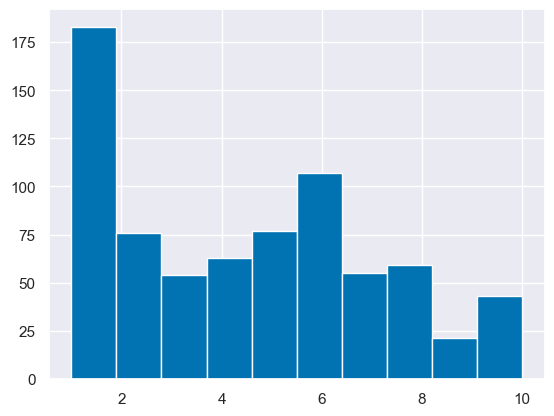

In [710]:
results_df["var_no"].hist(bins=10);

<Axes: >

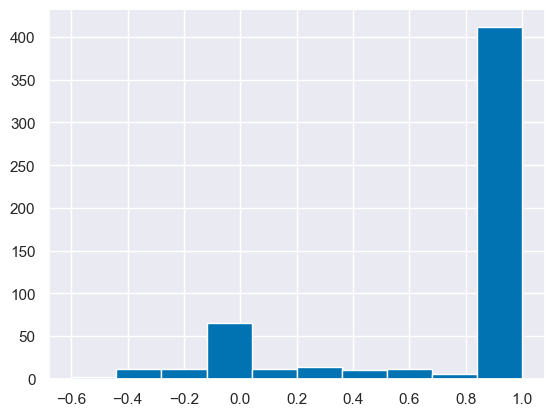

In [711]:
results_df["align_list"][results_df["var_no"]>1].apply(lambda x: np.mean(x)).hist()

(155,)


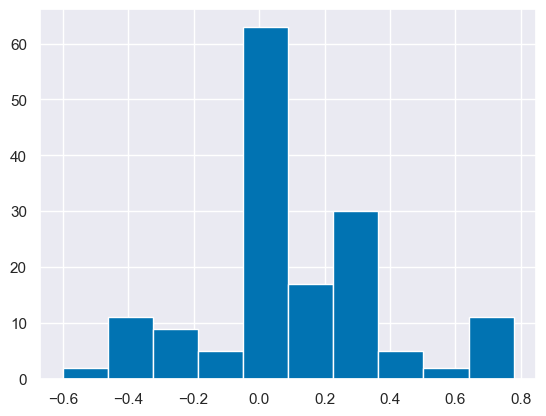

In [329]:
results_df["align_mean"][results_df["align_mean"]<1].hist();
print(results_df["align_mean"][results_df["align_mean"]<1].shape)

<Axes: >

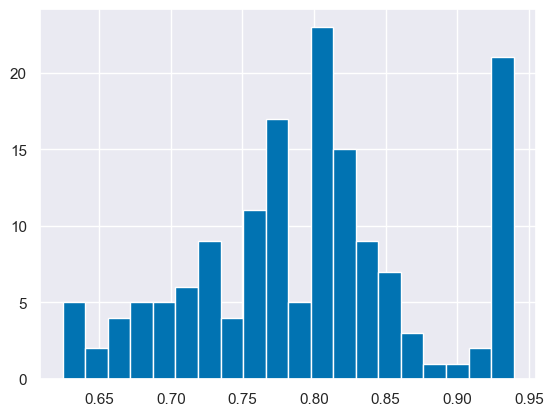

In [333]:
results_df["cronbach_list"].apply(lambda x: x[-1])[results_df["align_mean"]<1].hist(bins=20)

<Axes: >

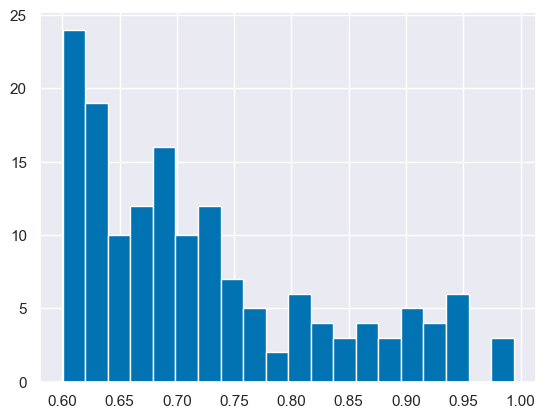

In [364]:
results_df["coverage_list"].apply(lambda x: x[-1])[results_df["align_mean"]<1].hist(bins=20);

In [342]:
results_df[(results_df["cronbach_list"].apply(lambda x: x[-1])>.9) & (results_df["align_mean"]<1)]

focal_list  \
ethno1W7                  [ethno1W7, euUndermineIdentityW7, euLawsLevelW...   
euRedTapeW7               [euRedTapeW7, euLawsLevelW7, UKsovereigntyW7, ...   
euParlOverRideW7          [euParlOverRideW7, euLawsLevelW7, euUndermineI...   
euLawsLevelW7             [euLawsLevelW7, euParlOverRideW7, euUndermineI...   
echrW7                    [echrW7, euParlOverRideW7, euLawsLevelW7, euUn...   
normEUW7                  [normEUW7, euUndermineIdentityW7, UKsovereignt...   
euUndermineIdentityW7     [euUndermineIdentityW7, euLawsLevelW7, euParlO...   
immigrantsWelfareStateW7  [immigrantsWelfareStateW7, euFinancialHelpW7, ...   
govtHandoutsW7            [govtHandoutsW7, echrW7, immigrantsWelfareStat...   
keepNukesW7               [keepNukesW7, echrW7, euParlOverRideW7, euLaws...   
euPreventWarW8            [euPreventWarW8, euRedTapeW8, UKsovereigntyW8,...   
euUKRichW8                [euUKRichW8, euUndermineIdentityW8, UKsovereig...   
euCloserW8                [euCloserW8, euUndermineIdentityW8, euUKRichW8...   
UKsovereigntyW8           [UKsovereigntyW8, euLawsLevelW8, euUndermineId...   
euRedTapeW8               [euRedTapeW8, euLawsLevelW8, UKsovereigntyW8, ...   
euMemberJoinW8            [euMemberJoinW8, euLawsLevelW8, euUndermineIde...   
euParlOverRideW8          [euParlOverRideW8, euLawsLevelW8, euUndermineI...   
euLawsLevelW8             [euLawsLevelW8, euUndermineIdentityW8, euParlO...   
echrW8                    [echrW8, euParlOverRideW8, euLawsLevelW8, euUn...   
normEUW8                  [normEUW8, euUndermineIdentityW8, UKsovereignt...   
euUndermineIdentityW8     [euUndermineIdentityW8, euLawsLevelW8, euParlO...   
campaigninfoLeaveW8       [campaigninfoLeaveW8, euUKRichW8, euUndermineI...   
immigrantsWelfareStateW8  [immigrantsWelfareStateW8, euLawsLevelW8, euUn...   

                                                   align_list  \
ethno1W7                         [1, -1, 1, -1, -1, 1, 1, -1]   
euRedTapeW7                      [1, -1, 1, -1, 1, -1, 1, -1]   
euParlOverRideW7                     [1, -1, 1, -1, 1, -1, 1]   
euLawsLevelW7                    [1, -1, -1, 1, -1, 1, -1, 1]   
echrW7                           [1, -1, 1, -1, -1, 1, -1, 1]   
normEUW7                      [1, -1, -1, 1, -1, 1, 1, -1, 1]   
euUndermineIdentityW7            [1, -1, 1, -1, 1, -1, 1, -1]   
immigrantsWelfareStateW7         [1, -1, 1, -1, 1, -1, 1, -1]   
govtHandoutsW7                [1, -1, 1, -1, 1, -1, 1, -1, 1]   
keepNukesW7               [1, -1, 1, -1, 1, -1, 1, -1, 1, -1]   
euPreventWarW8            [1, -1, -1, 1, -1, 1, -1, 1, -1, 1]   
euUKRichW8                [1, -1, -1, 1, -1, 1, -1, 1, 1, -1]   
euCloserW8                [1, -1, 1, -1, 1, -1, 1, -1, 1, -1]   
UKsovereigntyW8           [1, -1, 1, -1, 1, -1, 1, -1, -1, 1]   
euRedTapeW8               [1, -1, 1, -1, 1, -1, 1, -1, 1, -1]   
euMemberJoinW8            [1, -1, 1, -1, 1, -1, 1, -1, 1, -1]   
euParlOverRideW8          [1, -1, 1, -1, 1, -1, 1, -1, -1, 1]   
euLawsLevelW8             [1, -1, -1, 1, -1, 1, -1, 1, 1, -1]   
echrW8                    [1, -1, 1, -1, -1, 1, -1, 1, 1, -1]   
normEUW8                  [1, -1, -1, 1, -1, 1, 1, -1, 1, -1]   
euUndermineIdentityW8     [1, -1, 1, -1, 1, -1, 1, -1, -1, 1]   
campaigninfoLeaveW8       [1, -1, 1, -1, 1, -1, 1, -1, 1, -1]   
immigrantsWelfareStateW8  [1, -1, 1, -1, 1, -1, 1, -1, -1, 1]   

                                                              cronbach_list  \
ethno1W7                  [1, 0.6230205884420235, 0.7764654792813511, 0....   
euRedTapeW7               [1, 0.690183834140633, 0.8189955484920395, 0.8...   
euParlOverRideW7          [1, 0.8068371436240227, 0.863385020409045, 0.8...   
euLawsLevelW7             [1, 0.8068371436240227, 0.863385020409045, 0.8...   
echrW7                    [1, 0.7801496156997447, 0.8553093908615415, 0....   
normEUW7                  [1, 0.7053985897989754, 0.807409424960887, 0.8...   
euUndermineIdentityW7     [1, 0.7992670042353454, 0.86

In [ ]:
### note biased in distribution! Lota of Auth-correlated variables, highly concentrated in W7 and W8

In [362]:
pd.DataFrame([x for x in results_df["cronbach_list"][(results_df["align_mean"]<1)].values]).mean()

0    1.000000
1    0.719848
2    0.769707
3    0.776588
4    0.795839
5    0.815097
6    0.837206
7    0.859211
8    0.876918
9    0.897018
dtype: float64

In [363]:
 pd.DataFrame([x for x in results_df["align_list"][(results_df["align_mean"]<1)].values]).mean()

0    1.000000
1   -0.200000
2    0.213793
3   -0.321429
4    0.022222
5   -0.315068
6   -0.118644
7   -0.250000
8    0.379310
9   -0.142857
dtype: float64

In [365]:
 pd.DataFrame([x for x in results_df["coverage_list"][(results_df["align_mean"]<1)].values]).mean()

0    1.000000
1    0.953765
2    0.872846
3    0.857132
4    0.824399
5    0.783734
6    0.752282
7    0.714600
8    0.693119
9    0.659929
dtype: float64

In [373]:
pd.DataFrame(flatten(results_df["focal_list"][(results_df["align_mean"]<1)].values))[0].value_counts().head(50)

0
euLawsLevelW8                16
echrW8                       15
euUndermineIdentityW8        15
euUKRichW8                   15
immigrantsWelfareStateW8     14
UKsovereigntyW8              14
euCloserW8                   14
euParlOverRideW8             14
euLawsLevelW7                13
euUndermineIdentityW7        13
euPreventWarW8               13
euFinancialHelpW7            13
euUKRichW7                   12
immigrantsWelfareStateW7     11
echrW7                       11
UKsovereigntyW7              11
euParlOverRideW7             11
euRedTapeW8                  11
britishPrideW25               8
cwAuthorsW25                  8
cwStatuesW25                  8
monarchW25                    8
cancelBrexitW17               8
antiIntellectualW17           8
overseasAidW17                8
empathy8W14                   7
empathy7W14                   7
empathy3W14                   7
empathy10W14                  7
empathy5W14                   7
cwParentsW25                  7
empath

In [ ]:
#######

In [401]:
results_df = pd.DataFrame(store_dict2).T
results_df.columns = ["focal_list","align_list","cronbach_list","coverage_list","var_no"]
results_df["align_mean"] = results_df["align_list"].apply(lambda x: np.mean(x))
results_df

focal_list  \
difficultBlameCoalitionW1                        [difficultBlameCoalitionW1]   
singlePartyEffectiveW1     [singlePartyEffectiveW1, coalitionInTuneW1, si...   
coalitionInTuneW1          [coalitionInTuneW1, singlePartyEffectiveW1, co...   
coalitionDontDeliverW1                              [coalitionDontDeliverW1]   
dutyToVote2W1                  [dutyToVote2W1, dutyToVote2W2, dutyToVote2W3]   
...                                                                      ...   
statusAreaEduW25                                          [statusAreaEduW25]   
statusAreaSpacesW25                                    [statusAreaSpacesW25]   
statusAreaShopsW25                                      [statusAreaShopsW25]   
statusAreaCrimeW25                                      [statusAreaCrimeW25]   
statusAreaSpiritW25                                    [statusAreaSpiritW25]   

                                 align_list  \
difficultBlameCoalitionW1               [1]   
singlePartyEffectiveW1     [1, 1, 1, 1, -1]   
coalitionInTuneW1             [1, 1, -1, 1]   
coalitionDontDeliverW1                  [1]   
dutyToVote2W1                     [1, 1, 1]   
...                                     ...   
statusAreaEduW25                        [1]   
statusAreaSpacesW25                     [1]   
statusAreaShopsW25                      [1]   
statusAreaCrimeW25                      [1]   
statusAreaSpiritW25                     [1]   

                                                               cronbach_list  \
difficultBlameCoalitionW1                                                [1]   
singlePartyEffectiveW1     [1, 0.8204124875988368, 0.8352994352235753, 0....   
coalitionInTuneW1          [1, 0.8204124875988368, 0.7297143313911291, 0....   
coalitionDontDeliverW1                                                   [1]   
dutyToVote2W1                    [1, 0.7630334265275582, 0.8315790038065645]   
...                                                                      ...   
statusAreaEduW25                                                         [1]   
statusAreaSpacesW25                                                      [1]   
statusAreaShopsW25                                                       [1]   
statusAreaCrimeW25                                                       [1]   
statusAreaSpiritW25                                                      [1]   

                                                               coverage_list  \
difficultBlameCoalitionW1                                                [1]   
singlePartyEffectiveW1     [1, 0.9799972170041049, 0.8397303122314069, 0....   
coalitionInTuneW1          [1, 0.9796904886106764, 0.9677658549784224, 0....   
coalitionDontDeliverW1                                                   [1]   
dutyToVote2W1                     [1, 0.8772750041743196, 0.628411458194257]   
...                                                                      ...   
statusAreaEduW25                                                         [1]   
statusAreaSpacesW25                                                      [1]   
statusAreaShopsW25                                                       [1]   
statusAreaCrimeW25                                                       [1]   
statusAreaSpiritW25                                                      [1]   

                          var_no  align_mean  
difficultBlameCoalitionW1      1         1.0  
singlePartyEffectiveW1         5         0.6  
coalitionInTuneW1              4         0.5  
coalitionDontDeliverW1         1         1.0  
dutyToVote2W1                  3         1.0  
...                          ...         ...  
statusAreaEduW25               1         1.0  
statusAreaSpacesW25            1         1.0  
statusAreaShopsW25             1         1.0  
statusAreaCrimeW25             1         1.0  
statusAreaSpiritW25            1         1.0  

[717 rows x 6 columns]

In [412]:
results_df["align_mean"].value_counts()

align_mean
 1.000000    600
 0.000000     50
-0.333333     16
 0.333333     13
 0.142857      8
 0.600000      6
-0.200000      6
 0.111111      5
 0.200000      3
 0.500000      2
-0.111111      2
 0.666667      2
 0.250000      2
-0.600000      1
 0.428571      1
Name: count, dtype: int64

In [402]:
pd.DataFrame(flatten(results_df["focal_list"][(results_df["align_mean"]<1)].values))[0].value_counts().head(50)

0
euLawsLevelW8               17
euUndermineIdentityW8       16
UKsovereigntyW8             16
euParlOverRideW8            15
immigrantsWelfareStateW8    15
euUKRichW8                  15
echrW8                      14
euCloserW8                  14
euPreventWarW8              13
euUndermineIdentityW7       12
euLawsLevelW7               10
immigrantsWelfareStateW7    10
euRedTapeW8                 10
euUKRichW7                   9
UKsovereigntyW7              9
euParlOverRideW7             9
britishPrideW25              9
cwStatuesW25                 8
echrW7                       8
euFinancialHelpW7            8
cwAuthorsW25                 8
monarchW25                   8
empathy3W14                  7
empathy4W20                  7
empathy7W14                  7
empathy8W14                  7
empathy10W14                 7
empathy5W14                  7
empathy8W20                  7
cwParentsW25                 7
empathy2W14                  7
empathy2W20                  7
empath

In [403]:
pd.DataFrame([x for x in results_df["coverage_list"][(results_df["align_mean"]<1)].values]).mean()

0    1.000000
1    0.965843
2    0.874630
3    0.846538
4    0.819007
5    0.787652
6    0.759162
7    0.723697
8    0.691775
9    0.668558
dtype: float64

In [404]:
pd.DataFrame([x for x in results_df["align_list"][(results_df["align_mean"]<1)].values]).mean()

0    1.000000
1    0.128205
2   -0.109091
3   -0.078652
4   -0.306667
5   -0.333333
6   -0.283019
7   -0.454545
8    0.062500
9   -0.142857
dtype: float64

In [405]:
pd.DataFrame([x for x in results_df["cronbach_list"][(results_df["align_mean"]<1)].values]).mean()

0    1.000000
1    0.753622
2    0.789060
3    0.803176
4    0.810676
5    0.825031
6    0.840738
7    0.856841
8    0.865537
9    0.888811
dtype: float64

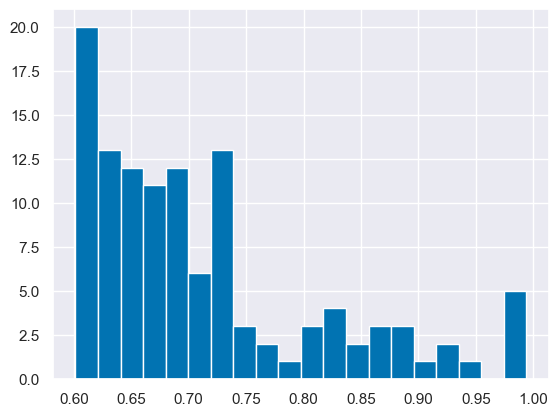

In [406]:
results_df["coverage_list"].apply(lambda x: x[-1])[results_df["align_mean"]<1].hist(bins=20);

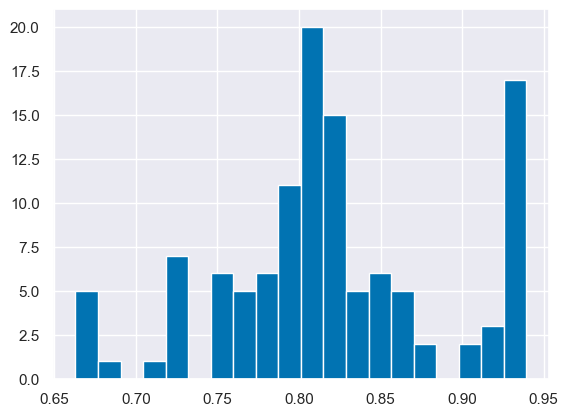

In [408]:
results_df["cronbach_list"].apply(lambda x: x[-1])[results_df["align_mean"]<1].hist(bins=20);

(117,)


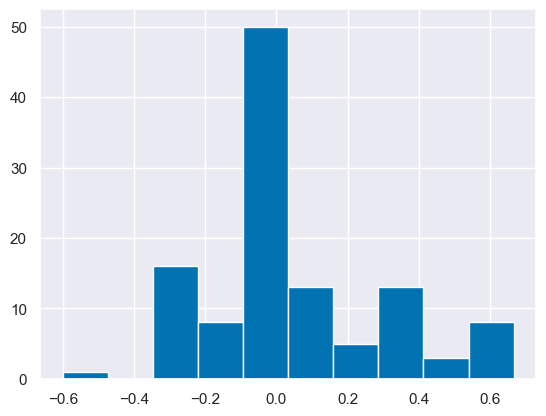

In [416]:
results_df["align_mean"][results_df["align_mean"]<1].hist();
print(results_df["align_mean"][results_df["align_mean"]<1].shape)

In [417]:
results_df["var_no"][results_df["align_mean"]<1].value_counts()

var_no
3     21
10    21
4     14
5     12
8     12
9     11
6     10
7      9
2      7
Name: count, dtype: int64

In [ ]:
## we need focal_list, align_list

In [13]:
results_df = pd.DataFrame(store_dict3).T
results_df.columns = ["focal_list","align_list","cronbach_list","coverage_list","var_no"]
results_df["align_mean"] = results_df["align_list"].apply(lambda x: np.mean(x))
results_df
sem_list = results_df[(results_df["align_mean"]<1) & (results_df["var_no"]>3)][["focal_list","align_list"]]

In [139]:
results_df = pd.DataFrame(store_dict_na).T
results_df.columns = ["focal_list","align_list","cronbach_list","coverage_list","var_no"]
results_df["align_mean"] = results_df["align_list"].apply(lambda x: np.mean(x))
# results_df
sem_list = results_df[(results_df["align_mean"]<1) & (results_df["var_no"]>3)][["focal_list","align_list"]]

'1|1|1|-1|-1|-1|1|-1|-1'

In [169]:
%%time
sem_store_na = run_semopy( sem_list , na_dataset )

CPU times: total: 16min 54s
Wall time: 2h 7min 42s


In [168]:
def run_semopy( sem_list , dataset ):

    sem_store = {}
    value_list = ["lr1","lr2","lr3","lr4","lr5","al1","al2","al3","al4","al5"]

    for ind in sem_list.index:
        var_list = sem_list.loc[ind]["focal_list"]

        temp = dataset[var_list]
        indices = temp.dropna().index
        highest_coverage_value_suff = search(BES_Panel.loc[indices],"lr1").sort_values().index[-1].split("lr1")[1]
        temp[value_list]=BES_Panel[[x+highest_coverage_value_suff for x in value_list]]\
            .apply(lambda x: x.replace("Don't know",np.nan).cat.codes.replace(-1,np.nan))
        temp=temp.dropna()

        model_descr = 'LeftCorrected =~ lr1 + lr2 + lr3 + lr4 + lr5\n'+\
        'AuthCorrected =~ al1 + al2 + al3 + al4 + al5\n'+\
        'E =~ '+" + ".join(var_list)+'\n'+\
        'Acq =~ 1*lr1 + 1*lr2 + 1*lr3 + 1*lr4 + 1*lr5 + 1*al1 + 1*al2 + 1*al3 + 1*al4 + 1*al5 + 1*'+" + 1*".join(var_list)+'\n'+\
        'DEFINE(ordinal) lr1 lr2 lr3 lr4 lr5 al1 al2 al3 al4 al5 '+" ".join(var_list)

        comp_model_descr = 'LeftUncorrected =~ lr1 + lr2 + lr3 + lr4 + lr5\n'+\
        'AuthUncorrected =~ al1 + al2 + al3 + al4 + al5\n'+\
        'EUncorrected =~ '+" + ".join(var_list)+'\n'+\
        'DEFINE(ordinal) lr1 lr2 lr3 lr4 lr5 al1 al2 al3 al4 al5 '+" ".join(var_list)    

        mod_temp = semopy.Model(model_descr)
        try:
            res = mod_temp.fit(temp,obj='ULS',solver='BFGS')
        except:
            sem_store[ind] =(temp,"crashed")
            continue

        factors_temp = mod_temp.predict_factors(temp)
        factors_temp.index = temp.index
        temp[factors_temp.columns] = factors_temp
        temp["full_model"] = model_descr

        mod_temp_comp = semopy.Model(comp_model_descr)
        res_comp = mod_temp_comp.fit(temp,obj='ULS',solver='BFGS')

        factors_temp = mod_temp_comp.predict_factors(temp)
        factors_temp.index = temp.index
        temp[factors_temp.columns] = factors_temp
        temp["comp_model"] = comp_model_descr    

        temp["lr_scale"] = temp["lr1"]+temp["lr2"]+temp["lr3"]+temp["lr4"]+temp["lr5"]
        temp["al_scale"] = temp["al1"]+temp["al2"]+temp["al3"]+temp["al4"]+temp["al5"]
        
        temp["align_list"] = "|".join( [str(x) for x in sem_list.loc[ind]["align_list"]] )

        # maybe also for E = Eitems * align?

        sem_store[ind] = (temp,"success",res,mod_temp,res_comp,mod_temp_comp,)
    return sem_store

In [140]:
%%time
sem_store_na = {}
value_list = ["lr1","lr2","lr3","lr4","lr5","al1","al2","al3","al4","al5"]

for ind in sem_list.index:
    var_list = sem_list.loc[ind]["focal_list"]
    
    temp = sa_dataset[var_list]
    indices = temp.dropna().index
    highest_coverage_value_suff = search(BES_Panel.loc[indices],"lr1").sort_values().index[-1].split("lr1")[1]
    temp[value_list]=BES_Panel[[x+highest_coverage_value_suff for x in value_list]]\
        .apply(lambda x: x.replace("Don't know",np.nan).cat.codes.replace(-1,np.nan))
    temp=temp.dropna()

    model_descr = 'LeftCorrected =~ lr1 + lr2 + lr3 + lr4 + lr5\n'+\
    'AuthCorrected =~ al1 + al2 + al3 + al4 + al5\n'+\
    'E =~ '+" + ".join(var_list)+'\n'+\
    'Acq =~ 1*lr1 + 1*lr2 + 1*lr3 + 1*lr4 + 1*lr5 + 1*al1 + 1*al2 + 1*al3 + 1*al4 + 1*al5 + 1*'+" + 1*".join(var_list)+'\n'+\
    'DEFINE(ordinal) lr1 lr2 lr3 lr4 lr5 al1 al2 al3 al4 al5 '+" ".join(var_list)
    
    comp_model_descr = 'LeftUncorrected =~ lr1 + lr2 + lr3 + lr4 + lr5\n'+\
    'AuthUncorrected =~ al1 + al2 + al3 + al4 + al5\n'+\
    'EUncorrected =~ '+" + ".join(var_list)+'\n'+\
    'DEFINE(ordinal) lr1 lr2 lr3 lr4 lr5 al1 al2 al3 al4 al5 '+" ".join(var_list)    
    
    mod_temp = semopy.Model(model_descr)
    res = mod_temp.fit(temp,obj='ULS',solver='BFGS')

    factors_temp = mod_temp.predict_factors(temp)
    factors_temp.index = temp.index
    temp[factors_temp.columns] = factors_temp
    temp["full_model"] = model_descr
    
    mod_temp_comp = semopy.Model(comp_model_descr)
    res_comp = mod_temp_comp.fit(temp,obj='ULS',solver='BFGS')

    factors_temp = mod_temp_comp.predict_factors(temp)
    factors_temp.index = temp.index
    temp[factors_temp.columns] = factors_temp
    temp["comp_model"] = comp_model_descr    
    
    temp["lr_scale"] = temp["lr1"]+temp["lr2"]+temp["lr3"]+temp["lr4"]+temp["lr5"]
    temp["al_scale"] = temp["al1"]+temp["al2"]+temp["al3"]+temp["al4"]+temp["al5"]
    
    # maybe also for E = Eitems * align?
    
    
    sem_store_na[ind] = (temp,res,mod_temp,res_comp,mod_temp_comp)

KeyError: "None of [Index(['econGenRetroW1', 'changeEconomyW1', 'approveUKGovtW1',\n       'cutsTooFarNationalW1', 'cutsTooFarLocalW1', 'cutsTooFarNHSW1',\n       'approveUKGovtW2', 'cutsTooFarNationalW2', 'cutsTooFarLocalW2'],\n      dtype='object')] are in the [columns]"

In [19]:

manual_value_lists = (["euUKRichW7","euCloserW7","euMemberJoinW7","euParlOverRideW7",
                       "euLawsLevelW7","euRedTapeW7","euUndermineIdentityW7","echrW7"],
                      ["euUKRichW8","euCloserW8","euMemberJoinW8","euParlOverRideW8",
                       "euLawsLevelW8","euRedTapeW8","euUndermineIdentityW8","echrW8"],
                      ["sdodominance1W15","sdodominance2W15","sdodominance3W15","sdodominance4W15",
                       "sdoantiegal1W15","sdoantiegal2W15","sdoantiegal3W15","sdoantiegal4W15",],
                      ["zeroSum1W14","zeroSum4W14","zeroSum5W14","zeroSum7W14","zeroSum9W14","zeroSum11W14",],
                      ["empathy1W14","empathy2W14","empathy3W14","empathy4W14","empathy5W14",
                      "empathy6W14","empathy7W14","empathy8W14","empathy9W14","empathy10W14",],
                      ["empathy1W20","empathy2W20","empathy3W20","empathy4W20","empathy5W20",
                      "empathy6W20","empathy7W20","empathy8W20","empathy9W20","empathy10W20",],
                      ["ethno1W7","ethno2W7","ethno3W7","ethno4W7","ethno5W7","ethno6W7",],
                      ["ethno1W9","ethno2W9","ethno3W9","ethno4W9","ethno5W9","ethno6W9",],
                      ["ethno1W10","ethno2W10","ethno3W10","ethno4W10","ethno5W10","ethno6W10",],
                      ["aom1W7","aom2W7","aom3W7","aom4W7","aom5W7","aom6W7","aom7W7",],
                      ["authLong1W10","authLong2W10","authLong3W10","authLong4W10",],
                     )

main_value_list = []

# sdo variables use favour/oppose

In [20]:
%%time
# sem_store = {}
value_list = ["lr1","lr2","lr3","lr4","lr5","al1","al2","al3","al4","al5"]


for var_list in manual_value_lists:

    ind = var_list[0]
    temp = sa_dataset[var_list]
    indices = temp.dropna().index
    highest_coverage_value_suff = search(BES_Panel.loc[indices],"lr1").sort_values().index[-1].split("lr1")[1]
    temp[value_list]=BES_Panel[[x+highest_coverage_value_suff for x in value_list]]\
        .apply(lambda x: x.replace("Don't know",np.nan).cat.codes.replace(-1,np.nan))
    temp=temp.dropna()

    model_descr = 'LeftCorrected =~ lr1 + lr2 + lr3 + lr4 + lr5\n'+\
    'AuthCorrected =~ al1 + al2 + al3 + al4 + al5\n'+\
    'E =~ '+" + ".join(var_list)+'\n'+\
    'Acq =~ 1*lr1 + 1*lr2 + 1*lr3 + 1*lr4 + 1*lr5 + 1*al1 + 1*al2 + 1*al3 + 1*al4 + 1*al5 + 1*'+" + 1*".join(var_list)+'\n'+\
    'DEFINE(ordinal) lr1 lr2 lr3 lr4 lr5 al1 al2 al3 al4 al5 '+" ".join(var_list)
    
    comp_model_descr = 'LeftUncorrected =~ lr1 + lr2 + lr3 + lr4 + lr5\n'+\
    'AuthUncorrected =~ al1 + al2 + al3 + al4 + al5\n'+\
    'EUncorrected =~ '+" + ".join(var_list)+'\n'+\
    'DEFINE(ordinal) lr1 lr2 lr3 lr4 lr5 al1 al2 al3 al4 al5 '+" ".join(var_list)    
    
    mod_temp = semopy.Model(model_descr)
    res = mod_temp.fit(temp,obj='ULS',solver='BFGS')

    factors_temp = mod_temp.predict_factors(temp)
    factors_temp.index = temp.index
    temp[factors_temp.columns] = factors_temp
    temp["full_model"] = model_descr
    
    mod_temp_comp = semopy.Model(comp_model_descr)
    res_comp = mod_temp_comp.fit(temp,obj='ULS',solver='BFGS')

    factors_temp = mod_temp_comp.predict_factors(temp)
    factors_temp.index = temp.index
    temp[factors_temp.columns] = factors_temp
    temp["comp_model"] = comp_model_descr    
    
    temp["lr_scale"] = temp["lr1"]+temp["lr2"]+temp["lr3"]+temp["lr4"]+temp["lr5"]
    temp["al_scale"] = temp["al1"]+temp["al2"]+temp["al3"]+temp["al4"]+temp["al5"]
    
    # maybe also for E = Eitems * align?
    
    
    sem_store[ind] = (temp,res,mod_temp,res_comp,mod_temp_comp)

CPU times: total: 26.3 s
Wall time: 1min 14s


In [746]:
len( sem_store )

133

In [484]:
sem_store[list(sem_store.keys())[4]][1]


SolverResult(fun=0.5850139215504484, success=False, n_it=10000, x=array([ 1.15633735e+00,  1.16525535e+00,  1.20393627e+00,  1.14963456e+00,
        9.86377120e-01,  9.62218052e-01,  7.97738335e-01,  1.02656364e+00,
        5.59606608e+03, -1.27320062e+05, -1.24542411e+05, -2.46802134e+03,
        6.41362546e-01, -8.28221697e-01, -6.07459824e-01,  1.63655668e+00,
        7.66843260e-01,  1.22171872e-10,  8.40188137e-06, -1.17487948e-05,
       -7.86777369e-06,  1.07096399e+00,  3.78524163e-01,  4.00244149e-01,
        4.37268964e-01,  6.38563353e-01,  3.34424724e-01,  5.17639463e-01,
        5.56434681e-01,  3.58620646e-01,  5.02593112e-01,  3.31491273e-01,
        3.20152710e-01,  2.69001088e-01,  3.39901202e-01,  2.60776572e-01,
        3.99365267e-01]), message='Maximum number of iterations has been exceeded.', name_method='BFGS', name_obj='ULS')

In [455]:
temp = sa_dataset[sem_list.loc[ind]["focal_list"]]
indices = temp.dropna().index

highest_coverage_value_suff = search(BES_Panel.loc[indices],"lr1").sort_values().index[-1].split("lr1")[1]

temp[value_list]=BES_Panel[[x+highest_coverage_value_suff for x in value_list]]\
    .apply(lambda x: x.replace("Don't know",np.nan).cat.codes.replace(-1,np.nan))

temp=temp.dropna()
temp

coalitionInTuneW1  singlePartyEffectiveW1  coalitionDontDeliverW1  \
id                                                                         
2                    3.0                     2.0                     1.0   
6                    0.0                     0.0                     3.0   
8                    2.0                     1.0                     2.0   
9                    1.0                     1.0                     3.0   
14                   3.0                     1.0                     1.0   
...                  ...                     ...                     ...   
30558                1.0                     0.0                     3.0   
30562                0.0                     3.0                     3.0   
30563                1.0                     1.0                     3.0   
30575                1.0                     1.0                     3.0   
30577                1.0                     0.0                     4.0   

       singlePartyEffectiveW3  lr1  lr2  lr3  lr4  lr5  al1  al2  al3  al4  \
id                                                                           
2                         3.0  1.0  1.0  1.0  1.0  1.0  2.0  1.0  3.0  3.0   
6                         1.0  4.0  4.0  4.0  4.0  4.0  4.0  4.0  4.0  2.0   
8                         1.0  1.0  3.0  3.0  3.0  3.0  2.0  1.0  2.0  1.0   
9                         1.0  2.0  3.0  3.0  3.0  3.0  1.0  0.0  2.0  2.0   
14                        2.0  1.0  1.0  1.0  1.0  1.0  0.0  3.0  3.0  1.0   
...                       ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
30558                     0.0  3.0  1.0  3.0  2.0  1.0  3.0  0.0  2.0  0.0   
30562                     0.0  3.0  4.0  2.0  4.0  3.0  2.0  2.0  1.0  0.0   
30563                     1.0  4.0  3.0  4.0  4.0  4.0  1.0  3.0  1.0  1.0   
30575                     1.0  3.0  4.0  4.0  3.0  4.0  2.0  0.0  3.0  3.0   
30577                     0.0  3.0  4.0  4.0  3.0  3.0  4.0  4.0  2.0  1.0   

       al5  
id          
2      3.0  
6      4.0  
8      3.0  
9      2.0  
14     2.0  
...    ...  
30558  4.0  
30562  2.0  
30563  3.0  
30575  2.0  
30577  4.0  

[18166 rows x 14 columns]

In [467]:
# model_descr = 'LeftCorrected =~ lr1 + lr2 + lr3 + lr4 + lr5\n'+\
#     'AuthCorrected =~ al1 + al2 + al3 + al4 + al5\n'+\
#     'E =~ euro1 + euro2 + euro3 + euro4 + euro5 + euro6 + euro7 + euro8\n'+\
#     'Acq =~ 1*lr1 + 1*lr2 + 1*lr3 + 1*lr4 + 1*lr5 + 1*al1 + 1*al2 + 1*al3 + 1*al4 + 1*al5 + 1*euro1 + 1*euro2 + 1*euro3 + 1*euro4 + 1*euro5 + 1*euro6 + 1*euro7 + 1*euro8\n'+\
#     'DEFINE(ordinal) lr1 lr2 lr3 lr4 lr5 al1 al2 al3 al4 al5 euro1 euro2 euro3 euro4 euro5 euro6 euro7 euro8'

In [460]:
model_descr = 'LeftCorrected =~ lr1 + lr2 + lr3 + lr4 + lr5\n'+\
    'AuthCorrected =~ al1 + al2 + al3 + al4 + al5\n'+\
    'E =~ '+" + ".join(var_list)+'\n'+\
    'Acq =~ 1*lr1 + 1*lr2 + 1*lr3 + 1*lr4 + 1*lr5 + 1*al1 + 1*al2 + 1*al3 + 1*al4 + 1*al5 + 1*'+" + 1*".join(var_list)+'\n'+\
    'DEFINE(ordinal) lr1 lr2 lr3 lr4 lr5 al1 al2 al3 al4 al5 '+" ".join(var_list)

In [461]:
model_descr

'LeftCorrected =~ lr1 + lr2 + lr3 + lr4 + lr5\nAuthCorrected =~ al1 + al2 + al3 + al4 + al5\nE =~ coalitionInTuneW1 + singlePartyEffectiveW1 + coalitionDontDeliverW1 + singlePartyEffectiveW3\nAcq =~ 1*lr1 + 1*lr2 + 1*lr3 + 1*lr4 + 1*lr5 + 1*al1 + 1*al2 + 1*al3 + 1*al4 + 1*al5 + 1*coalitionInTuneW1 + 1*singlePartyEffectiveW1 + 1*coalitionDontDeliverW1 + 1*singlePartyEffectiveW3\nDEFINE(ordinal) lr1 lr2 lr3 lr4 lr5 al1 al2 al3 al4 al5 coalitionInTuneW1 singlePartyEffectiveW1 coalitionDontDeliverW1 singlePartyEffectiveW3'

In [462]:
%%time
mod_temp = semopy.Model(model_descr)
res = mod_temp.fit(temp,obj='ULS',solver='BFGS')
print(res)

factors_temp = mod_temp.predict_factors(temp)
factors_temp.index = temp.index

temp[factors_temp.columns] = factors_temp

factors_temp["full_model"] = model_descr



Name of objective: ULS
Optimization method: BFGS
Optimization successful.
Optimization terminated successfully.
Objective value: 0.441
Number of iterations: 80
Params: 1.146 1.190 1.216 1.055 0.972 0.942 0.677 1.051 1.044 -1.732 0.830 0.117 -0.154 -0.122 0.824 0.143 0.258 0.173 -0.317 -0.211 0.633 0.367 0.404 0.442 0.714 0.296 0.706 0.280 0.495 0.333 0.278 0.245 0.437 0.242 0.419
CPU times: total: 2.67 s
Wall time: 2.69 s


Acq  AuthCorrected         E  LeftCorrected
id                                                     
2      0.416324      -0.791097  0.715330      -1.868757
6     -0.358491       1.383521 -0.716910       1.199132
8     -0.043075      -0.602394  0.025353      -0.059253
9     -0.220391      -0.976776 -0.119786       0.201425
14     0.164509      -0.984476  0.426808      -1.642530
...         ...            ...       ...            ...
30558 -0.431253       0.060119 -0.504362      -0.293620
30562 -0.113036      -0.835397 -0.035368       0.386534
30563 -0.179093      -0.443810 -0.202557       0.886559
30575 -0.175567      -0.585143 -0.159002       0.722308
30577 -0.385340       1.032982 -0.652518       0.794058

[18166 rows x 4 columns]

Acq  AuthCorrected         E  LeftCorrected
id                                                     
1      0.530472       0.724968 -1.784051       0.818220
2      0.128674      -0.405621 -0.602133      -1.359240
6      0.241454       0.482802 -0.328566       1.106811
7      0.472805       0.820391 -1.213870       0.090698
8      0.111092      -0.785626 -0.617926      -1.273242
...         ...            ...       ...            ...
51060 -0.682099      -0.766248  2.251299      -0.743579
51061 -0.228921      -0.073960  0.773740       0.591285
51062  0.058711      -0.174583 -0.110469      -0.154418
51065  0.104775       0.107527 -0.771343      -0.567940
51067 -0.864767      -1.578604  2.720878       2.274905

[22673 rows x 4 columns]

89

In [21]:
didnt_converge_list = []

for focal_var in sem_store.keys():
    if sem_store[focal_var][1].message != 'Optimization terminated successfully.':
        didnt_converge_list.append(focal_var)
        
didnt_converge_list

['antiIntellectualW8', 'populism4W10', 'authLong1W10']

In [29]:
sem_store['authLong1W10'][0].select_dtypes('number').corr()

authLong1W10  authLong2W10  authLong3W10  authLong4W10  \
authLong1W10         1.000000     -0.258450      0.343823      0.541530   
authLong2W10        -0.258450      1.000000     -0.144922     -0.264437   
authLong3W10         0.343823     -0.144922      1.000000      0.385722   
authLong4W10         0.541530     -0.264437      0.385722      1.000000   
lr1                  0.150193     -0.047148      0.136879      0.150998   
lr2                  0.029343     -0.035262      0.092391      0.075523   
lr3                  0.068746     -0.055957      0.112278      0.103936   
lr4                  0.027180     -0.020764      0.068597      0.055434   
lr5                 -0.010829      0.072213      0.021139      0.010451   
al1                 -0.375847      0.431505     -0.216385     -0.353164   
al2                 -0.256053      0.387066     -0.171177     -0.265510   
al3                 -0.387633      0.496014     -0.220427     -0.386858   
al4                 -0.253868      0.332703     -0.142376     -0.268840   
al5                 -0.311250      0.399780     -0.177699     -0.333670   
Acq                 -0.478916      0.604989     -0.277006     -0.480570   
AuthCorrected       -0.554732      0.582565     -0.332209     -0.556562   
E                    0.672469     -0.551971      0.429201      0.677273   
LeftCorrected        0.419245     -0.468534      0.288929      0.438243   
AuthUncorrected     -0.472607      0.563202     -0.282368     -0.474833   
EUncorrected         0.718432     -0.656470      0.464811      0.729781   
LeftUncorrected      0.077494     -0.037326      0.119448      0.112741   
lr_scale             0.072212     -0.023212      0.111934      0.104168   
al_scale            -0.401790      0.524815     -0.237412     -0.408266   

                      lr1       lr2       lr3       lr4       lr5       al1  \
authLong1W10     0.150193  0.029343  0.068746  0.027180 -0.010829 -0.375847   
authLong2W10    -0.047148 -0.035262 -0.055957 -0.020764  0.072213  0.431505   
authLong3W10     0.136879  0.092391  0.112278  0.068597  0.021139 -0.216385   
authLong4W10     0.150998  0.075523  0.103936  0.055434  0.010451 -0.353164   
lr1              1.000000  0.451932  0.607481  0.526993  0.379489 -0.132225   
lr2              0.451932  1.000000  0.554242  0.587688  0.540802  0.016244   
lr3              0.607481  0.554242  1.000000  0.610056  0.464357 -0.035101   
lr4              0.526993  0.587688  0.610056  1.000000  0.496721  0.039106   
lr5              0.379489  0.540802  0.464357  0.496721  1.000000  0.110523   
al1             -0.132225  0.016244 -0.035101  0.039106  0.110523  1.000000   
al2             -0.108106 -0.003562 -0.042623  0.058439  0.100404  0.543591   
al3             -0.129718 -0.042583 -0.084983 -0.031778  0.043550  0.629953   
al4             -0.034368 -0.041896 -0.047829 -0.028502  0.010413  0.424778   
al5             -0.113622  0.022112 -0.025193  0.062090  0.117443  0.601532   
Acq             -0.154874 -0.002211 -0.066038  0.033055  0.125233  0.853758   
AuthCorrected   -0.092613  0.048543 -0.004409  0.088427  0.164927  0.828922   
E                0.205365  0.045592  0.111020  0.014294 -0.077614 -0.797410   
LeftCorrected    0.652978  0.468134  0.581905  0.470861  0.308012 -0.654268   
AuthUncorrected -0.142183 -0.005714 -0.057832  0.032313  0.109198  0.859312   
EUncorrected     0.222703  0.103806  0.158059  0.079302 -0.018607 -0.716832   
LeftUncorrected  0.742712  0.782376  0.857387  0.852320  0.667386 -0.002698   
lr_scale         0.776847  0.783021  0.822677  0.819800  0.724316 -0.006544   
al_scale        -0.132309 -0.013325 -0.060620  0.027996  0.099161  0.813818   

                 ...       al5       Acq  AuthCorrected         E  \
authLong1W10     ... -0.311250 -0.478916      -0.554732  0.672469   
authLong2W10     ...  0.399780  0.604989       0.582565 -0.551971   
authLong3W10     ... -0.177699 -0.277006      -0.332209  0.429201   
authLong4W10     ... -0.333670 -0.480570   

In [28]:
sem_store['populism4W10'][0].select_dtypes('number').corr()

populism4W10  populism2W10  antiIntellectualW10  \
populism4W10             1.000000      0.634389             0.539795   
populism2W10             0.634389      1.000000             0.577251   
antiIntellectualW10      0.539795      0.577251             1.000000   
populism1W10             0.449596      0.557016             0.491762   
refAreGoodW10            0.395591      0.565403             0.506000   
overseasAidW10           0.371149      0.455287             0.523273   
euUKRichW8              -0.308107     -0.390714            -0.468285   
lr1                      0.157761      0.123007             0.027318   
lr2                      0.207535      0.164557             0.104179   
lr3                      0.214449      0.174969             0.099940   
lr4                      0.258044      0.222514             0.164164   
lr5                      0.200387      0.199427             0.150063   
al1                      0.276335      0.349687             0.434486   
al2                      0.322542      0.407041             0.438294   
al3                      0.173158      0.240932             0.321498   
al4                      0.139045      0.204995             0.267563   
al5                      0.279418      0.357703             0.417453   
Acq                     -0.549103     -0.674902            -0.723707   
AuthCorrected            0.547475      0.673365             0.722988   
E                        0.552292      0.678193             0.726133   
LeftCorrected            0.554451      0.679275             0.726025   
AuthUncorrected          0.388566      0.493368             0.560494   
EUncorrected             0.654820      0.784237             0.792358   
LeftUncorrected          0.282807      0.245178             0.162841   
lr_scale                 0.258082      0.219539             0.133197   
al_scale                 0.313095      0.409347             0.488253   

                     populism1W10  refAreGoodW10  overseasAidW10  euUKRichW8  \
populism4W10             0.449596       0.395591        0.371149   -0.308107   
populism2W10             0.557016       0.565403        0.455287   -0.390714   
antiIntellectualW10      0.491762       0.506000        0.523273   -0.468285   
populism1W10             1.000000       0.517503        0.437777   -0.427338   
refAreGoodW10            0.517503       1.000000        0.472400   -0.484155   
overseasAidW10           0.437777       0.472400        1.000000   -0.512497   
euUKRichW8              -0.427338      -0.484155       -0.512497    1.000000   
lr1                      0.008735      -0.033973       -0.114862    0.145256   
lr2                      0.122672       0.038178        0.019643    0.000122   
lr3                      0.110436       0.028513       -0.022597    0.044594   
lr4                      0.154940       0.075384        0.070938   -0.023483   
lr5                      0.142042       0.099023        0.114911   -0.053767   
al1                      0.403045       0.410438        0.519741   -0.437459   
al2                      0.393895       0.454444        0.586351   -0.433372   
al3                      0.329518       0.330450        0.417717   -0.321523   
al4                      0.229672       0.292760        0.266521   -0.252304   
al5                      0.409929       0.424457        0.519407   -0.420562   
Acq                     -0.661060      -0.711628       -0.763887    0.846157   
AuthCorrected            0.660623       0.711278        0.765281   -0.842917   
E                        0.663265       0.713555        0.765340   -0.842428   
LeftCorrected            0.663351       0.712053        0.763349   -0.844009   
AuthUncorrected          0.521544       0.561986        0.676211   -0.543605   
EUncorrected             0.724019       0.757963        0.773826   -0.662984   
LeftUncorrected          0.160683       0.073970        0.040349    0.003614   
lr_scale                 0.130179       0.048463        0.010992    0.034407

In [30]:
sem_store['antiIntellectualW8'][0].select_dtypes('number').corr()

antiIntellectualW8  antiIntellectualW9  euUKRichW8  \
antiIntellectualW8            1.000000            0.638806   -0.439539   
antiIntellectualW9            0.638806            1.000000   -0.520426   
euUKRichW8                   -0.439539           -0.520426    1.000000   
euLawsLevelW8                -0.390506           -0.480975    0.644653   
lr1                           0.009281           -0.018703    0.159985   
lr2                           0.163387            0.149926   -0.080090   
lr3                           0.139057            0.119380   -0.001693   
lr4                           0.200484            0.169088   -0.078763   
lr5                           0.194256            0.183308   -0.092769   
al1                           0.382255            0.405297   -0.432640   
al2                           0.408606            0.437134   -0.447538   
al3                           0.282390            0.309418   -0.331064   
al4                           0.220280            0.237762   -0.239457   
al5                           0.396547            0.409806   -0.426937   
Acq                          -0.722281           -0.821317    0.819771   
AuthCorrected                 0.720646            0.818565   -0.817775   
E                             0.726926            0.825813   -0.815980   
LeftCorrected                 0.725960            0.823980   -0.817864   
AuthUncorrected               0.523999            0.563815   -0.580848   
EUncorrected                  0.735392            0.827000   -0.809075   
LeftUncorrected               0.194507            0.169904   -0.051068   
lr_scale                      0.170954            0.144721   -0.016256   
al_scale                      0.448300            0.477690   -0.497334   

                    euLawsLevelW8       lr1       lr2       lr3       lr4  \
antiIntellectualW8      -0.390506  0.009281  0.163387  0.139057  0.200484   
antiIntellectualW9      -0.480975 -0.018703  0.149926  0.119380  0.169088   
euUKRichW8               0.644653  0.159985 -0.080090 -0.001693 -0.078763   
euLawsLevelW8            1.000000  0.234744  0.011243  0.090995  0.027535   
lr1                      0.234744  1.000000  0.476890  0.616587  0.540826   
lr2                      0.011243  0.476890  1.000000  0.630111  0.646119   
lr3                      0.090995  0.616587  0.630111  1.000000  0.672980   
lr4                      0.027535  0.540826  0.646119  0.672980  1.000000   
lr5                     -0.011693  0.394658  0.612780  0.516337  0.530710   
al1                     -0.426751 -0.146083  0.053455  0.002847  0.047929   
al2                     -0.446072 -0.156199  0.038982 -0.030706  0.046589   
al3                     -0.348223 -0.161641 -0.050667 -0.083558 -0.044241   
al4                     -0.225718 -0.047254 -0.033713 -0.012753 -0.005496   
al5                     -0.436514 -0.136276  0.054146  0.012647  0.065423   
Acq                      0.788263  0.184289 -0.133555 -0.039431 -0.136126   
AuthCorrected           -0.786953 -0.185760  0.131492  0.037680  0.134278   
E                       -0.783786 -0.180521  0.136683  0.043181  0.139693   
LeftCorrected           -0.783150 -0.161353  0.157476  0.064231  0.160605   
AuthUncorrected         -0.579726 -0.184427  0.044297 -0.018629  0.053121   
EUncorrected            -0.783048 -0.131428  0.126989  0.058102  0.138611   
LeftUncorrected          0.061308  0.693759  0.842583  0.872818  0.880311   
lr_scale                 0.094170  0.768095  0.821765  0.851341  0.841603   
al_scale                -0.497927 -0.170601  0.018039 -0.029851  0.030847   

                         lr5       al1  ...       al5       Acq  \
antiIntellectualW8  0.194256  0.382255  ...  0.396547 -0.722281   
antiIntellectualW9  0.183308  0.405297  ...  0.409806 -0.821317   
euUKRichW8         -0.092769 -0.432640  ... -0.426937  0.819771   
euLawsLevelW8      -0.011693 -0.426751  ... -0.436514  0.788263   
lr1                 0.394658 -0.146083  ... -0.136276  0.18

In [40]:
sem_store['authLong1W10'][0].select_dtypes('number').corr()['Acq']

authLong1W10      -0.478916
authLong2W10       0.604989
authLong3W10      -0.277006
authLong4W10      -0.480570
lr1               -0.154874
lr2               -0.002211
lr3               -0.066038
lr4                0.033055
lr5                0.125233
al1                0.853758
al2                0.754583
al3                0.824869
al4                0.578746
al5                0.798717
Acq                1.000000
AuthCorrected      0.988789
E                 -0.951001
LeftCorrected     -0.776759
AuthUncorrected    0.998059
EUncorrected      -0.890473
LeftUncorrected   -0.023295
lr_scale          -0.022952
al_scale           0.979203
Name: Acq, dtype: float64

In [747]:
Acquiescence = pd.DataFrame(index=BES_Panel.index)
for focal_var in sem_store.keys():
    if sem_store[focal_var][1].message == 'Optimization terminated successfully.':
        Acquiescence[focal_var] = sem_store[focal_var][0]["Acq"]

In [748]:
CorrWithAlLr = {}
#= pd.DataFrame(index=BES_Panel.index)
for focal_var in sem_store.keys():
    if sem_store[focal_var][1].message == 'Optimization terminated successfully.':
        CorrWithAlLr[focal_var] = ( sem_store[focal_var][0]["E"].corr(sem_store[focal_var][0]["AuthCorrected"]),sem_store[focal_var][0]["E"].corr(sem_store[focal_var][0]["LeftCorrected"]) )

In [749]:
Acquiescence.corr().mean().sort_values()

aom6W7                  -0.304943
populism2W11            -0.303682
populism4W11            -0.303682
euParlOverRideW7        -0.279684
euUndermineIdentityW7   -0.279105
                           ...   
motive1W11               0.353862
motive2W11               0.353862
ethno1W9                 0.356944
ethno6W9                 0.381606
ethno3W9                 0.381606
Length: 130, dtype: float64

In [750]:
Acquiescence["Acq_mean"]=Acquiescence.mean(axis=1)

In [751]:
Acquiescence.corrwith( Acquiescence["Acq_mean"] ).sort_values()

normEUW7                   -0.873004
echrW7                     -0.864268
euLawsLevelW7              -0.864268
normEUW8                   -0.845426
euUKRichW8                 -0.837138
                              ...   
immigrantsWelfareStateW8    0.896453
populism4W11                0.901098
populism2W11                0.901098
euUndermineIdentityW7       0.907111
Acq_mean                    1.000000
Length: 131, dtype: float64

<Axes: >

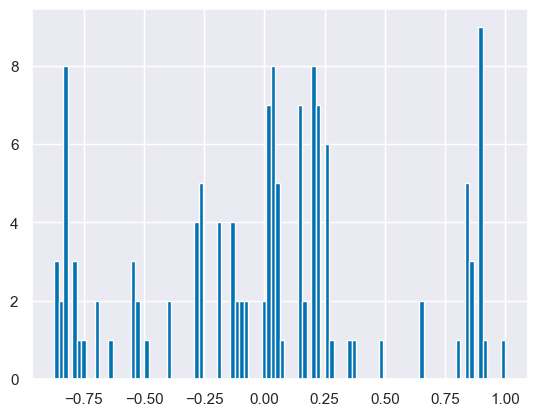

In [752]:
Acquiescence.corrwith( Acquiescence["Acq_mean"] ).hist(bins=100)

In [684]:
self_corrs = Acquiescence.corrwith( Acquiescence["Acq_mean"] )

In [685]:
self_corrs.sort_values().head(20)

empathy1W14    0.536190
empathy1W20    0.680499
zeroSum1W14    0.694335
aom1W7         0.766595
ethno1W7       0.858372
ethno1W9       0.906225
ethno1W10      0.920301
euUKRichW7     0.928385
euUKRichW8     0.933212
Acq_mean       1.000000
dtype: float64

In [518]:
self_corrs.sort_values().tail(20)

cwAuthorsW25                0.322282
cwParentsW25                0.322282
cwTransW25                  0.322282
voterIDConfidentW25         0.327618
nfc2W21                     0.336528
nfc5W21                     0.336528
nfc6W21                     0.336528
nfc1W21                     0.336528
aom6W7                      0.821930
govtHandoutsW7              0.860780
euParlOverRideW7            0.861634
euRedTapeW7                 0.881994
euMemberJoinW8              0.904902
campaigninfoLeaveW8         0.904985
euUndermineIdentityW8       0.910337
euParlOverRideW8            0.910337
UKsovereigntyW8             0.910337
euRedTapeW8                 0.910337
immigrantsWelfareStateW8    0.910337
Acq_mean                    1.000000
dtype: float64

In [519]:
BES_Panel["immigrantsWelfareStateW8"]

id
1                         Don't know
2         Neither agree nor disagree
3                                NaN
4                                NaN
5                                NaN
                     ...            
113062                           NaN
113063                           NaN
113064                           NaN
113065                           NaN
113066                           NaN
Name: immigrantsWelfareStateW8, Length: 111621, dtype: category
Categories (6, object): ['Strongly disagree' < 'Disagree' < 'Neither agree nor disagree' < 'Agree' < 'Strongly agree' < 'Don't know']

In [520]:
BES_Panel["normEUW8"]

id
1         Strongly disagree
2                Don't know
3                       NaN
4                       NaN
5                       NaN
                ...        
113062                  NaN
113063                  NaN
113064                  NaN
113065                  NaN
113066                  NaN
Name: normEUW8, Length: 111621, dtype: category
Categories (6, object): ['Strongly disagree' < 'Disagree' < 'Neither agree nor disagree' < 'Agree' < 'Strongly agree' < 'Don't know']

In [526]:
pd.DataFrame(CorrWithAlLr).T.corrwith(self_corrs.drop("Acq_mean"))

0    0.677596
1    0.031793
dtype: float64

In [533]:
Acquiescence.mean().sort_values()

Acq_mean                   -2.022468e-04
coalitionInTuneW11         -2.345595e-16
euParlOverRideW8           -2.195083e-16
UKsovereigntyW8            -1.987128e-16
euUndermineIdentityW8      -1.836938e-16
                                ...     
cwParentsW25                2.423964e-16
aom6W7                      2.720246e-16
immigrantsWelfareStateW8    3.130882e-16
monarchW25                  3.256193e-16
ethno5W10                   3.625185e-16
Length: 89, dtype: float64

In [686]:
AqcCorrWithAlLr = {}
#= pd.DataFrame(index=BES_Panel.index)
for focal_var in sem_store.keys():
    if sem_store[focal_var][1].message == 'Optimization terminated successfully.':
        AqcCorrWithAlLr[focal_var] = ( sem_store[focal_var][0]["Acq"].corr(sem_store[focal_var][0]["AuthCorrected"]),
                                       sem_store[focal_var][0]["Acq"].corr(sem_store[focal_var][0]["LeftCorrected"]),
                                     
                                     
                                     
                                     )

In [763]:
pd.DataFrame(store_dict3).T.to_pickle(BES_small_data_files+"store_dict3.zip",compression='zip')

In [2]:
store_dict3_df = pd.read_pickle(BES_small_data_files+"store_dict3.zip",compression='zip')

In [5]:
store_dict3 = store_dict3_df.T.to_dict()

In [764]:
pd.DataFrame(sem_store).T.to_pickle(BES_small_data_files+"sem_store.zip",compression='zip')


AttributeError: Can't pickle local object 'Model.effect_measurement.<locals>.<lambda>'

In [541]:
pd.DataFrame(AqcCorrWithAlLr).T.mean()

0    0.202943
1   -0.506192
dtype: float64

In [688]:
pd.DataFrame(AqcCorrWithAlLr).T#.mean()

0         1
euUKRichW7   0.580091 -0.583987
euUKRichW8   0.534109 -0.585485
zeroSum1W14  0.069267 -0.179375
empathy1W14 -0.077358 -0.243290
empathy1W20  0.111610 -0.070617
ethno1W7     0.639052 -0.476007
ethno1W9     0.551534 -0.521546
ethno1W10    0.630138 -0.557121
aom1W7       0.200991 -0.466108

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>]],
      dtype=object)

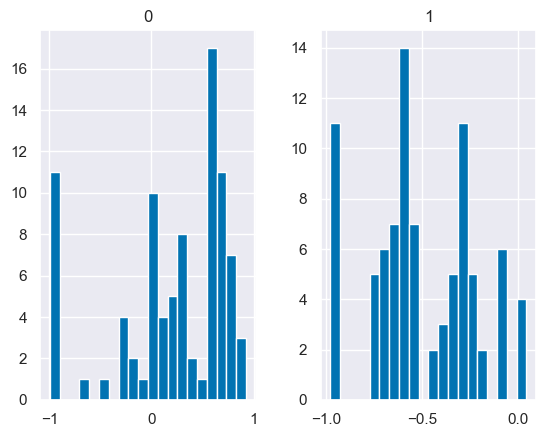

In [543]:
pd.DataFrame(AqcCorrWithAlLr).T.hist(bins=20)

In [546]:
pd.DataFrame(AqcCorrWithAlLr).T[pd.DataFrame(AqcCorrWithAlLr).T[0]<-.8]

0         1
euRedTapeW7              -0.987298 -0.957432
euParlOverRideW7         -0.993403 -0.978436
govtHandoutsW7           -0.993080 -0.976097
aom6W7                   -0.994651 -0.974730
UKsovereigntyW8          -0.990954 -0.972483
euRedTapeW8              -0.990954 -0.972483
euMemberJoinW8           -0.991383 -0.974044
euParlOverRideW8         -0.990954 -0.972483
euUndermineIdentityW8    -0.990954 -0.972483
campaigninfoLeaveW8      -0.991292 -0.973708
immigrantsWelfareStateW8 -0.990954 -0.972483

<Axes: >

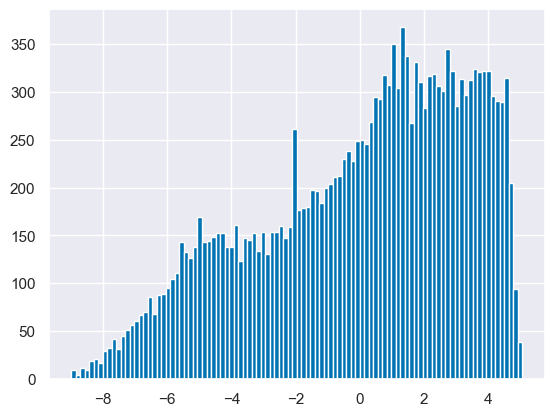

In [557]:
sem_store["euRedTapeW7"][0]["AuthCorrected"].hist(bins=100)

In [550]:
sem_store["euRedTapeW7"][0]["full_model"][1]

'LeftCorrected =~ lr1 + lr2 + lr3 + lr4 + lr5\nAuthCorrected =~ al1 + al2 + al3 + al4 + al5\nE =~ euRedTapeW7 + UKsovereigntyW7 + euLawsLevelW7 + echrW7 + euParlOverRideW7 + echrW8\nAcq =~ 1*lr1 + 1*lr2 + 1*lr3 + 1*lr4 + 1*lr5 + 1*al1 + 1*al2 + 1*al3 + 1*al4 + 1*al5 + 1*euRedTapeW7 + 1*UKsovereigntyW7 + 1*euLawsLevelW7 + 1*echrW7 + 1*euParlOverRideW7 + 1*echrW8\nDEFINE(ordinal) lr1 lr2 lr3 lr4 lr5 al1 al2 al3 al4 al5 euRedTapeW7 UKsovereigntyW7 euLawsLevelW7 echrW7 euParlOverRideW7 echrW8'

In [560]:
sem_store["euRedTapeW7"][1].

SolverResult(fun=0.26034074145775454, success=True, n_it=140, x=array([ 1.14079719,  1.09959551,  1.14720856,  1.1949642 ,  0.99306377,
        0.9711531 ,  0.89054708,  0.99604468,  1.02770287,  0.45526336,
        0.44533759,  1.03918156,  0.44550289,  4.66944634, -6.00132238,
       -3.85632045,  7.99739024,  5.02712829,  8.52873872, -6.29429953,
        8.10649332,  5.2344817 ,  3.68951206,  0.26006796,  0.33580828,
        0.36311382,  0.44431397,  0.67695089,  0.35147321,  0.24526312,
        0.24608816,  0.29397491,  0.20222312,  0.39041409,  0.35368248,
        0.32751445,  0.35031199,  0.32284066,  0.27848364]), message='Optimization terminated successfully.', name_method='BFGS', name_obj='ULS')

In [562]:
sem_store["euRedTapeW7"][0].describe()

euRedTapeW7  UKsovereigntyW7  euLawsLevelW7        echrW7  \
count  18462.000000     18462.000000   18462.000000  18462.000000   
mean       3.002112         2.829975       1.779764      1.427906   
std        1.016705         1.182252       1.261071      1.340989   
min        0.000000         0.000000       0.000000      0.000000   
25%        2.000000         2.000000       1.000000      0.000000   
50%        3.000000         3.000000       2.000000      1.000000   
75%        4.000000         4.000000       3.000000      3.000000   
max        4.000000         4.000000       4.000000      4.000000   

       euParlOverRideW7        echrW8           lr1           lr2  \
count      18462.000000  18462.000000  18462.000000  18462.000000   
mean           2.720994      1.448760      2.455801      2.998863   
std            1.251181      1.357919      1.141650      0.898360   
min            0.000000      0.000000      0.000000      0.000000   
25%            2.000000      0.000000      2.000000      3.000000   
50%            3.000000      1.000000      3.000000      3.000000   
75%            4.000000      3.000000      3.000000      4.000000   
max            4.000000      4.000000      4.000000      4.000000   

                lr3           lr4           lr5           al1           al2  \
count  18462.000000  18462.000000  18462.000000  18462.000000  18462.000000   
mean       2.897465      2.985430      2.844708      2.774510      2.160329   
std        0.966614      1.023347      0.959834      1.070362      1.530320   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.000000      2.000000      2.000000      2.000000      1.000000   
50%        3.000000      3.000000      3.000000      3.000000      3.000000   
75%        4.000000      4.000000      4.000000      4.000000      4.000000   
max        4.000000      4.000000      4.000000      4.000000      4.000000   

                al3           al4           al5           Acq  AuthCorrected  \
count  18462.000000  18462.000000  18462.000000  1.846200e+04   1.846200e+04   
mean       2.794984      2.134330      2.832846  3.694730e-17   1.477892e-16   
std        1.026147      1.191688      1.001817  2.535088e+00   3.274622e+00   
min        0.000000      0.000000      0.000000 -3.736270e+00  -8.992150e+00   
25%        2.000000      1.000000      2.000000 -2.173633e+00  -2.336701e+00   
50%        3.000000      2.000000      3.000000 -4.858072e-01   6.478969e-01   
75%        4.000000      3.000000      4.000000  1.921192e+00   2.698048e+00   
max        4.000000      4.000000      4.000000  6.450489e+00   5.055561e+00   

                  E  LeftCorrected  
count  1.846200e+04   1.846200e+04  
mean   3.941045e-16   1.293155e-16  
std    3.398397e+00   2.200180e+00  
min   -8.814768e+00  -7.500452e+00  
25%   -2.573993e+00  -1.766719e+00  
50%    6.528005e-01   2.811042e-01  
75%    2.918271e+00   1.813355e+00  
max    4.936030e+00   3.807281e+00

In [ ]:
### store more information - keep raw al_scale/lr_scale!
### get comp_model as well

In [ ]:
# BES_Panel["sdoDomAndAntiEgal1W15"] = BES_Panel["sdodominance1W15"]
# BES_Panel["sdoDomAndAntiEgal2W15"] = BES_Panel["sdodominance2W15"]
# BES_Panel["sdoDomAndAntiEgal3W15"] = BES_Panel["sdodominance3W15"]
# BES_Panel["sdoDomAndAntiEgal4W15"] = BES_Panel["sdodominance4W15"]

# BES_Panel["sdoDomAndAntiEgal5W15"] = BES_Panel["sdoantiegal1W15"]
# BES_Panel["sdoDomAndAntiEgal6W15"] = BES_Panel["sdoantiegal2W15"]
# BES_Panel["sdoDomAndAntiEgal7W15"] = BES_Panel["sdoantiegal3W15"]
# BES_Panel["sdoDomAndAntiEgal8W15"] = BES_Panel["sdoantiegal4W15"]

# BES_Panel["euro1W7"] = BES_Panel["euUKRichW7"]
# BES_Panel["euro2W7"] = BES_Panel["euCloserW7"]
# BES_Panel["euro3W7"] = BES_Panel["euMemberJoinW7"]
# BES_Panel["euro4W7"] = BES_Panel["euParlOverRideW7"]
# BES_Panel["euro5W7"] = BES_Panel["euLawsLevelW7"]
# BES_Panel["euro6W7"] = BES_Panel["euRedTapeW7"]
# BES_Panel["euro7W7"] = BES_Panel["euUndermineIdentityW7"]
# BES_Panel["euro8W7"] = BES_Panel["echrW7"]

# BES_Panel["euro1W8"] = BES_Panel["euUKRichW8"]
# BES_Panel["euro2W8"] = BES_Panel["euCloserW8"]
# BES_Panel["euro3W8"] = BES_Panel["euMemberJoinW8"]
# BES_Panel["euro4W8"] = BES_Panel["euParlOverRideW8"]
# BES_Panel["euro5W8"] = BES_Panel["euLawsLevelW8"]
# BES_Panel["euro6W8"] = BES_Panel["euRedTapeW8"]
# BES_Panel["euro7W8"] = BES_Panel["euUndermineIdentityW8"]
# BES_Panel["euro8W8"] = BES_Panel["echrW8"]


In [ ]:
# factor_vars = pd.DataFrame(index = ["zeroSum","empathy","ethno","aom","authLong","sdoDomAndAntiEgal","euro"],
#                            columns = ["no_list","waves"])
# factor_vars.loc["zeroSum"] = [[1,4,5,7,9,11], [14]]
# factor_vars.loc["empathy"] = [[1,2,3,4,5,6,7,8,9,10], [14,20]]
# factor_vars.loc["ethno"] =   [[1,2,3,4,5,6], [7,9,10]]
# factor_vars.loc["aom"] =     [[1,2,3,4,5,6,7], [7]]
# factor_vars.loc["authLong"] =[[1,2,3,4], [10]]
# factor_vars.loc["sdoDomAndAntiEgal"] = [[1,2,3,4,5,6,7,8], [15]]
# factor_vars.loc["euro"] =    [[1,2,3,4,5,6,7,8],[7,8]]
# factor_vars

In [633]:
search(sa_dataset,"sdo")

Series([], dtype: float64)

In [628]:
# sem_list.drop(main_value_list,inplace=True)

In [626]:
sem_list.loc["zeroSum1W14","focal_list"] = [1,2,3,]

ValueError: Must have equal len keys and value when setting with an iterable

In [623]:
for vl in manual_value_lists:
    main_value_list.append(vl[0])
    sem_list.loc[vl[0],"focal_list"] =  np.asarray(vl, dtype="object")

ValueError: Must have equal len keys and value when setting with an iterable

In [572]:
sem_list.loc[vl[0],"focal_list"]

['euUKRichW7',
 'euCloserW7',
 'euMemberJoinW7',
 'euParlOverRideW7',
 'euLawsLevelW7',
 'euRedTapeW7',
 'euUndermineIdentityW7',
 'echrW7']

In [583]:
sem_list["focal_list"]

singlePartyEffectiveW1    [singlePartyEffectiveW1, coalitionInTuneW1, si...
coalitionInTuneW1         [coalitionInTuneW1, singlePartyEffectiveW1, co...
efficacyUnderstandW1      [efficacyUnderstandW1, efficacyNotUnderstandW1...
immigExpDVW2              [immigExpDVW2, immigrantsWelfareStateW2, immig...
coalitionInTuneW3         [coalitionInTuneW3, singlePartyEffectiveW3, co...
                                                ...                        
zeroSum1W14                                                             NaN
ethno1W7                                                                NaN
ethno1W10                                                               NaN
aom1W7                                                                  NaN
authLong1W10                                                            NaN
Name: focal_list, Length: 96, dtype: object

In [610]:
sem_list.loc[main_value_list,"focal_list"]=[x for x in manual_value_lists]

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (11,) + inhomogeneous part.

In [638]:
############## doublecheck semopy output against lavaan

sem_store

{'euUKRichW7': (       euUKRichW7  euCloserW7  euMemberJoinW7  euParlOverRideW7  \
  id                                                                
  1             1.0         1.0             4.0               4.0   
  2             2.0         1.0             3.0               3.0   
  6             1.0         3.0             3.0               4.0   
  7             0.0         1.0             4.0               3.0   
  8             2.0         1.0             3.0               3.0   
  ...           ...         ...             ...               ...   
  51060         3.0         3.0             1.0               1.0   
  51061         3.0         3.0             1.0               3.0   
  51062         2.0         3.0             4.0               4.0   
  51065         2.0         2.0             4.0               3.0   
  51067         4.0         3.0             2.0               1.0   
  
         euLawsLevelW7  euRedTapeW7  euUndermineIdentityW7  echrW7  lr1  lr2  \
  id  

In [642]:
acq_dict.keys()

dict_keys(['euroW7', 'euroW8', 'aomW7', 'authLongW10', 'sdoDomAndAntiEgalW15', 'ethnoW10', 'ethnoW7', 'ethnoW9', 'empathyW20', 'empathyW14', 'zeroSumW14'])

In [643]:
sem_store.keys()

dict_keys(['euUKRichW7', 'euUKRichW8', 'zeroSum1W14', 'empathy1W14', 'empathy1W20', 'ethno1W7', 'ethno1W9', 'ethno1W10', 'aom1W7', 'authLong1W10'])

In [646]:
semopy_lavaan_translate_dict = {'euUKRichW7':'euroW7','euUKRichW8':'euroW8','zeroSum1W14':"zeroSumW14",
                                'empathy1W14':"empathyW14", 'empathy1W20':"empathyW20",
                                'ethno1W7':'ethnoW7', 'ethno1W9':'ethnoW9', 'ethno1W10':'ethnoW10',
                                'aom1W7':'aomW7', 'authLong1W10':'authLongW10'}
    
    
    


In [659]:
for item in sem_store.keys():
    print(item)
    print( "Acq:",acq_dict[semopy_lavaan_translate_dict[item]]["Acq"].corr( sem_store[item][0]["Acq"] ) )
    print( "E:",acq_dict[semopy_lavaan_translate_dict[item]]["E"].corr( sem_store[item][0]["E"] ) )
    print( "AuthCorrected:",acq_dict[semopy_lavaan_translate_dict[item]]["AuthCorrected"].corr( sem_store[item][0]["AuthCorrected"] ) )
    print( "LeftCorrected:",acq_dict[semopy_lavaan_translate_dict[item]]["LeftCorrected"].corr( sem_store[item][0]["LeftCorrected"] ) )

euUKRichW7
Acq: 0.9863755921734029
E: 0.9897957588829849
AuthCorrected: 0.9849294079704307
LeftCorrected: 0.985776962475035
euUKRichW8
Acq: 0.9843586500292374
E: 0.9886641656420357
AuthCorrected: 0.9844134865334531
LeftCorrected: 0.9851418865827583
zeroSum1W14
Acq: 0.9925795146761747
E: 0.9943798367639234
AuthCorrected: 0.9883661602774114
LeftCorrected: 0.9899503041088291
empathy1W14
Acq: 0.982279089619774
E: 0.9921518842483787
AuthCorrected: 0.9794975239888413
LeftCorrected: 0.984271287501299
empathy1W20
Acq: 0.9681468158481368
E: 0.9916244988588558
AuthCorrected: 0.9820163013071824
LeftCorrected: 0.9846476688743148
ethno1W7
Acq: 0.9935042663273771
E: 0.9959840384520203
AuthCorrected: 0.9884929786945066
LeftCorrected: 0.9900940584130633
ethno1W9
Acq: 0.9932691506983047
E: 0.9966416622625623
AuthCorrected: 0.9870313870586294
LeftCorrected: 0.9910548020339389
ethno1W10
Acq: 0.9940367305842869
E: 0.9966984429699935
AuthCorrected: 0.986534485727086
LeftCorrected: 0.9919655955093193
aom1W7

In [676]:
(sem_store["authLong1W10"][0]["authLong4W10"]!=acq_dict[semopy_lavaan_translate_dict["authLong1W10"]]["authLong4"]).any()
#==acq_dict[semopy_lavaan_translate_dict["authLong1W10"]]["authLong1"]

False

In [677]:
BES_Panel["authLong1W10"]

id
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
         ... 
113062    NaN
113063    NaN
113064    NaN
113065    NaN
113066    NaN
Name: authLong1W10, Length: 111621, dtype: category
Categories (6, object): ['Strongly disagree' < 'Disagree' < 'Neither agree nor disagree' < 'Agree' < 'Strongly agree' < 'Don't know']

In [172]:
len(sem_store_na)

986

In [208]:
sem_corrs = pd.DataFrame(columns = ["focal_var","level_0","level_1",0])
sem_status = pd.Series()
sem_align = pd.Series()
sem_acquiescence = pd.DataFrame(index=BES_Panel.index)
for sem_entry in list(sem_store_na.keys())[0:2]:
    if sem_store_na[sem_entry][1]!='success':
        sem_status.loc[sem_entry] = "crashed"
        continue
    sem_status.loc[sem_entry] = sem_store_na[sem_entry][2]
    sem_align.loc[sem_entry] = sem_store_na[sem_entry][0]["align_list"]
    temp_corr = sem_store_na[sem_entry][0][['Acq',   'AuthCorrected', 'E', 'LeftCorrected', 'AuthUncorrected',
           'EUncorrected', 'LeftUncorrected',  'lr_scale', 'al_scale',]].corr()
#     temp_corr = pd.DataFrame(np.tril(temp_corr,k=-1),index=temp_corr.index,columns=temp_corr.columns)
    temp_corr = temp_corr.stack().reset_index()
#     temp_corr = temp_corr[temp_corr[0]!=0]
    temp_corr = temp_corr[temp_corr[0]!=1]
    temp_corr = temp_corr.sort_values(by=0)
    temp_corr["focal_var"] = sem_entry
    
    sem_corrs = pd.concat([sem_corrs,temp_corr],axis=0)
    
    sem_acquiescence[sem_entry] = sem_store_na[sem_entry][0]['Acq']

In [198]:
# temp_corr = sem_store_na[list(sem_store_na.keys())[0]][0][['Acq',   'AuthCorrected', 'E', 'LeftCorrected', 'AuthUncorrected',
#        'EUncorrected', 'LeftUncorrected',  'lr_scale', 'al_scale',]].corr()
# temp_corr = pd.DataFrame(np.tril(temp_corr,k=-1),index=temp_corr.index,columns=temp_corr.columns).stack().reset_index()
# temp_corr = temp_corr[temp_corr[0]!=0]
# temp_corr.sort_values(by=0)
# #.stack().reset_index()

level_0          level_1         0
59  LeftUncorrected     EUncorrected -0.795445
56  LeftUncorrected                E -0.784861
29    LeftCorrected                E -0.783551
48     EUncorrected    LeftCorrected -0.770984
68         lr_scale     EUncorrected -0.723310
65         lr_scale                E -0.711278
27    LeftCorrected              Acq -0.548384
9     AuthCorrected              Acq -0.308844
54  LeftUncorrected              Acq -0.247804
63         lr_scale              Acq -0.226786
75         al_scale    LeftCorrected -0.077726
39  AuthUncorrected    LeftCorrected -0.076747
58  LeftUncorrected  AuthUncorrected -0.067100
78         al_scale  LeftUncorrected -0.063121
67         lr_scale  AuthUncorrected -0.051529
79         al_scale         lr_scale -0.051139
55  LeftUncorrected    AuthCorrected  0.027595
64         lr_scale    AuthCorrected  0.034702
36  AuthUncorrected              Acq  0.058738
19                E    AuthCorrected  0.063215
72         al_scale              Acq  0.071698
46     EUncorrected    AuthCorrected  0.084631
28    LeftCorrected    AuthCorrected  0.127918
77         al_scale     EUncorrected  0.166281
74         al_scale                E  0.169623
49     EUncorrected  AuthUncorrected  0.187083
38  AuthUncorrected                E  0.189294
45     EUncorrected              Acq  0.253322
18                E              Acq  0.318031
73         al_scale    AuthCorrected  0.913017
66         lr_scale    LeftCorrected  0.926797
37  AuthUncorrected    AuthCorrected  0.930906
57  LeftUncorrected    LeftCorrected  0.946016
76         al_scale  AuthUncorrected  0.985440
69         lr_scale  LeftUncorrected  0.985735
47     EUncorrected                E  0.997304

In [206]:
sem_corrs

focal_var          level_0          level_1         0
59        econGenRetroW1  LeftUncorrected     EUncorrected -0.795445
51        econGenRetroW1     EUncorrected  LeftUncorrected -0.795445
56        econGenRetroW1  LeftUncorrected                E -0.784861
24        econGenRetroW1                E  LeftUncorrected -0.784861
29        econGenRetroW1    LeftCorrected                E -0.783551
..                   ...              ...              ...       ...
69  cutsTooFarNationalW1         lr_scale  LeftUncorrected  0.981549
44  cutsTooFarNationalW1  AuthUncorrected         al_scale  0.984525
76  cutsTooFarNationalW1         al_scale  AuthUncorrected  0.984525
47  cutsTooFarNationalW1     EUncorrected                E  0.987333
23  cutsTooFarNationalW1                E     EUncorrected  0.987333

[144 rows x 4 columns]

In [209]:
sem_acquiescence

econGenRetroW1  cutsTooFarNationalW1
id                                          
1            -0.174219             -0.232032
2                  NaN              0.577126
3                  NaN                   NaN
4                  NaN                   NaN
5             0.308856                   NaN
...                ...                   ...
113062             NaN                   NaN
113063             NaN                   NaN
113064             NaN                   NaN
113065             NaN                   NaN
113066             NaN                   NaN

[111621 rows x 2 columns]